# [IAPR][iapr]: Project


**Group ID:** xx

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 07.05.2021  
**Due date:** 03.06.2021 (23h59)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

An anonymous researcher that we will name Lann Yecun is convinced that the MNIST dataset still has great potential. He decides to create a playing card game based on MNIST digits and different figures. The game uses a standard 52 card deck which is composed of four French suits/colours: clubs (&#9827;), diamonds (&#9830;), hearts (&#9829;) and spades (&#9824;). Each suit includes 10 digit cards (from 0 to 9) and 3 figures (Jack-J, Queen-Q, and King-K). Here is an example of the 13 spade cards with their name.


<img src="media/example_cards.png">


We can find the same arrangement of cards for the clubs, diamonds, and hearts. 


## 1. Rules


### 1.1 Standard

The rules are based on the simple battle card game. The goal of the game is to win as many points as possible. Each turn, the 4 players play a card in front of them. As displayed in the example below. The rules are the following:

- The cards are ranked in the following order : **0 < 1 < 2 < 3 < 4 < 5 < 6 < 7 < 8 < 9 < J < Q < K**.
- The player with the highest-ranked card wins the round and obtains **1 point**. 
- If the highest-ranked card is the same for multiple players we call it a draw and all winners get **1 points**. 
- In this configuration, we **do not** take into account the suits. The game only rely on the card ranks. 
- The game lasts 13 rounds. After the last round, the winner is the player that has the largest number of points. 
- In the example below Player 1 wins the round with his Queen ( 0 < 8 < J < **Q**).

If two or more players have the same number of points they share the victory.

### 1.2 Advanced

The advanced rules take into account the suits. 

- At the beginning of **each round** a random player is designated as the **dealer**. The dealer places a green token with the letter *D* next to him (player 1 in the example below).
- Only the cards that belong to the same suit as the one of the dealer are considered valid. In the example below, only Player 4 is competing with Player 1 as spade was selected by the dealer (e.i., Player 1). Player 2 and 3 are out for this round. Player 1 wins the round and **1 point** with the Queen ( 0&#9824; < **Q&#9824;**).
- There cannot be any draw between the players as they are not any card duplicates.
- We use the same system as the standard method to count the points.


<img src="media/example_round.jpg">


### 1.3 Notes

- The orientation of the card is linked to the position of the player around the table. For instance, to read the card of the 3rd player you will have to rotate it by 180°.
- The **digits** always **face** the players around the table. The figures can have random orientations.
- Player 1 **always** seats south of the table. The players are **always** ordered counter-clockwise as in the example. 
- The dealers can change between the rounds and games.
- Some cards **might** apear multiple times per game.
- Pictures are always taken from rougthly the same altitude.
- The digits from the training set **would not** be the same as the one of the testing set.

---
## 2. Data

You will be given the images of 7 games that were played ([download link](https://drive.google.com/drive/folders/1fEy27wnJsUJPRsEEomzoAtP56s-7HFtk?usp=sharing)). The data are composed of:
   - 7 folder named after the games (game1 to game7).
   - Each game includes 13 ordered images (1st to 13th round).
   - Each game includes a csv file with the ground truth of the game. The first row list the players (P1 to P4) as well as the dealer (D). The following rows represent the rounds (1 to 13). We represent the card played with 2 character as $AB$ where $A \in [0-9, J, Q, K]$ is the rank of the card and $B \in [C, D, H, S]$ is the suit. For example, QS means "(Q)ueen of (S)pade" and 0D means "(0) of (D)iamond". The dealer is represented by the ID of the player (e.g. P1 -> 1).
   
You are free to use external datasets such as the original MNIST train set that you used in lab 3.

---
## 3. Your Tasks

Your task is to ready yourself for the final evaluation. The day of the exam we will give you a new folder with a new game. ! The digits on the cards **differ** from the one of the traning set. When given a new data folder with 13 images your should be able to:

**Task 0**
   - Plot an overlay for each round image that shows your detections and classification. You can for example plot bounding boxes around the cards/dealer token and add a text overlay with the name of the classes.

**Task 1**
   - (a) Predict the **rank** of the card played by each player at each round (Standard rules).
   - (b) Predict the **number of points** of each player according to **Standard** rules
 
**Task 2**
   - (a) Detect which player is the selected **dealer** for each round.
   - (b) Predict the **rank** and the **suit** of the card played by each player at each round (Advanced rules).
   - (c) Predict the **number of points** of each player according to **Advanced** rules

---

**Before the exam (until 03.06.21 at 23h59)**
   - Create a zipped folder named **group_xx.zip** that you uplaod on moodel (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam (04.06.21)**
   - You will be given a **new folder** with 13 images (rounds) and but **no ground truth** (csv file).
   - We will ask you to run your pipeline in **realtime** and to send us your prediction of task 1 and 2 that you obtain with the function **print_results**. 
   - On our side we will compute the perfomance of your classification algorithm. 
   - To evaluate your method we will use the **evaluate_game** function presented below. To understant how the provided functions work please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty the day of the exam**. 

In [1]:
import cv2 as cv
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

---
### 3.1 Example Final results

Example of output you **should** provide the day of the final exam.

In [2]:
from utils import print_results
import numpy as np

# Creates dummy predictions (toy exmaple)
pred_rank = np.array(["0D"]*4*13).reshape((13, 4)) # Everyone played the "0 of spade".
pred_dealer = [1]*13                # List of players selected as dealer for each round
pred_pts_stand = [0,0,0,13]         # Player 4 won 13 points with standard rules.
pred_pts_advan = [0,0,8,7]          # Player 3 and 4 won 8 and 7 points with adv, rules respectively.

print_results(
    rank_colour=pred_rank, 
    dealer=pred_dealer, 
    pts_standard=pred_pts_stand,
    pts_advanced=pred_pts_advan,
)

The cards played were:
[
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
]
Players designated as dealer: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Players points (standard): [0, 0, 0, 13]
Players points (advanced): [0, 0, 8, 7]


---
### 3.2 Example Accuracy

Example of code you can use to validate the performance of your model. Be careful the day of the exam you will not have access to the ground truth of the predictions.

In [3]:
from utils import evaluate_game
import pandas as pd
#! You will need pandas libary to run the example. Please install the package using pip or conda commands !

# Load ground truth from game 1
cgt = pd.read_csv('train_games/game1/game1.csv', index_col=0)
cgt_rank = cgt[['P1', 'P2', 'P3', 'P4']].values

# Compute accuracy of prediction
acc_standard = evaluate_game(pred_rank, cgt_rank, mode_advanced=False)
acc_advanced = evaluate_game(pred_rank, cgt_rank, mode_advanced=True)
print("Your model accuracy is: Standard={:.3f}, Advanced={:.3f}".format(acc_standard, acc_advanced))

Your model accuracy is: Standard=0.077, Advanced=0.019


# Preprocessing

In [4]:
def load(game_num):
    num = list(range(1,14))
    names = [str(i)+'.jpg' for i in num]
    ic = skimage.io.imread_collection(["train_games/"+game_num+'/'+nm for nm in names])
    round_im = skimage.io.concatenate_images(ic)
    return round_im, names

In [5]:
g1_round_im , g1_round_num = load("game1")

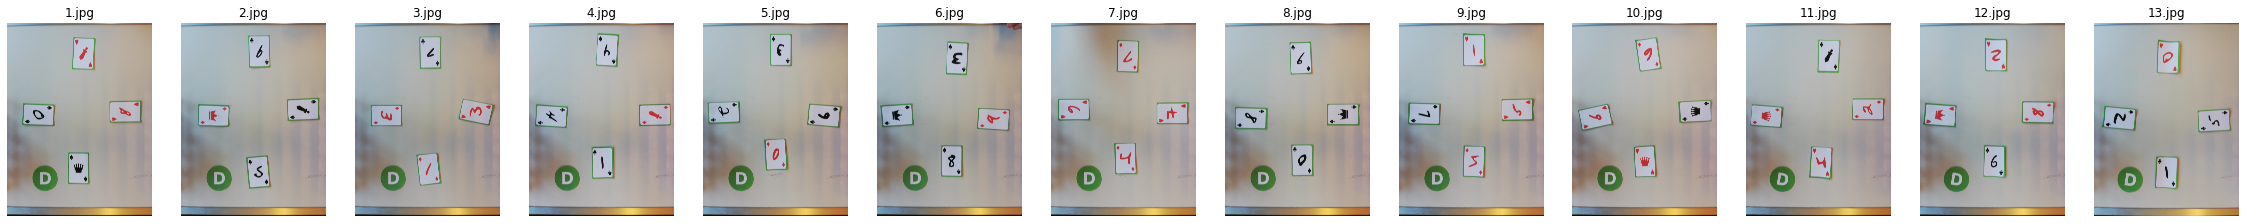

In [6]:
# Plot images
fig, axes = plt.subplots(1, len(g1_round_im), figsize=(40, 15))
for ax, im, nm in zip(axes, g1_round_im, g1_round_num):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

In [7]:
g1_round_im.shape

(13, 4608, 3456, 3)

In [8]:
im1 = g1_round_im[1].copy()

np.zeros((3,),dtype=int)

array([0, 0, 0])

In [9]:
def plot_gray_histogram(img):
    img_flatten = img.reshape(-1)

    plt.hist(img_flatten, bins=50, alpha=0.5)
    plt.yscale('log')
    plt.show()

def plot_rgb_histogram(img):
    img_flatten = img.reshape(-1, 3)

    plt.hist(img_flatten[:, 0], bins=50, alpha=0.5, label='R', color='r')
    plt.hist(img_flatten[:, 1], bins=50, alpha=0.5, label='G', color='g')
    plt.hist(img_flatten[:, 2], bins=50, alpha=0.5, label='B', color='b')
    plt.legend()
    plt.show()
      
def histogram_equalization(img):
    img = cv.cvtColor(img, cv.COLOR_RGB2BGR)

    img_yuv = cv.cvtColor(img, cv.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv.equalizeHist(img_yuv[:,:,0])

    # convert the YUV image back to RGB format
    img_output = cv.cvtColor(img_yuv, cv.COLOR_YUV2RGB)
    
    return img_output

def plot_image(img, cmap='gray'):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img, cmap=cmap)
    plt.show()
    
def preprocess_for_segmentation(img, kernel_size=(55,55)):
    gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    blur = cv.GaussianBlur(gray,kernel_size,10)
    return blur

def perform_segmentation(preprocessed_img):
    flag, thresh = cv.threshold(preprocessed_img, 120, 255, cv.THRESH_BINARY)
    contours, hierarchy = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv.contourArea,reverse=True)
    return contours, hierarchy

def threshold_contour_area(contours, hierarchy, lower_bound=5e4, upper_bound=6e5):
    areas = np.array(list(map(lambda x: cv.contourArea(x), contours)))
    indices = np.where((areas > lower_bound) & (areas < upper_bound))[0]
    contours = np.array(contours, dtype='object')[indices].tolist()
    hierarachy = hierarchy[:, indices, :]
    return contours, hierarachy

def draw_contours(img, contours):
    img_copy = img.copy()
    draw = cv.drawContours(img_copy, contours, -1, (0,255,0), 1)
    return draw
        
        
def plot_contours(img, contours):    
    fig, axes = plt.subplots(1, len(contours), figsize=(30,40))
    
    for idx in range(len(contours)):
        mask = np.zeros_like(img) # Create mask where white is what we want, black otherwise
        cv.drawContours(mask, contours, idx, 255, -1) # Draw filled contour in mask
        out = np.zeros_like(img) # Extract out the object and place into output image
        out[mask == 255] = img[mask == 255]

        # Now crop
        (y, x, z) = np.where(mask == 255)
        (topy, topx) = (np.min(y), np.min(x))
        (bottomy, bottomx) = (np.max(y), np.max(x))
        out = out[topy:bottomy+1, topx:bottomx+1, :]
        img_cropped = img[topy:bottomy+1, topx:bottomx+1, :]
        axes[idx].imshow(img_cropped)
        
        
def plot_contours_skimage(img, contours):    
    fig, axes = plt.subplots(1, len(contours), figsize=(30,40))
    
    for idx in range(len(contours)):
        c = contours[idx]

        # Now crop
        (x, y) = (c[:, 0], c[:, 1])
        (topy, topx) = (np.min(y), np.min(x))
        (bottomy, bottomx) = (np.max(y), np.max(x))
        print(topx, topy, bottomx, bottomy)
        img_cropped = img[topy:bottomy+1, topx:bottomx+1, :]
        axes[idx].imshow(img_cropped)
        
def filter_children(contours, h):
    idx_list = np.where(h[:, :, 3].reshape(-1) == -1)
    contours = np.array(contours, dtype='object')[idx_list].tolist()
    h = h[:, idx_list, :]
    return contours, h    

def canny_filter(img, threshold1=0, threshold2=40):
    edges = np.zeros_like(img)
    canny = cv.Canny(image=img, edges=edges, threshold1=threshold1, threshold2=threshold2)
    return canny

## Segmentation

In [10]:
def distance(p1,p2):
    result= ((((p2[0] - p1[0])**2) + ((p2[1]-p1[1])**2))**0.5)
    return result

In [11]:
def assign_cards_dealer(cards, dealer):
    '''
    returns :
        ordered cards [Player1_card, Player2_card, Player3_card, Player4_card]
            each PlayerX_card is a tuple with (((x_center,y_center),(width,height),angle_rot),card_contour)
        dealer_player = indx in [1,2,3,4] indicating the player
    '''
    card_centers = [(cv.minAreaRect(card),card) for card in cards]
    sorted_cards = sorted(card_centers)
    ordered = []
    if (sorted_cards[1][0][0][1]<sorted_cards[2][0][0][1]):
        ordered= [sorted_cards[2],sorted_cards[3],sorted_cards[1],sorted_cards[0]]
    else:
        ordered= [sorted_cards[1],sorted_cards[3],sorted_cards[2],sorted_cards[0]]

    dealer_rect = cv.minAreaRect(dealer)
    distances_to_dealer = [distance(dealer_rect[0],sorted_card[0][0]) for sorted_card in ordered]
    dealer_player = np.argmin(distances_to_dealer)+1
    return ordered,dealer_player, dealer_rect

In [12]:
def put_text(img,ordered,dealer_player):
    # put dealer text (x_center - width/2 , y_center - height/2)
    dealer_text_org = (int(dealer_rect[0][0])-250 , int(dealer_rect[0][1]-dealer_rect[1][1]/2)-100)
    result = cv.putText(img.copy(), 'Dealer', dealer_text_org, cv.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 0), thickness=7)
    
    # put player 1 text
    player1_text_org = (int(ordered[0][0][0][0]-ordered[0][0][1][1]/2)-50,int(ordered[0][0][0][1]+ordered[0][0][1][0]/2)+200)
    result = cv.putText(result, 'Player 1', player1_text_org, cv.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 0), thickness=7)

    # put player 3 text
    player3_text_org = (int(ordered[2][0][0][0]-ordered[2][0][1][1]/2)-50,int(ordered[2][0][0][1]-ordered[2][0][1][0]/2)-50)
    result = cv.putText(result, 'Player 3', player3_text_org, cv.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 0), thickness=7)
    
    # put player 2 text
    player2_text_org = (int(ordered[1][0][0][0]-ordered[1][0][1][1]/2)-50,int(ordered[1][0][0][1]+ordered[1][0][1][0]/2)+100)
    result = cv.putText(result, 'Player 2', player2_text_org, cv.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 0), thickness=7)

    # put player 4 text
    player4_text_org = (int(ordered[3][0][0][0]-ordered[3][0][1][1]/2)+100,int(ordered[3][0][0][1]+ordered[3][0][1][0]/2)+200)
    result = cv.putText(result, 'Player 4', player4_text_org, cv.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 0), thickness=7)
    
    return result

In [13]:
def segmentation_pipeline(img):
    img_eq = histogram_equalization(img)
    canny = canny_filter(img, 50, 200)
    kernel = np.ones((40,40),np.uint8)
    closed = cv.morphologyEx(canny, cv.MORPH_CLOSE, kernel)
    contours, h = perform_segmentation(closed)
    contours, h = threshold_contour_area(contours, h, 1e4, 3.5e5)
    contours, h = filter_children(contours, h)
    plot_contours(img_eq, contours[:5])
    
def seg_pipe(img):
    img_eq = histogram_equalization(img)
    canny = canny_filter(img, 50, 150)
    blur = cv.GaussianBlur(canny,(9, 9),2)
    thresho = np.quantile(blur, 0.8)
    _, img_bin = cv.threshold(blur, thresho, 255, cv.THRESH_BINARY)
    # kernel0 = cv.getStructuringElement(cv.MORPH_RECT,(5,30))
    kernel1 = cv.getStructuringElement(cv.MORPH_RECT,(35,35))
    closing = cv.morphologyEx(np.uint8(img_bin), cv.MORPH_CLOSE, kernel1)
    kernel2 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(15,5))
    dilation = cv.dilate(np.uint8(closing),kernel2,iterations = 5)
    # kernel1 = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
    # closing = cv.morphologyEx(np.uint8(img_bin), cv.MORPH_CLOSE, kernel1)
    # kernel2 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(10,1))
    # dilation = cv.dilate(np.uint8(img_bin),kernel2,iterations = 3)
    # closing = cv.morphologyEx(np.uint8(closing), cv.MORPH_CLOSE, kernel2)
    contours, h = perform_segmentation(img_bin)
    contours = contours[:20]
    boxes = get_contours_box(contours)
    contours = filter_overlapping(contours, boxes)
    # contours, h = threshold_contour_area(contours, h, 1e4, 1e7)
    # contours, h = filter_children(contours, h)
    plot_contours(img_eq, contours[:5])
    
    
def new_seg_pipe(img):
    canny = canny_filter(img, 80, 150)
    kernel = cv.getStructuringElement(cv.MORPH_RECT,(10,10))
    dilation = cv.dilate(canny, kernel,iterations = 1)
    contours, h = perform_segmentation(np.uint8(dilation))
    contours = contours[:20]
    boxes = get_contours_box(contours)
    contours = filter_overlapping(contours, boxes)
    plot_contours(img, contours[:10])
    
def get_contours_box(contours):
    boxes = []
        
    for idx in range(len(contours)):
        c = contours[idx].reshape(-1, 2)
        # Now crop
        (x, y) = (c[:, 1], c[:, 0])
        (miny, minx) = (int(np.rint(np.min(y))), int(np.rint(np.min(x))))
        (maxy, maxx) = (int(np.rint(np.max(y))), int(np.rint(np.max(x))))
        boxes.append([miny, maxy, minx, maxx])
        
    return boxes

def filter_overlapping(contours, boxes):
    flags = [True] * len(contours)
    
    for i in range(len(contours)):
        
        if not flags[i]:
            continue
            
        curr_box = boxes[i]
        
        if ((curr_box[0] < 100) and (curr_box[2] < 500)) or ((curr_box[0] < 500) and (curr_box[2] > 4000)):
            flags[i] = False
            continue
        
        for j in range(i, len(contours)):
            
            new_box = boxes[j]
            
            enclosed = ((curr_box[0] < new_box[0]) &
                       (curr_box[1] > new_box[1]) &
                       (curr_box[2] < new_box[2]) &
                       (curr_box[3] > new_box[3]))
            
            if enclosed:
                flags[j] = False
                
    contours = [contours[i] for i in range(len(contours)) if flags[i]]
    boxes = [boxes[i] for i in range(len(contours)) if flags[i]]
    return contours, boxes
    
    
def preprocess_image(img):
    # remove unwanted borders
    crop = img[150:-270,30:-30,:]
    # convert to graylevel
    gray = cv.cvtColor(crop, cv.COLOR_BGR2GRAY)
    # apply adaptive thresholding (since parts of same images doesn't have same luminosity/contrast )
    thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 35, 5)
    # black background
    result = 255 - thresh
    return result , crop

def seg_pipe_final(img):
    drawn_contours = []
    kernel = np.ones((3,3),np.uint8)
    black_white_im, cropped_img = preprocess_image(img)
    opening = cv.morphologyEx(black_white_im, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)
    kernel2 = cv.getStructuringElement(cv.MORPH_RECT,(5,500))
    kernel3 = cv.getStructuringElement(cv.MORPH_RECT,(500,5))
    closing_edge_1 = cv.morphologyEx(closing[:, :5], cv.MORPH_CLOSE, kernel2)
    closing_edge_2 = cv.morphologyEx(closing[:, -5:], cv.MORPH_CLOSE, kernel2)
    closing_edge_3 = cv.morphologyEx(closing[:5,:], cv.MORPH_CLOSE, kernel3)
    closing_edge_4 = cv.morphologyEx(closing[-5:,:], cv.MORPH_CLOSE, kernel3)
    closing[:, :5] = closing_edge_1
    closing[:, -5:] = closing_edge_2
    closing[:5, :] = closing_edge_3
    closing[-5:, :] = closing_edge_4
    contours, _ = cv.findContours(closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    contours = sorted(contours, key=lambda contour: cv.contourArea(contour), reverse= True)
    boxes = get_contours_box(contours)
    contours, boxes = filter_overlapping(contours, boxes)
    contours = contours[:5]
    boxes = boxes[:5]
    
    def green_ratio(box):
        segment_cropped = cropped_img[box[2]:box[3]+1, box[0]:box[1]+1, :]
        r_med = np.median(segment_cropped[:, :, 0])
        g_med = np.median(segment_cropped[:, :, 1])
        b_med = np.median(segment_cropped[:, :, 2])
    
        return 2 * g_med / (r_med + b_med)

    medians = [green_ratio(box) for box in boxes]
    dealer_idx = np.argmax(medians)
    dealer_contour = contours.pop(dealer_idx)
    dealer_box = boxes.pop(dealer_idx)
    contours.append(dealer_contour)
    boxes.append(dealer_box)

    
    return cropped_img, contours, boxes

def plot_bounding_boxes(cropped_img, boxes):
    im = cropped_img.copy()

    for c, b in zip(contours, boxes):
        x,y,w,h = b[0], b[2], b[1] - b[0], b[3] - b[2]
        cv.rectangle(im,(x,y),(x+w,y+h),(0,0,255),10)
        
    return im

def detect_red_or_black(img):
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    ## Gen lower mask (0-5) and upper mask (175-180) of RED
    mask1 = cv.inRange(img_hsv, (0,50,20), (5,255,255))
    mask2 = cv.inRange(img_hsv, (175,50,20), (180,255,255))

    ## Merge the mask and crop the red regions
    mask_red = cv.bitwise_or(mask1, mask2)
    
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)    
    ## Gen lower mask (0-5) and upper mask (175-180) of BLACK
    mask_black = cv.inRange(img_hsv, (0, 0, 0), (180, 255, 30))
    
    if mask_red.sum() > mask_black.sum():
#         img_hsv = cv.cvtColor(third_card, cv.COLOR_RGB2HSV)
#         ## Gen lower mask (0-5) and upper mask (175-180) of RED
#         mask1 = cv.inRange(img_hsv, (0,50,20), (5,255,255))
#         mask2 = cv.inRange(img_hsv, (125,50,20), (180,255,255))

#         ## Merge the mask and crop the red regions
#         mask_red = cv.bitwise_or(mask1, mask2)
        return mask_red, 'red'
    
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)    
    ## Gen lower mask (0-5) and upper mask (175-180) of BLACK
    mask_black = cv.inRange(img_hsv, (0, 0, 0), (180, 255, 80))
    
    return mask_black, 'black'

game1


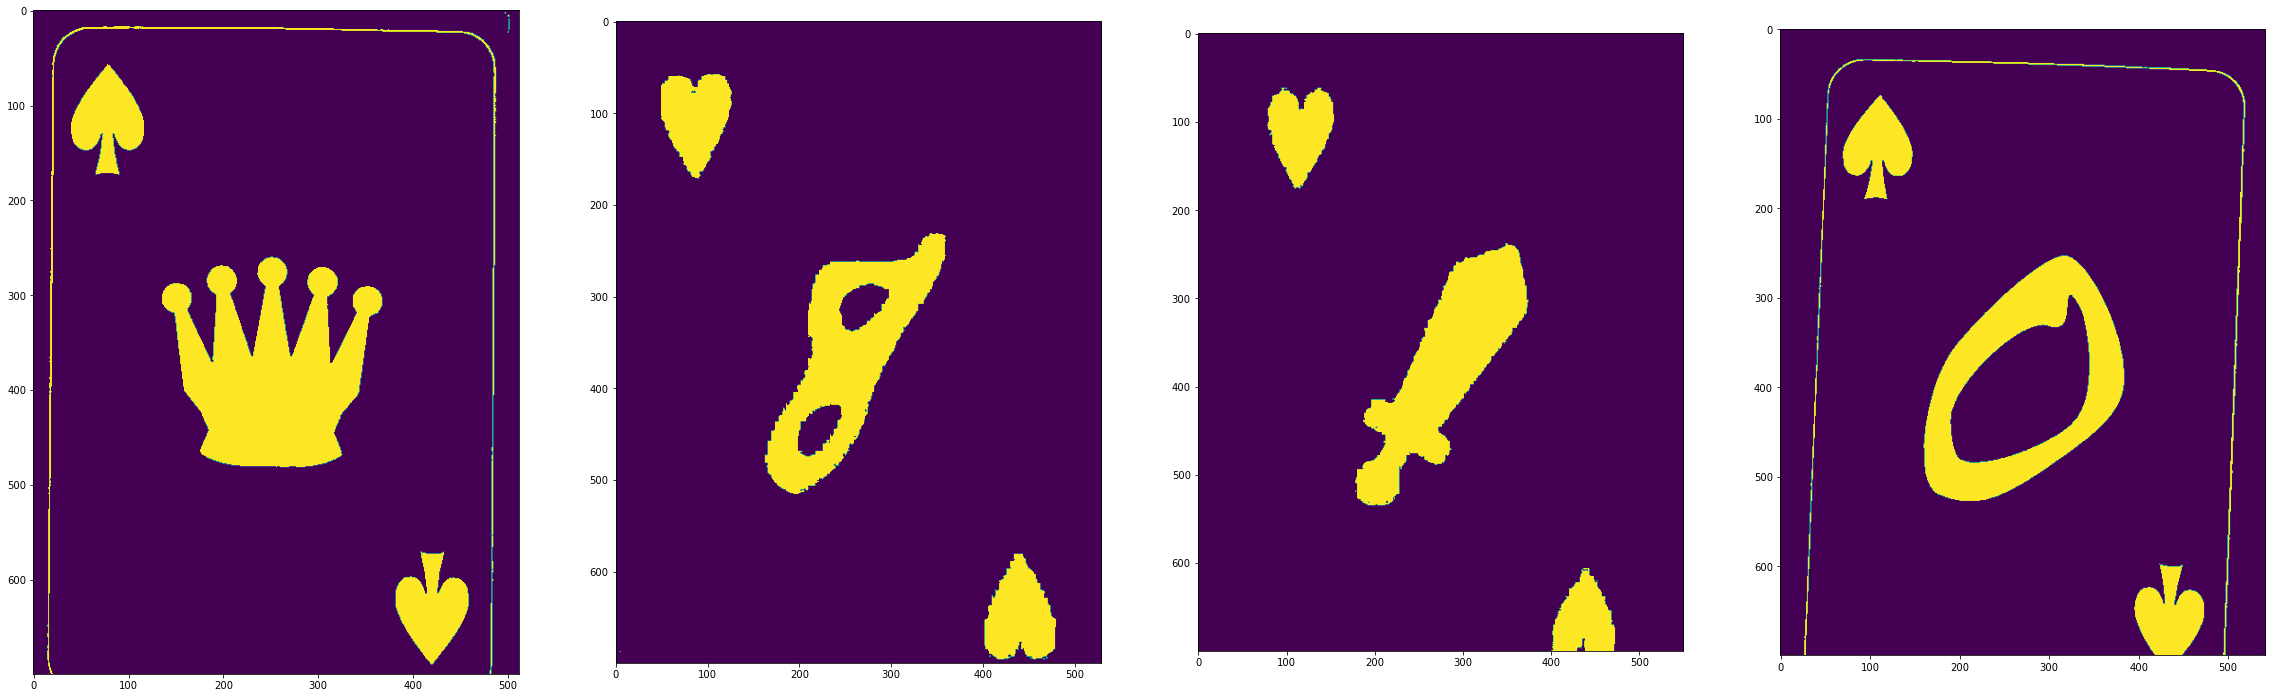

NameError: name 'df' is not defined

In [14]:
for i in range(1, 8):
    game = f"game{i}"
    g_round_im , g_round_num = load(game)
    df_game = create_needed_df('game')
    print(game)
    for img in g_round_im:
        cropped_img, contours, boxes = seg_pipe_final(img)
        cards = contours[:4]
        dealer = contours[4]
        bounded = plot_bounding_boxes(cropped_img, boxes)
        ordered,dealer_player, dealer_rect = assign_cards_dealer(cards, dealer)
        ordered_contours = [entry[1] for entry in ordered]
        ordered_boxes = get_contours_box(ordered_contours)
        first_card = cropped_img[ordered_boxes[0][2]:ordered_boxes[0][3],
                                 ordered_boxes[0][0]:ordered_boxes[0][1], :]
        second_card = cv.rotate(cropped_img[ordered_boxes[1][2]:ordered_boxes[1][3],
                                  ordered_boxes[1][0]:ordered_boxes[1][1], :],
                                cv.ROTATE_90_CLOCKWISE)
        third_card = cv.rotate(cropped_img[ordered_boxes[2][2]:ordered_boxes[2][3],
                                 ordered_boxes[2][0]:ordered_boxes[2][1], :],
                               cv.ROTATE_180)
        fourth_card = cv.rotate(cropped_img[ordered_boxes[3][2]:ordered_boxes[3][3],
                                  ordered_boxes[3][0]:ordered_boxes[3][1], :],
                                cv.ROTATE_90_COUNTERCLOCKWISE)
        
        
        first_mask, first_color = detect_red_or_black(first_card)
        second_mask, second_color = detect_red_or_black(second_card)
        third_mask, third_color = detect_red_or_black(third_card)
        fourth_mask, fourth_color = detect_red_or_black(fourth_card)
        
        fig, axes = plt.subplots(1, 4, figsize=(40, 15))
        axes[0].imshow(first_mask[:700,:550])
        axes[1].imshow(second_mask[:700,:550])
        axes[2].imshow(third_mask[:700,:550])
        axes[3].imshow(fourth_mask[:700,:550])
        plt.show()
        listed = [game,first_card,first_color,second_card,second_color,third_card,third_color,fourth_card,fourth_color,dealer_player]
        df=df.append(listed)
        print([first_color, second_color, third_color, fourth_color])

In [89]:
possible = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'J', 'Q', 'K']

In [107]:
pred_dict = { p:{c:0 for c in possible} for p in possible}

game1
game1 image0


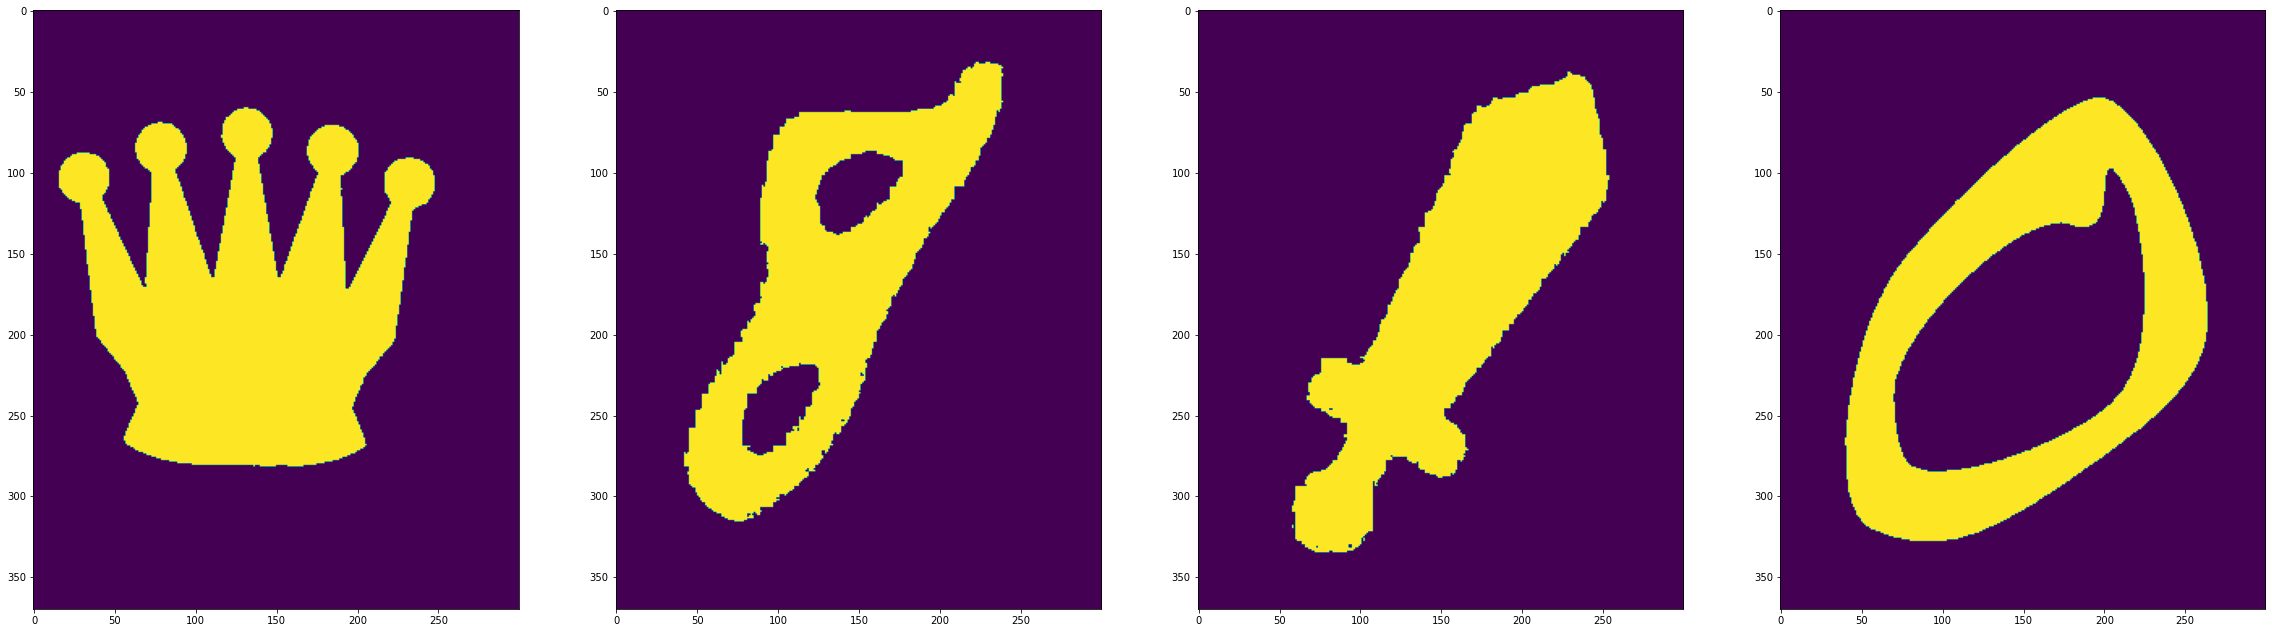

/home/nabegh/Anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[4, 5, 2, 6]
game1 image1


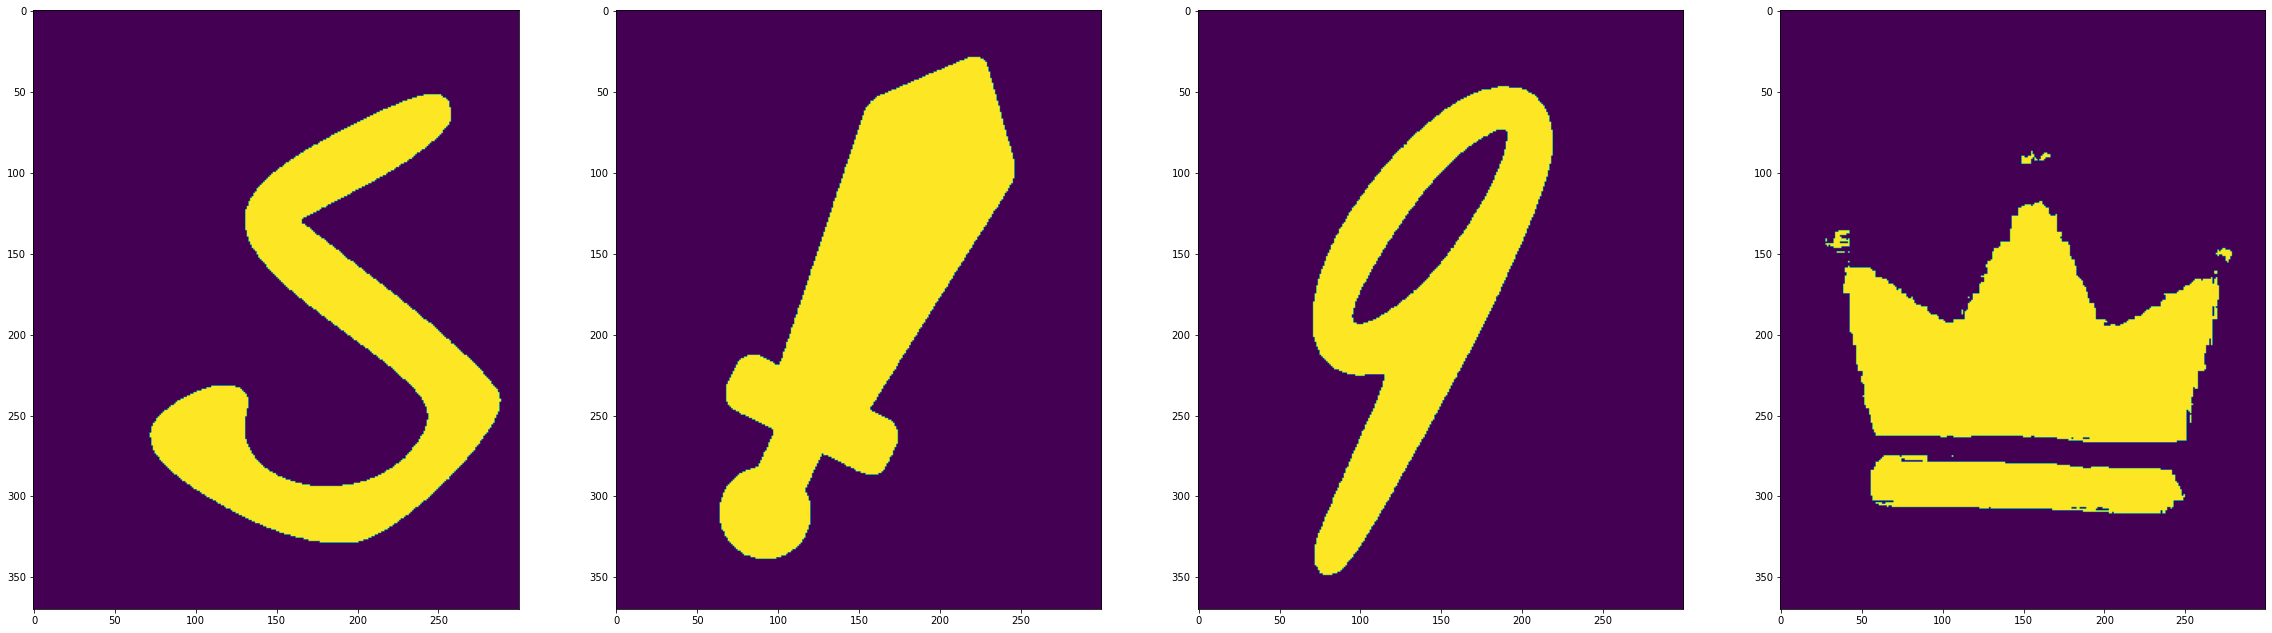

[4, 5, 2, 6]
game1 image2


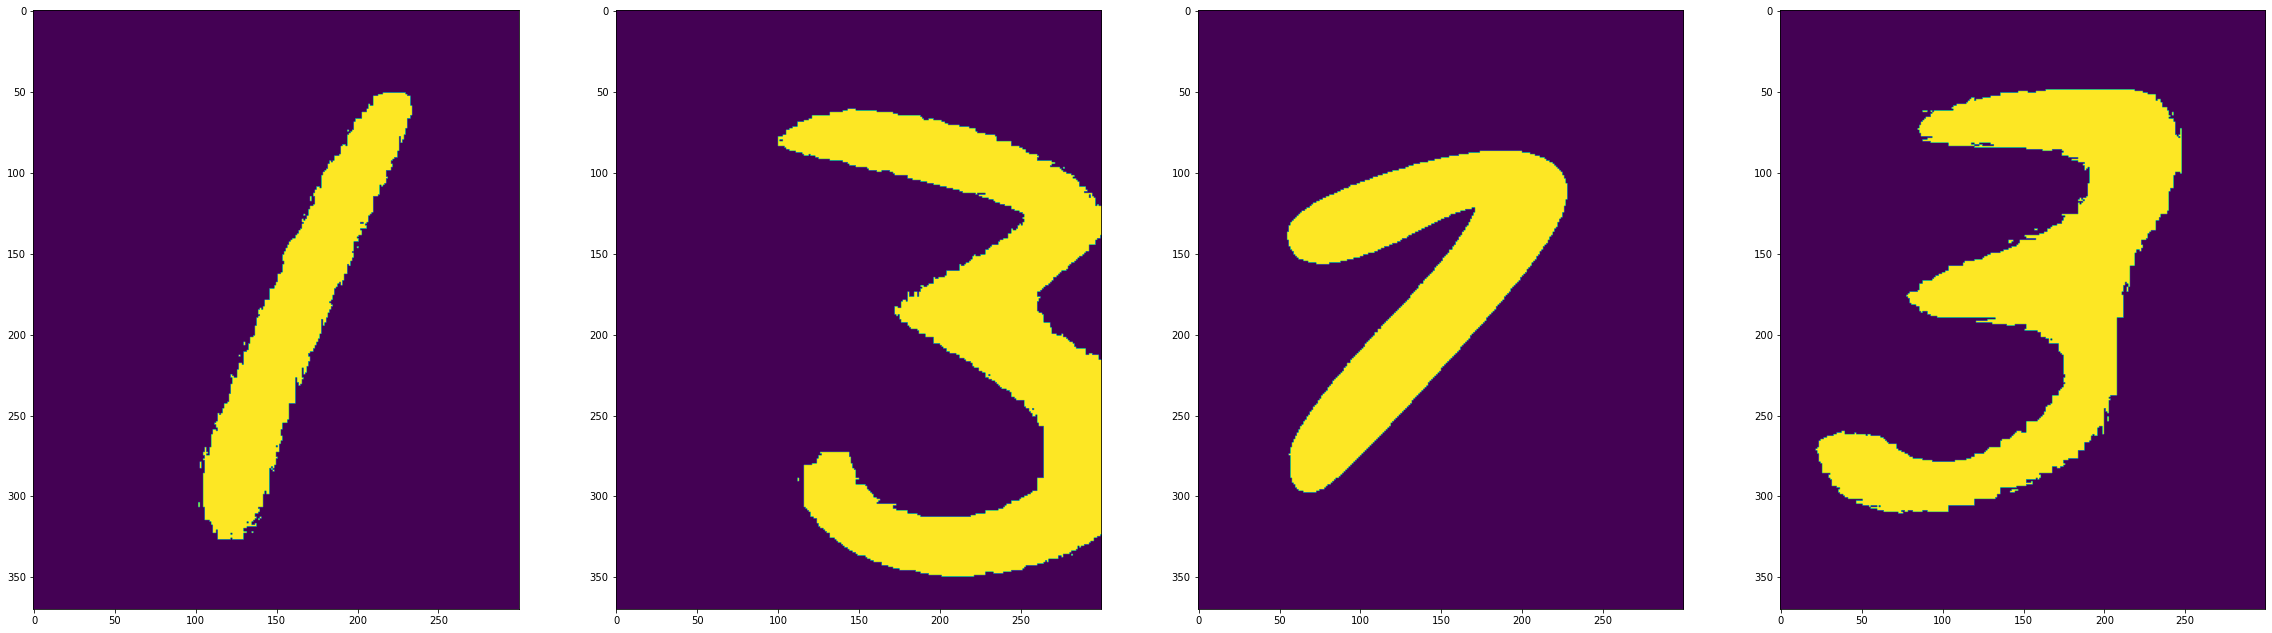

[4, 5, 2, 6]
game1 image3


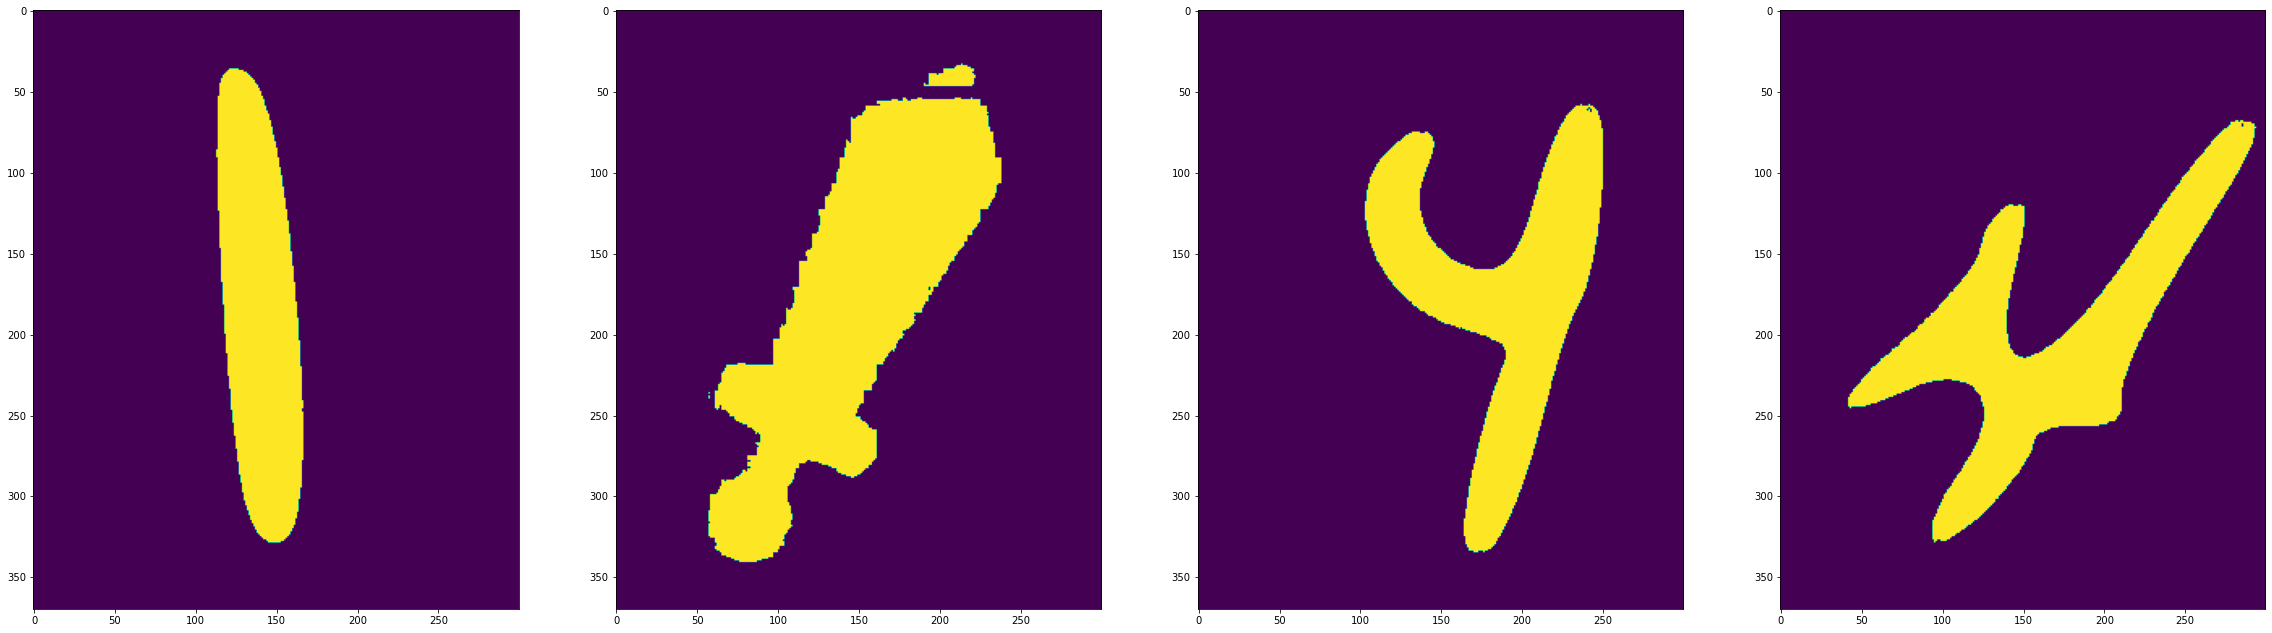

[4, 5, 2, 6]
game1 image4


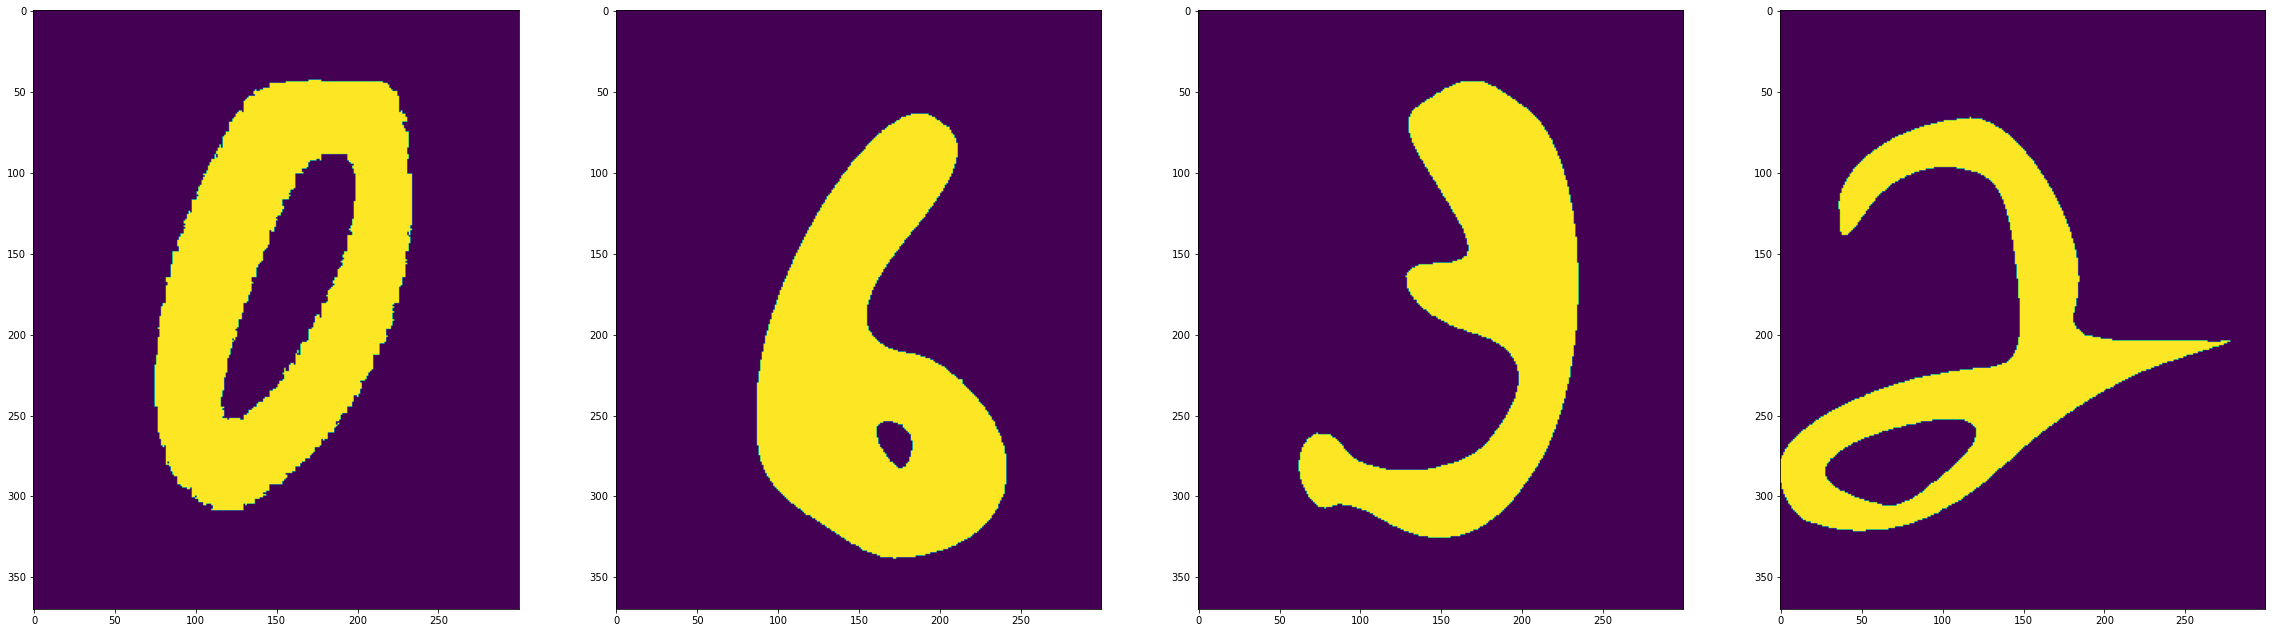

[4, 5, 2, 6]
game1 image5


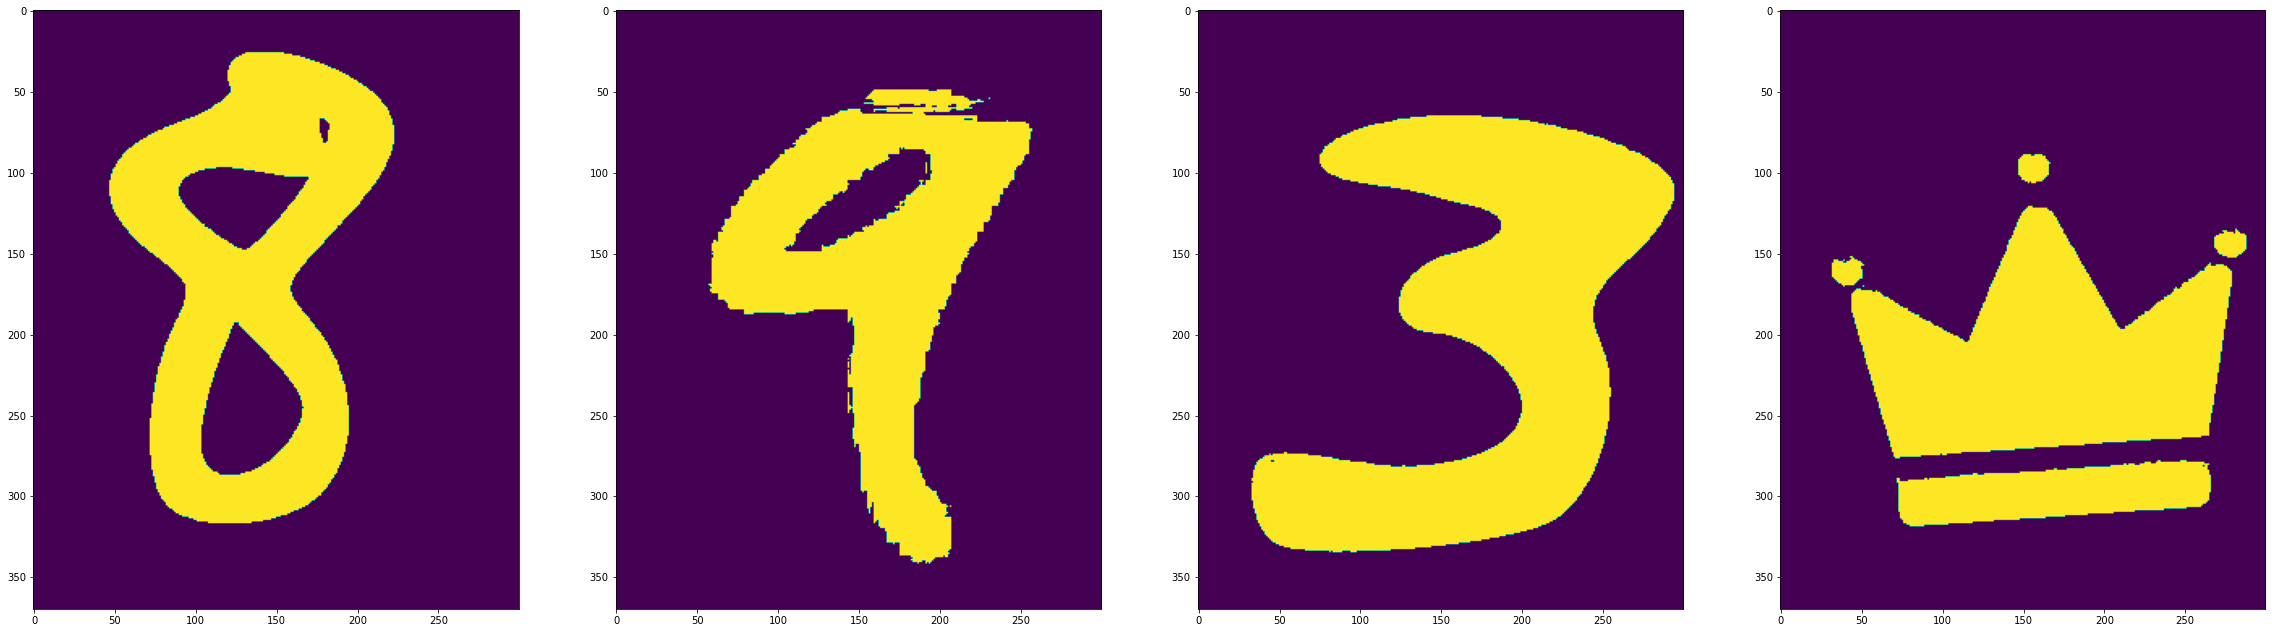

[4, 5, 2, 6]
game1 image6


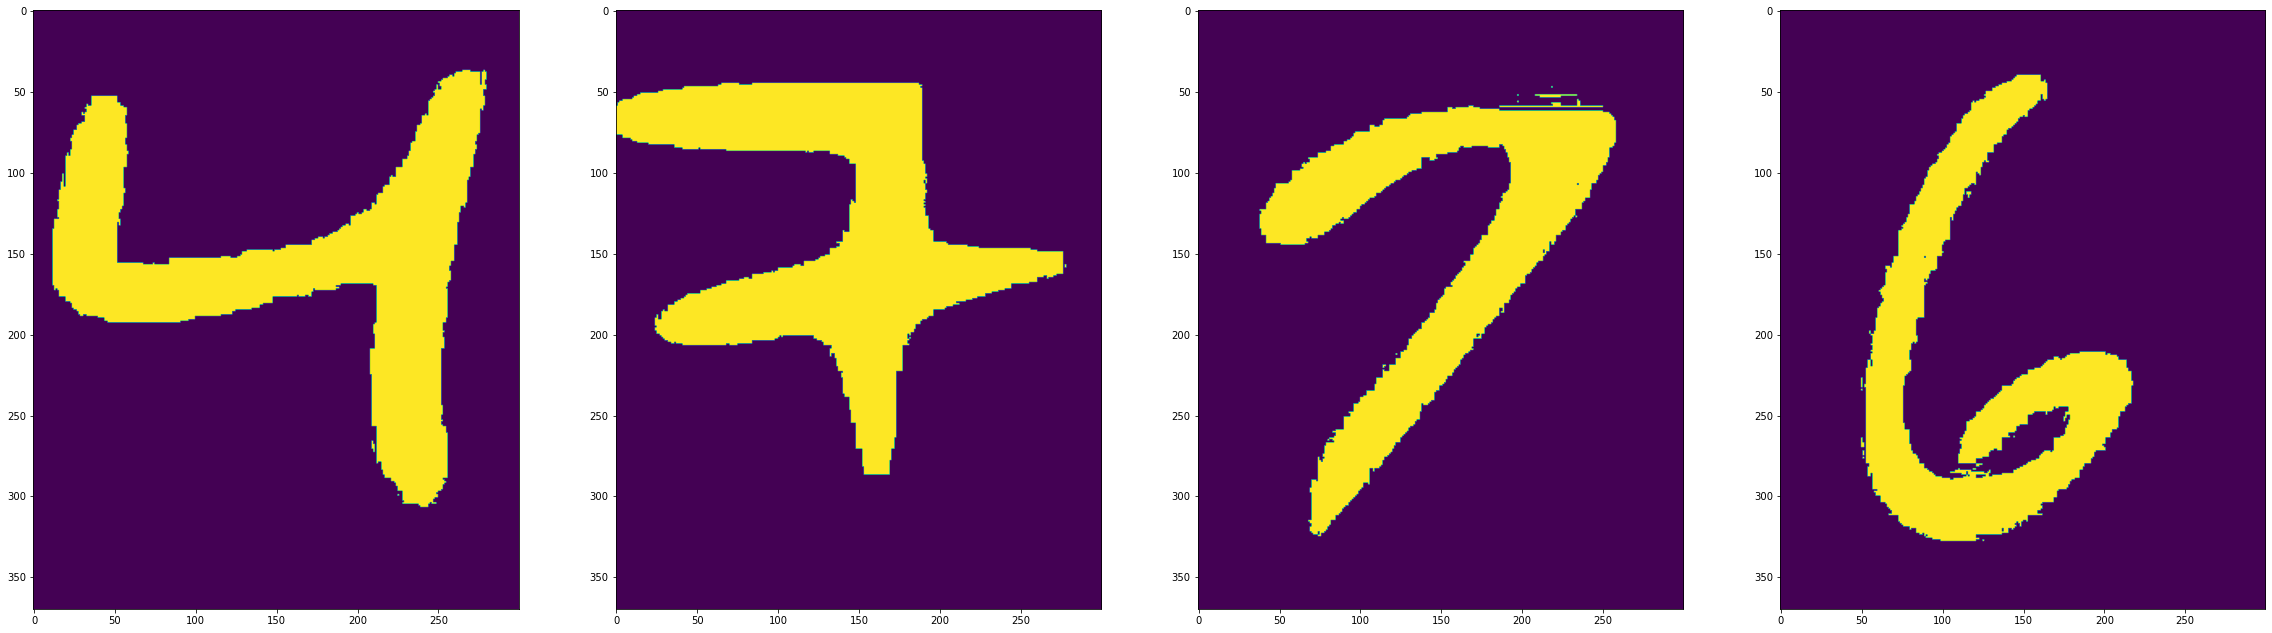

[4, 5, 2, 6]
game1 image7


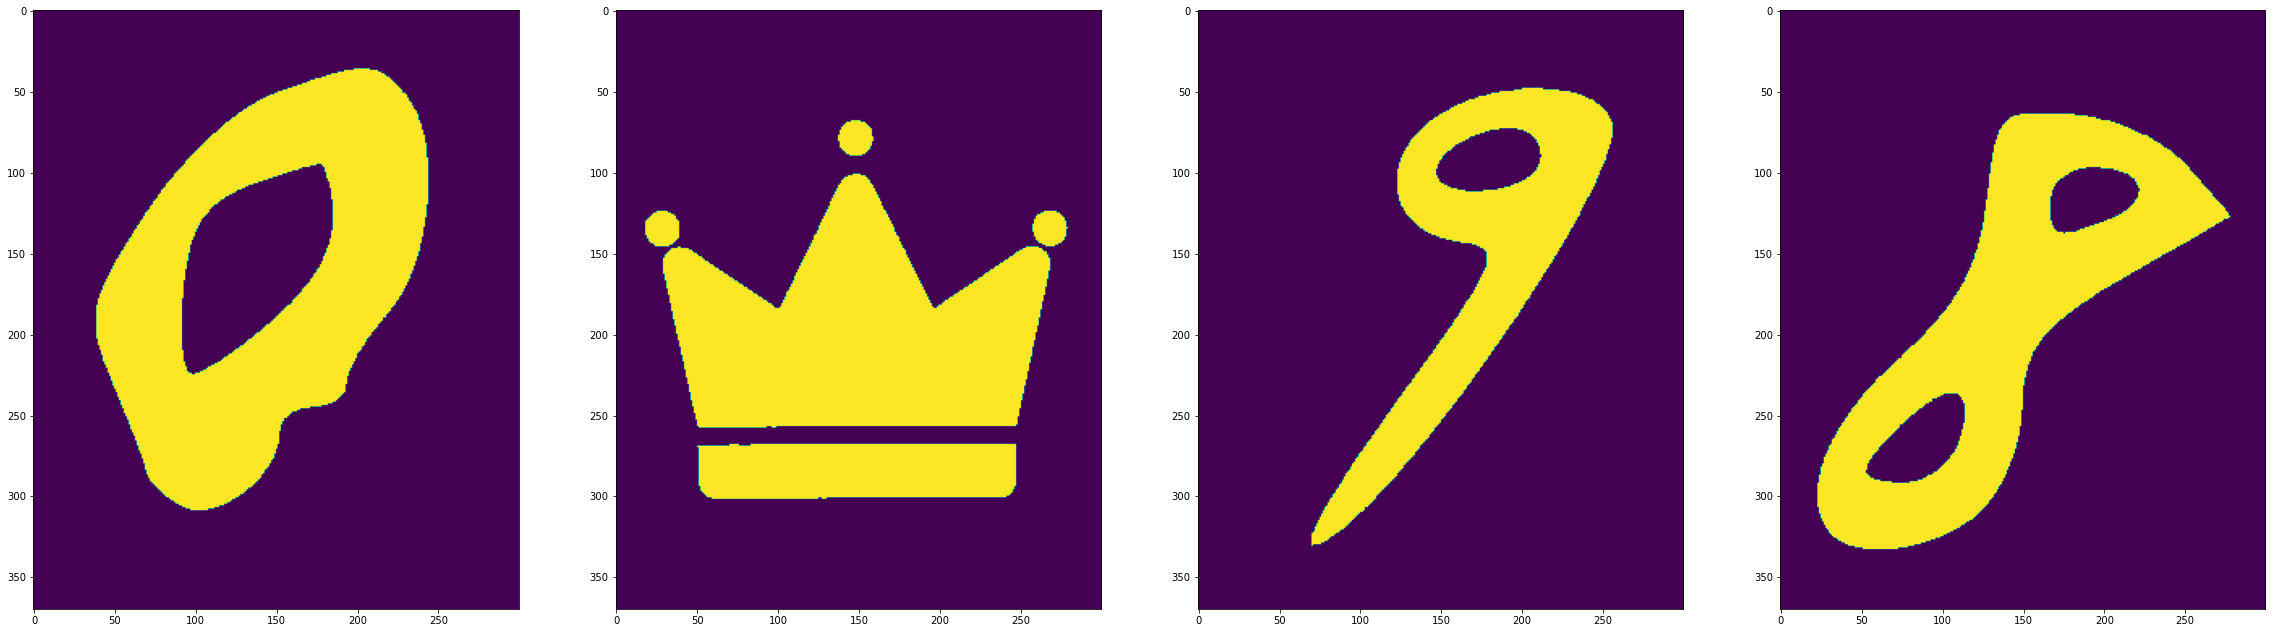

[4, 5, 2, 6]
game1 image8


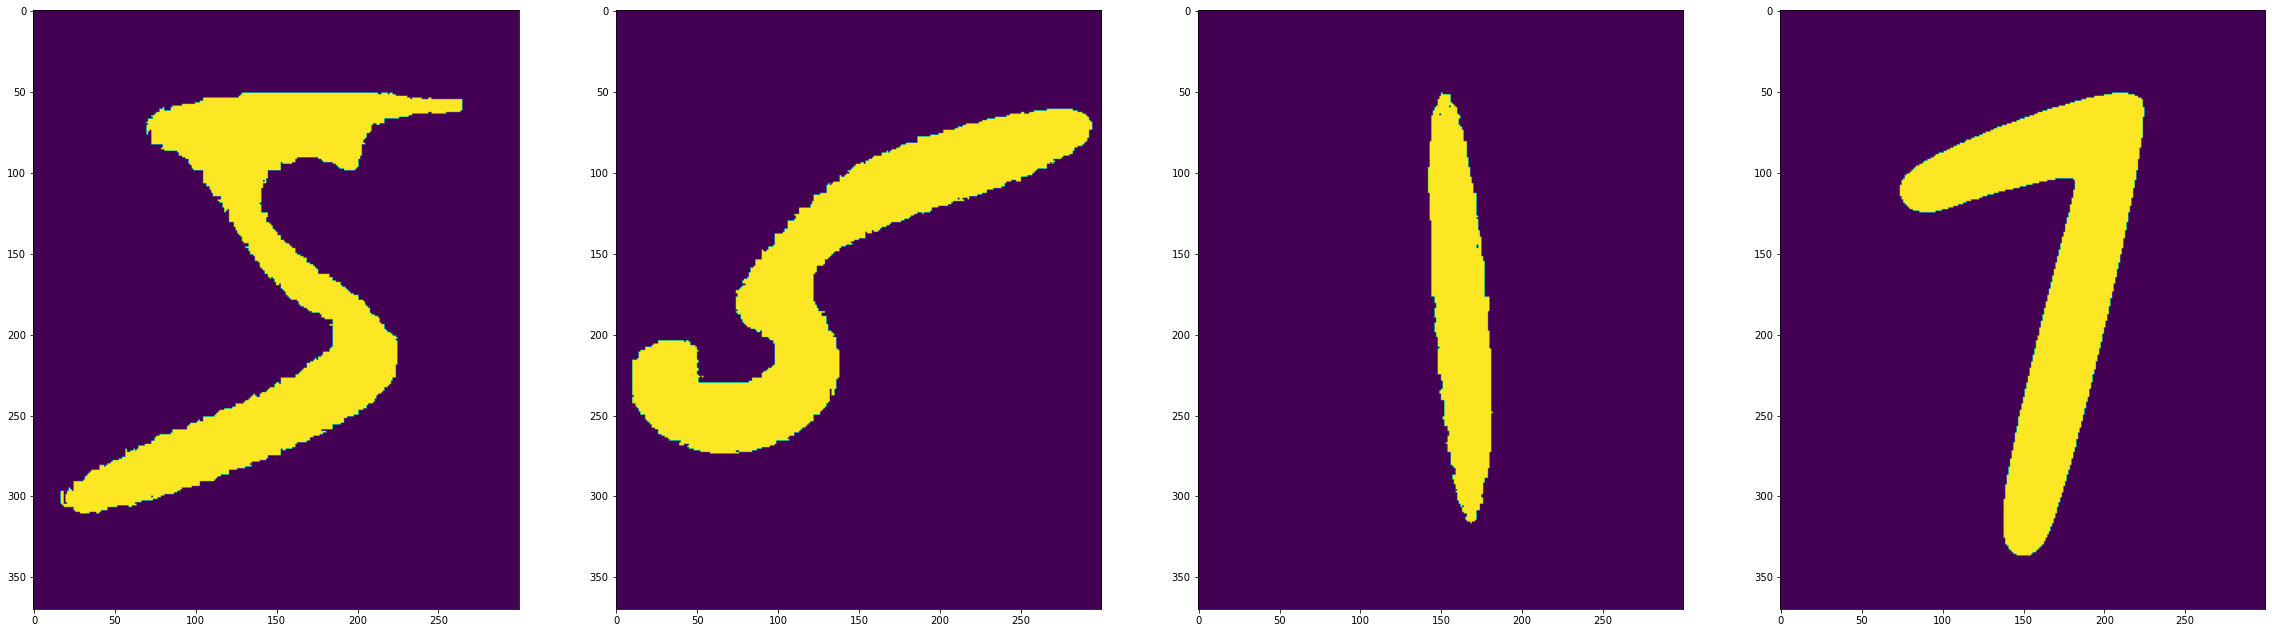

[4, 5, 2, 6]
game1 image9


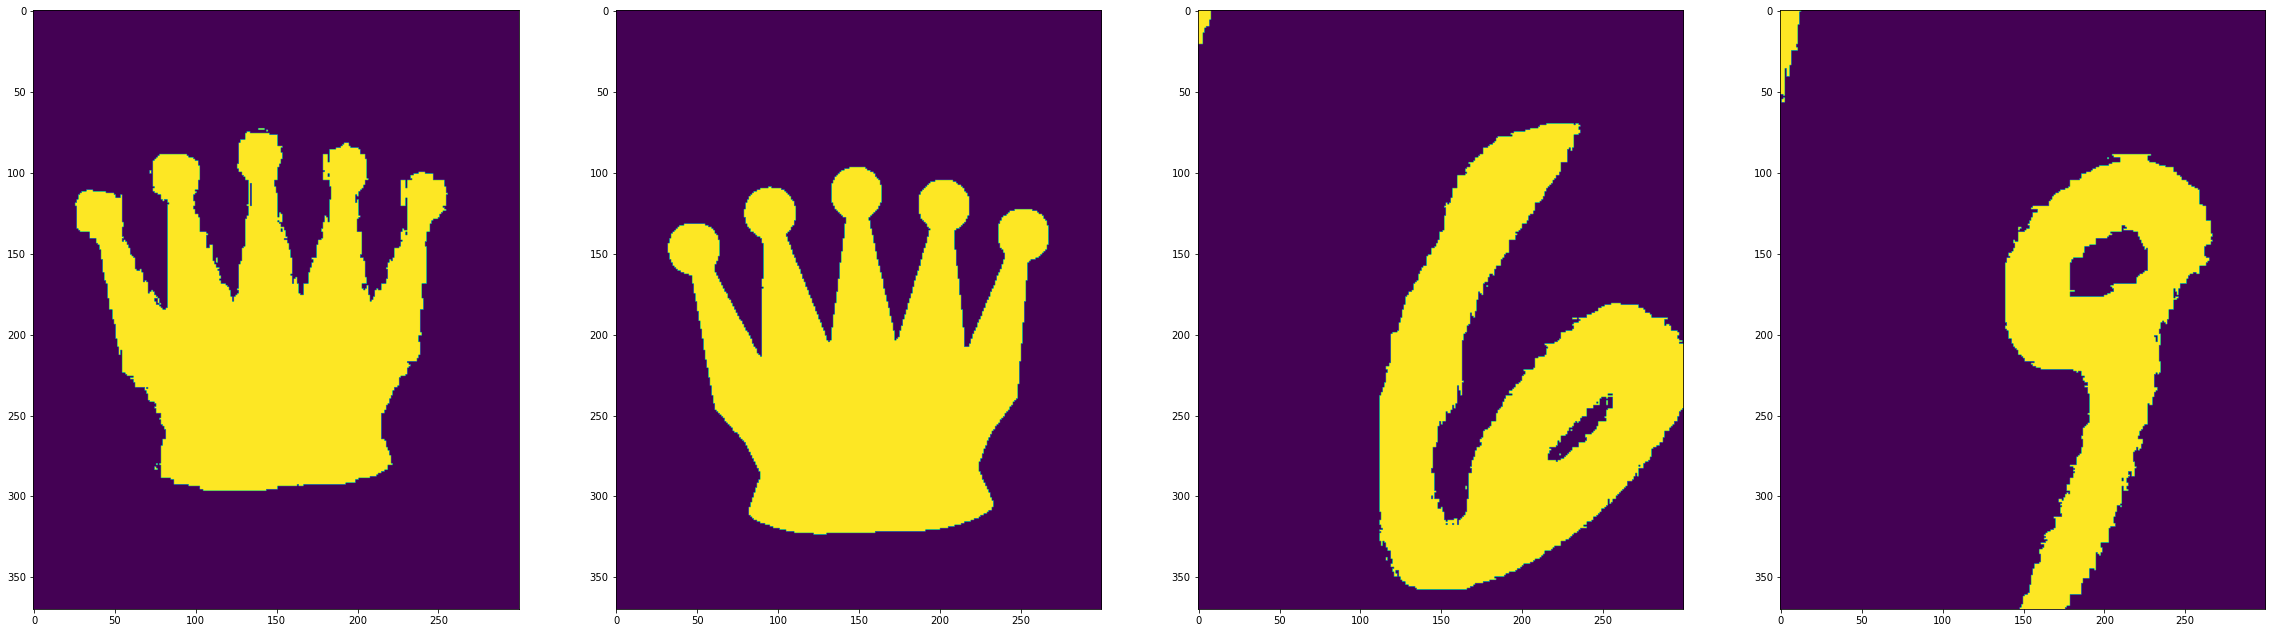

[4, 5, 2, 6]
game1 image10


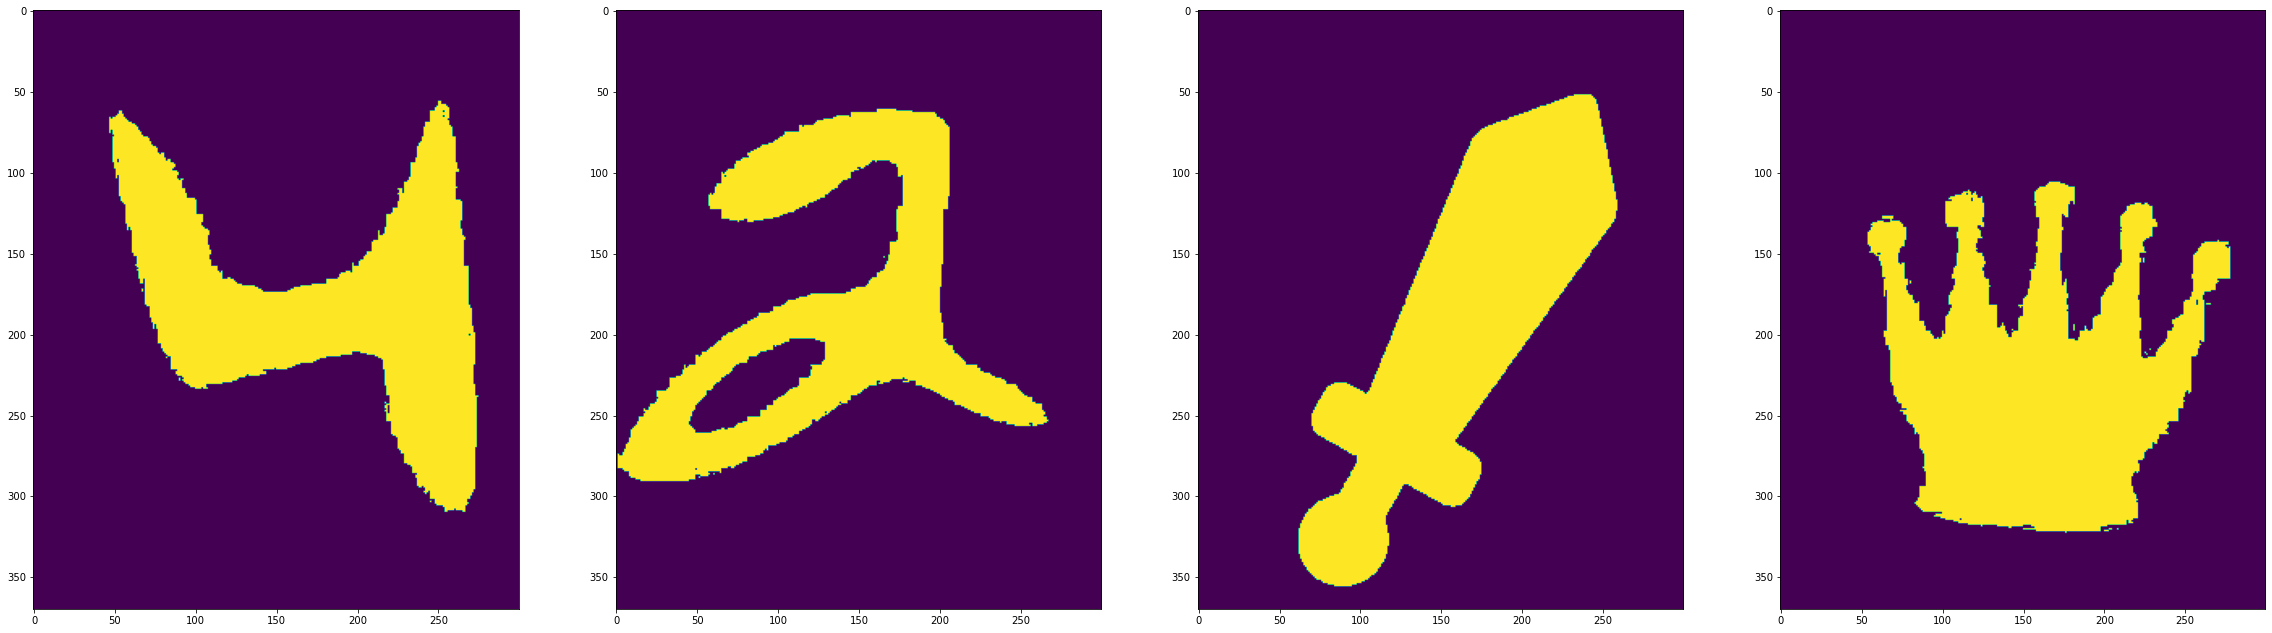

[4, 5, 2, 6]
game1 image11


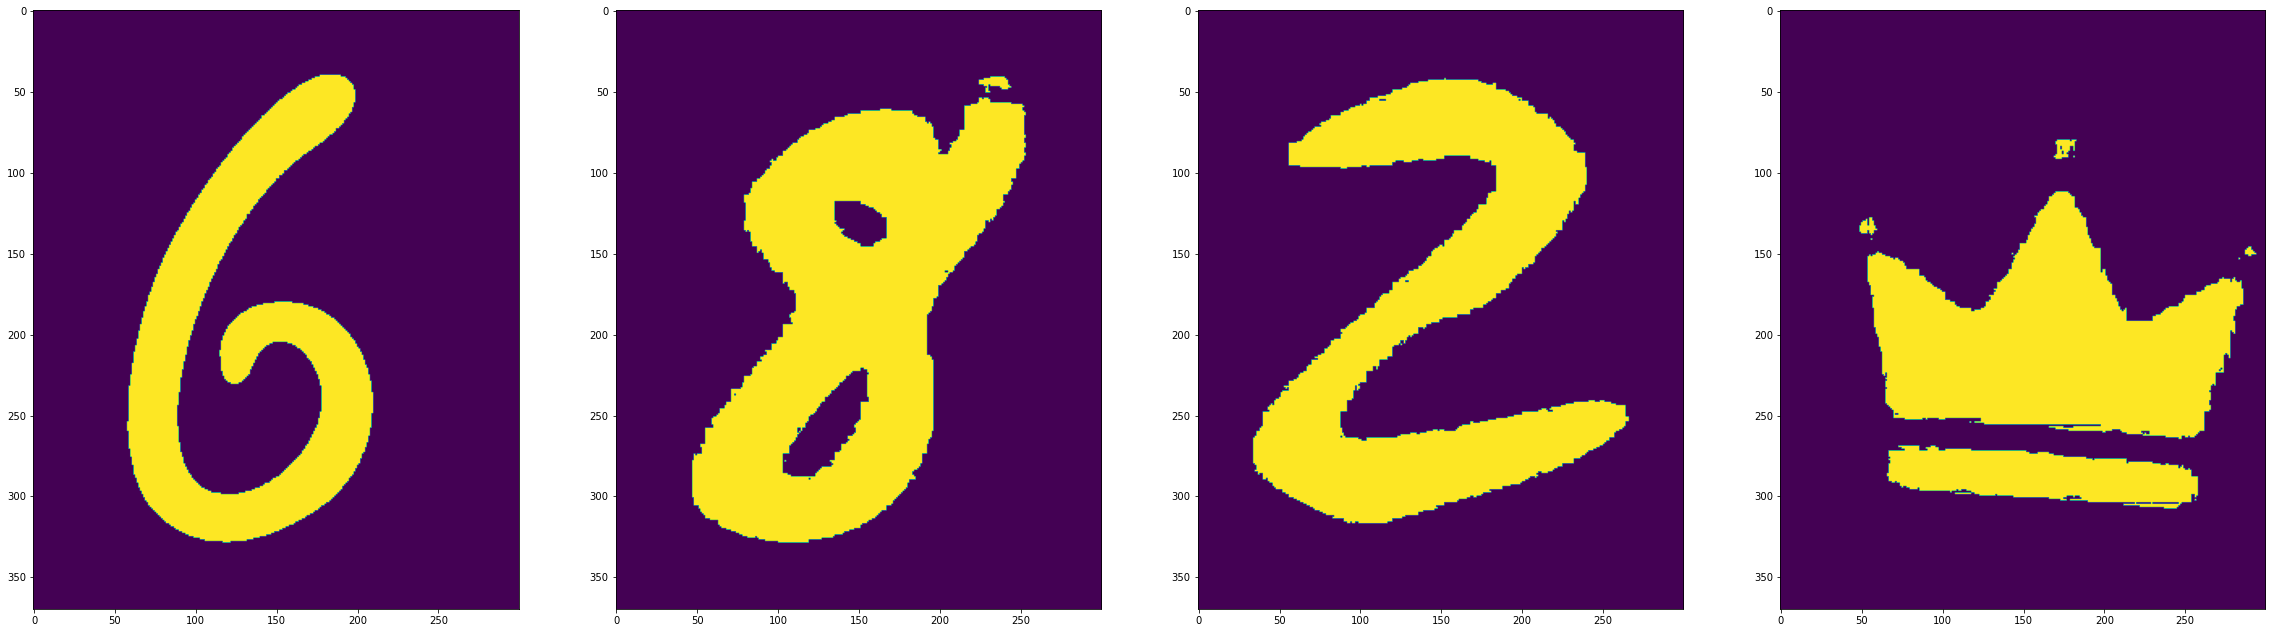

[4, 5, 2, 6]
game1 image12


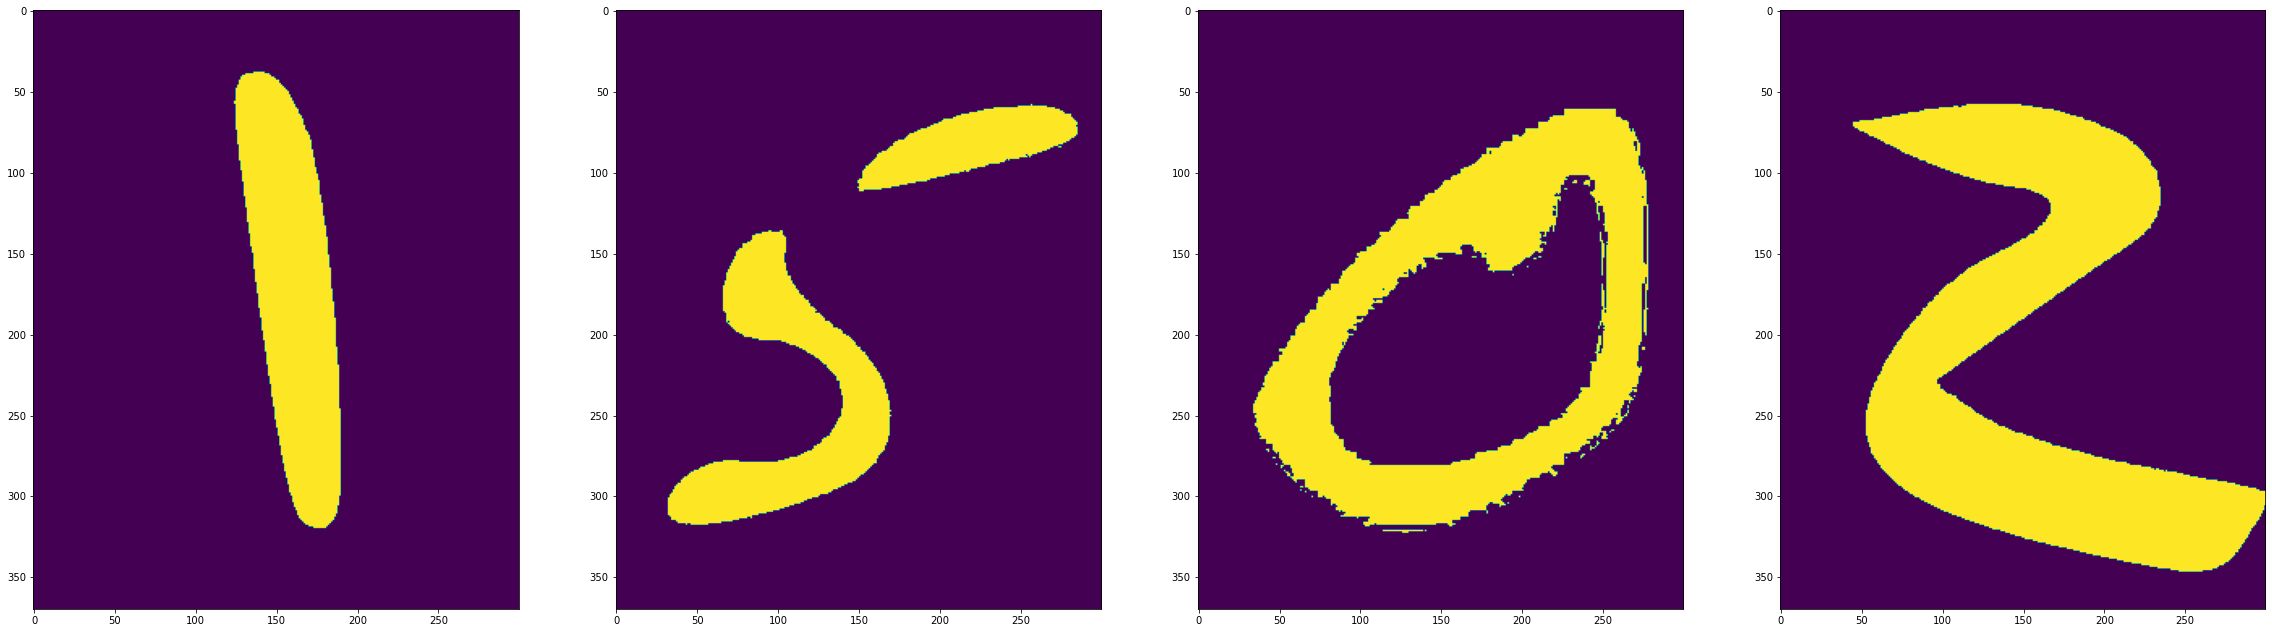

[4, 5, 2, 6]
game2
game2 image0


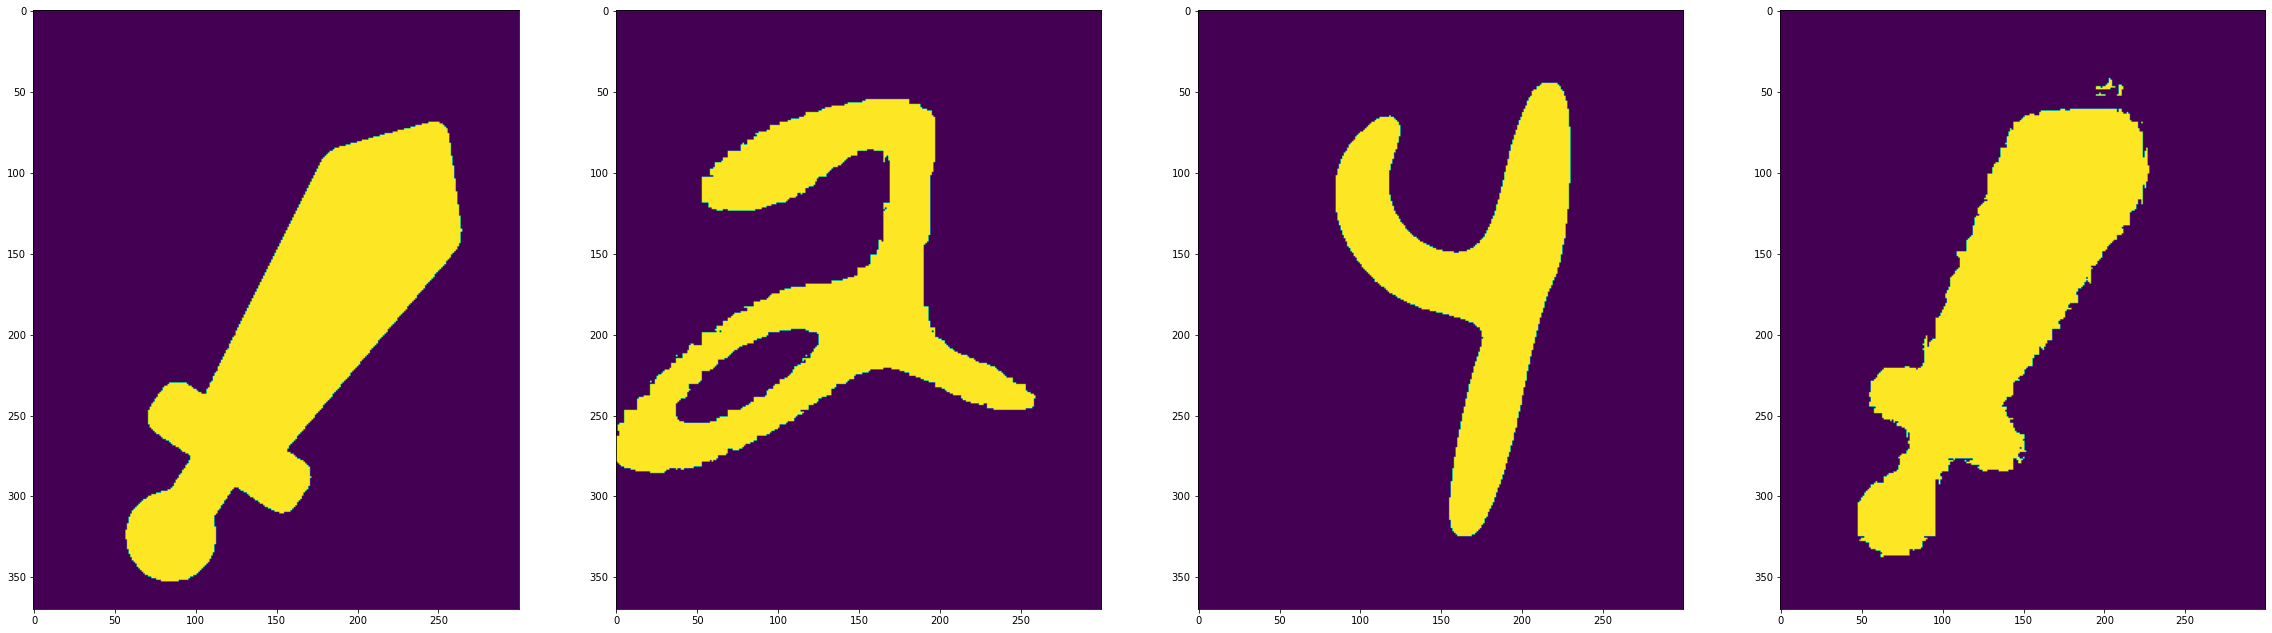

[4, 5, 2, 6]
game2 image1


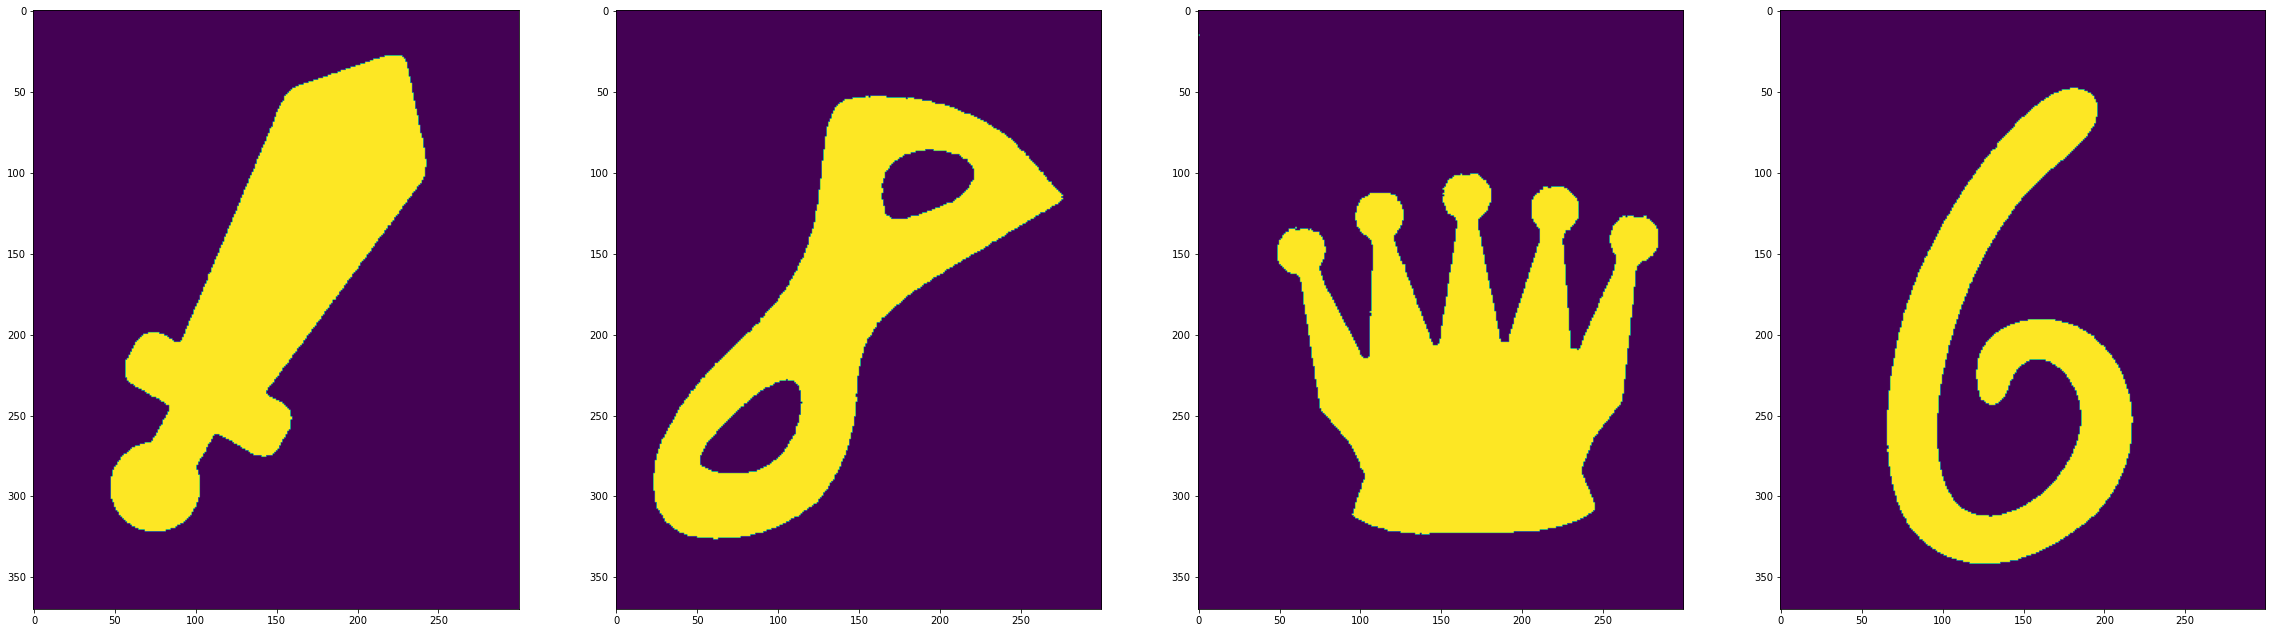

[4, 5, 2, 6]
game2 image2


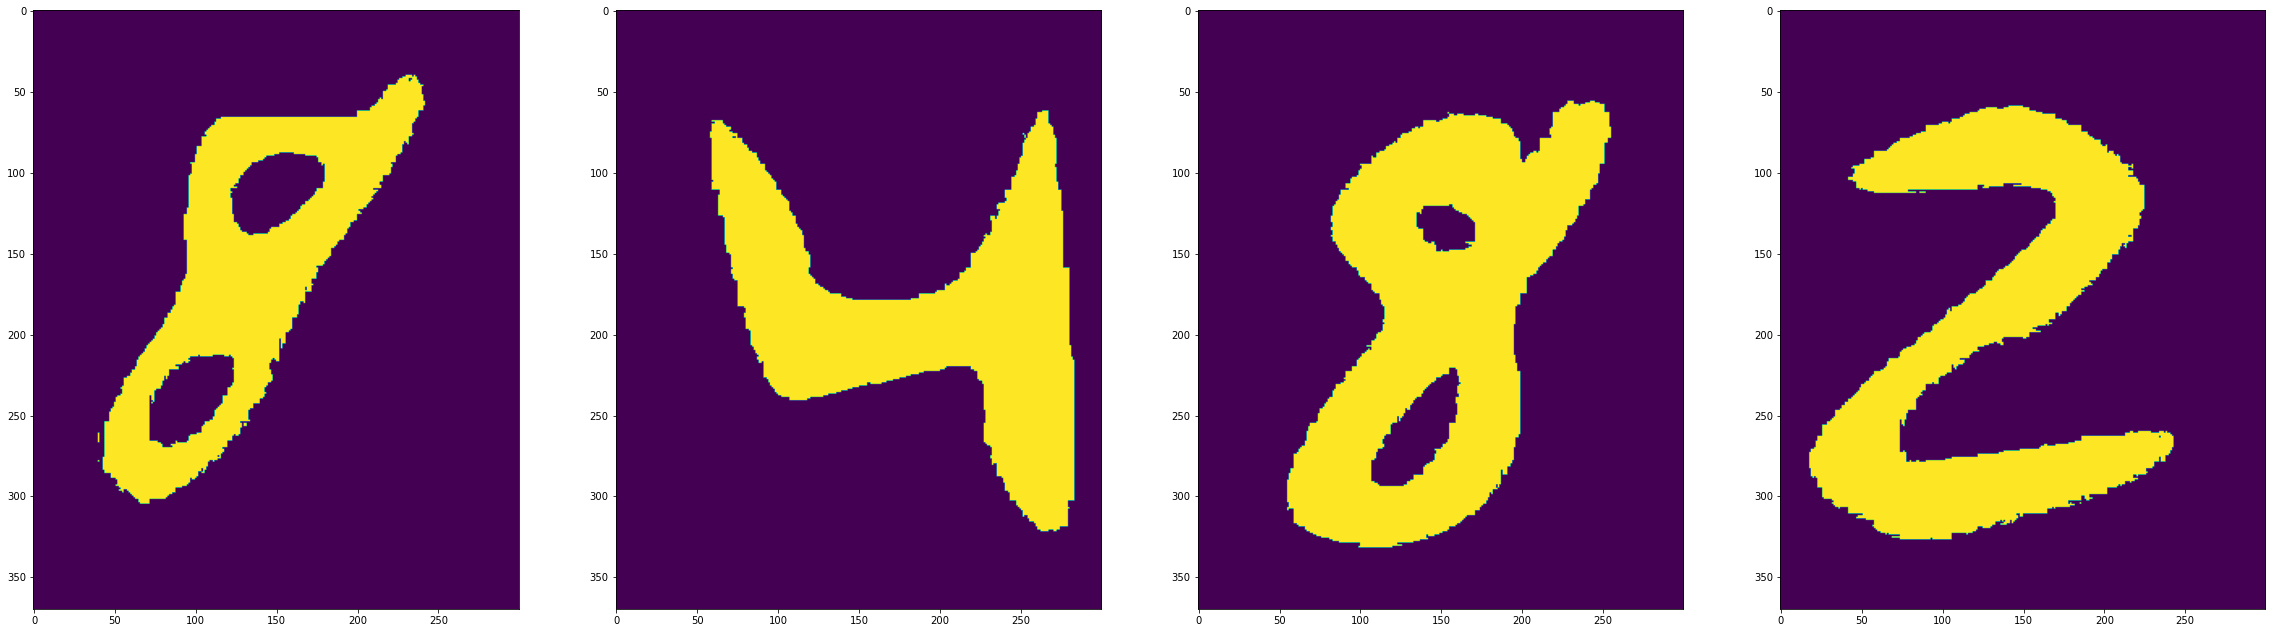

[4, 5, 2, 6]
game2 image3


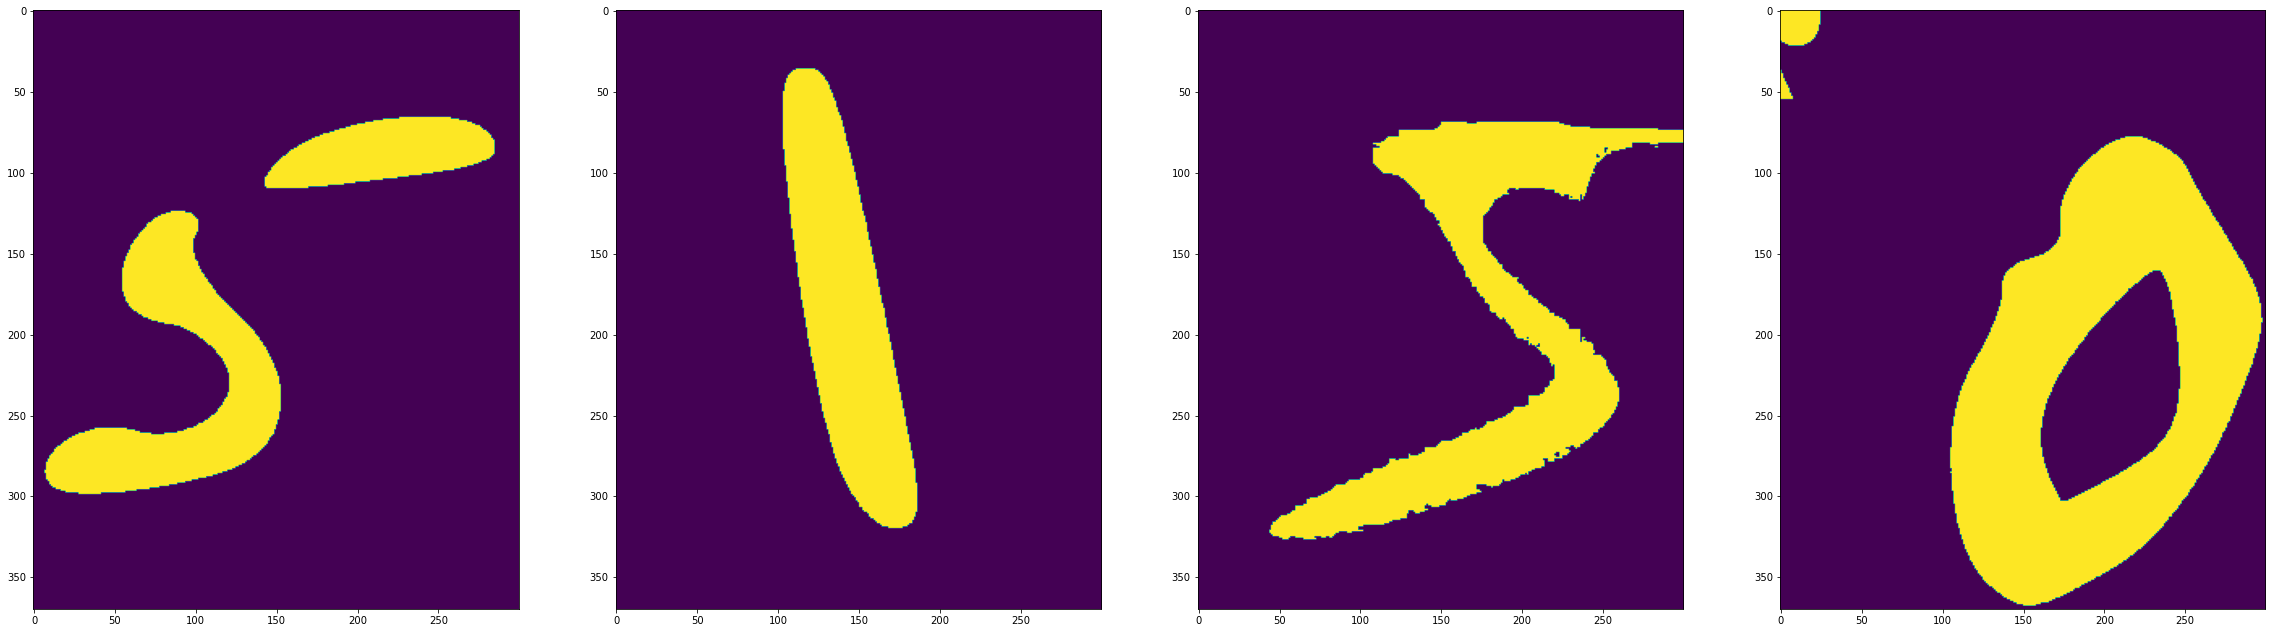

[4, 5, 2, 6]
game2 image4


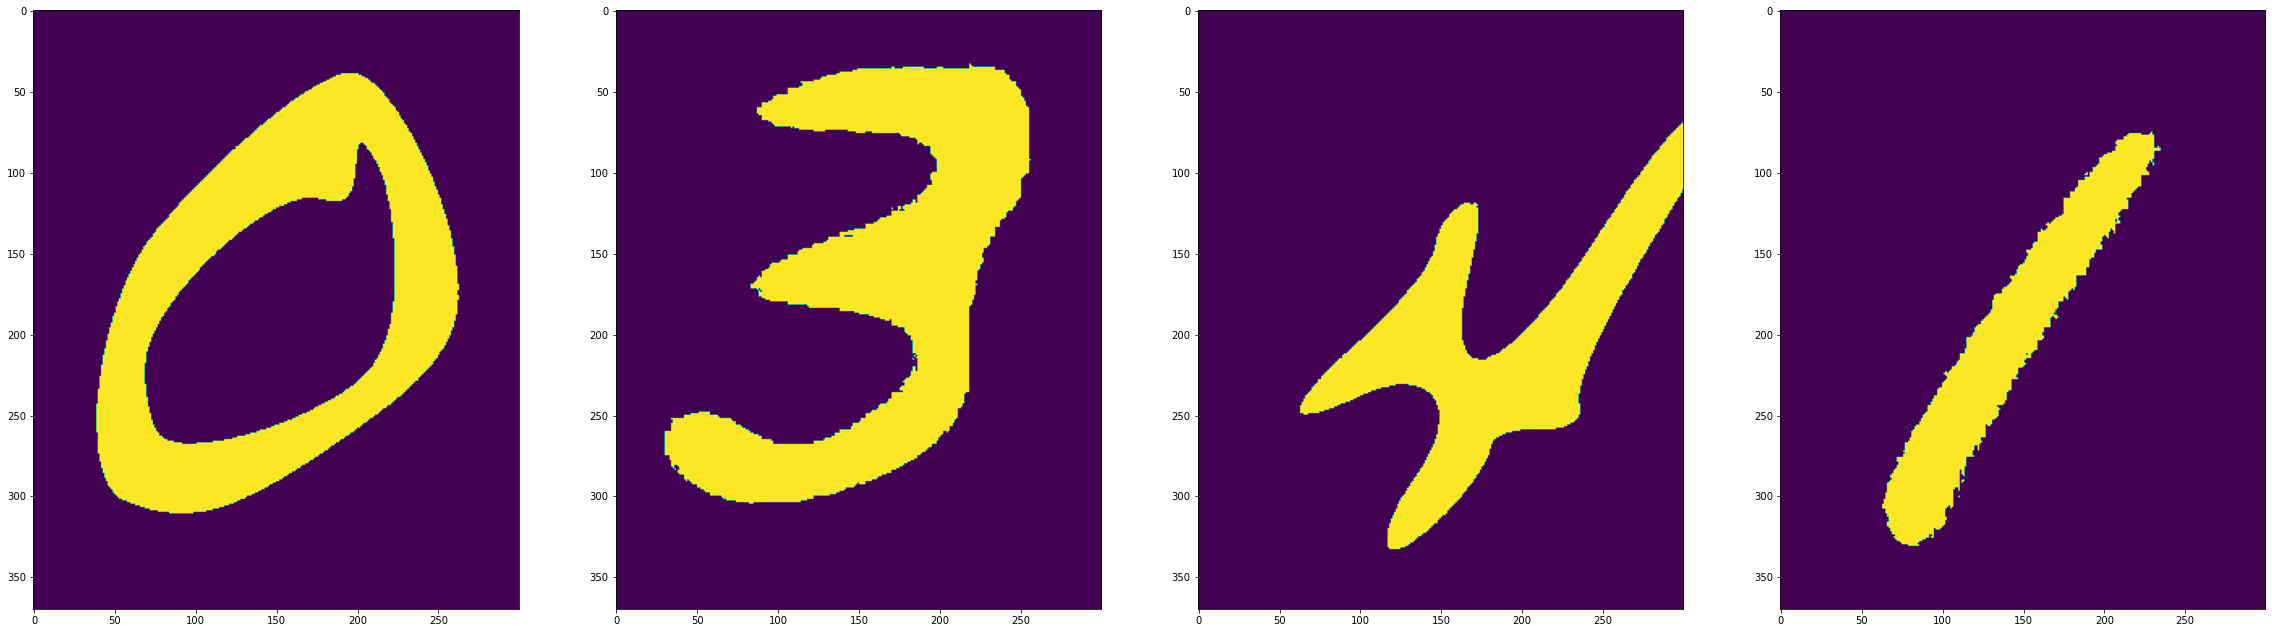

[4, 5, 2, 6]
game2 image5


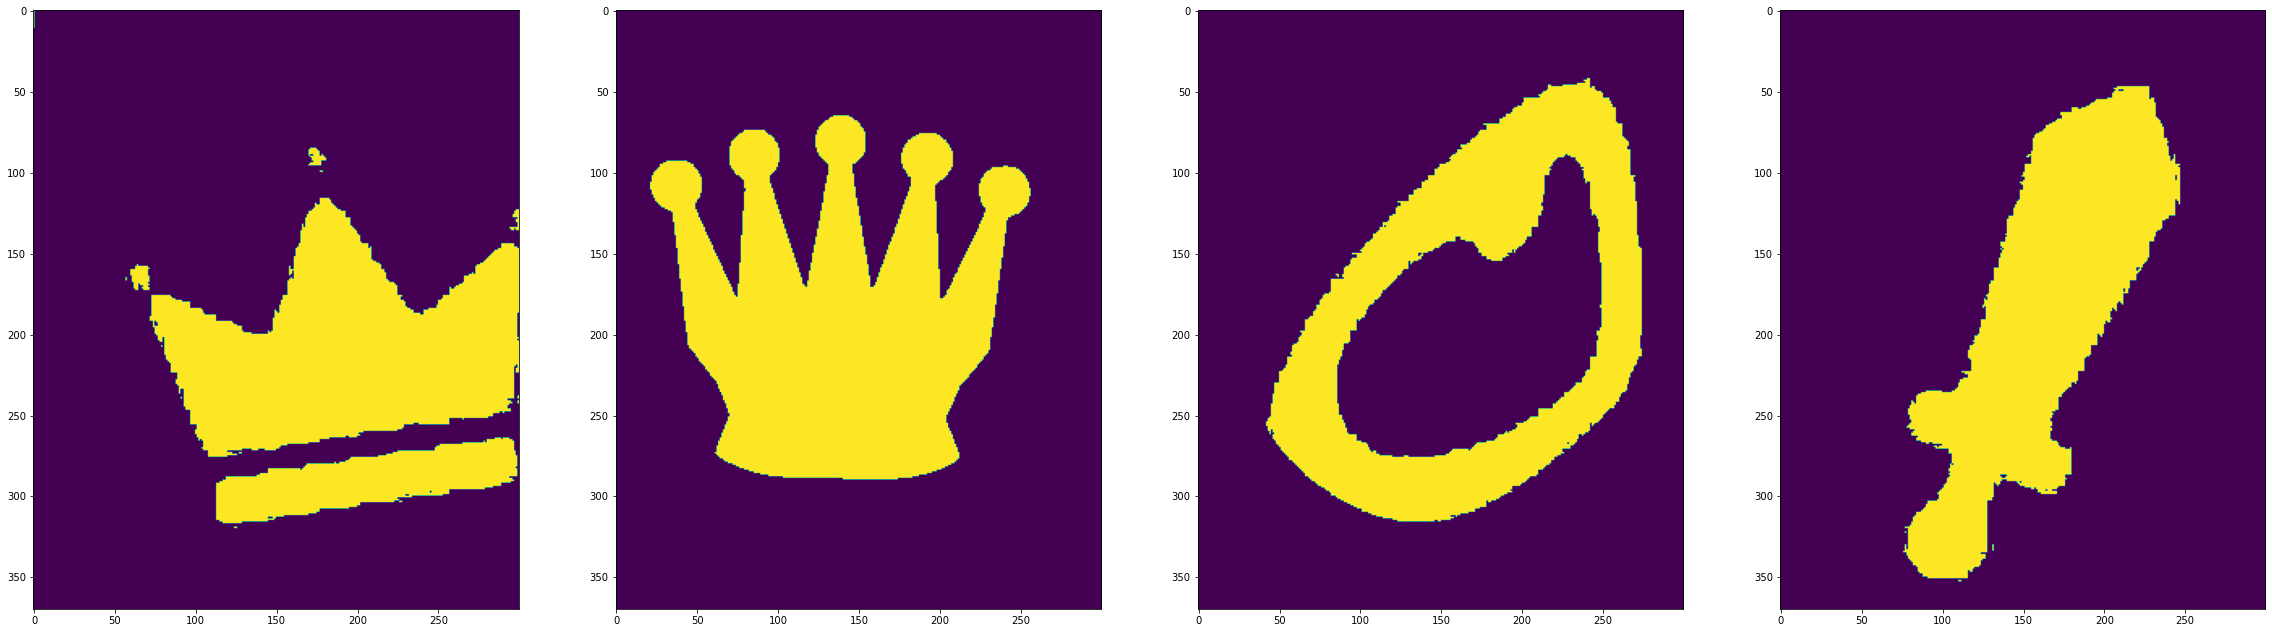

[4, 5, 2, 6]
game2 image6


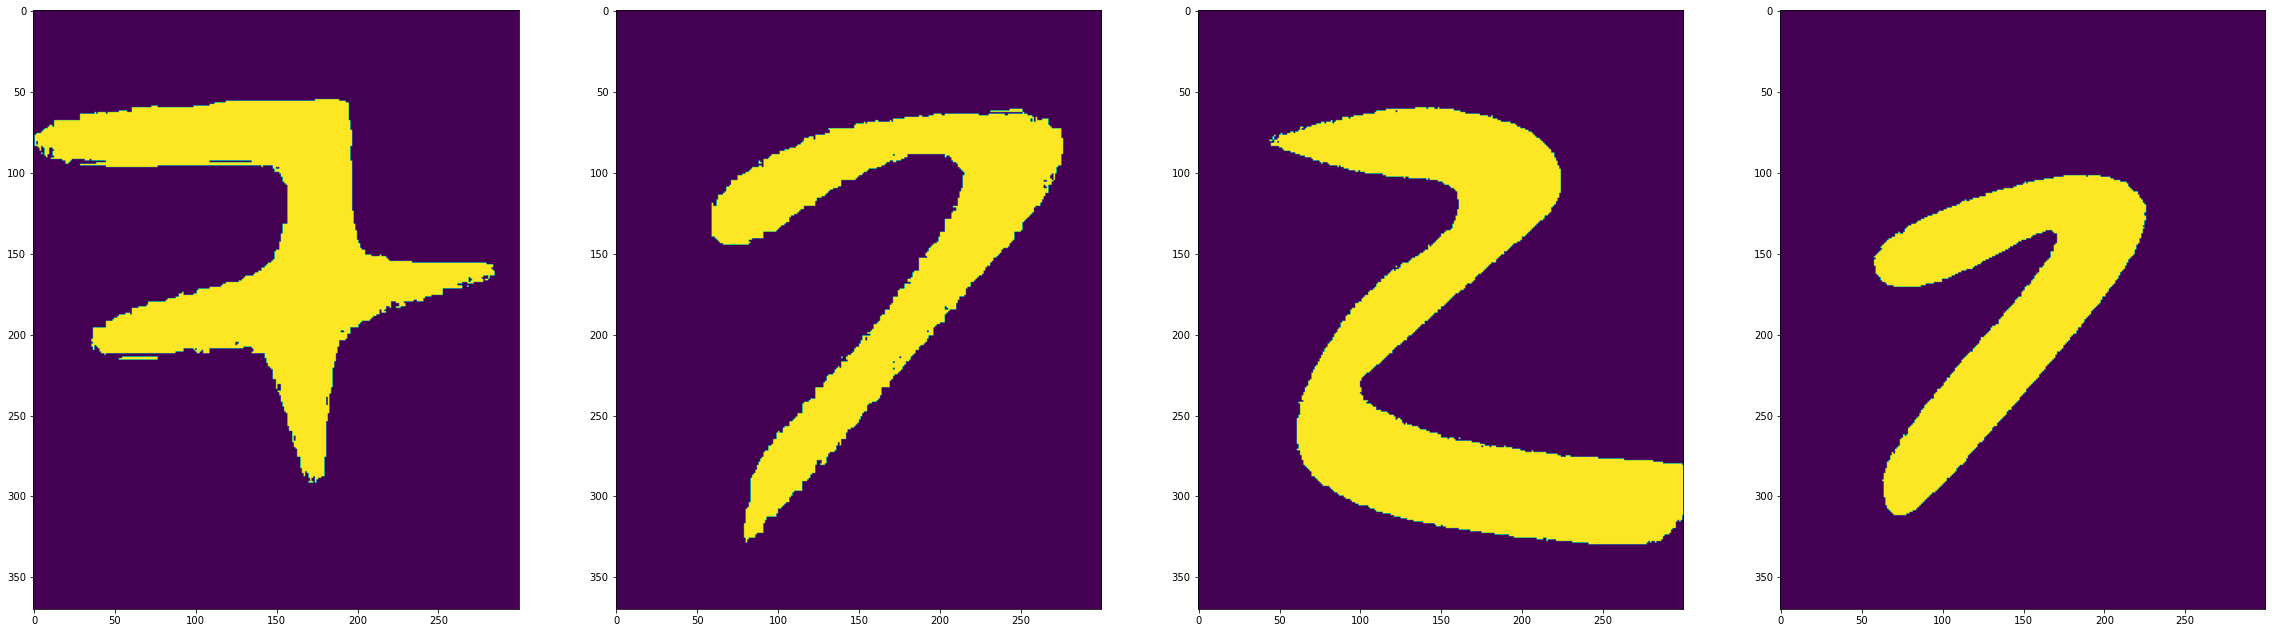

[4, 5, 2, 6]
game2 image7


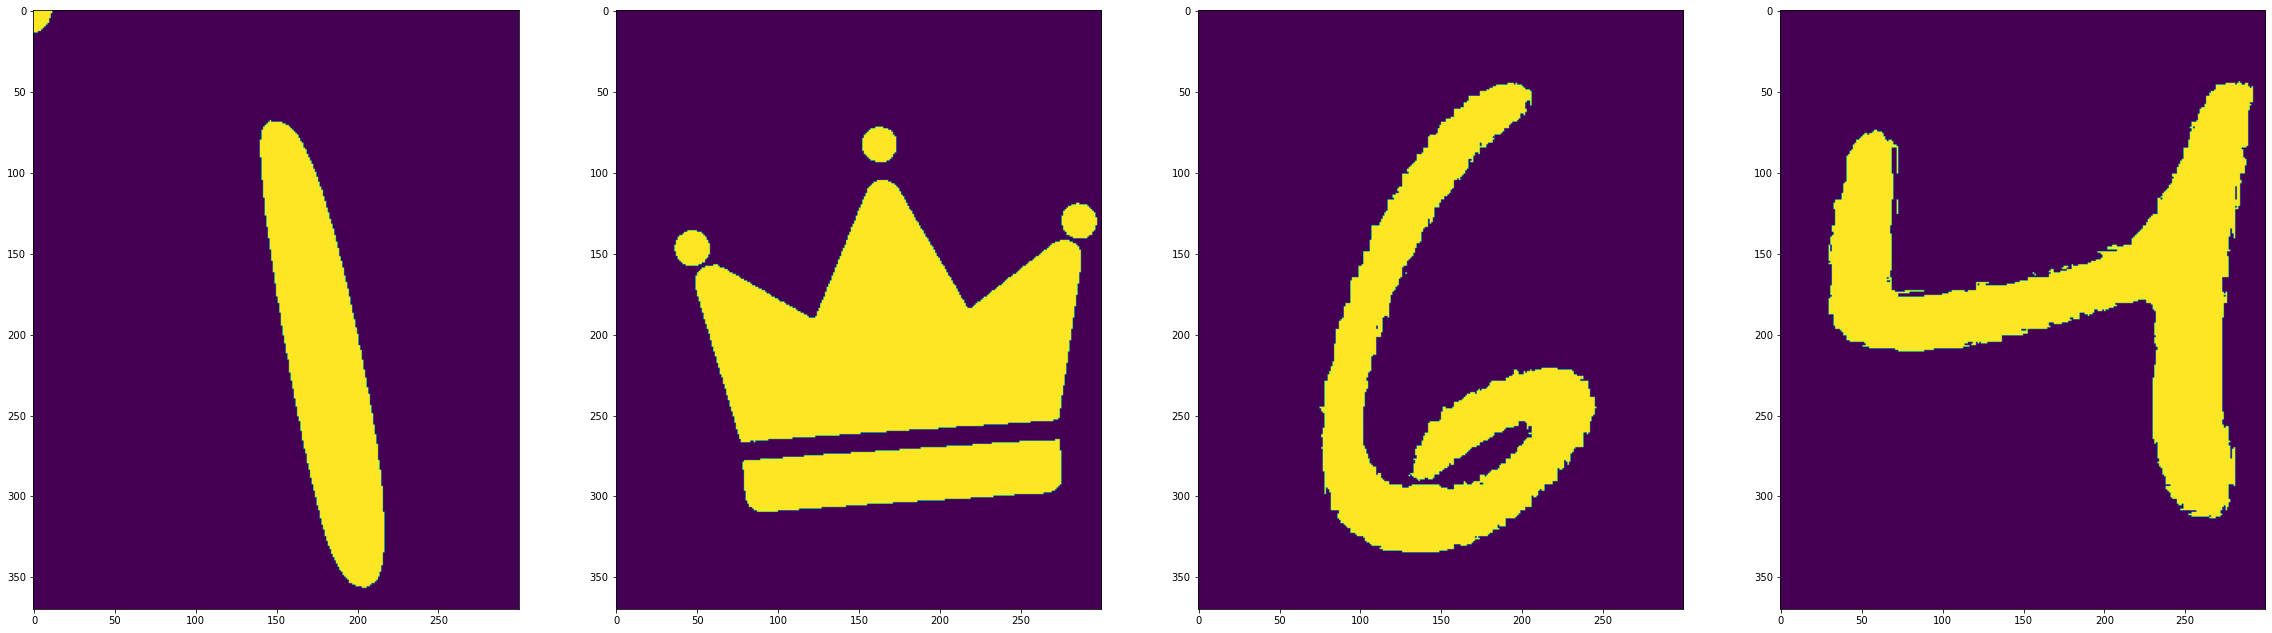

[4, 5, 2, 6]
game2 image8


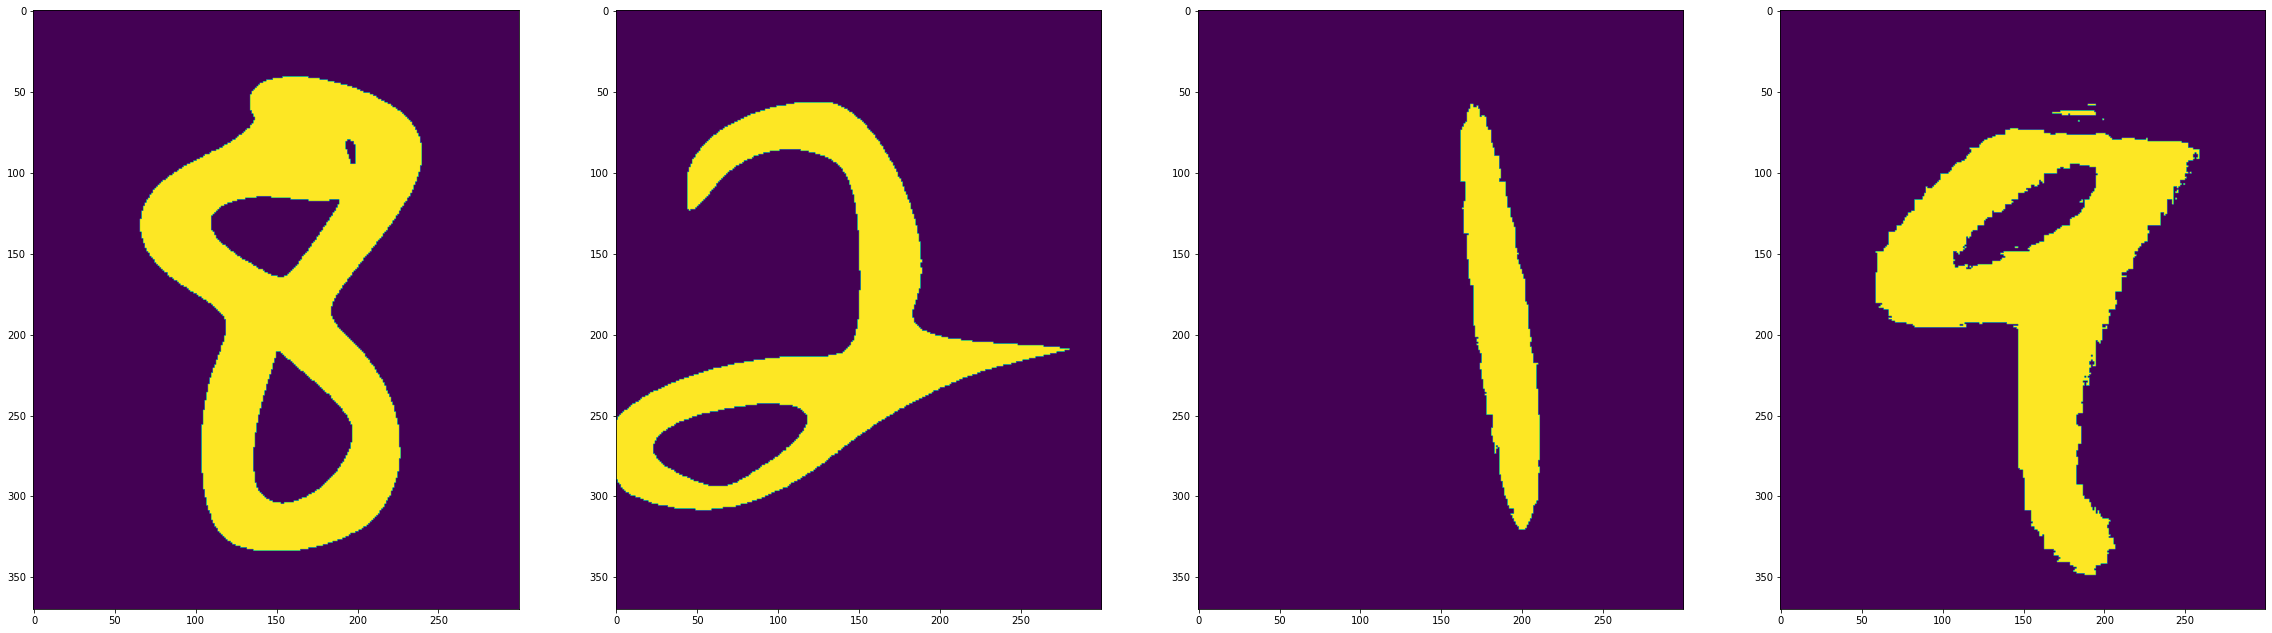

[4, 5, 2, 6]
game2 image9


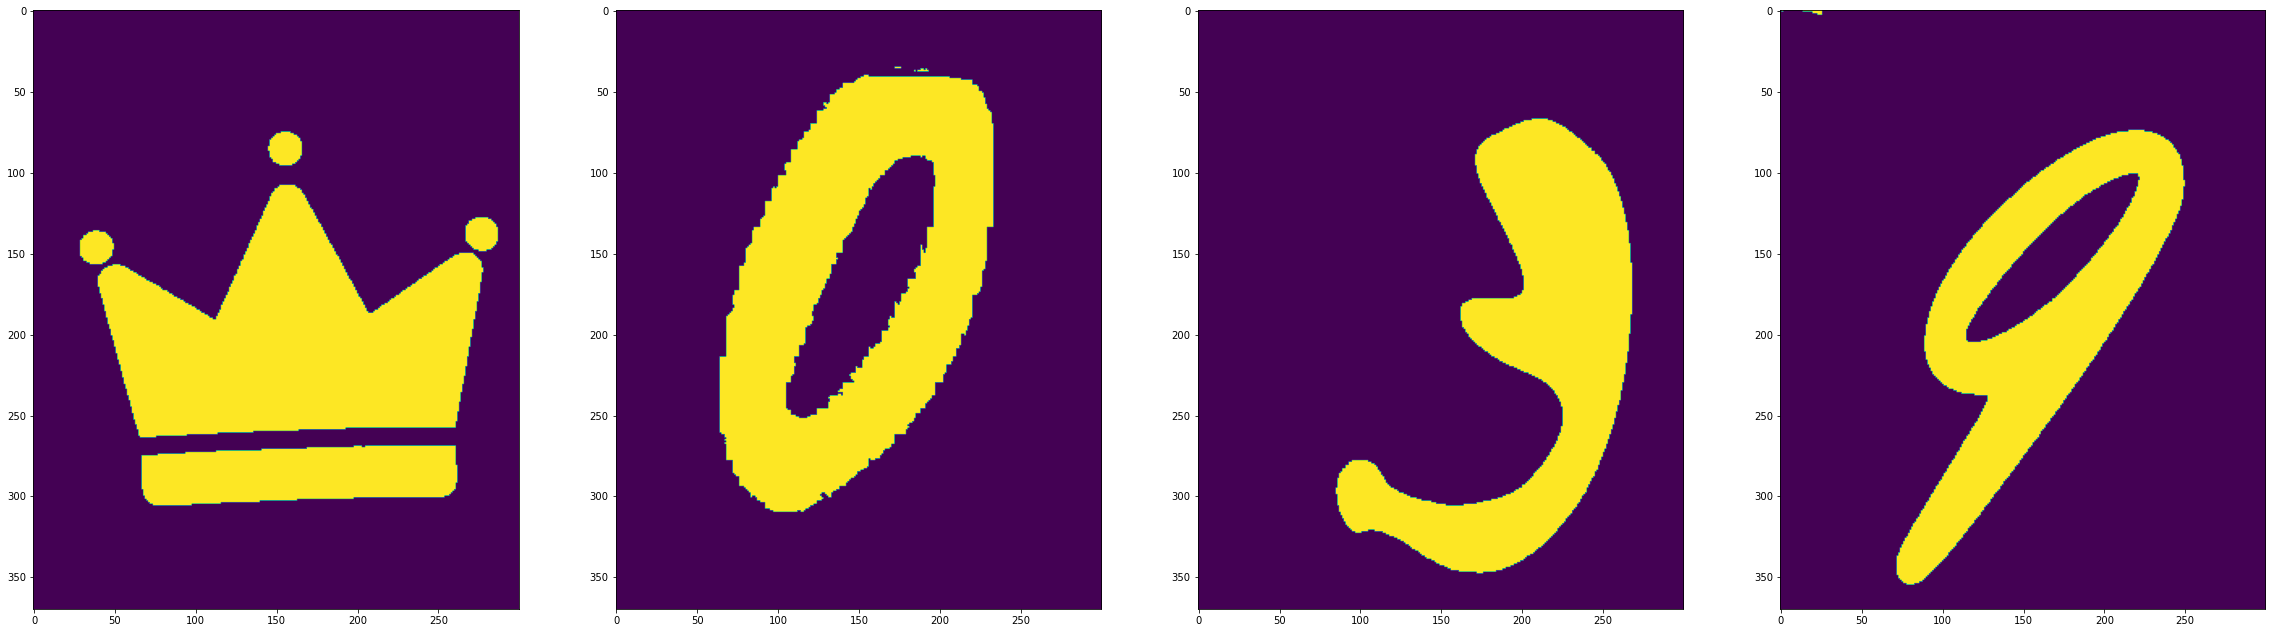

[4, 5, 2, 6]
game2 image10


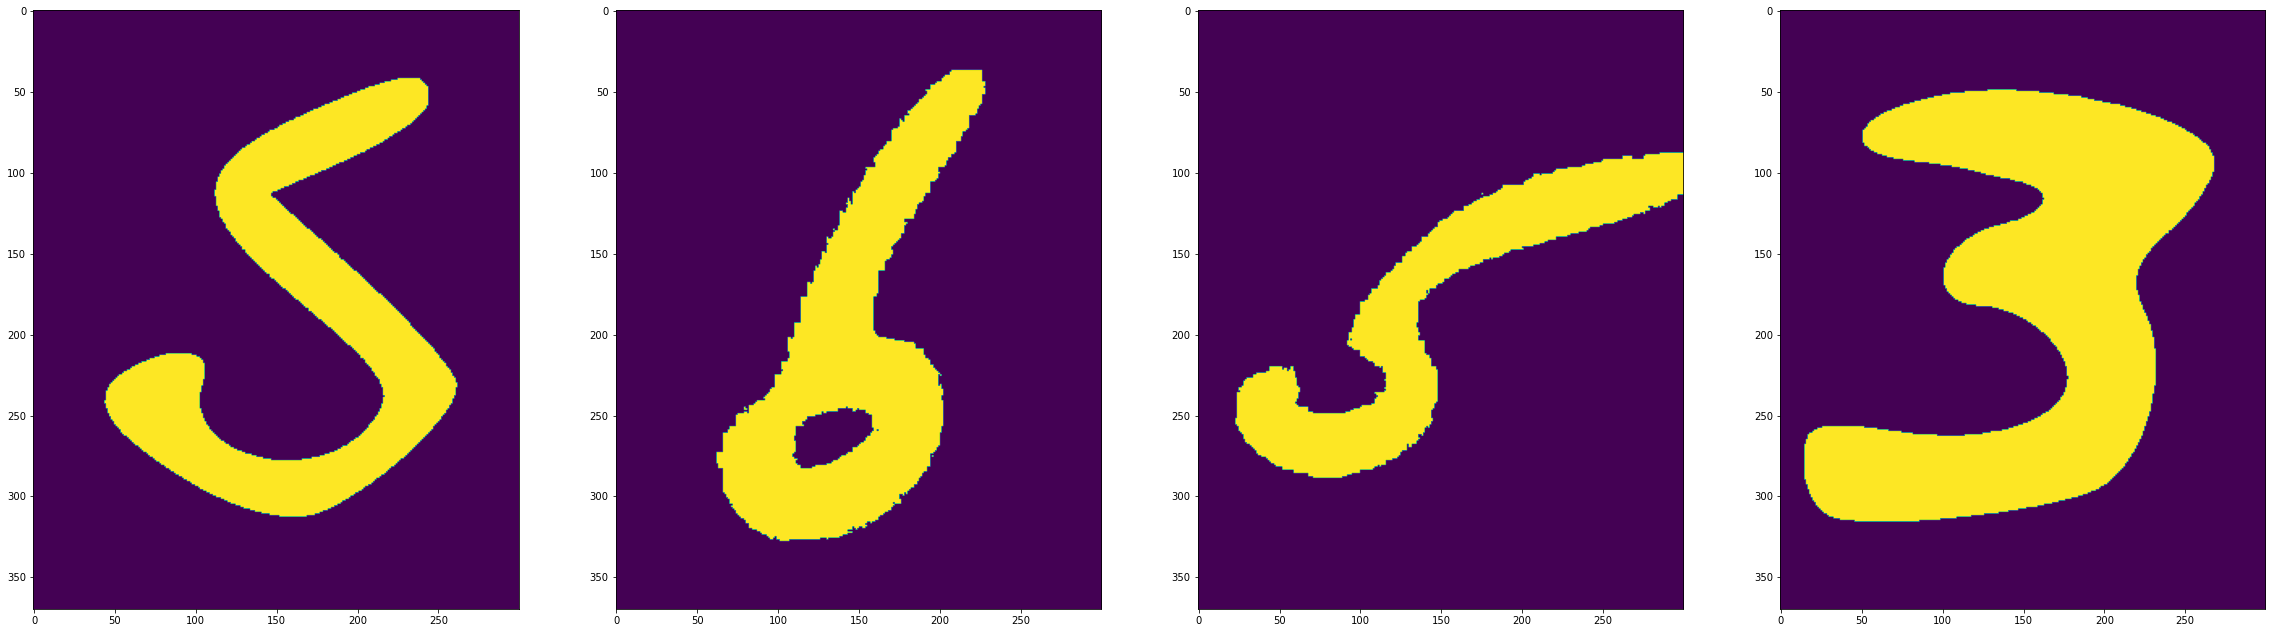

[4, 5, 2, 6]
game2 image11


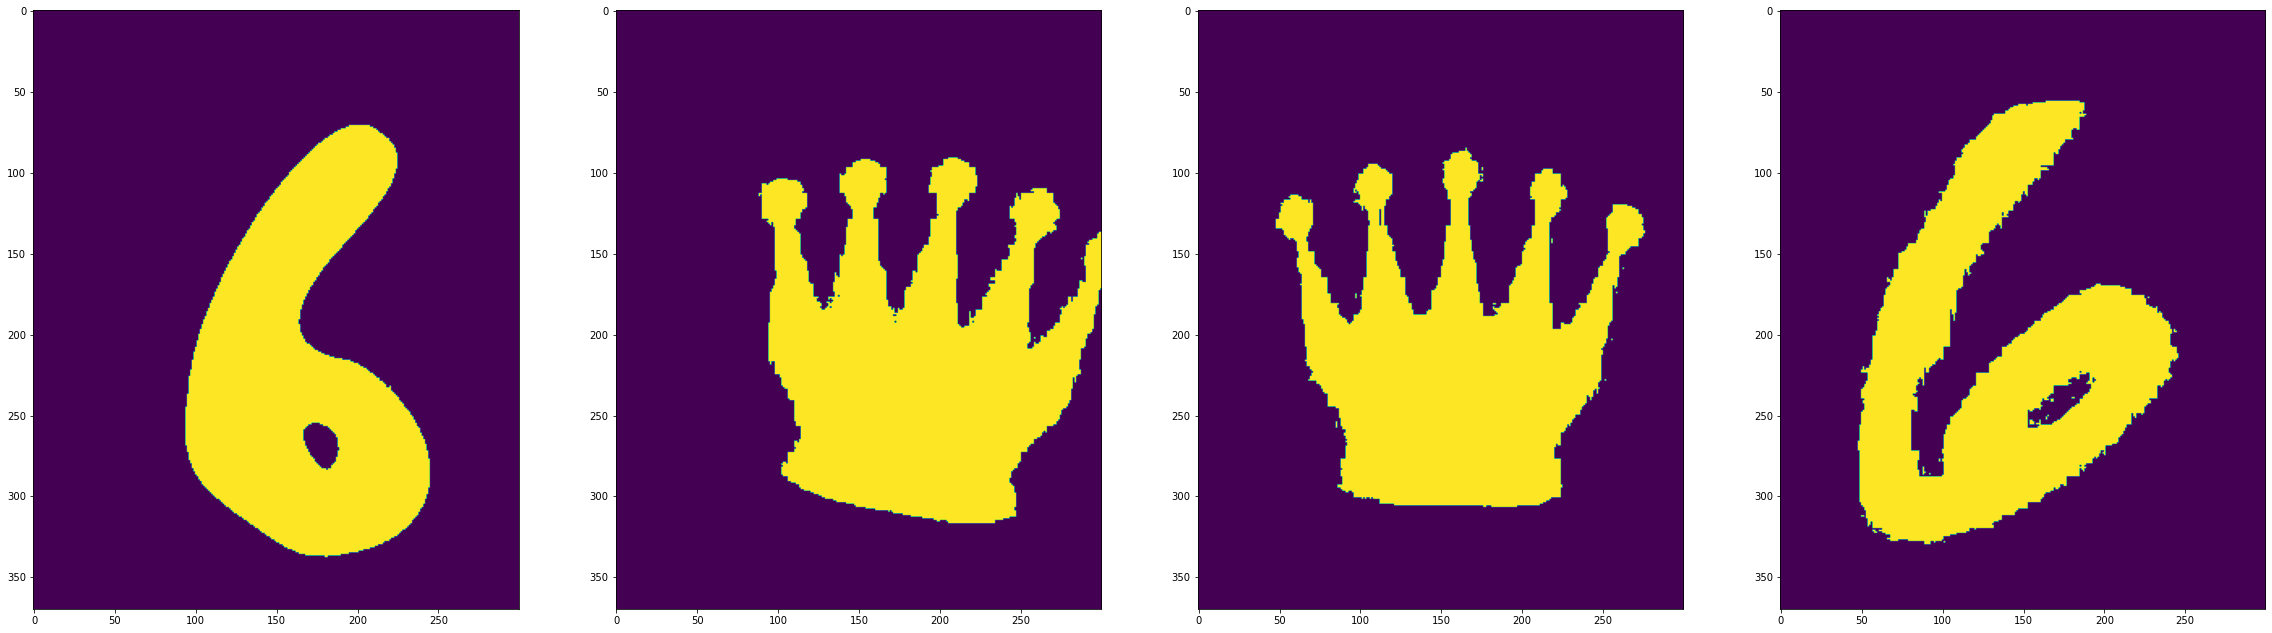

[4, 5, 2, 6]
game2 image12


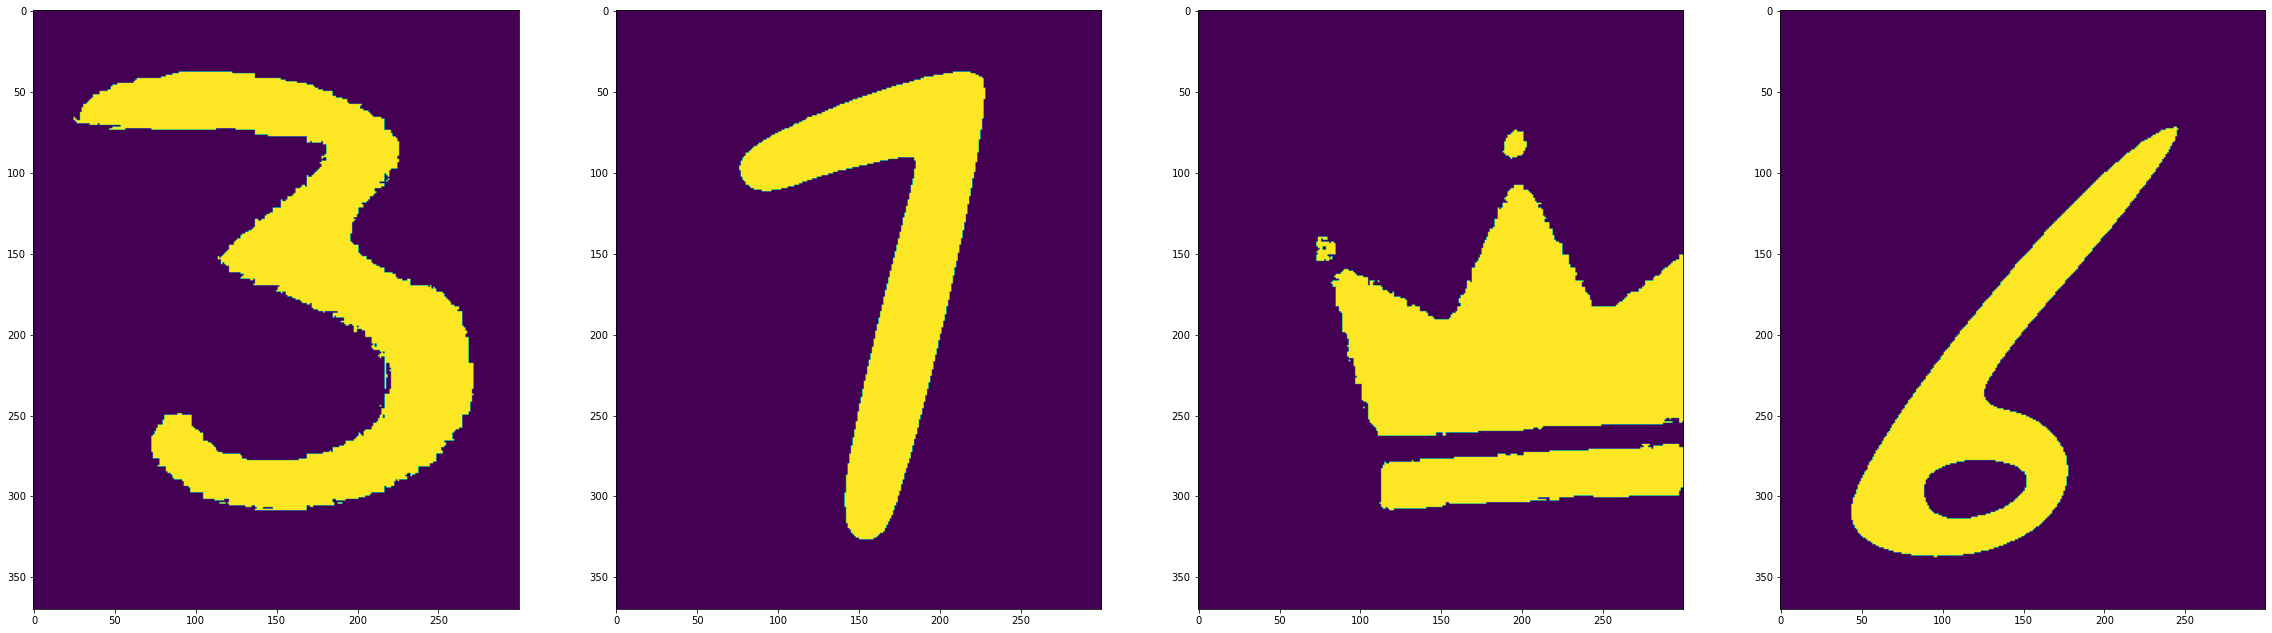

[4, 5, 2, 6]
game3
game3 image0


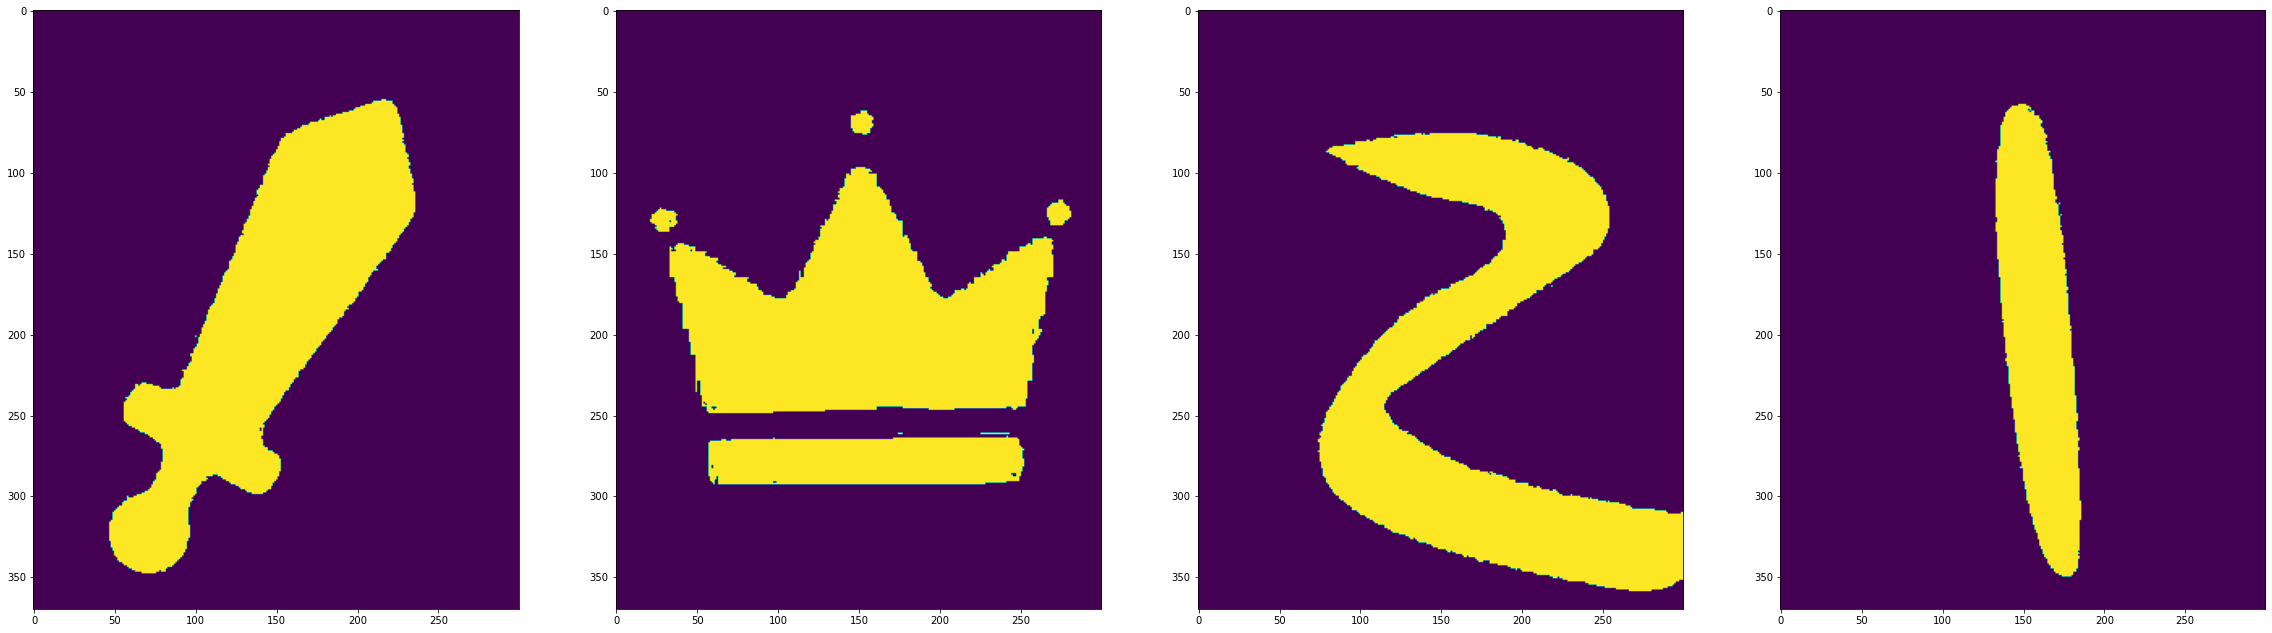

[4, 5, 2, 6]
game3 image1


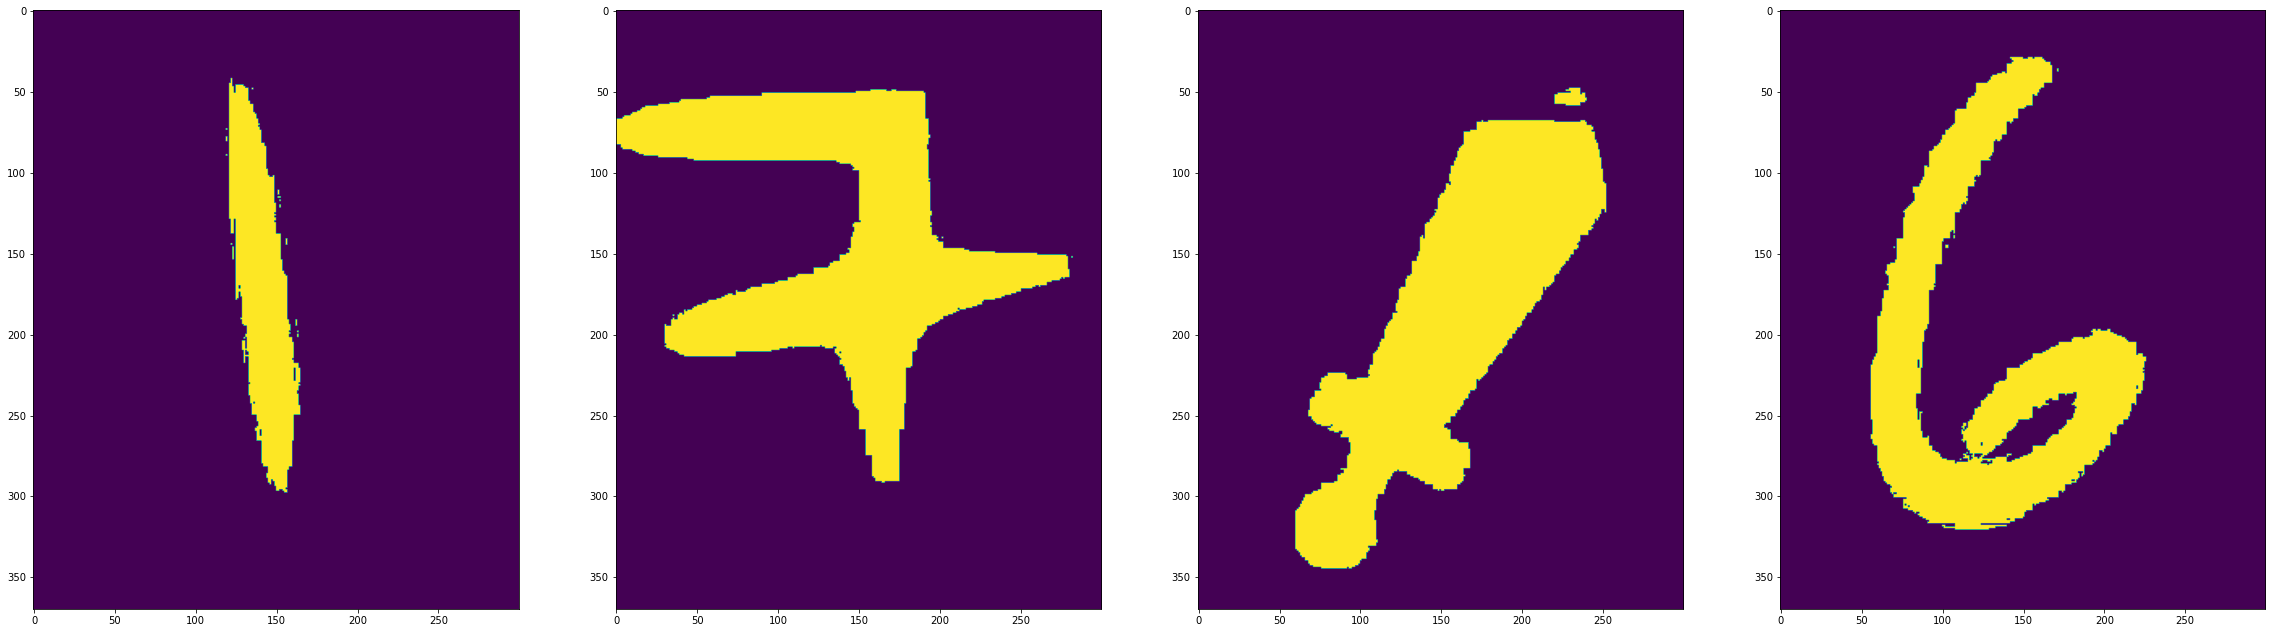

[4, 5, 2, 6]
game3 image2


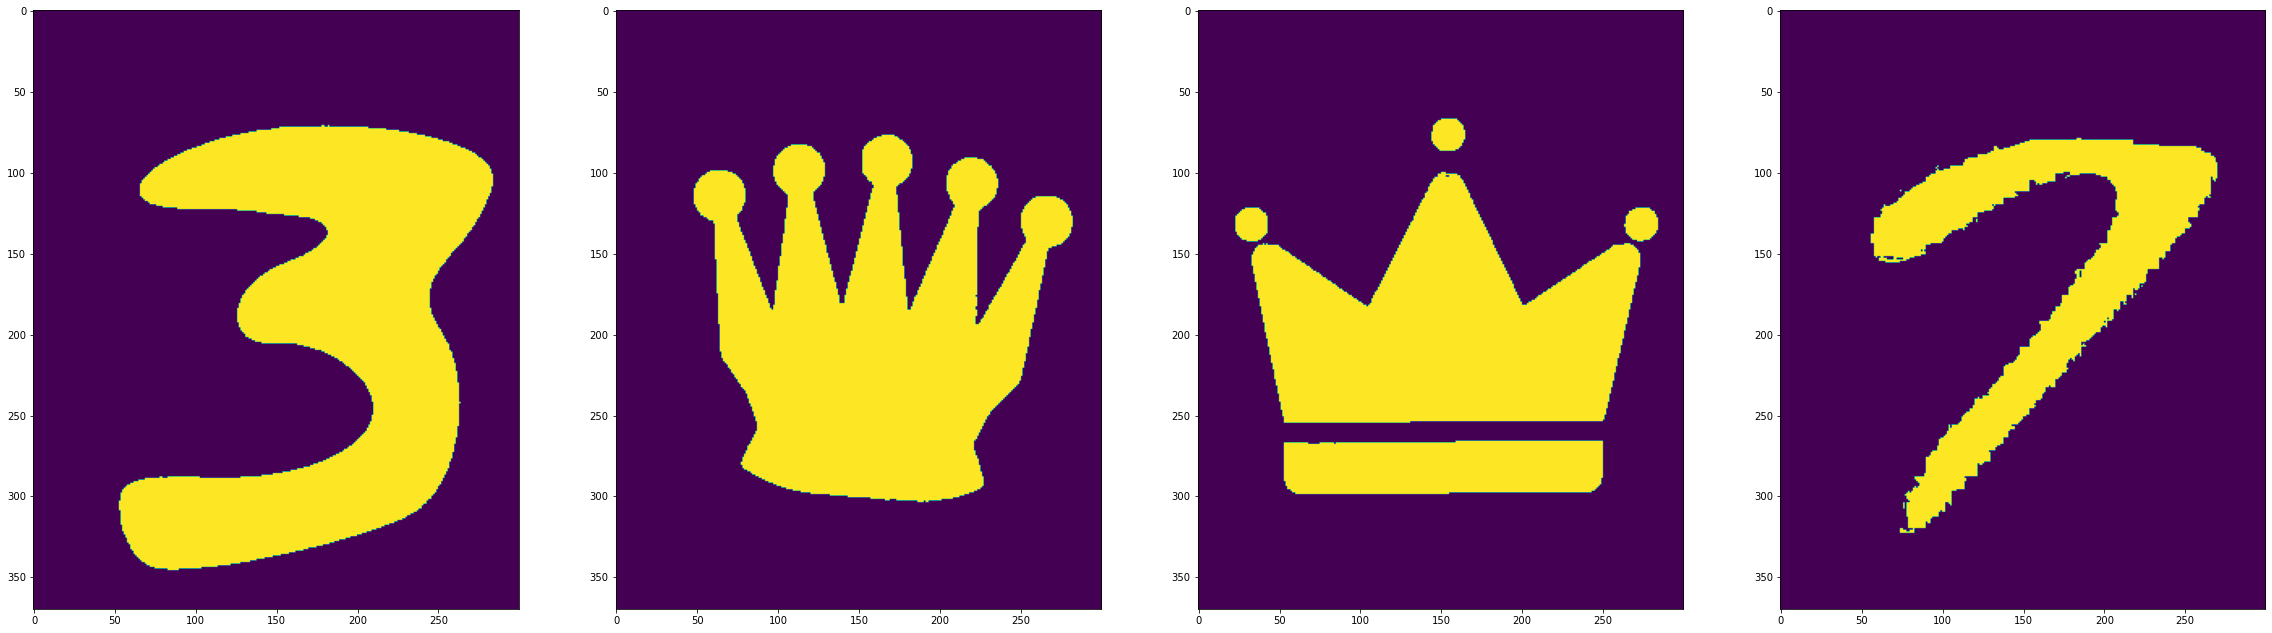

[4, 5, 2, 6]
game3 image3


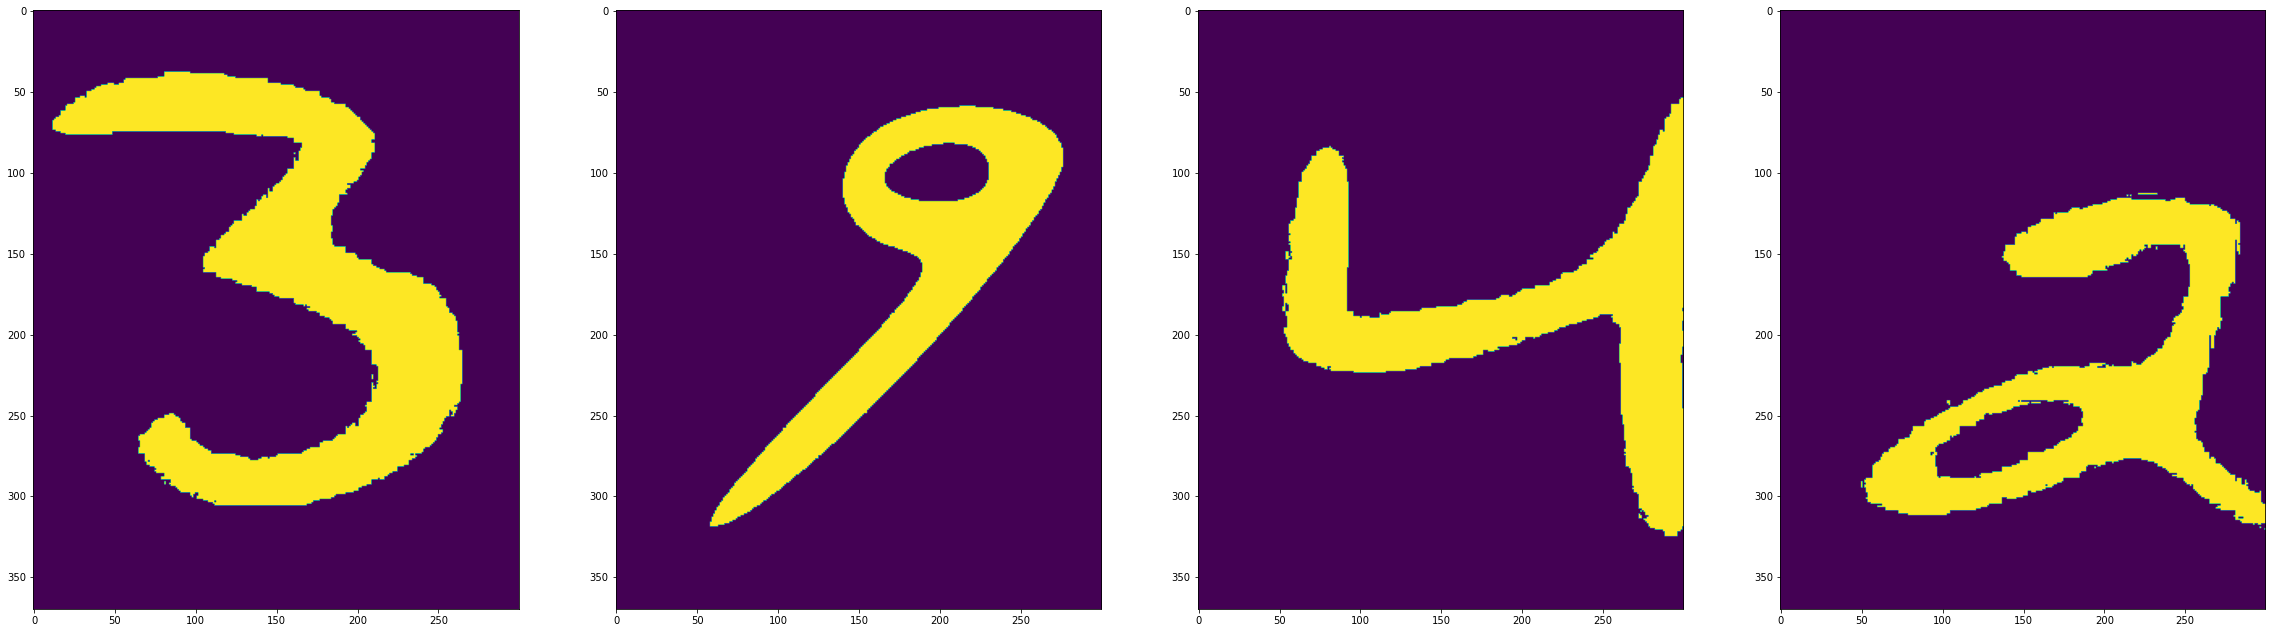

[4, 5, 2, 6]
game3 image4


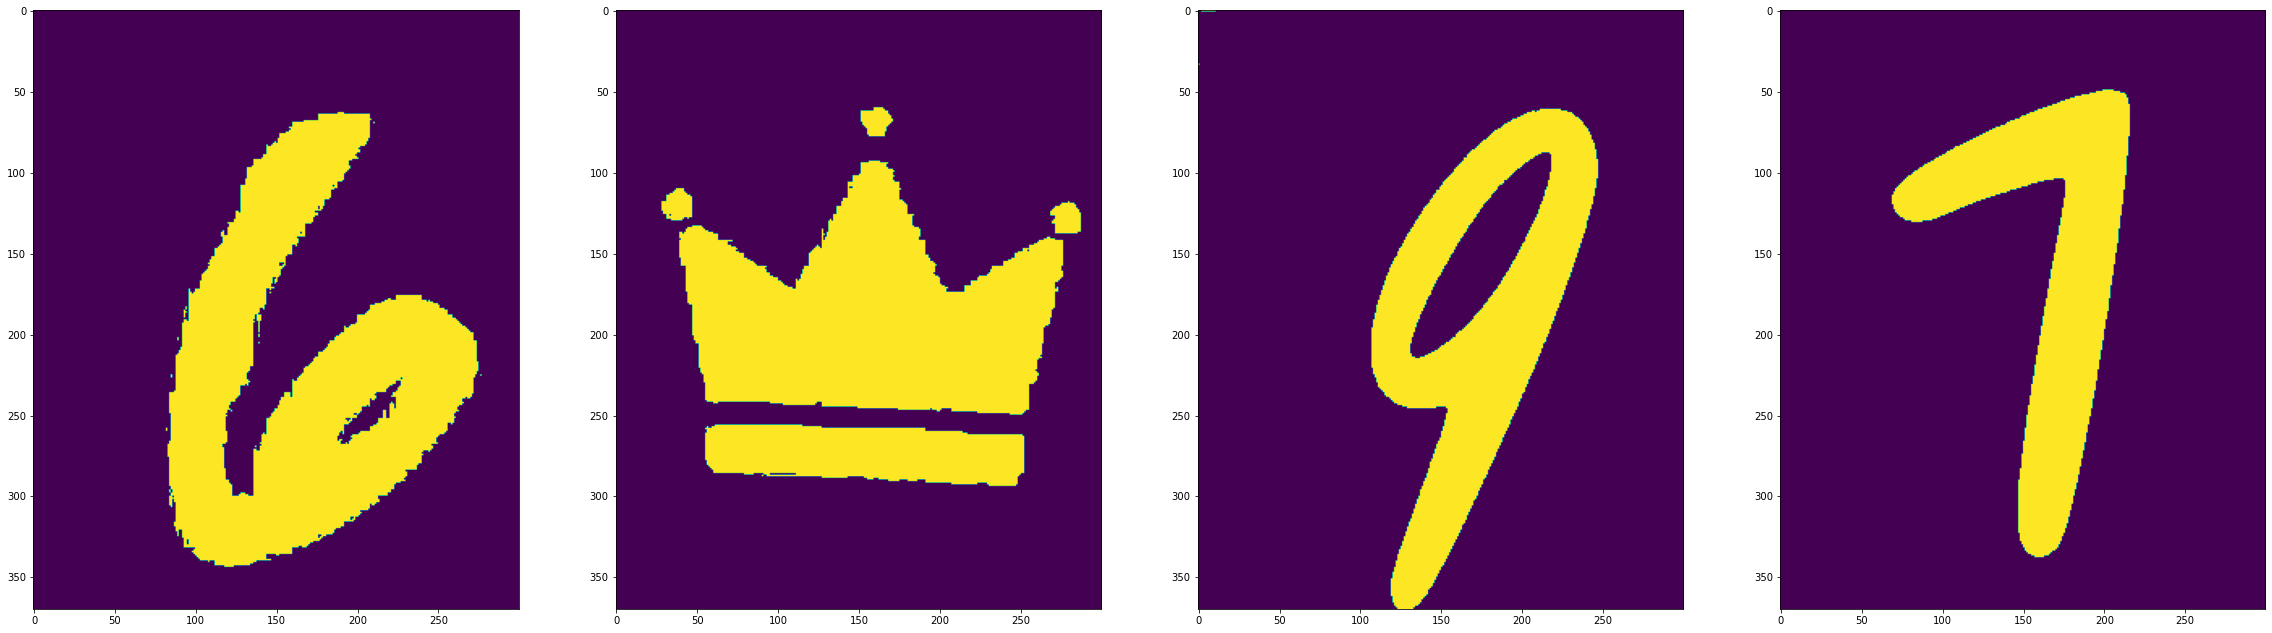

[4, 5, 2, 6]
game3 image5


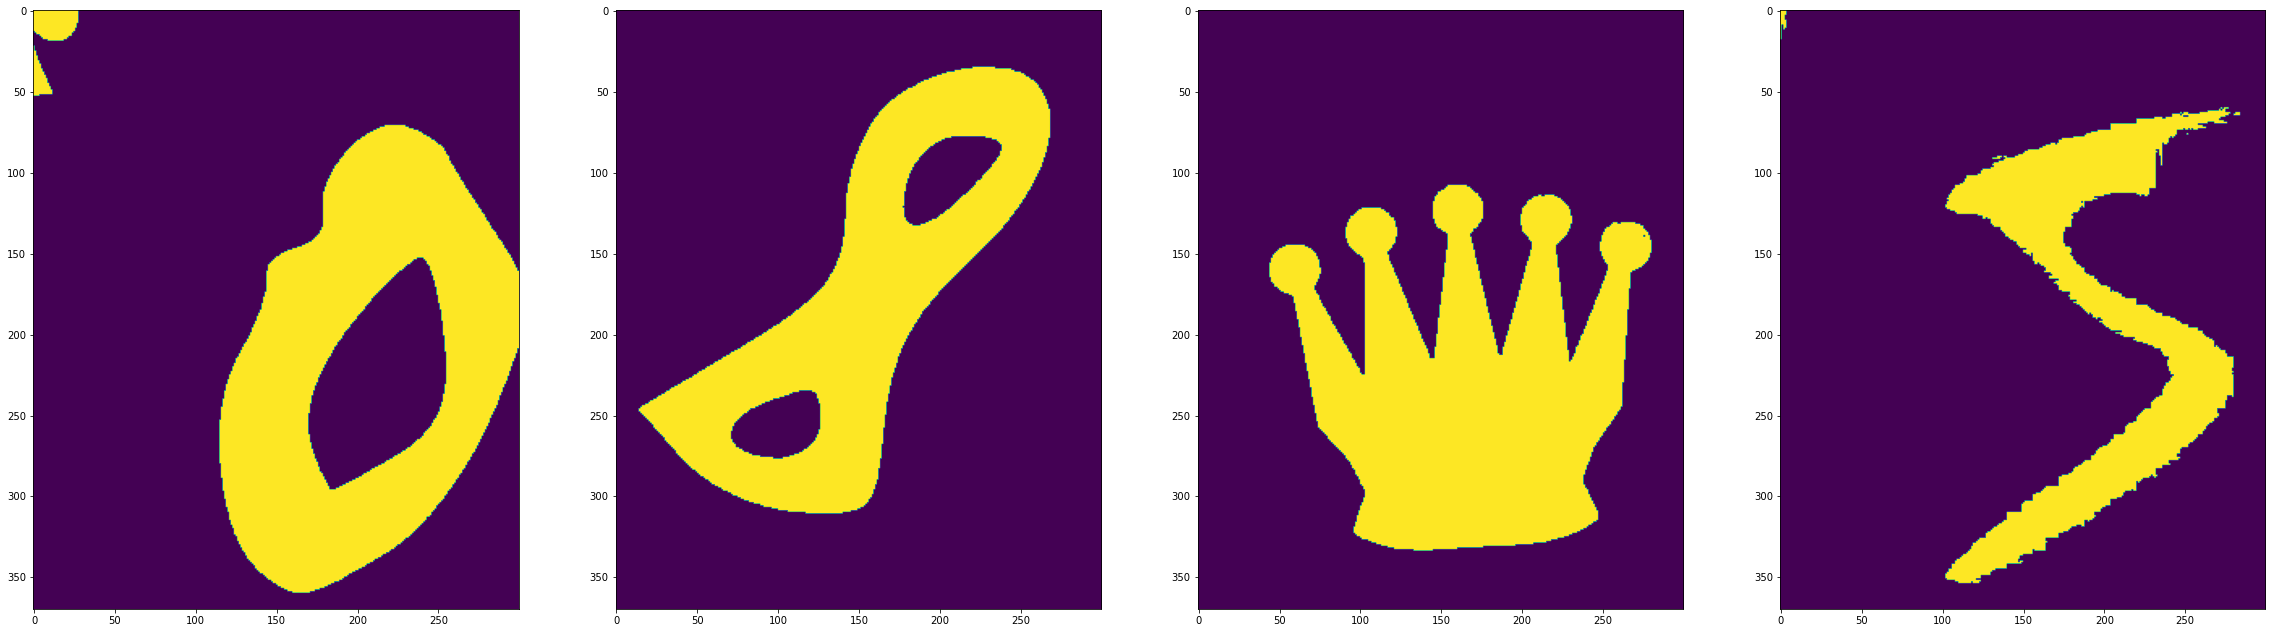

[4, 5, 2, 6]
game3 image6


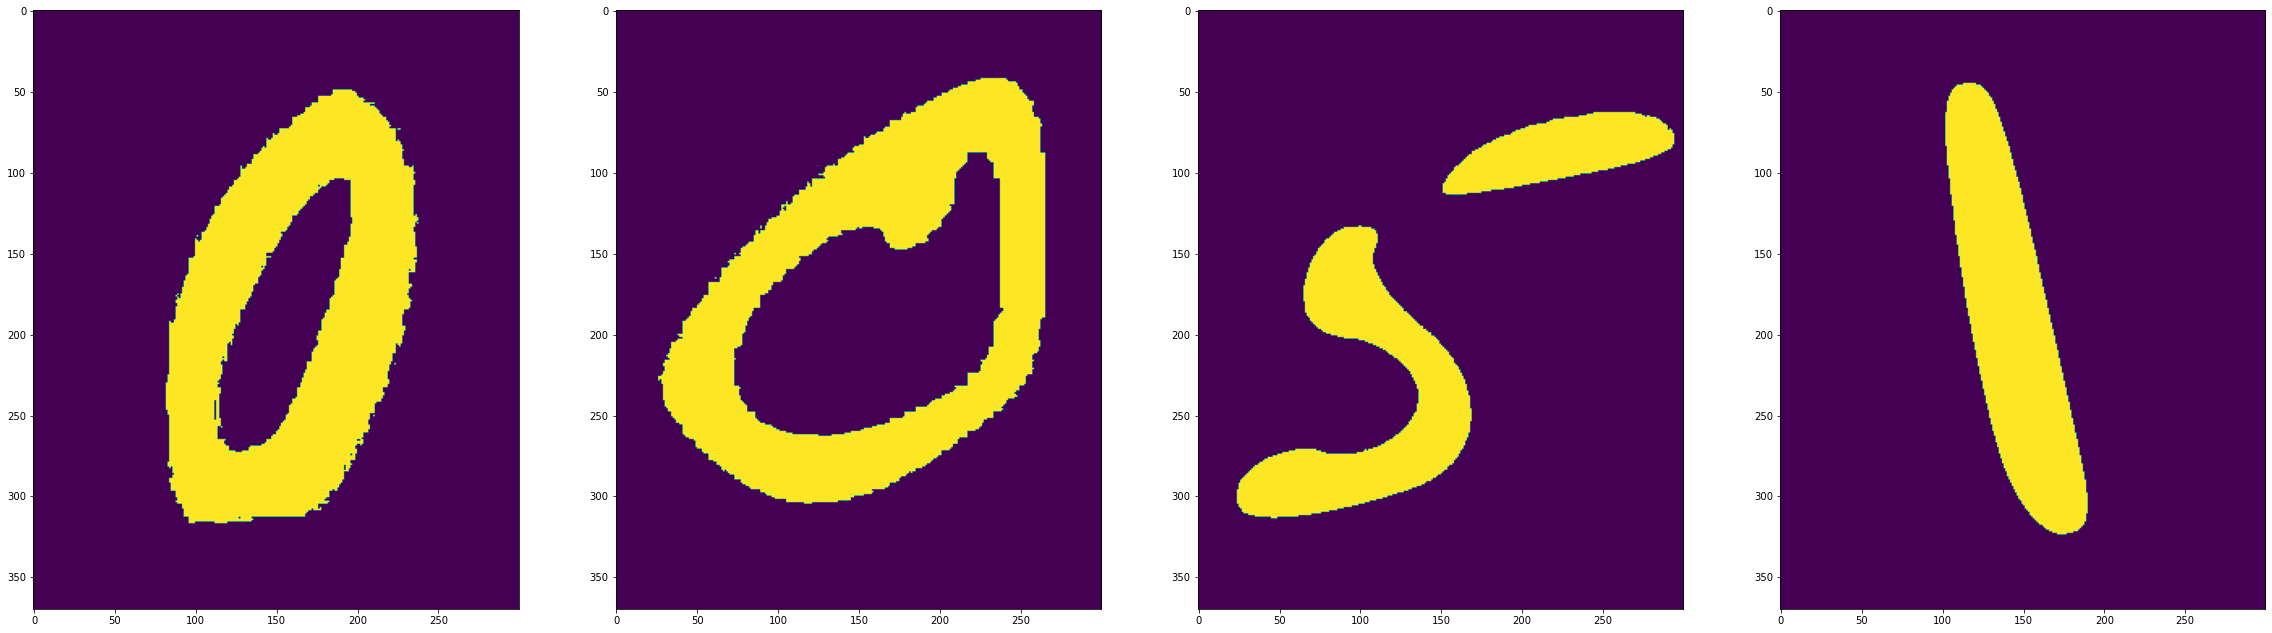

[4, 5, 2, 6]
game3 image7


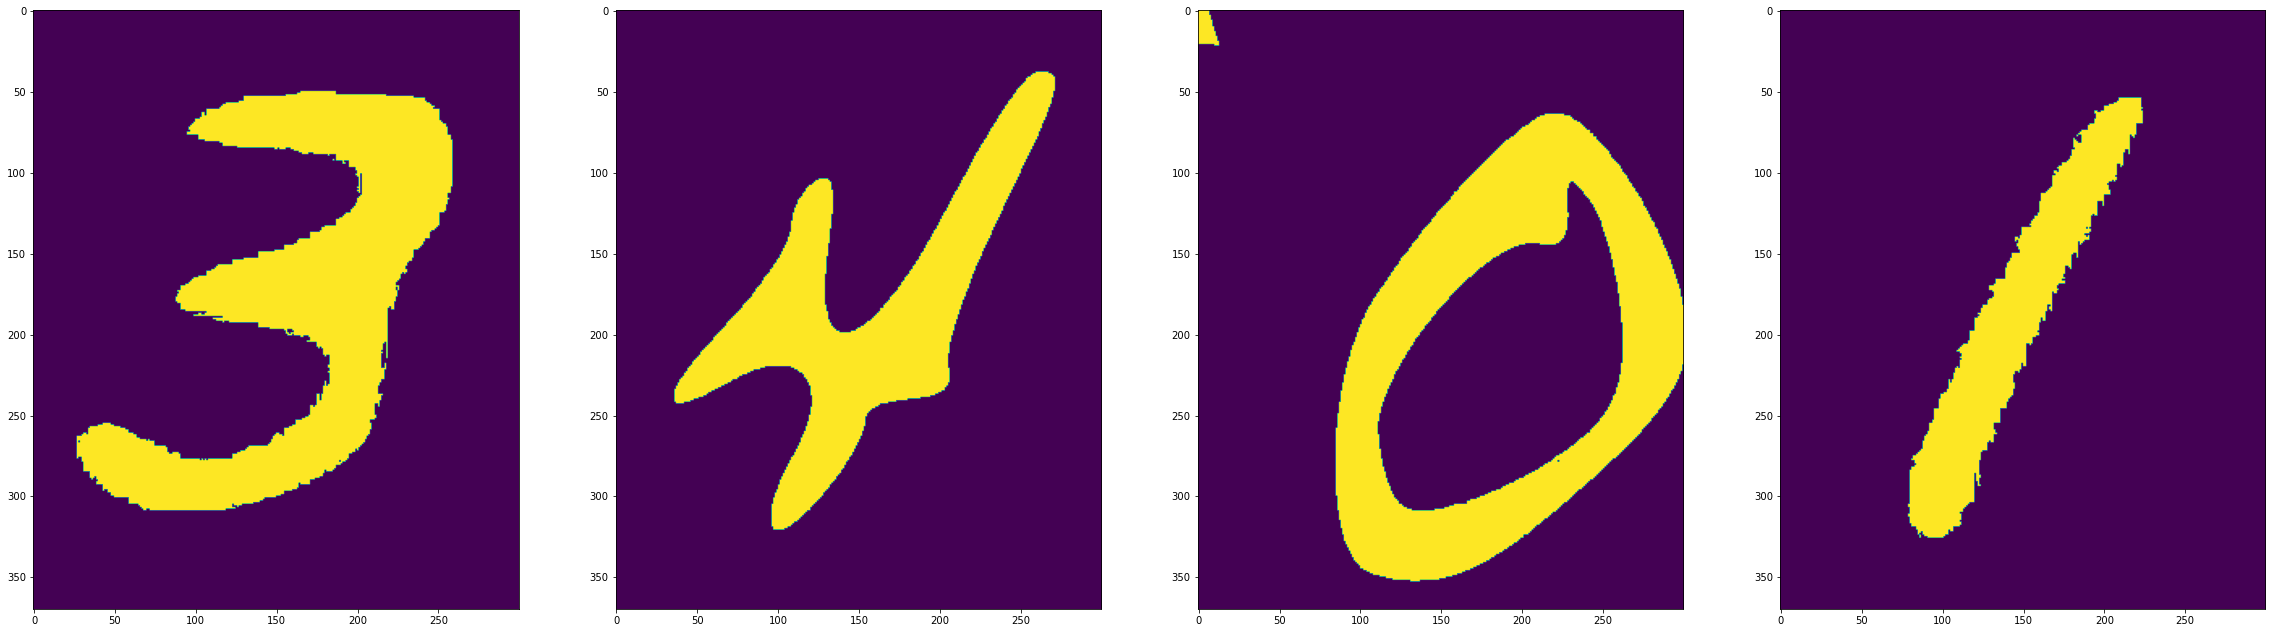

[4, 5, 2, 6]
game3 image8


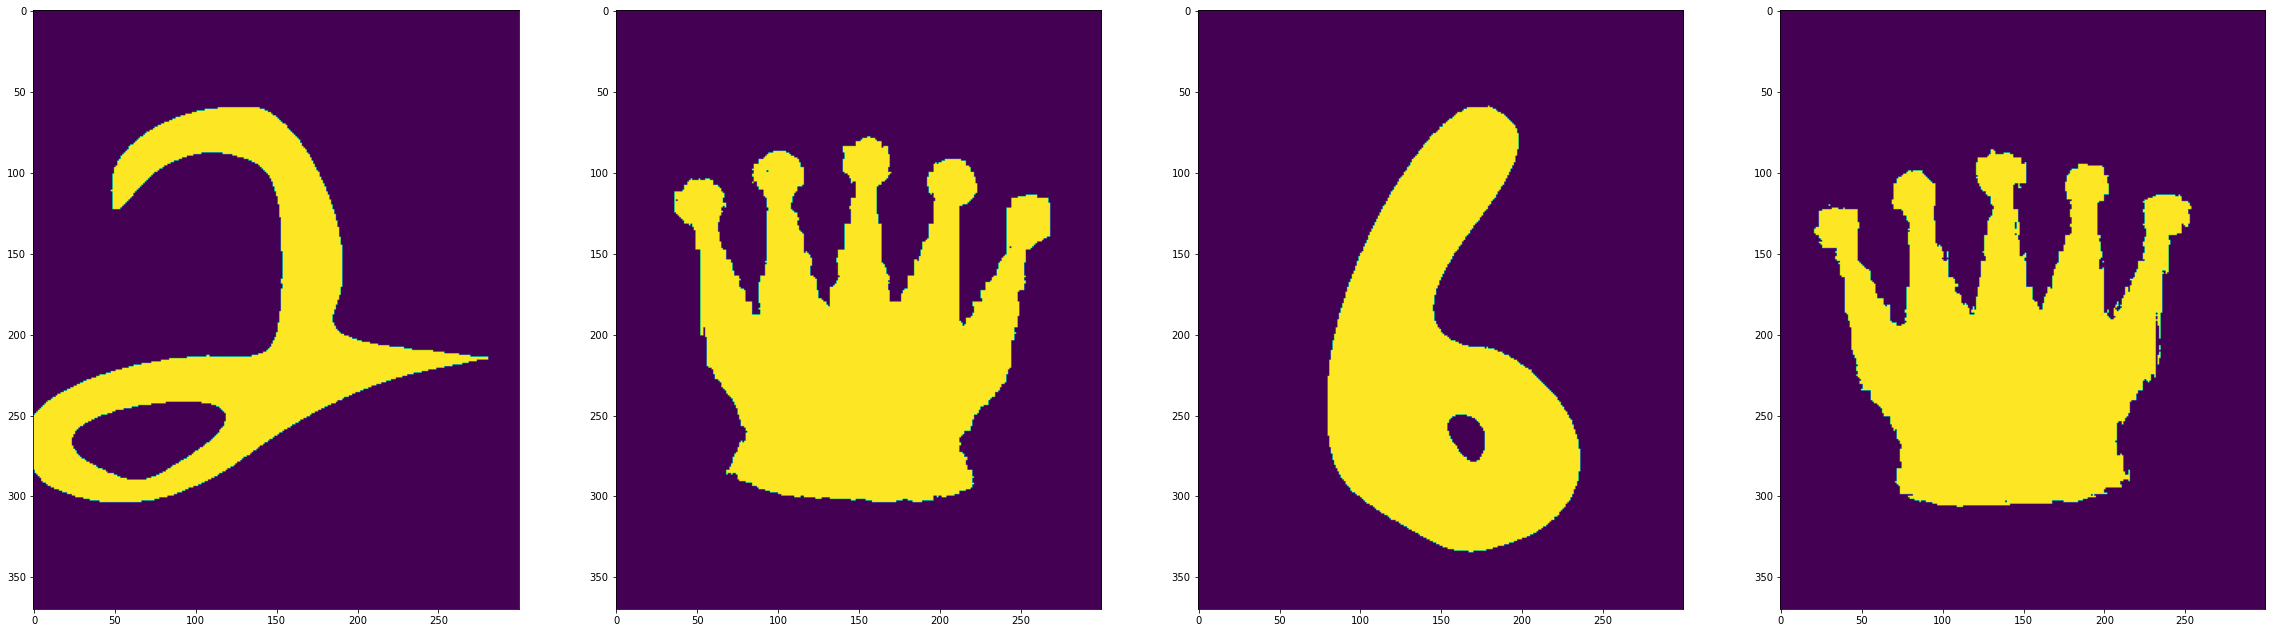

[4, 5, 2, 6]
game3 image9


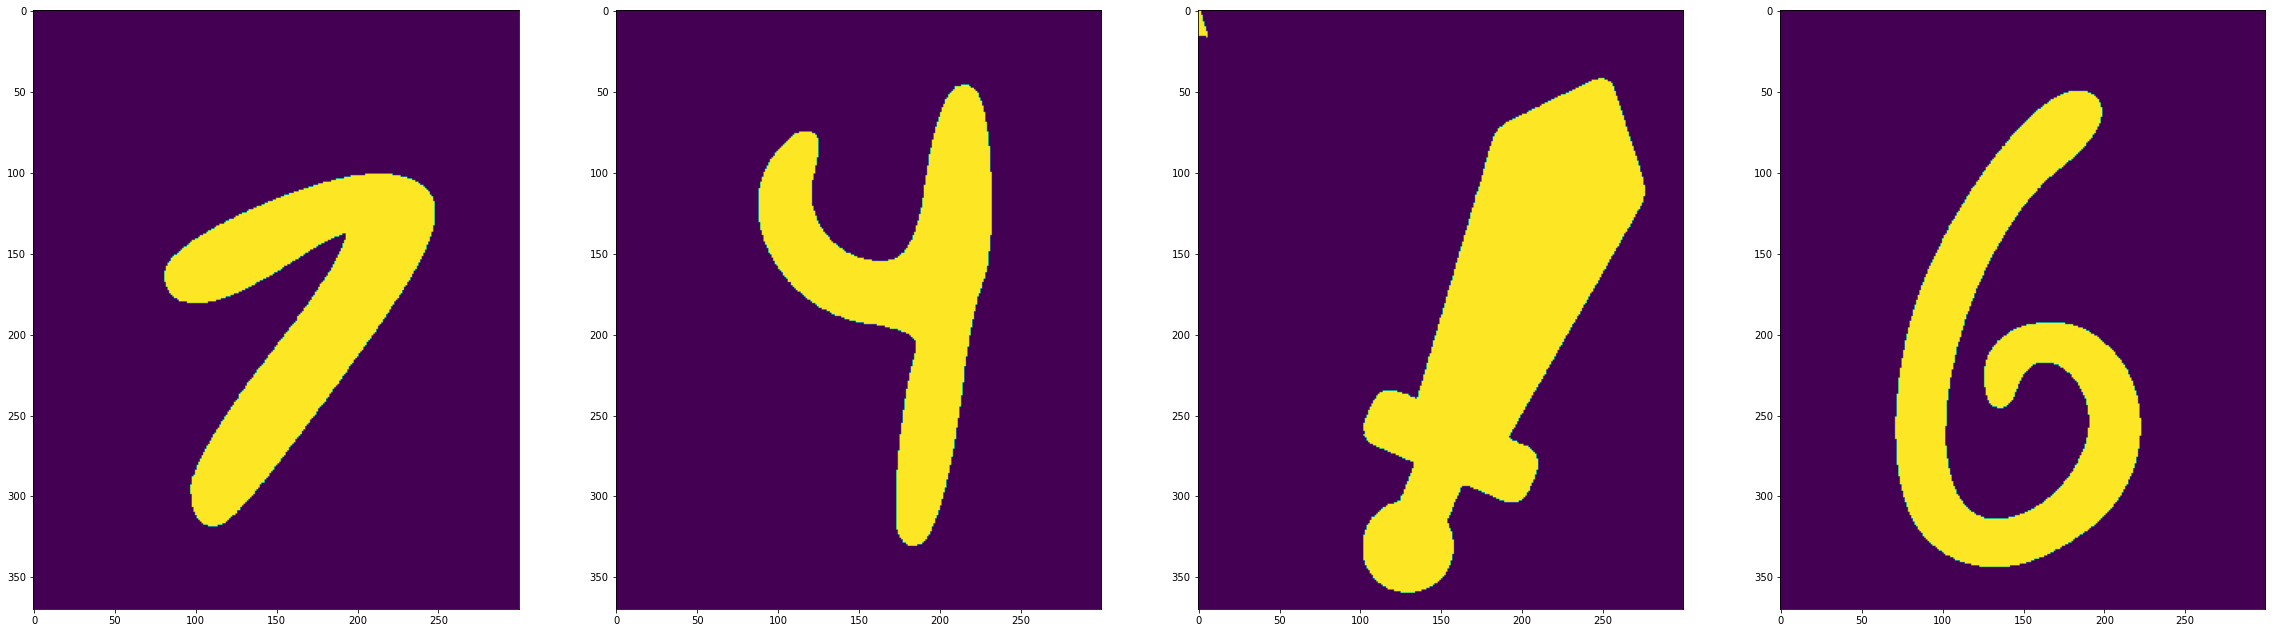

[4, 5, 2, 6]
game3 image10


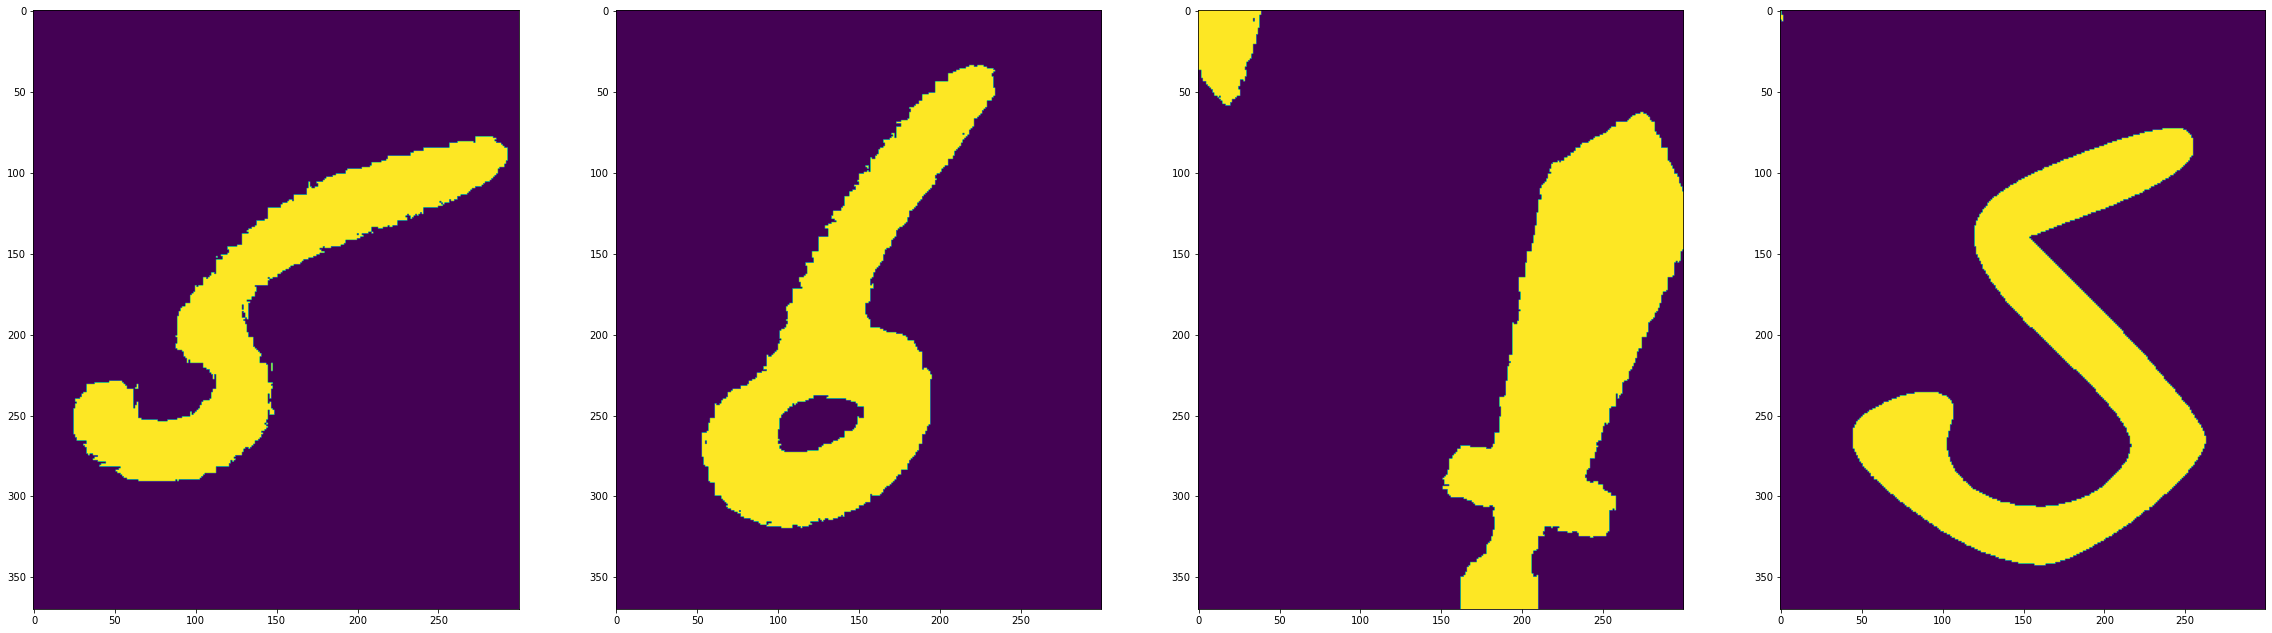

[4, 5, 2, 6]
game3 image11


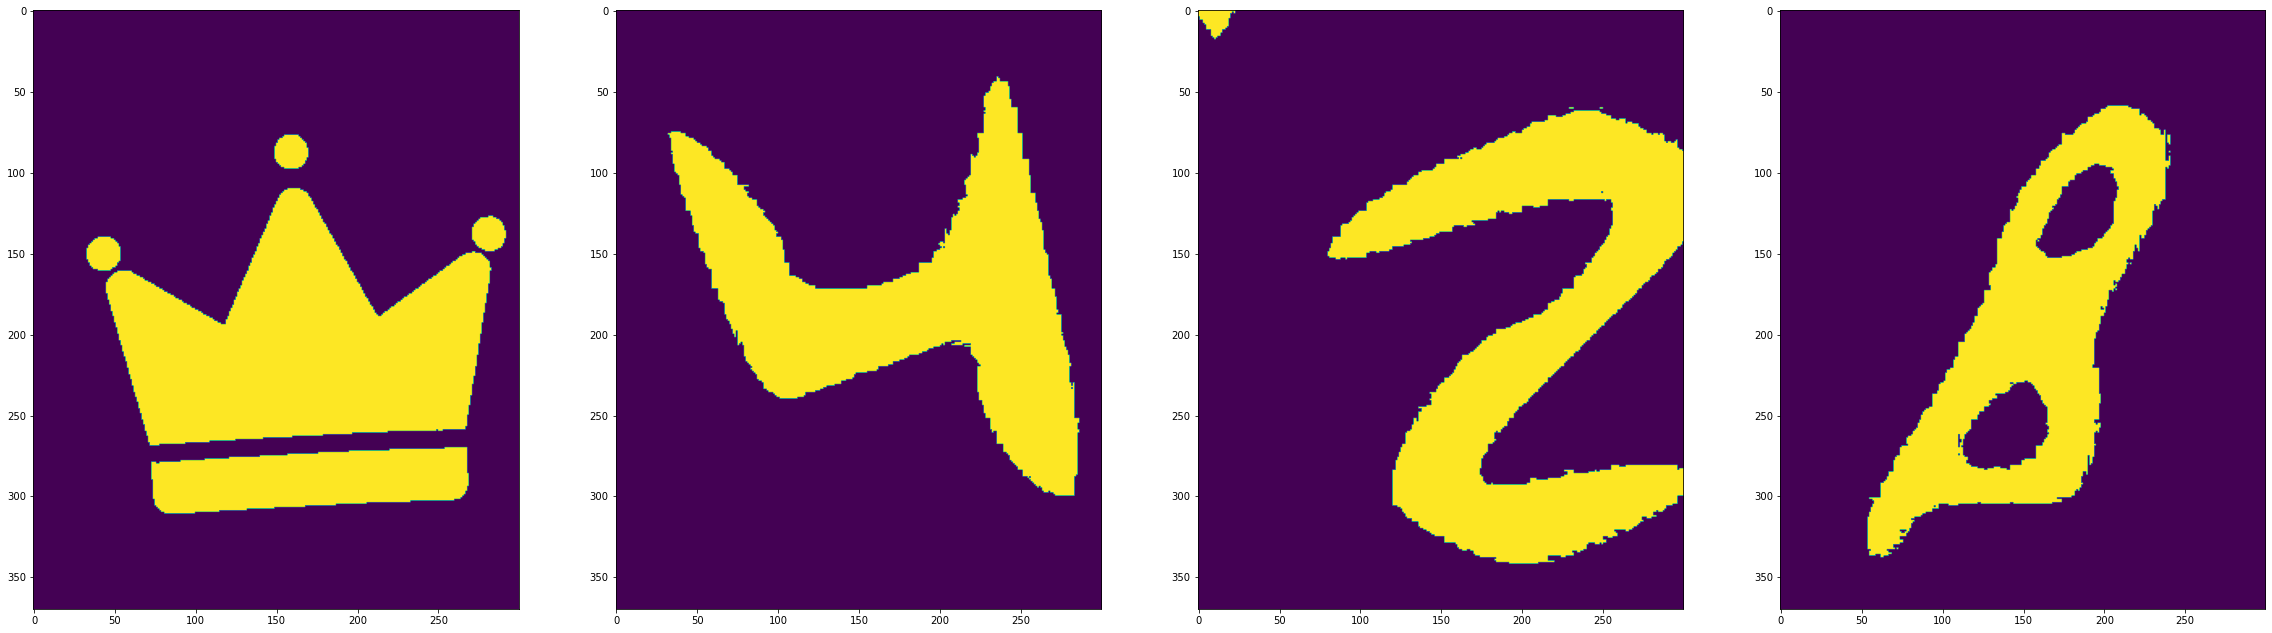

[4, 5, 2, 6]
game3 image12


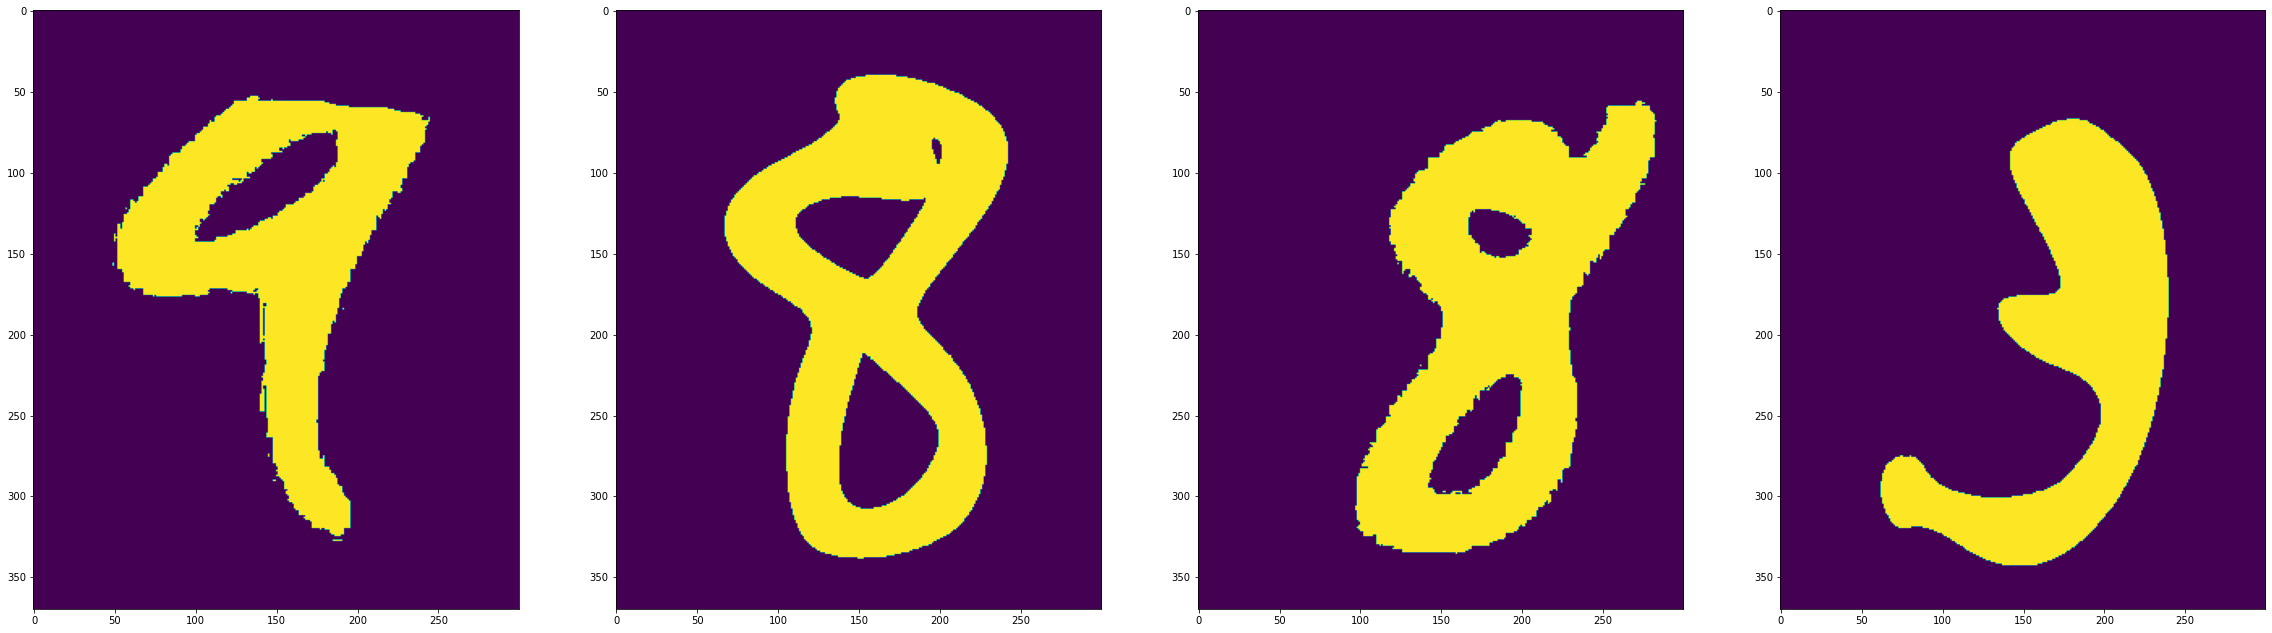

[4, 5, 2, 6]
game4
game4 image0


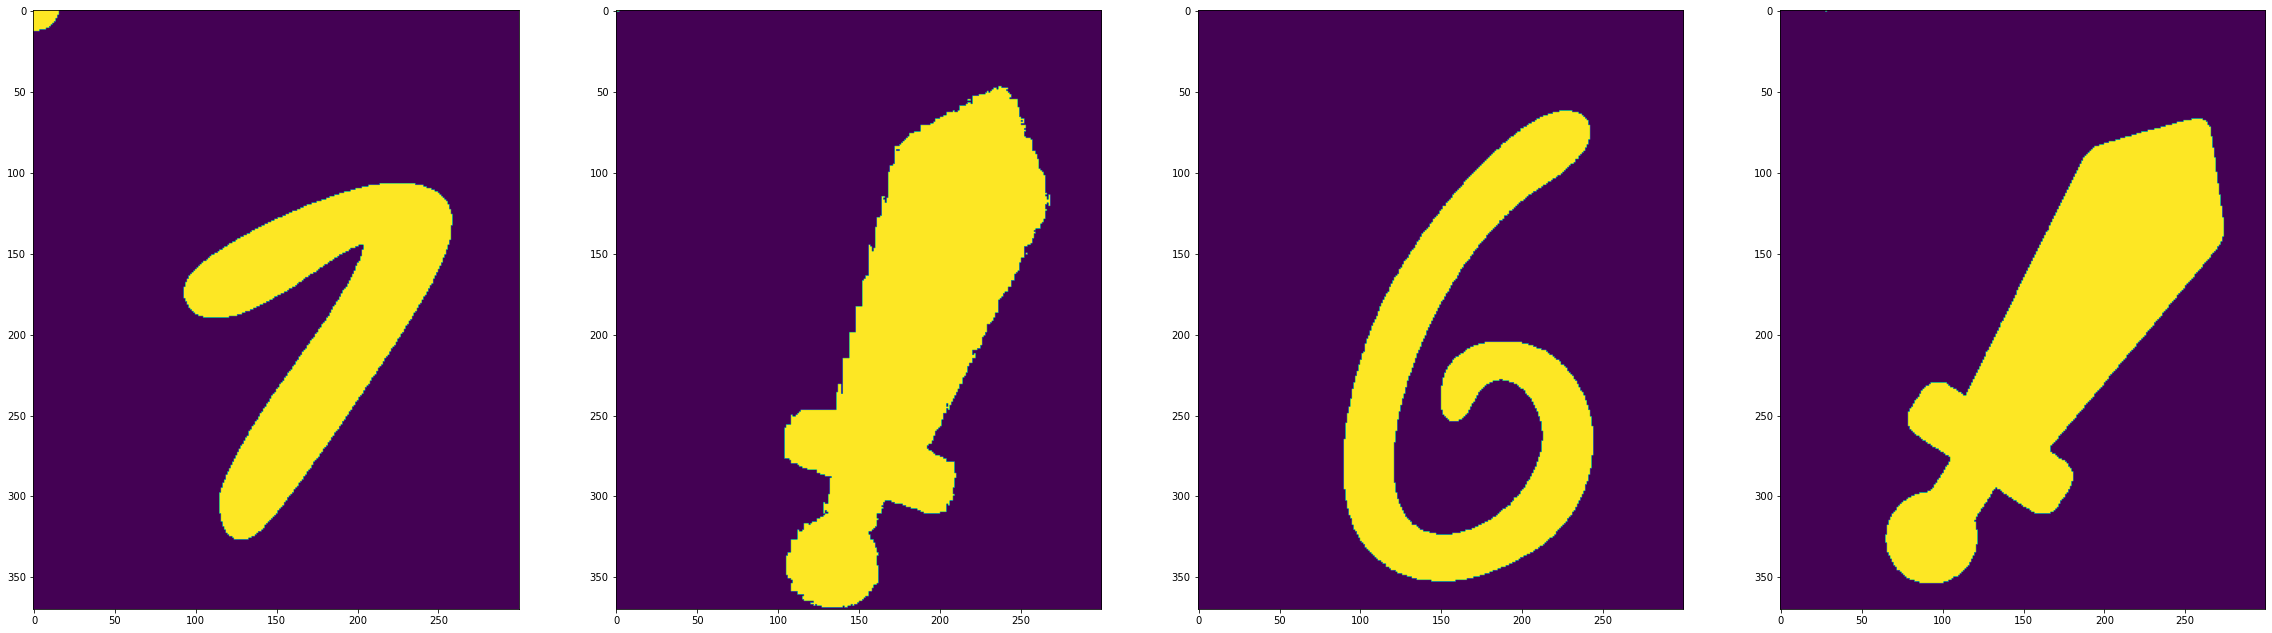

[4, 5, 2, 6]
game4 image1


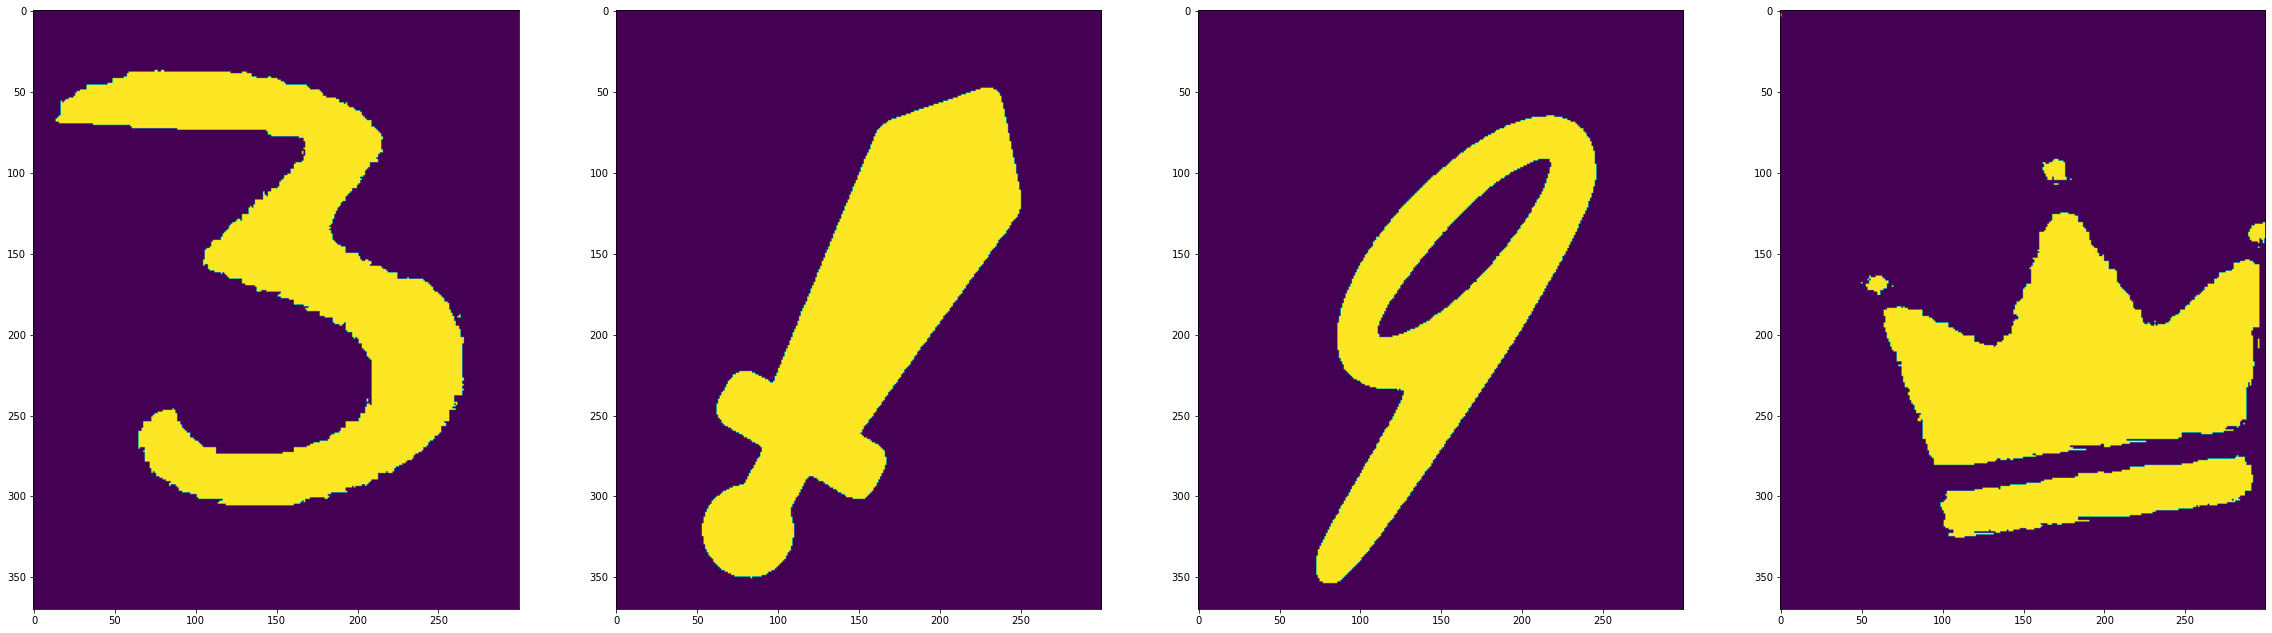

[4, 5, 2, 6]
game4 image2


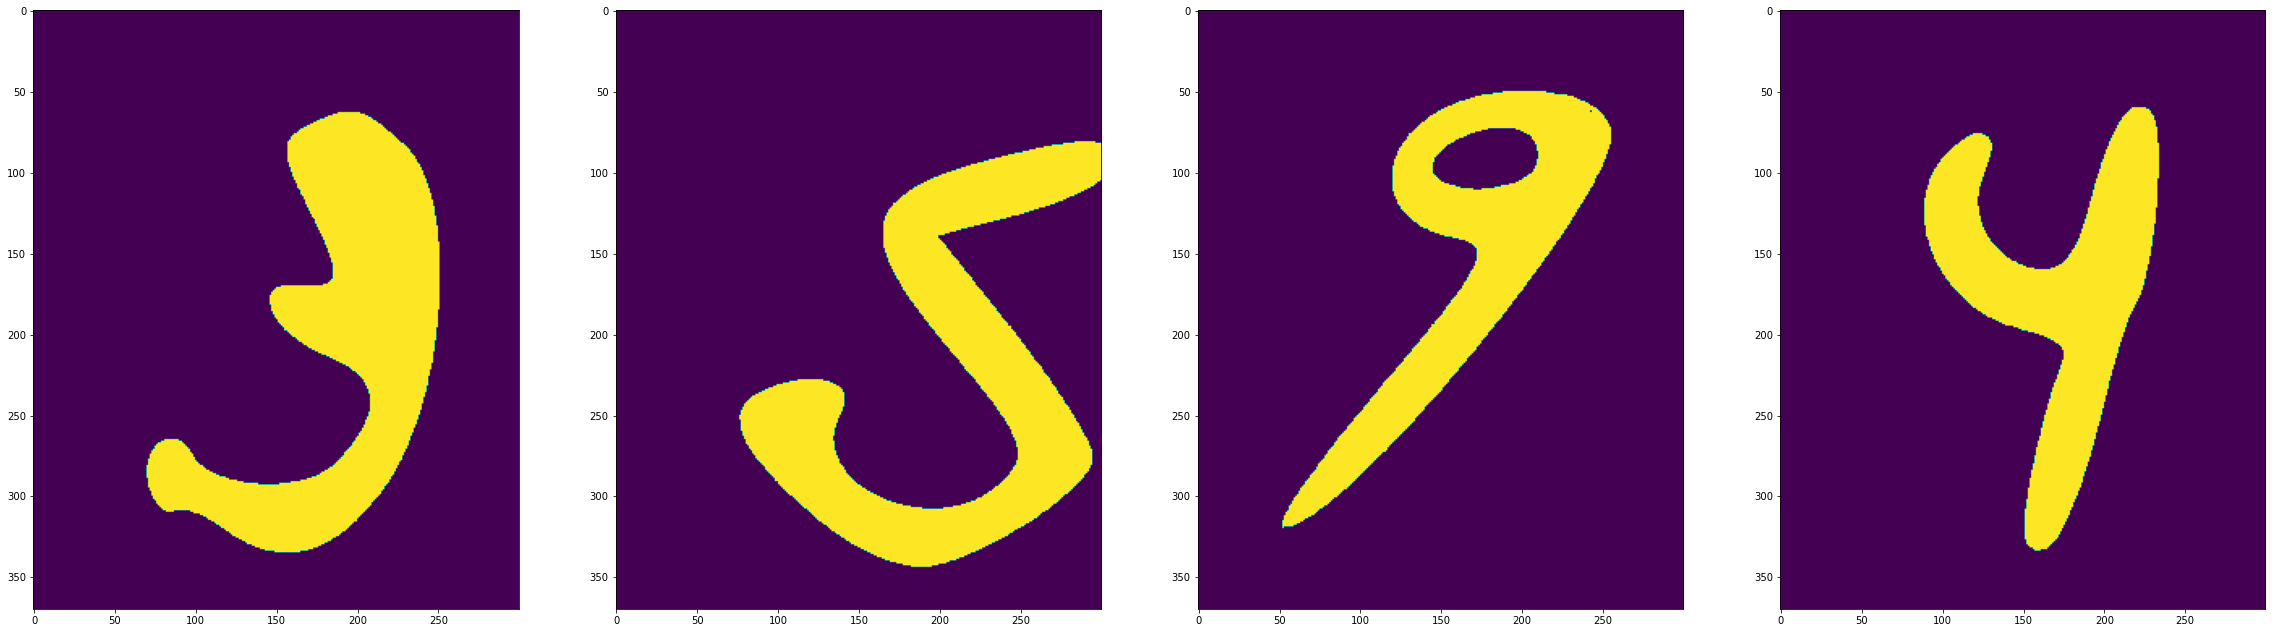

[4, 5, 2, 6]
game4 image3


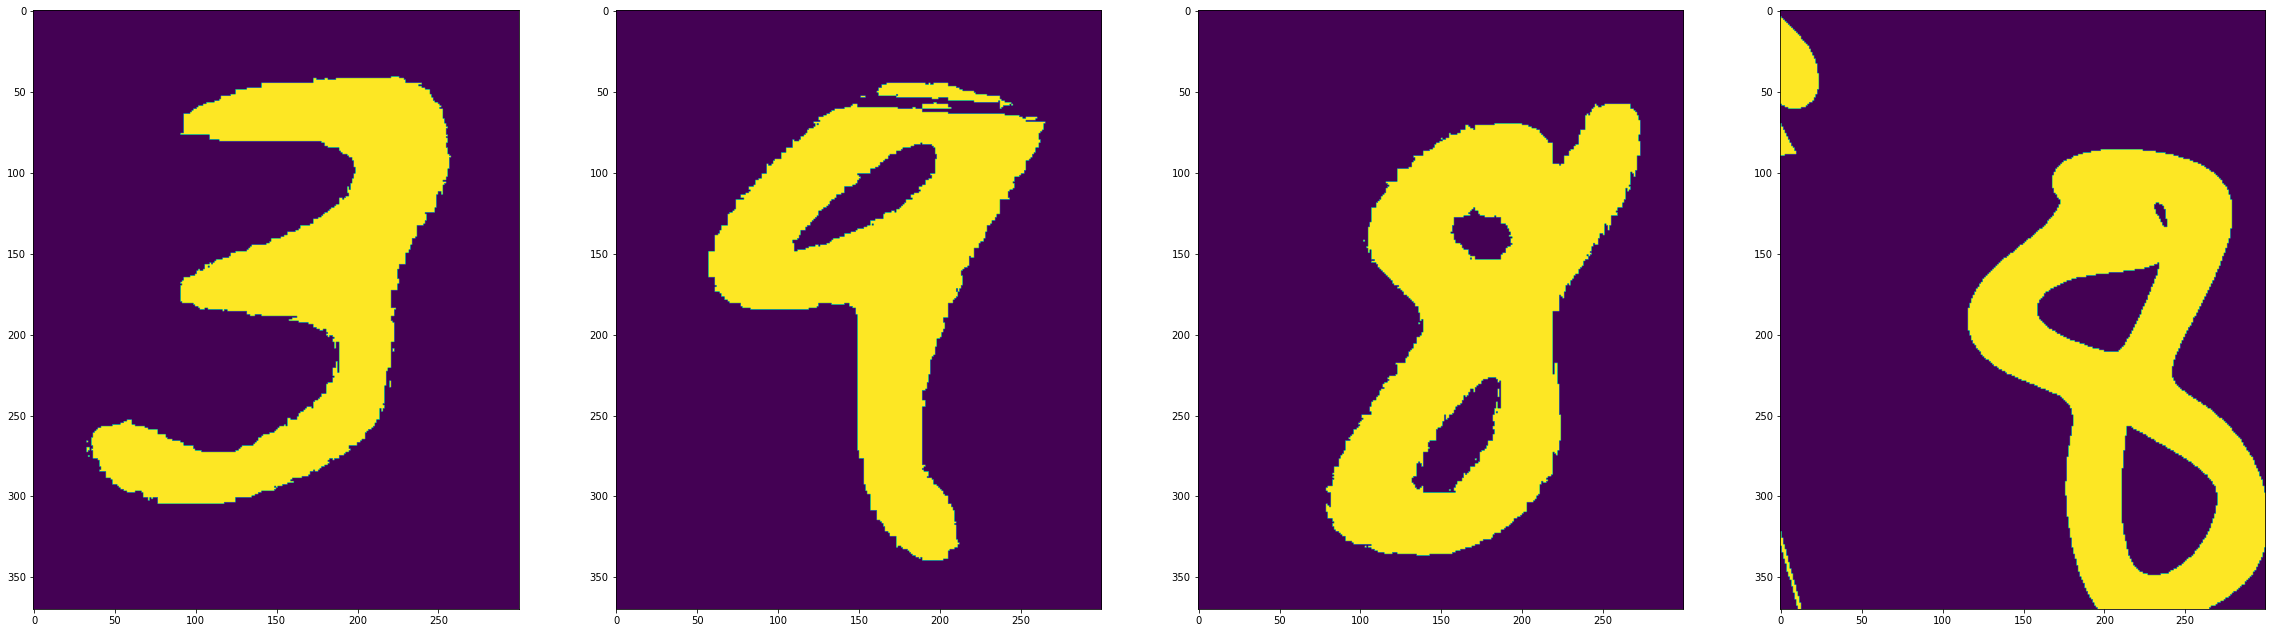

[4, 5, 2, 6]
game4 image4


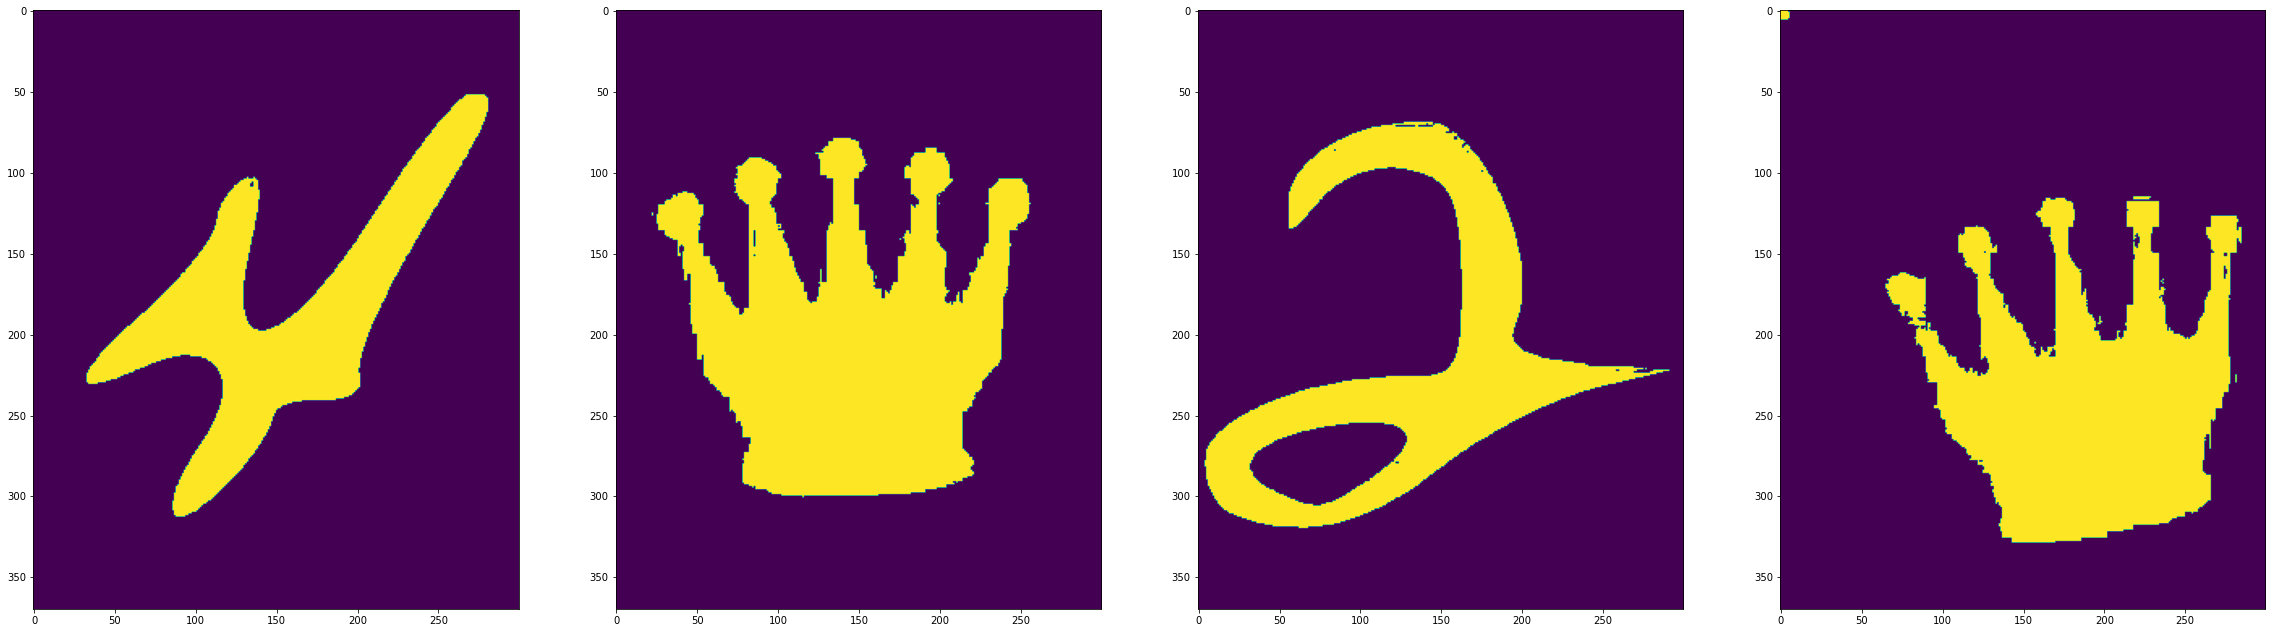

[4, 5, 2, 6]
game4 image5


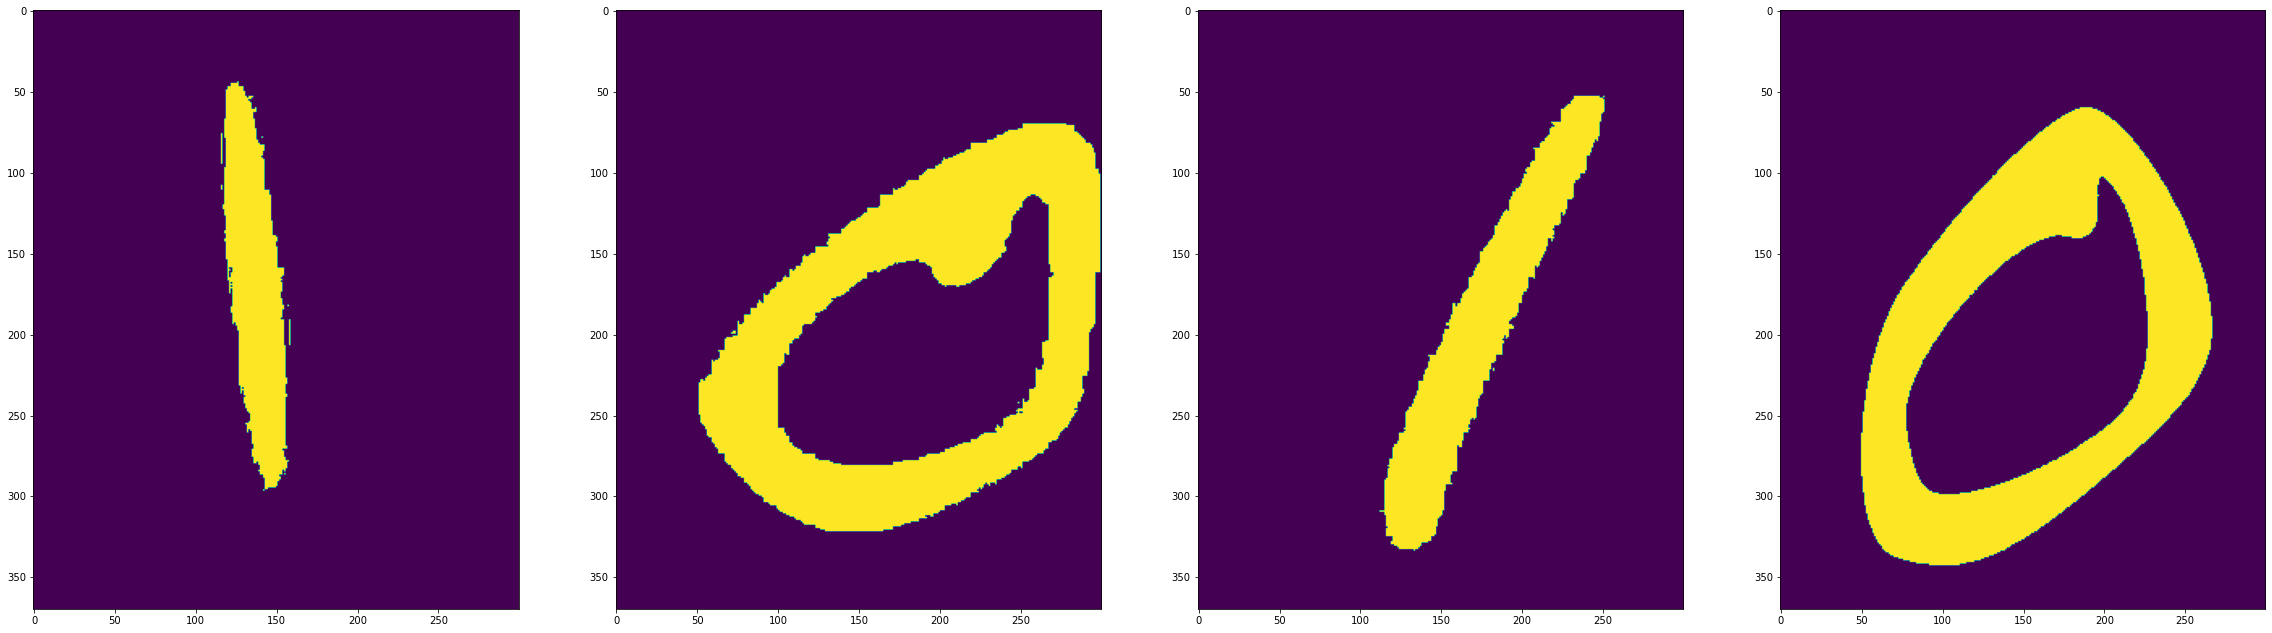

[4, 5, 2, 6]
game4 image6


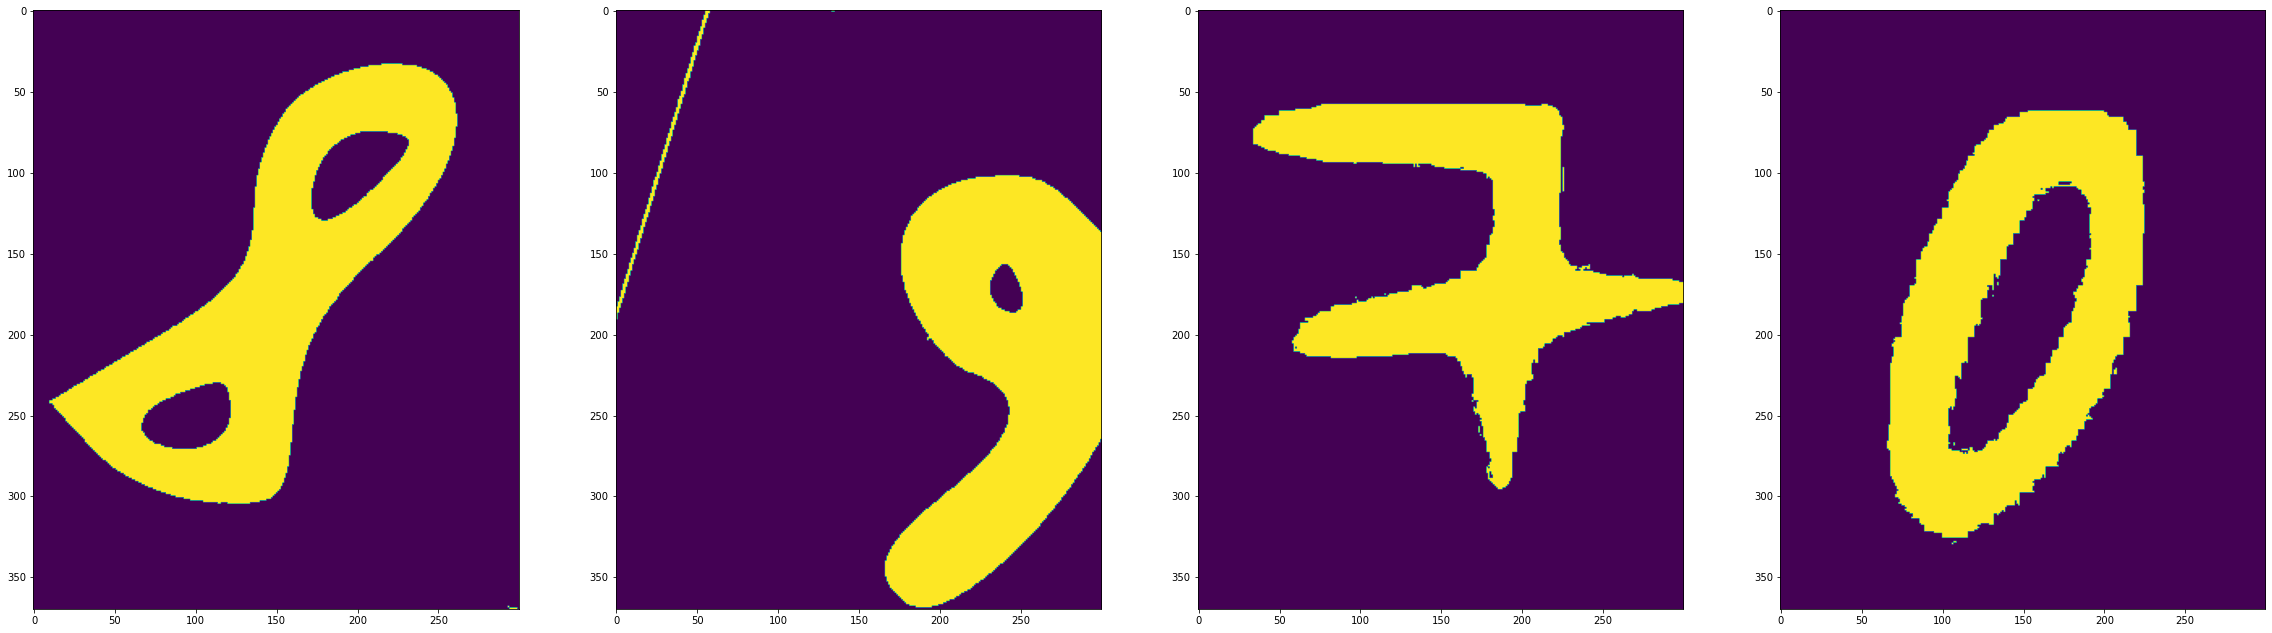

[4, 5, 2, 6]
game4 image7


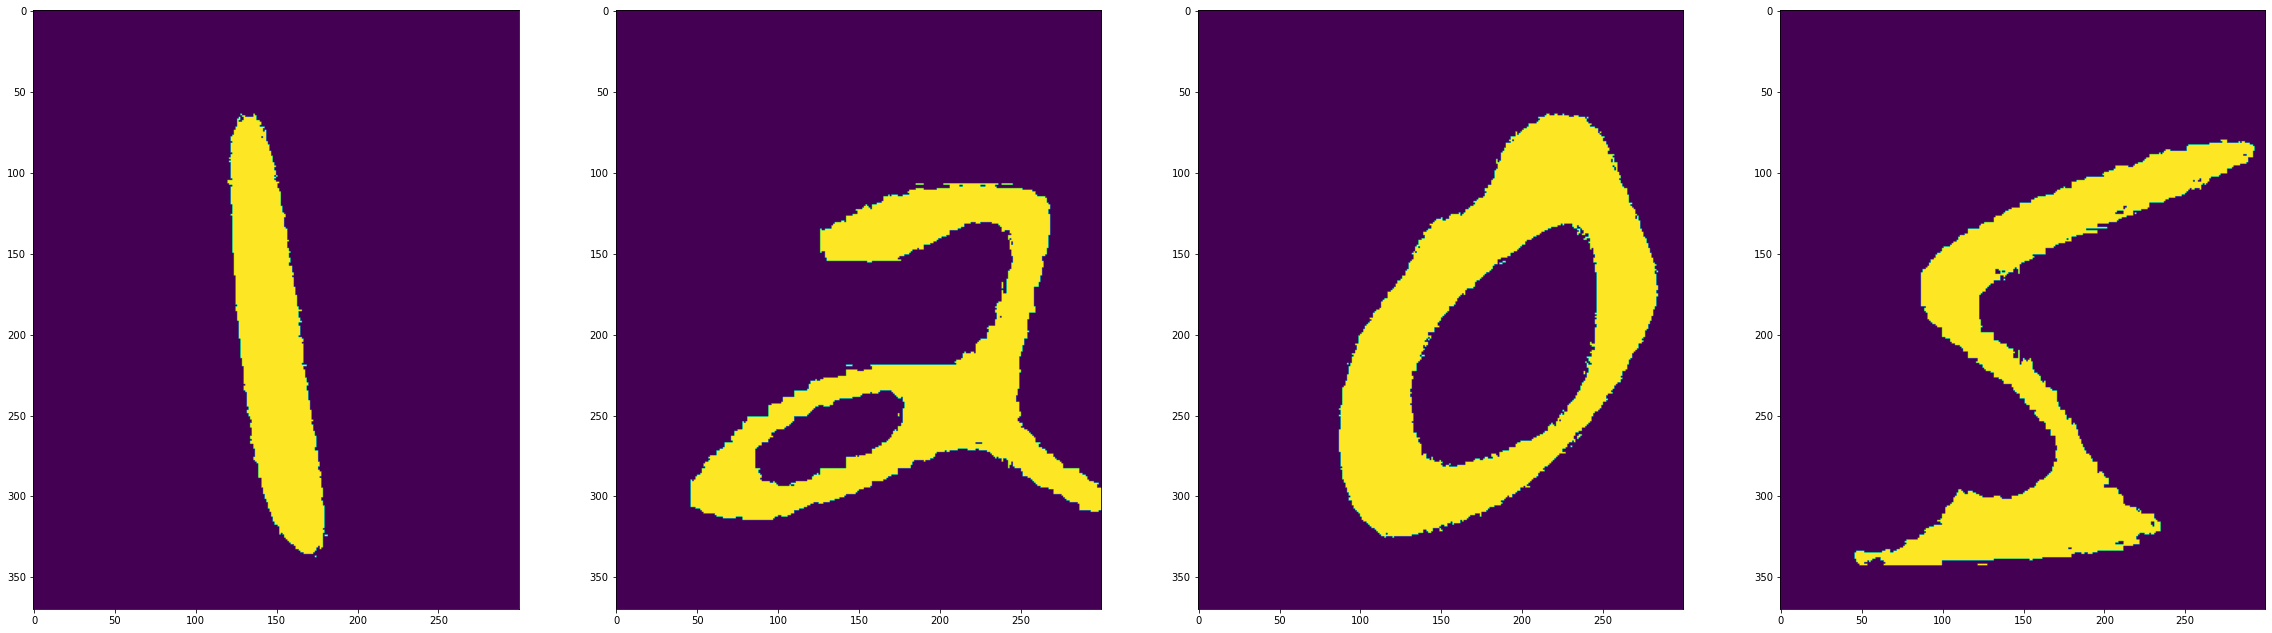

[4, 5, 2, 6]
game4 image8


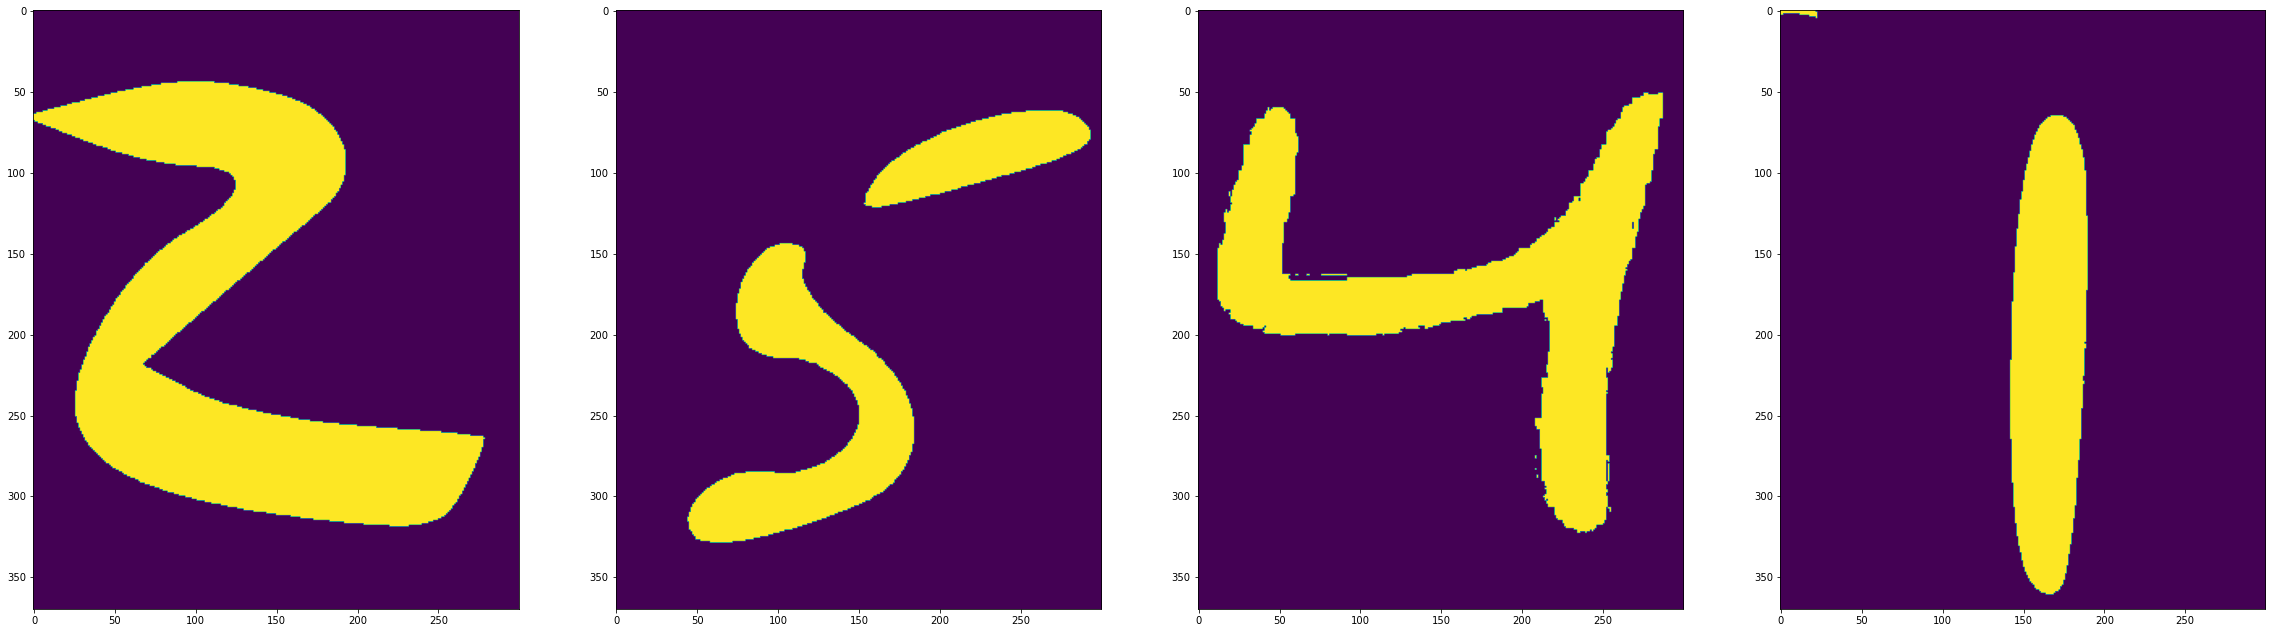

[4, 5, 2, 6]
game4 image9


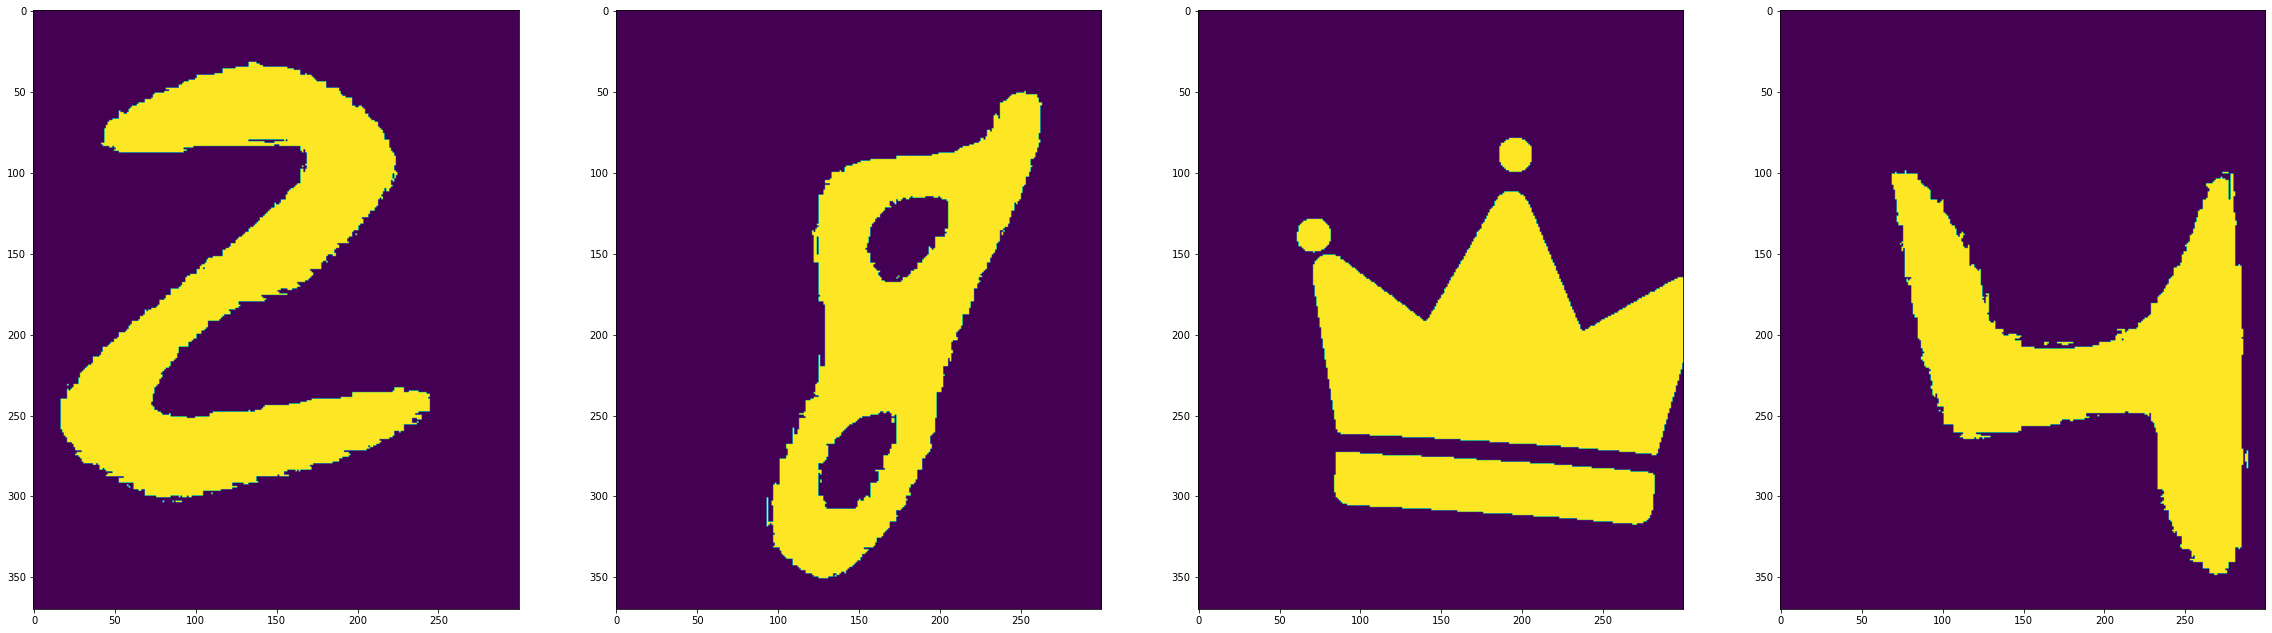

[4, 5, 2, 6]
game4 image10


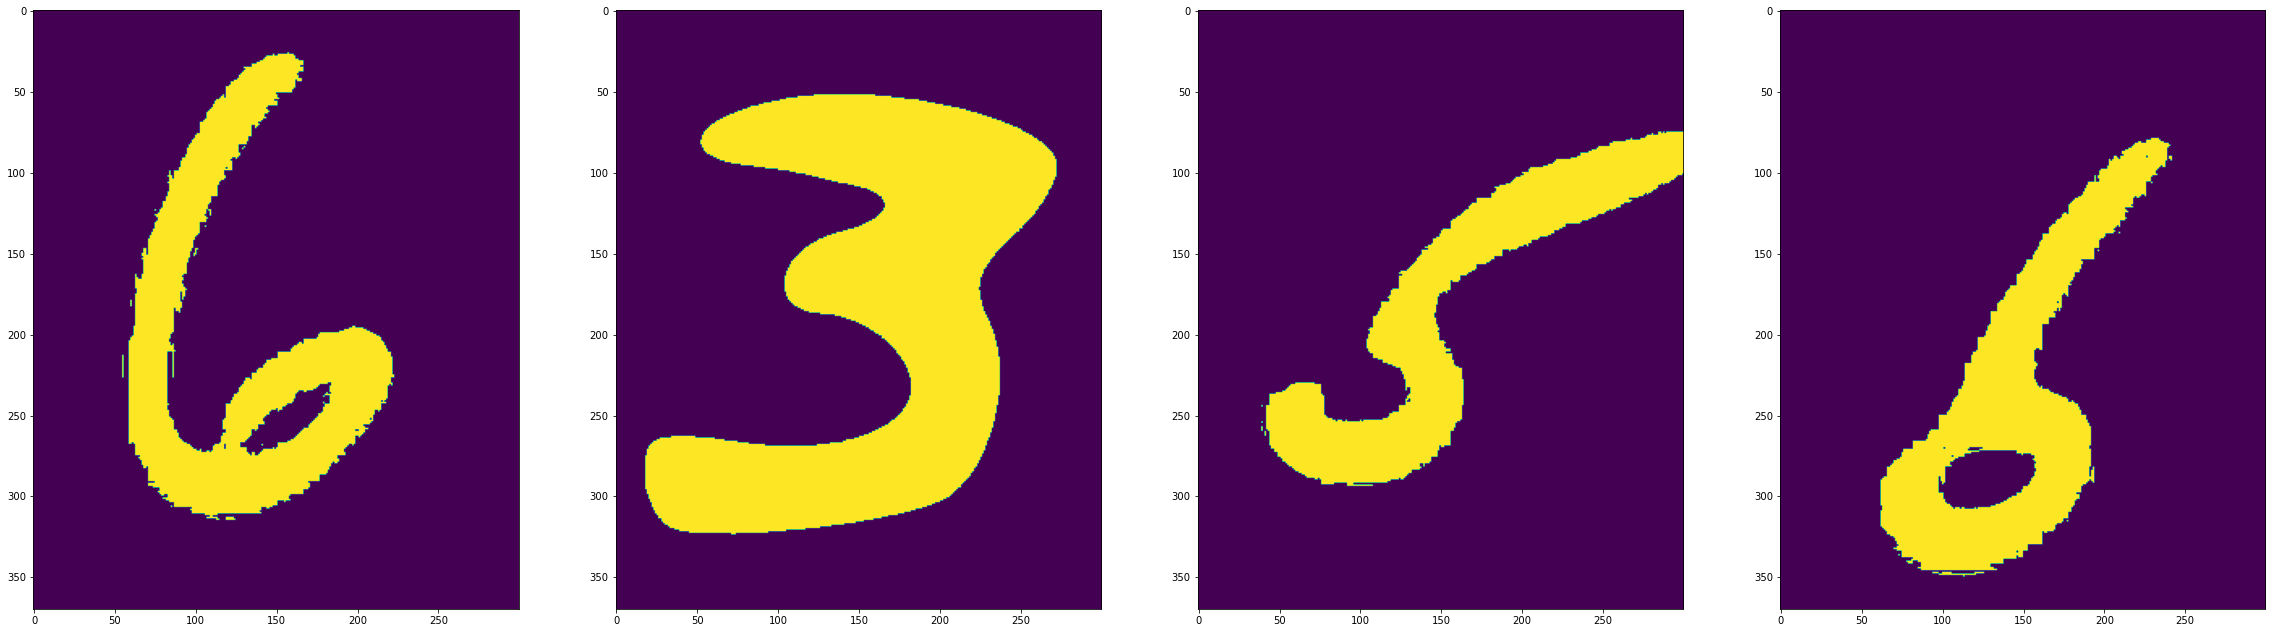

[4, 5, 2, 6]
game4 image11


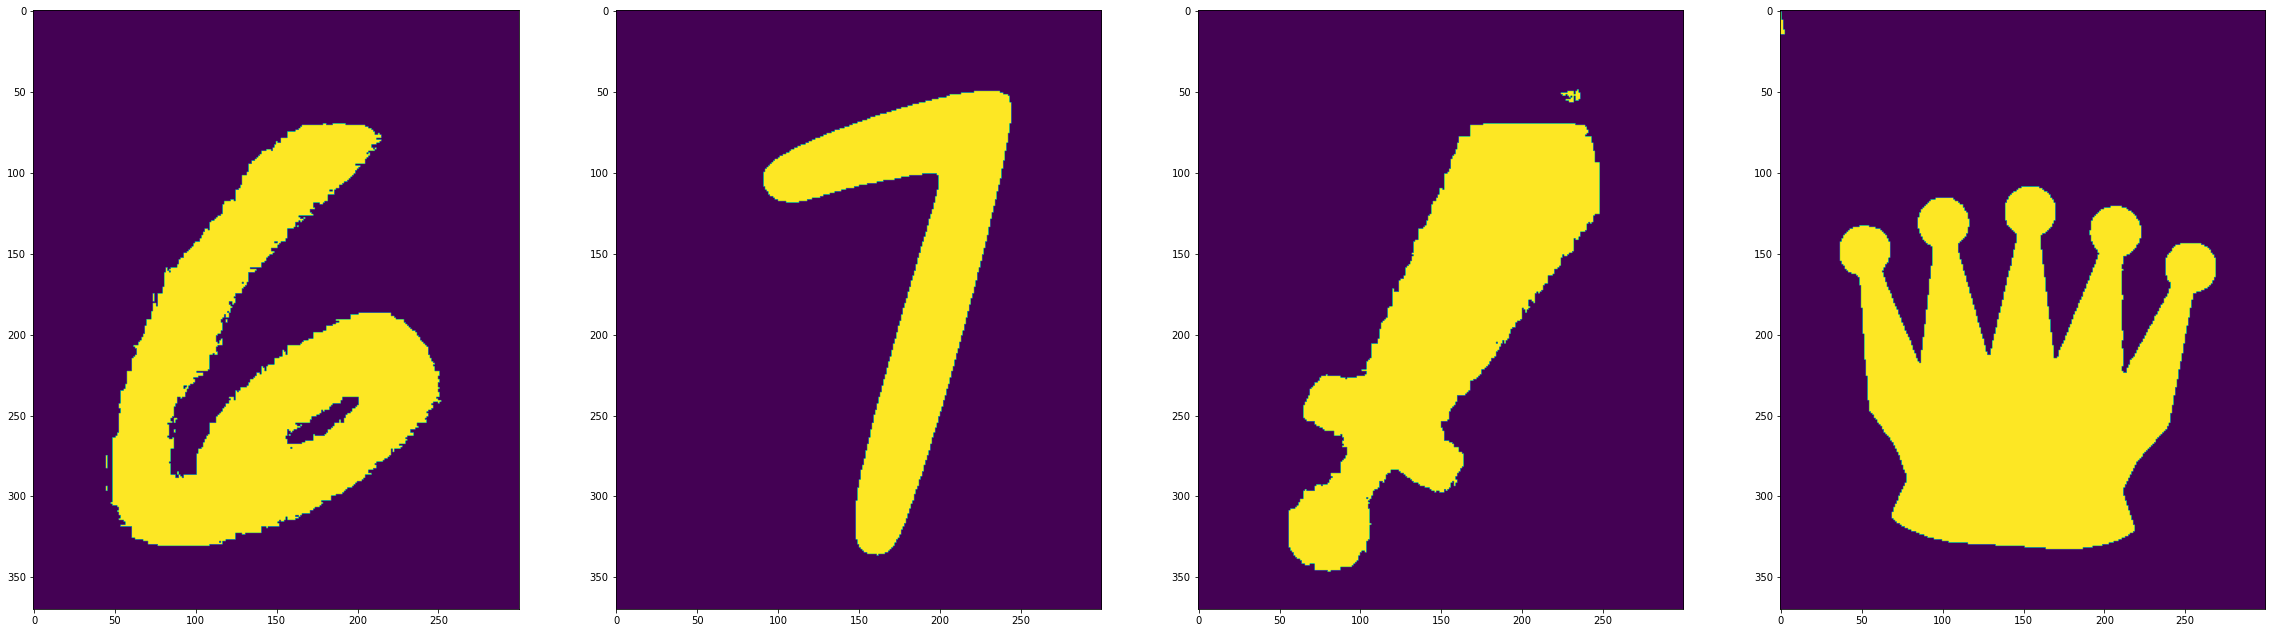

[4, 5, 2, 6]
game4 image12


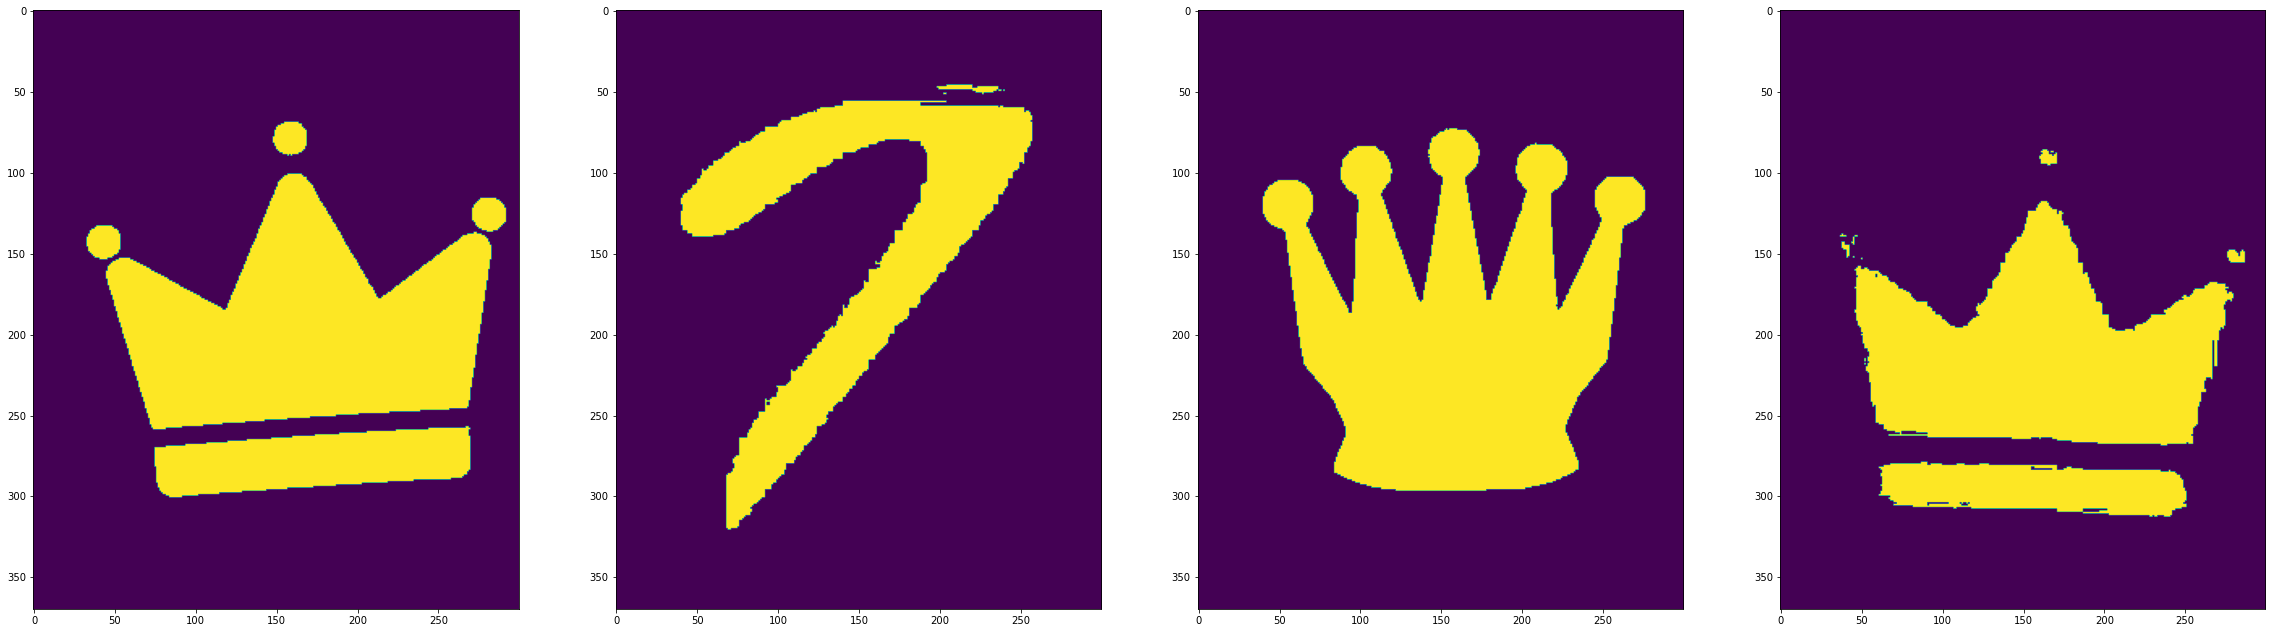

[4, 5, 2, 6]
game5
game5 image0


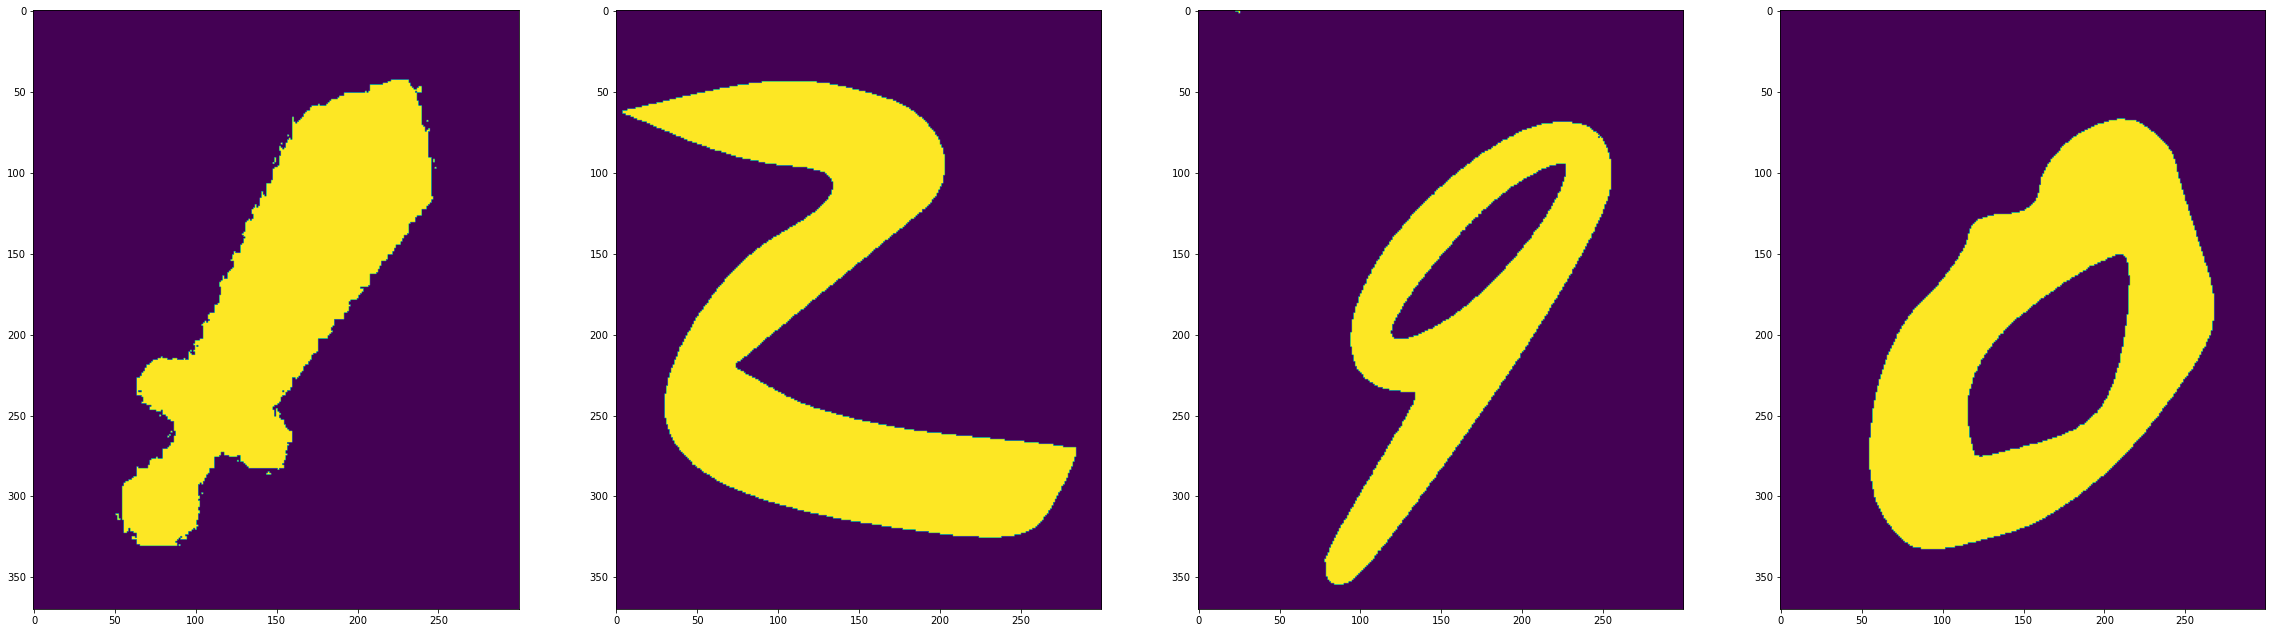

[4, 5, 2, 6]
game5 image1


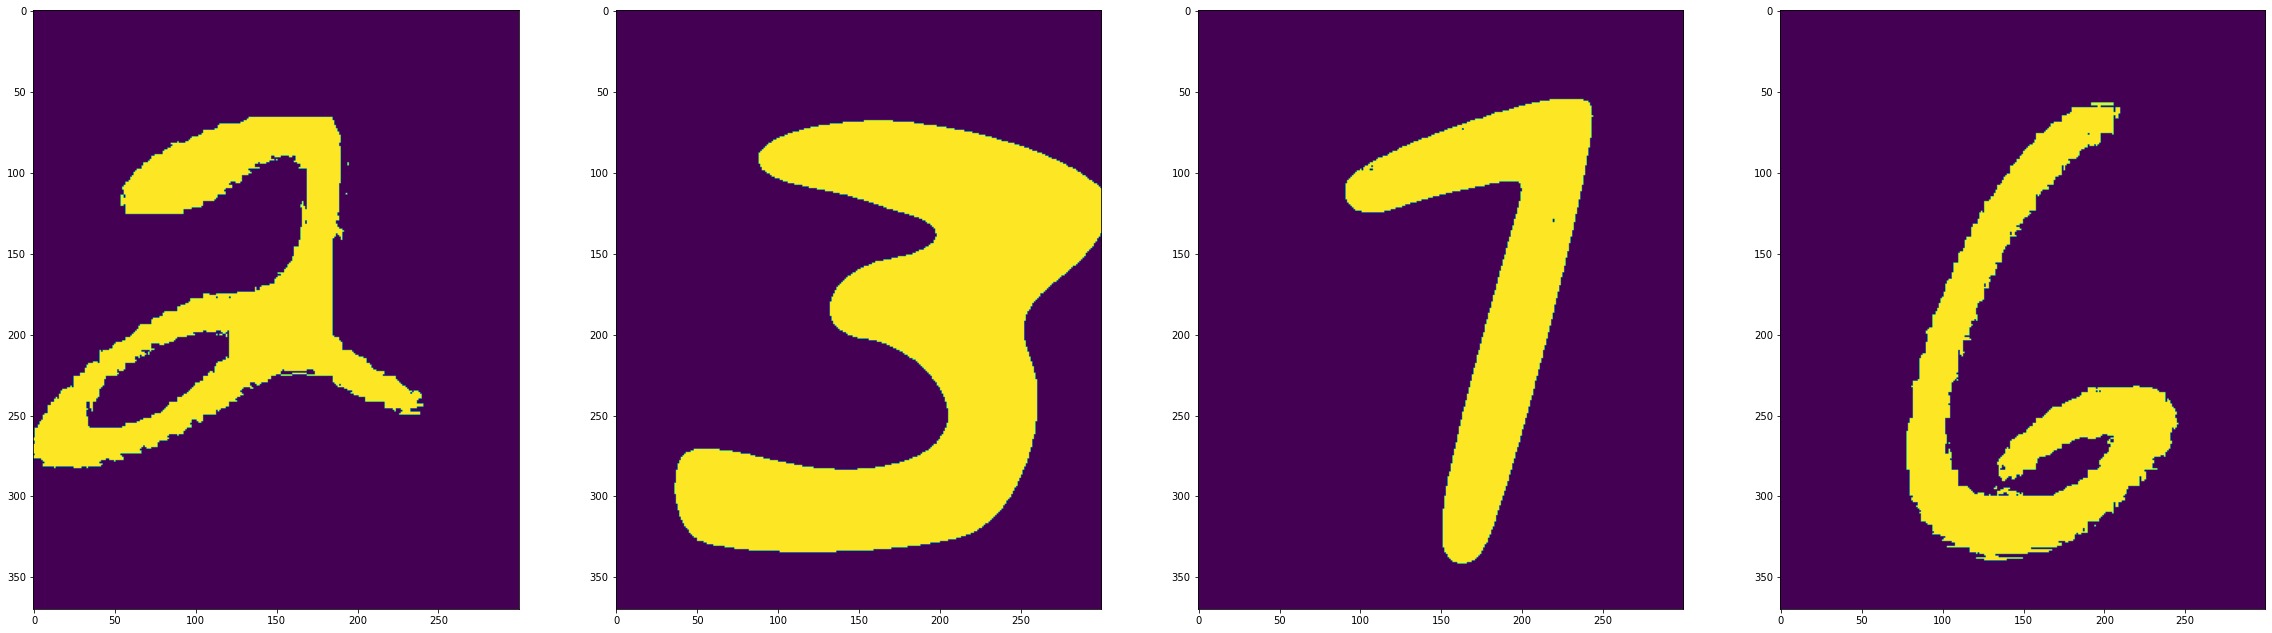

[4, 5, 2, 6]
game5 image2


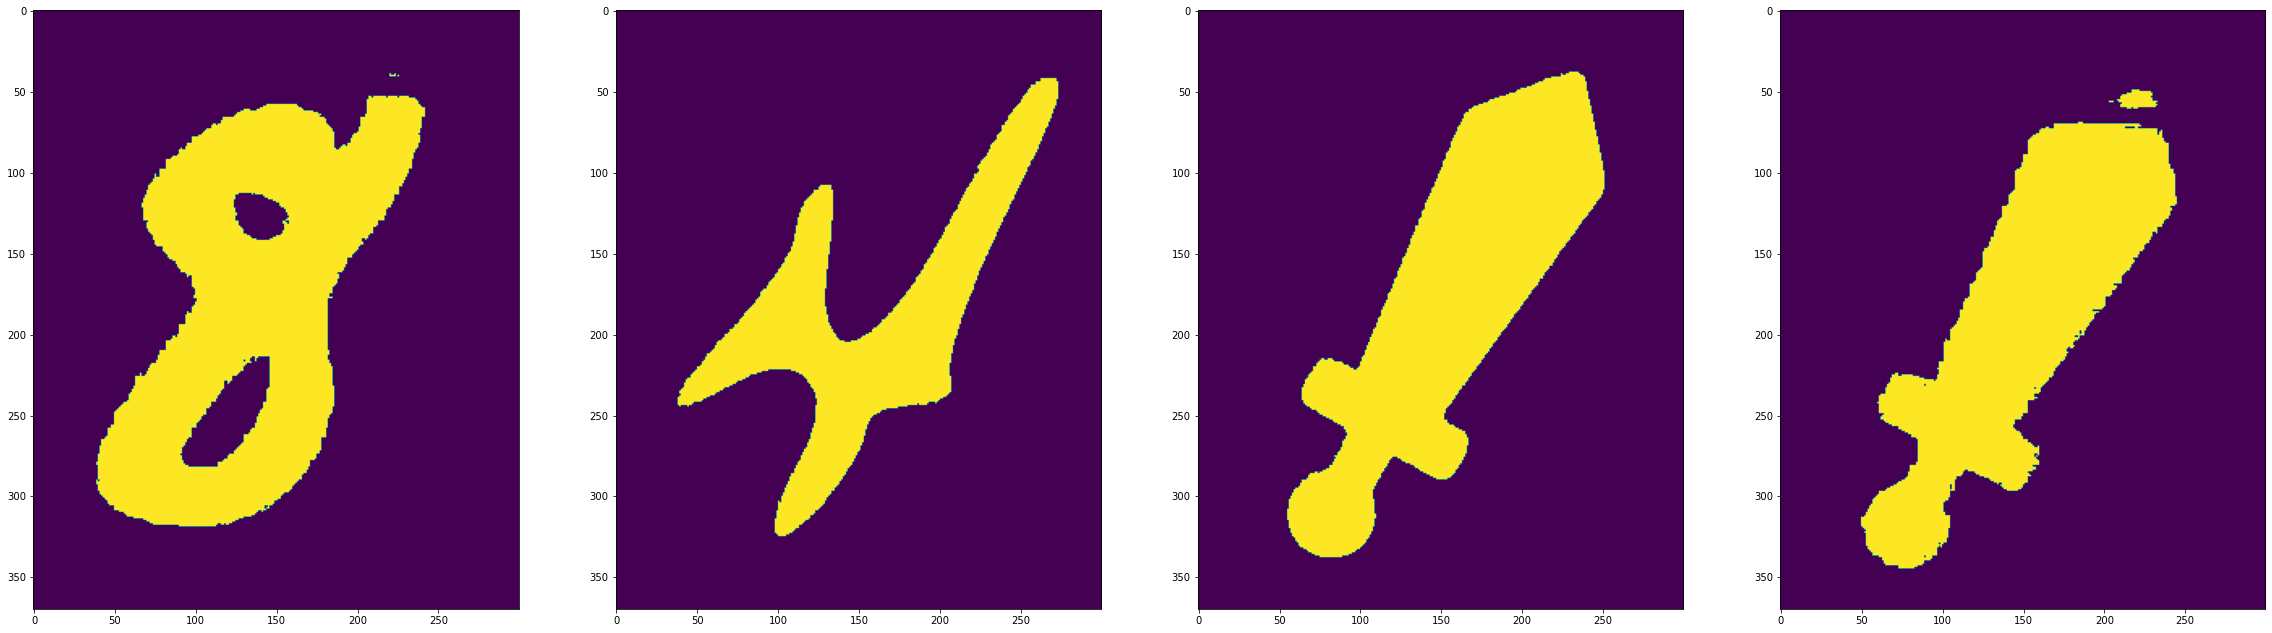

[4, 5, 2, 6]
game5 image3


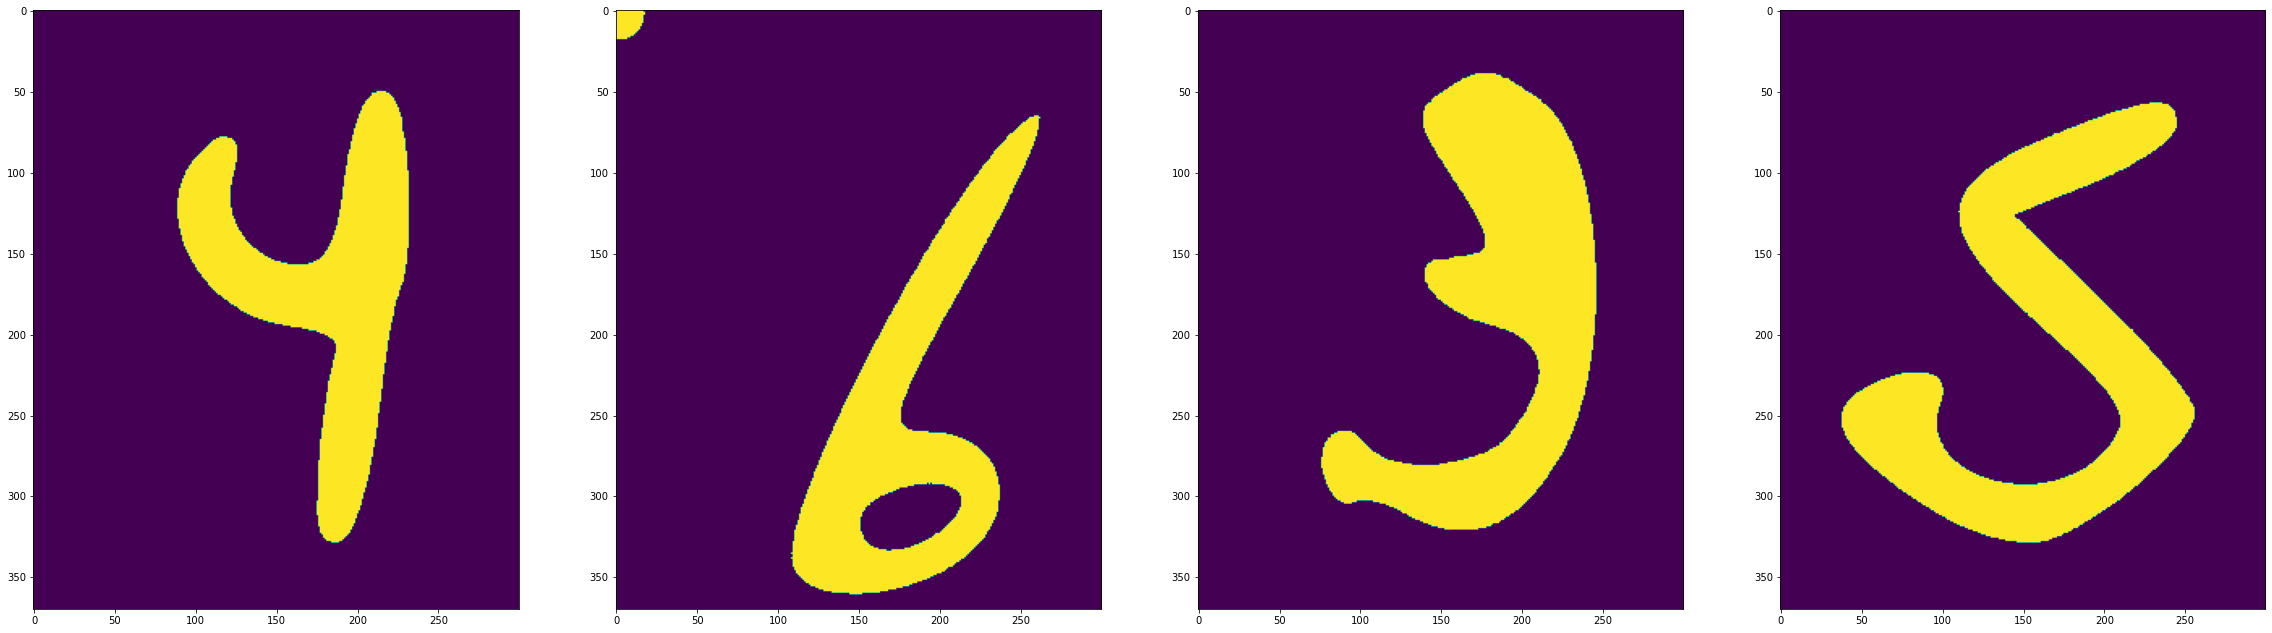

[4, 5, 2, 6]
game5 image4


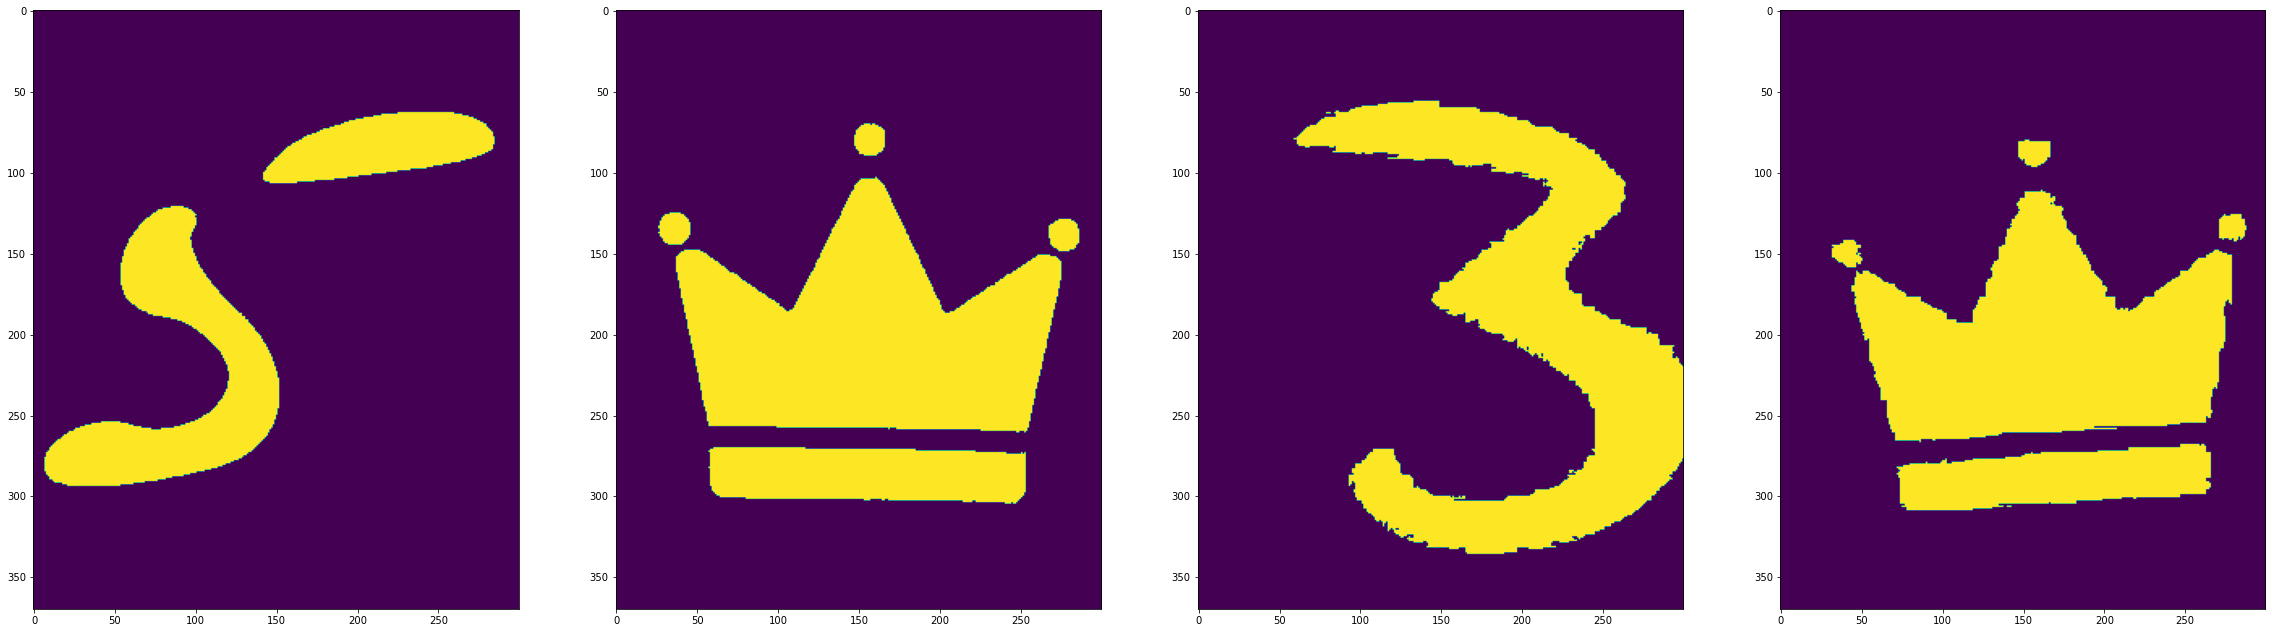

[4, 5, 2, 6]
game5 image5


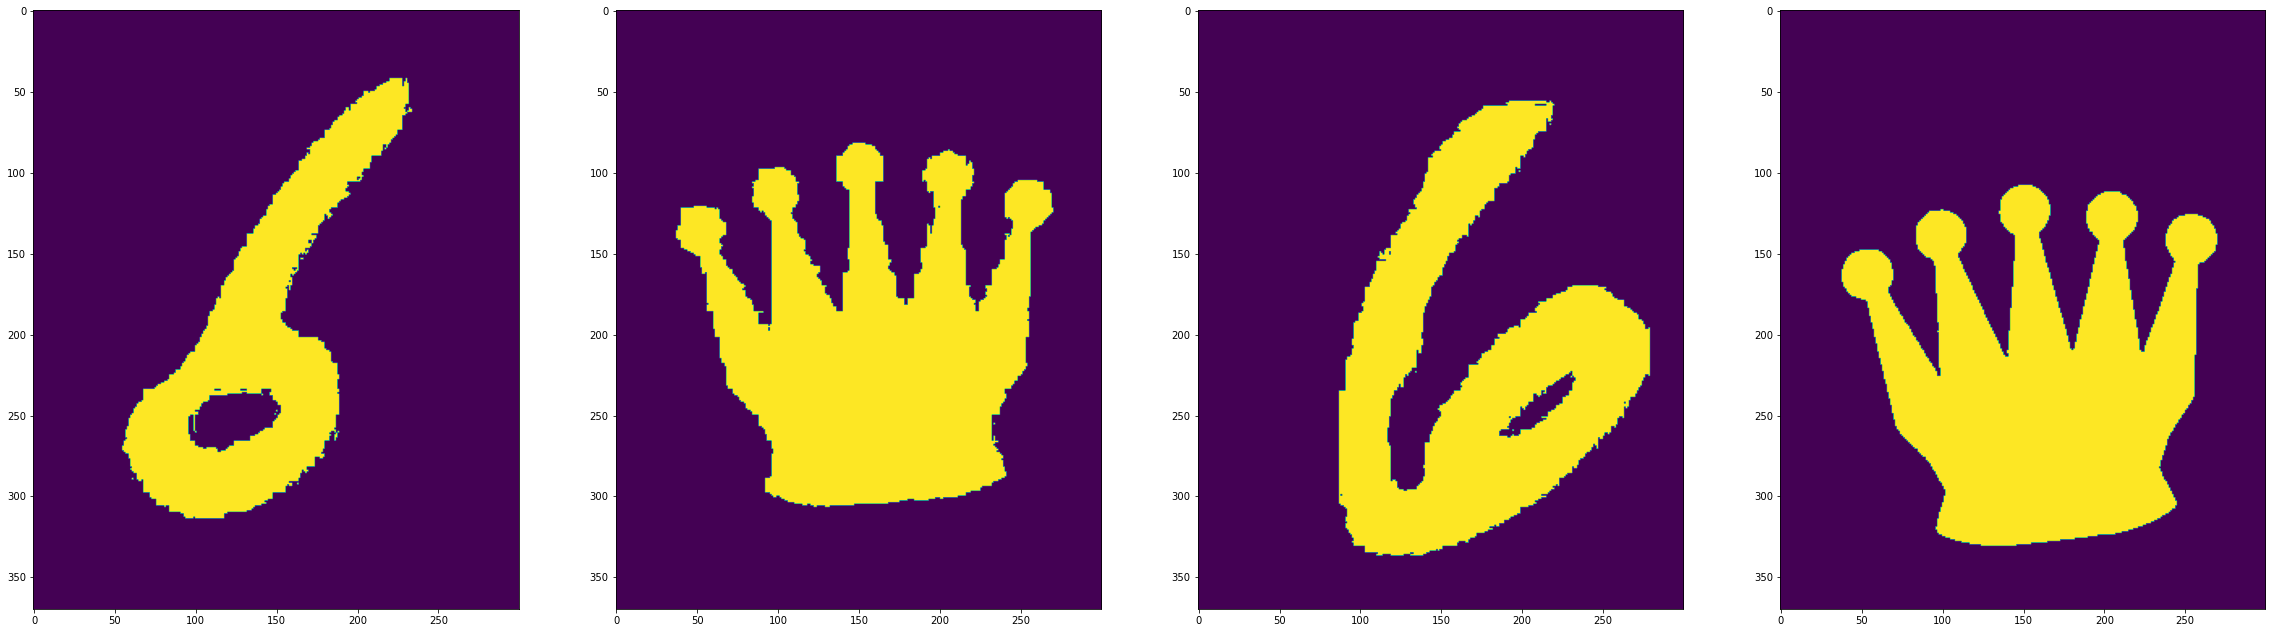

[4, 5, 2, 6]
game5 image6


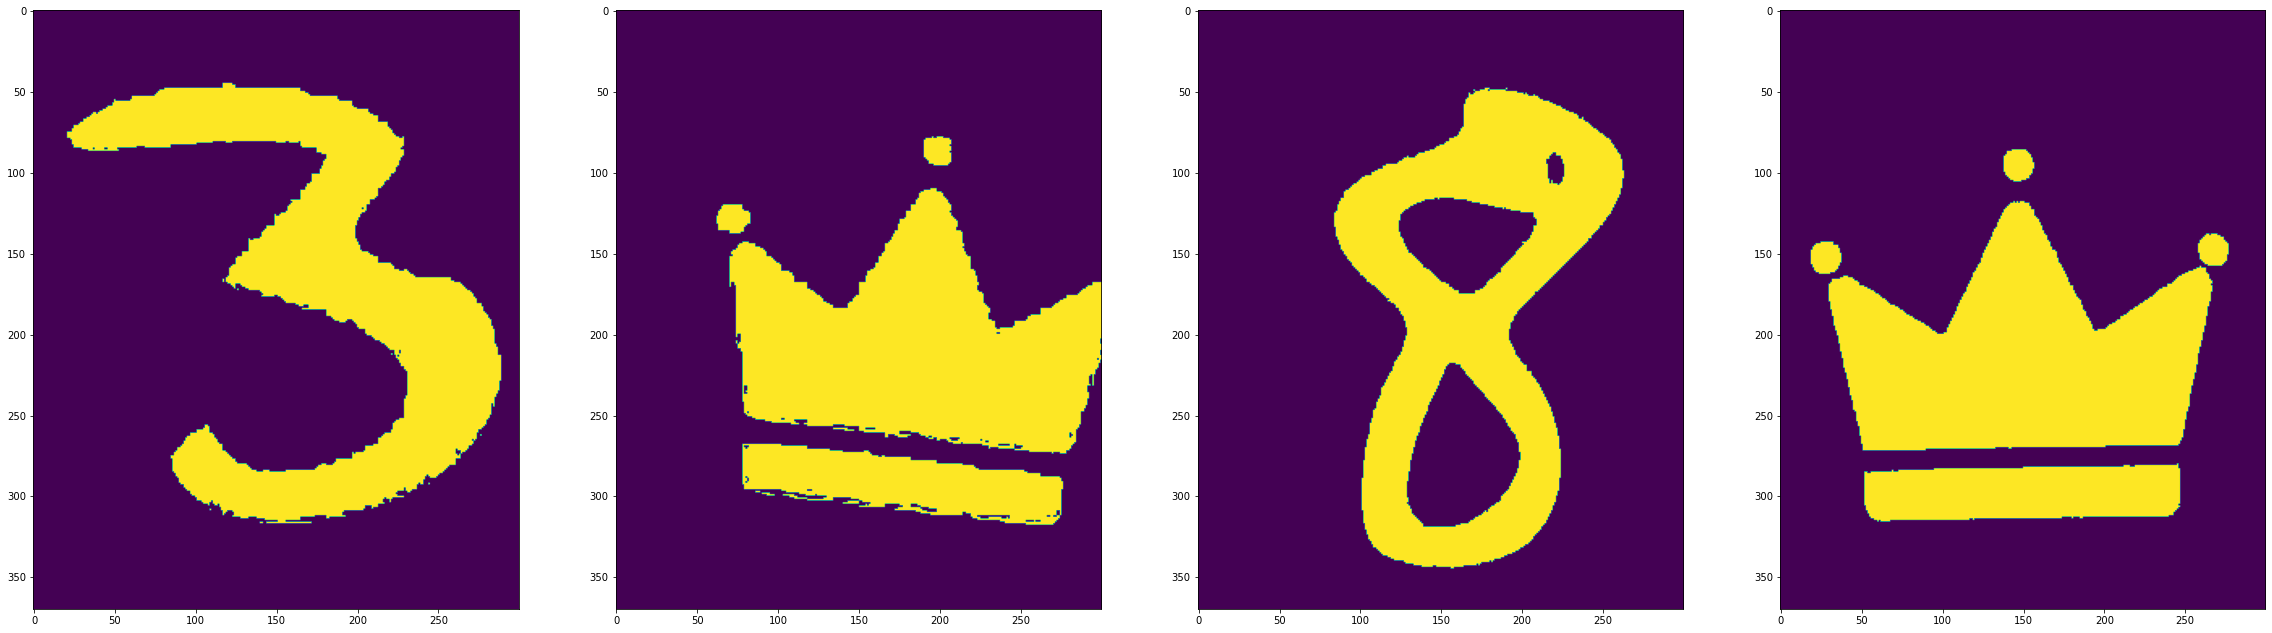

[4, 5, 2, 6]
game5 image7


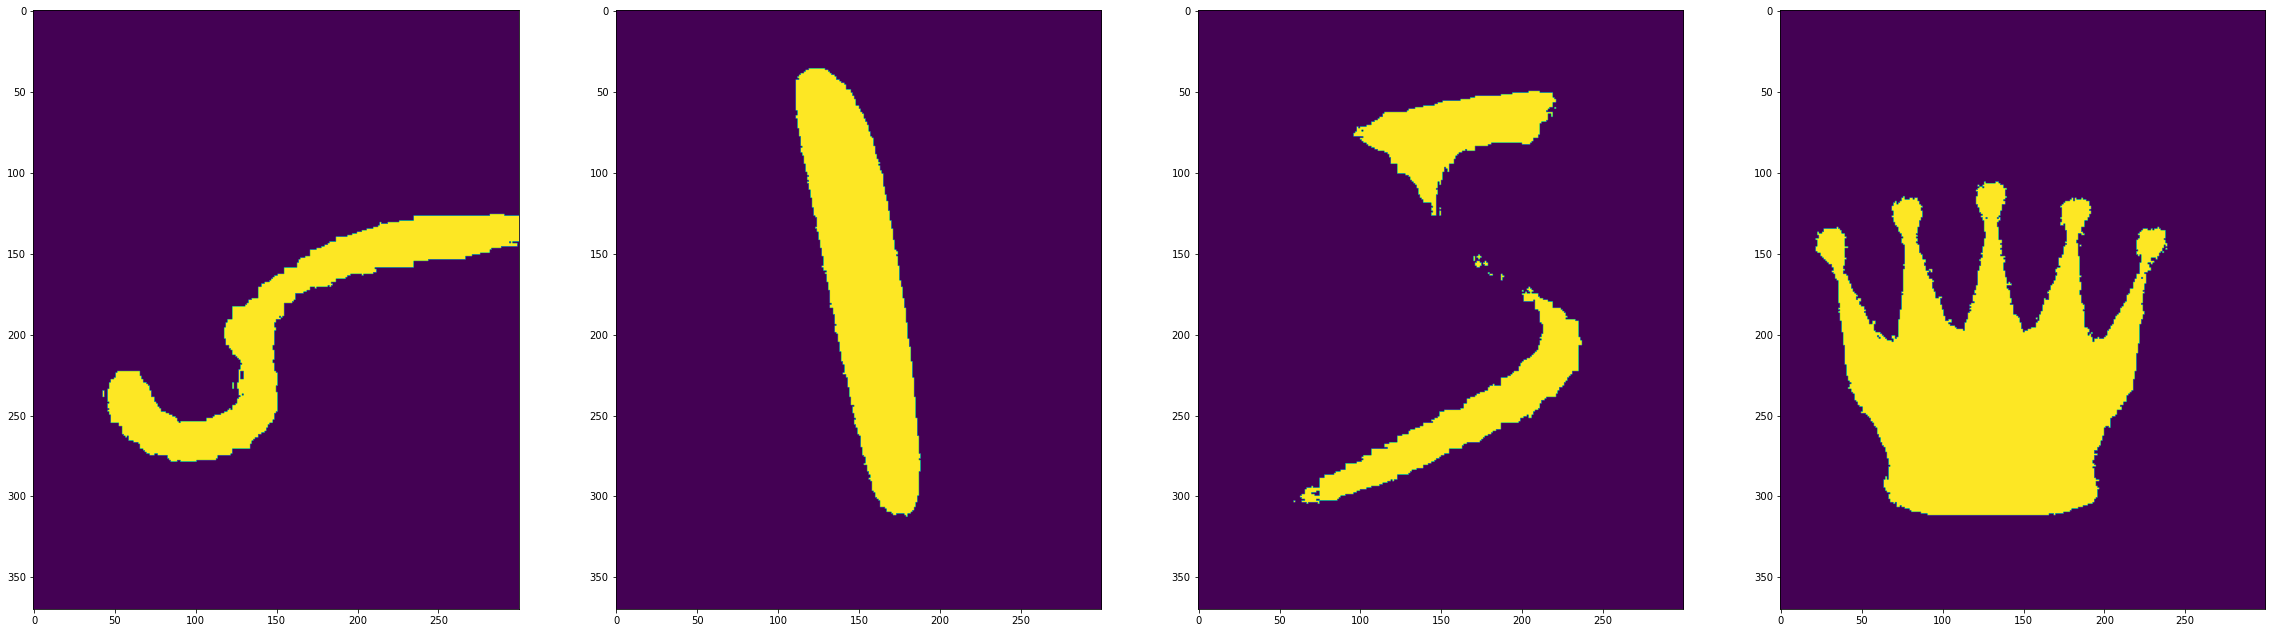

[4, 5, 2, 6]
game5 image8


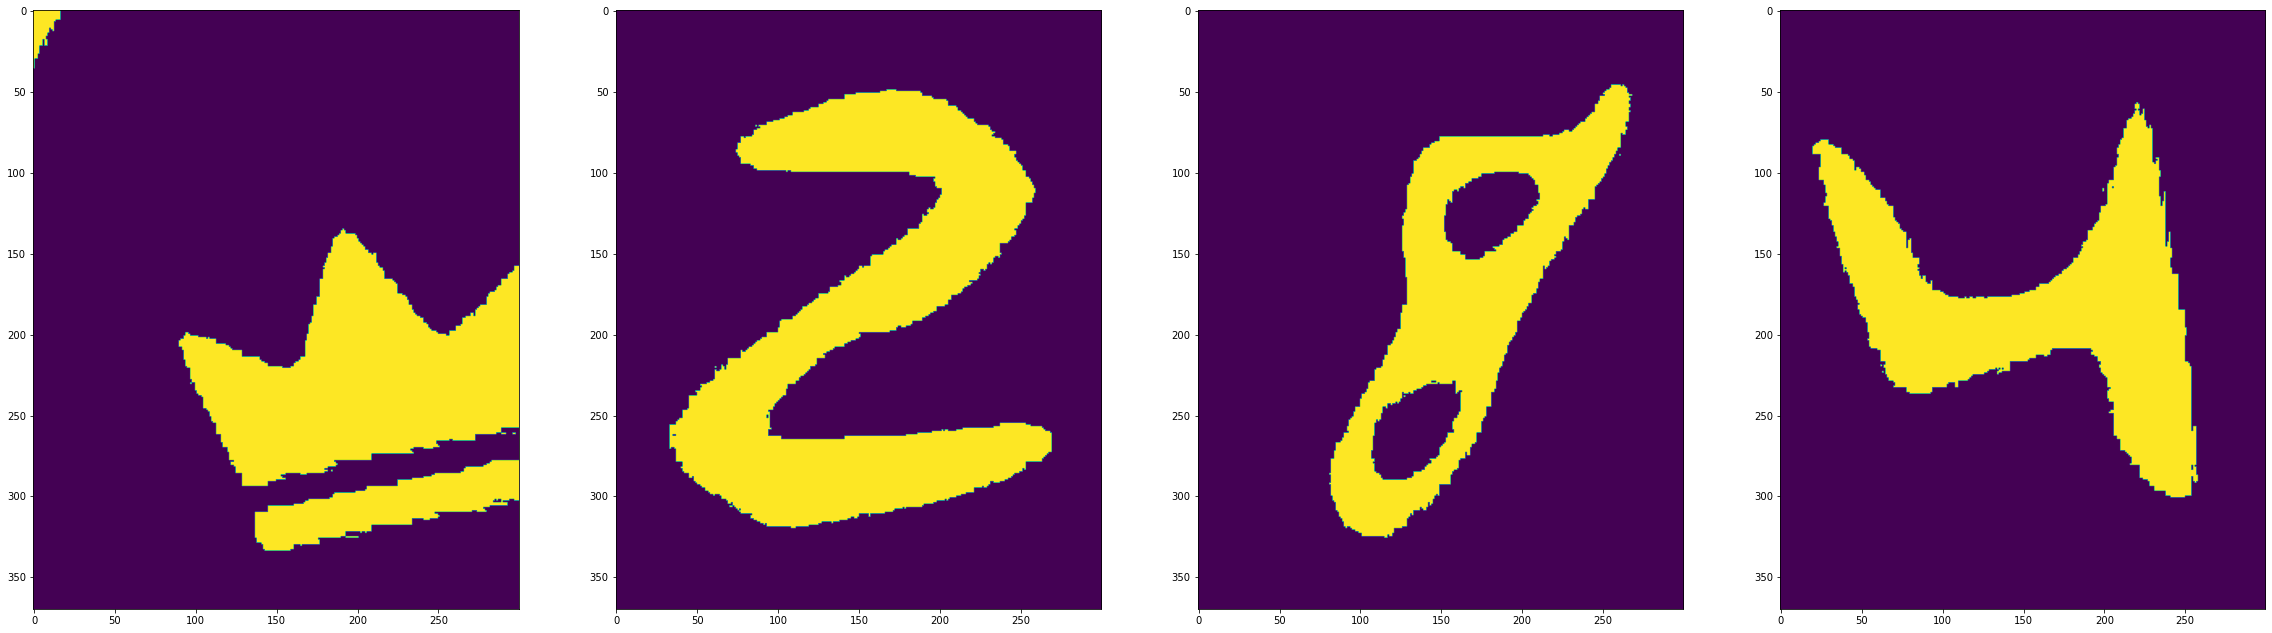

[4, 5, 2, 6]
game5 image9


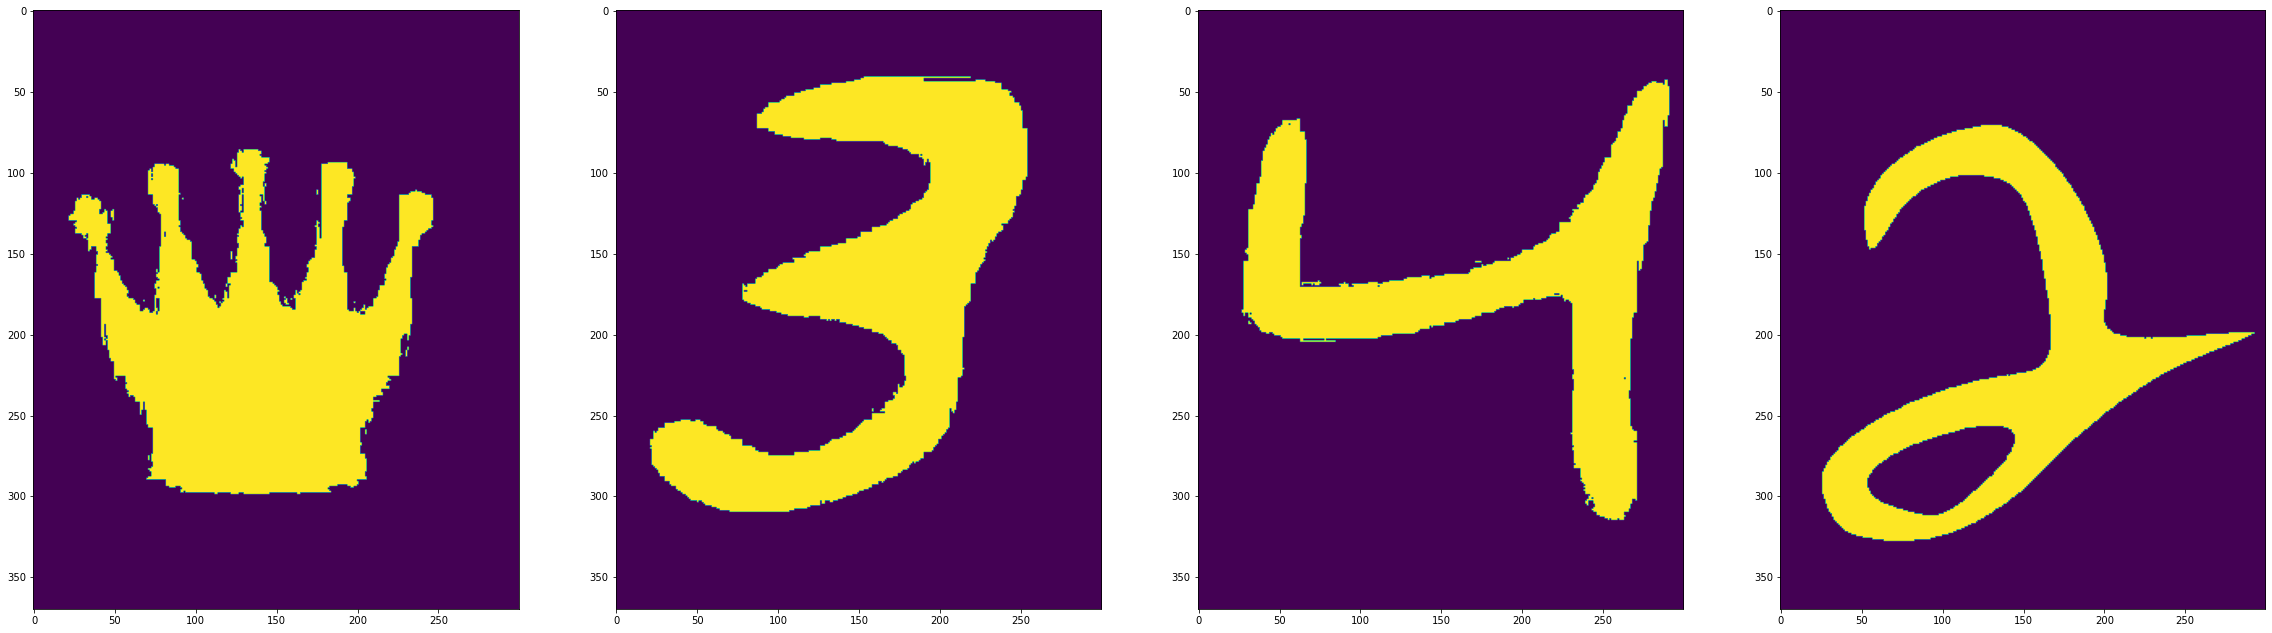

[4, 5, 2, 6]
game5 image10


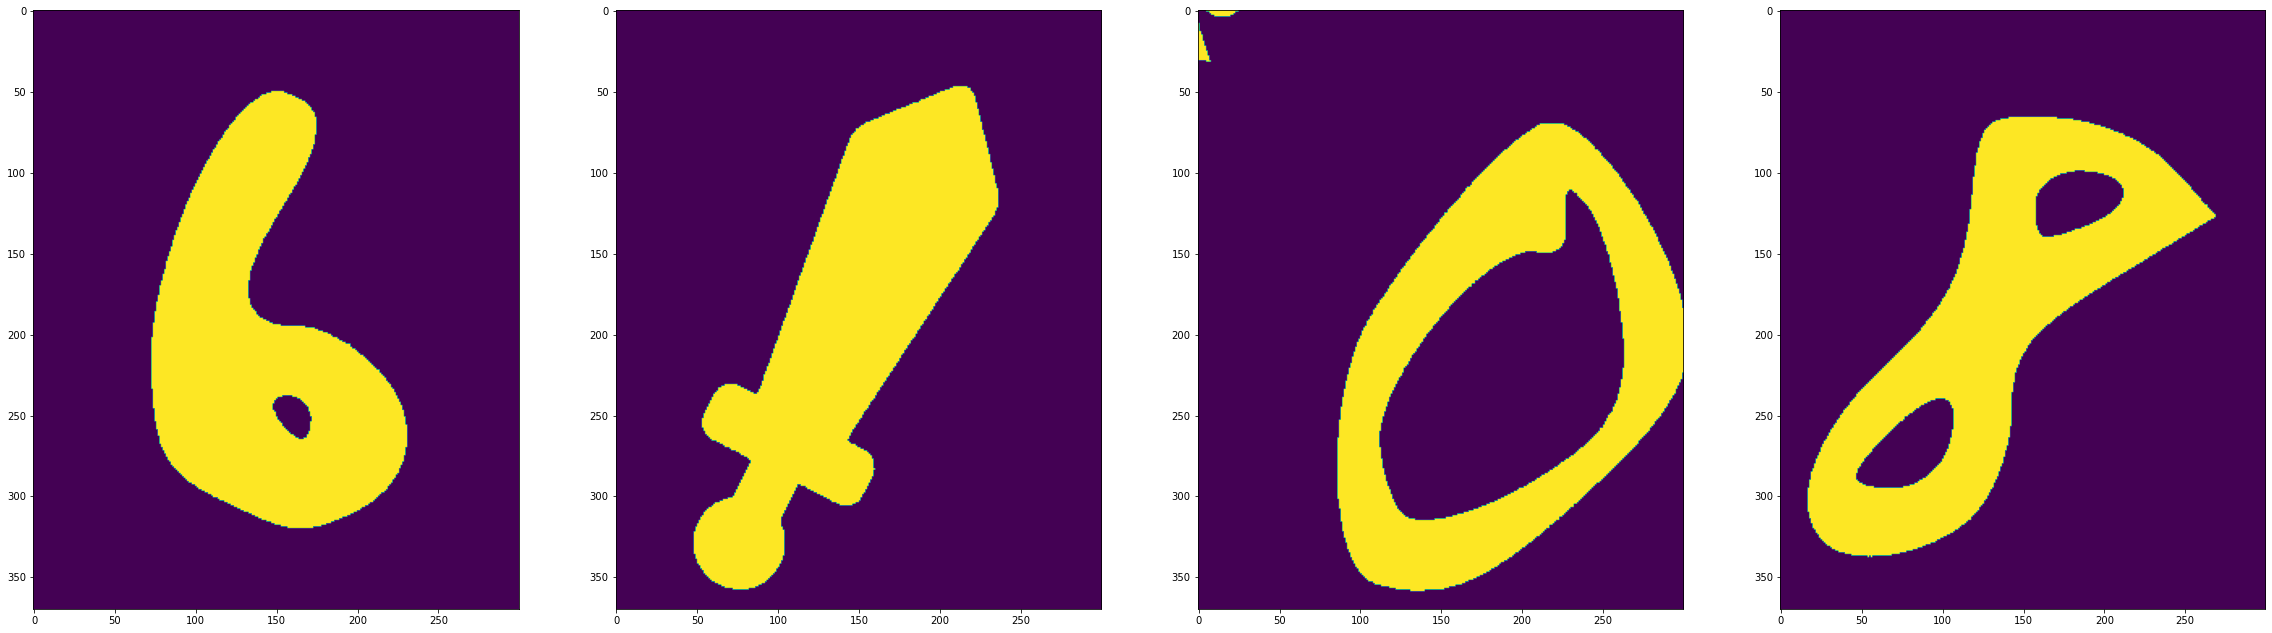

[4, 5, 2, 6]
game5 image11


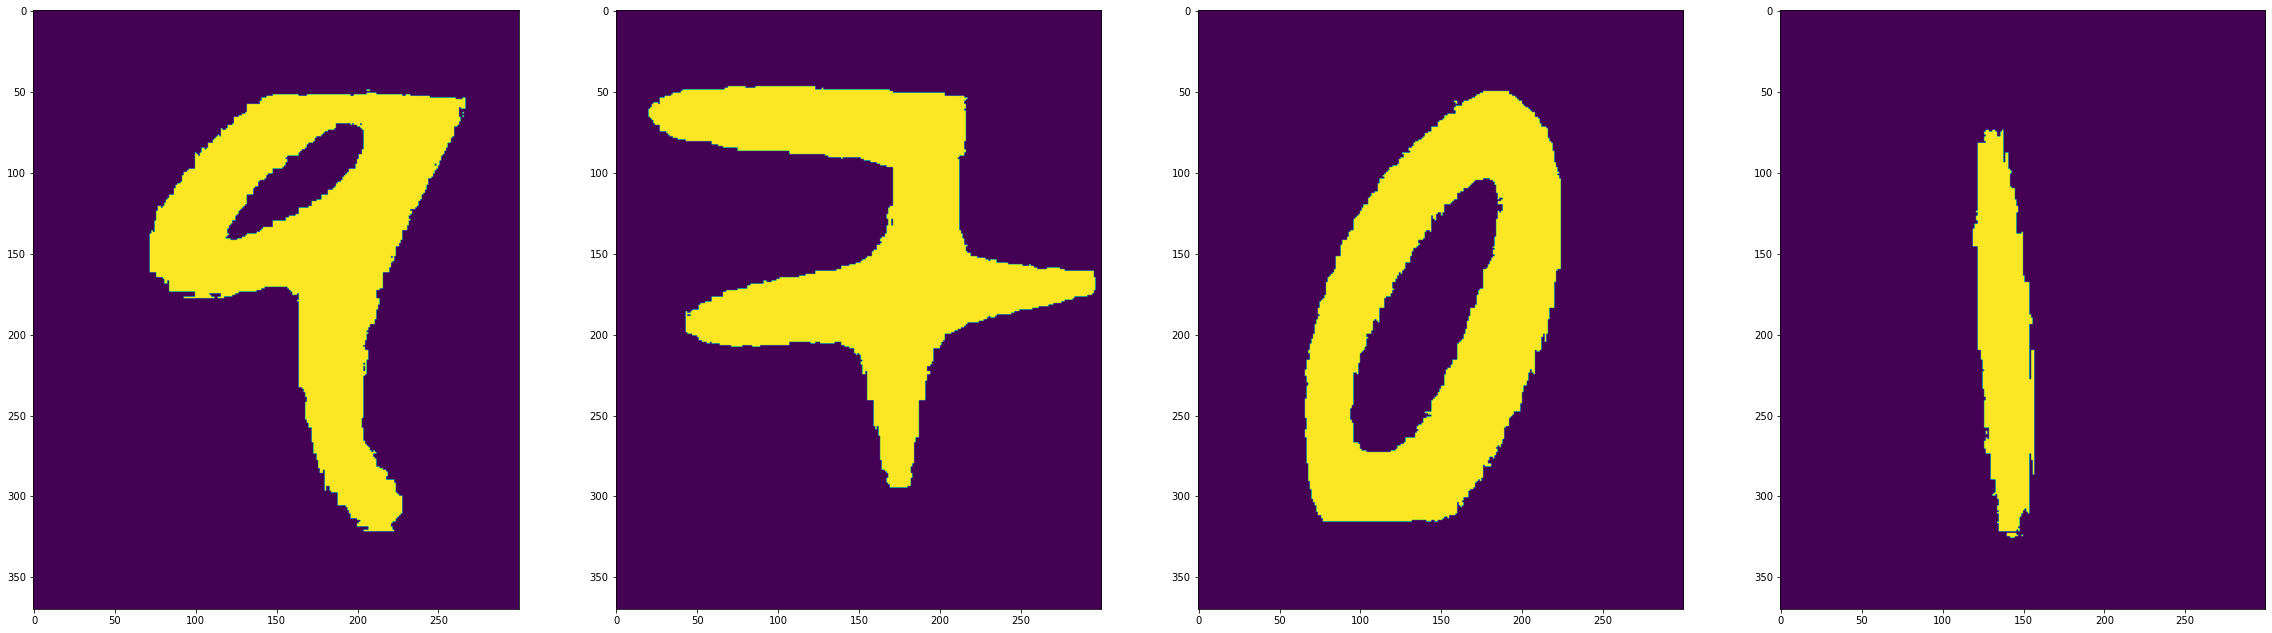

[4, 5, 2, 6]
game5 image12


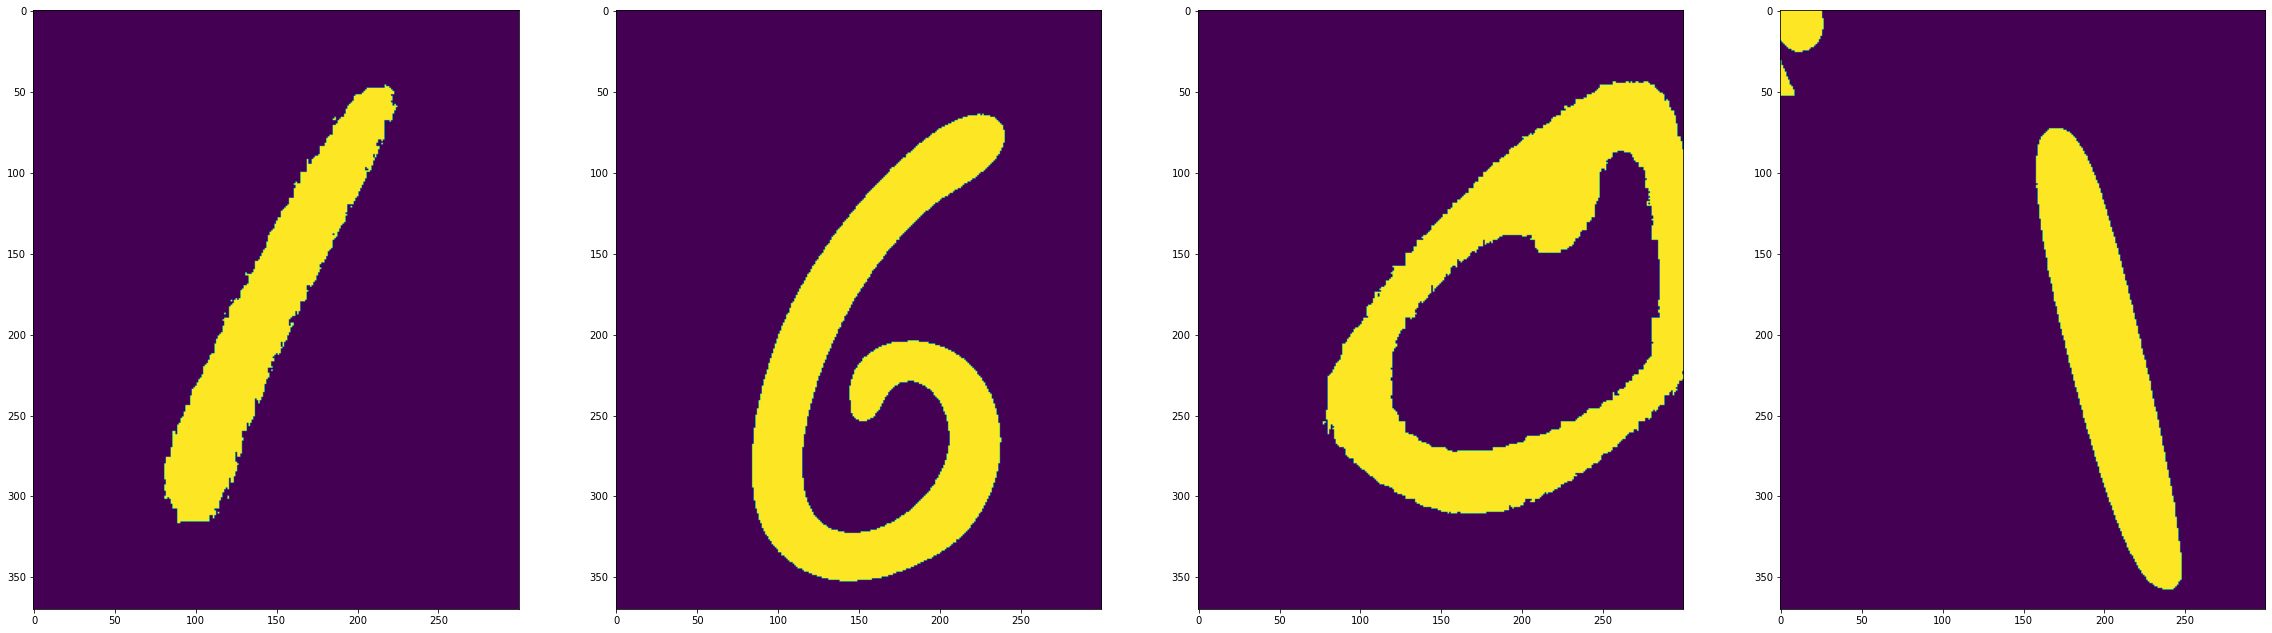

[4, 5, 2, 6]
game6
game6 image0


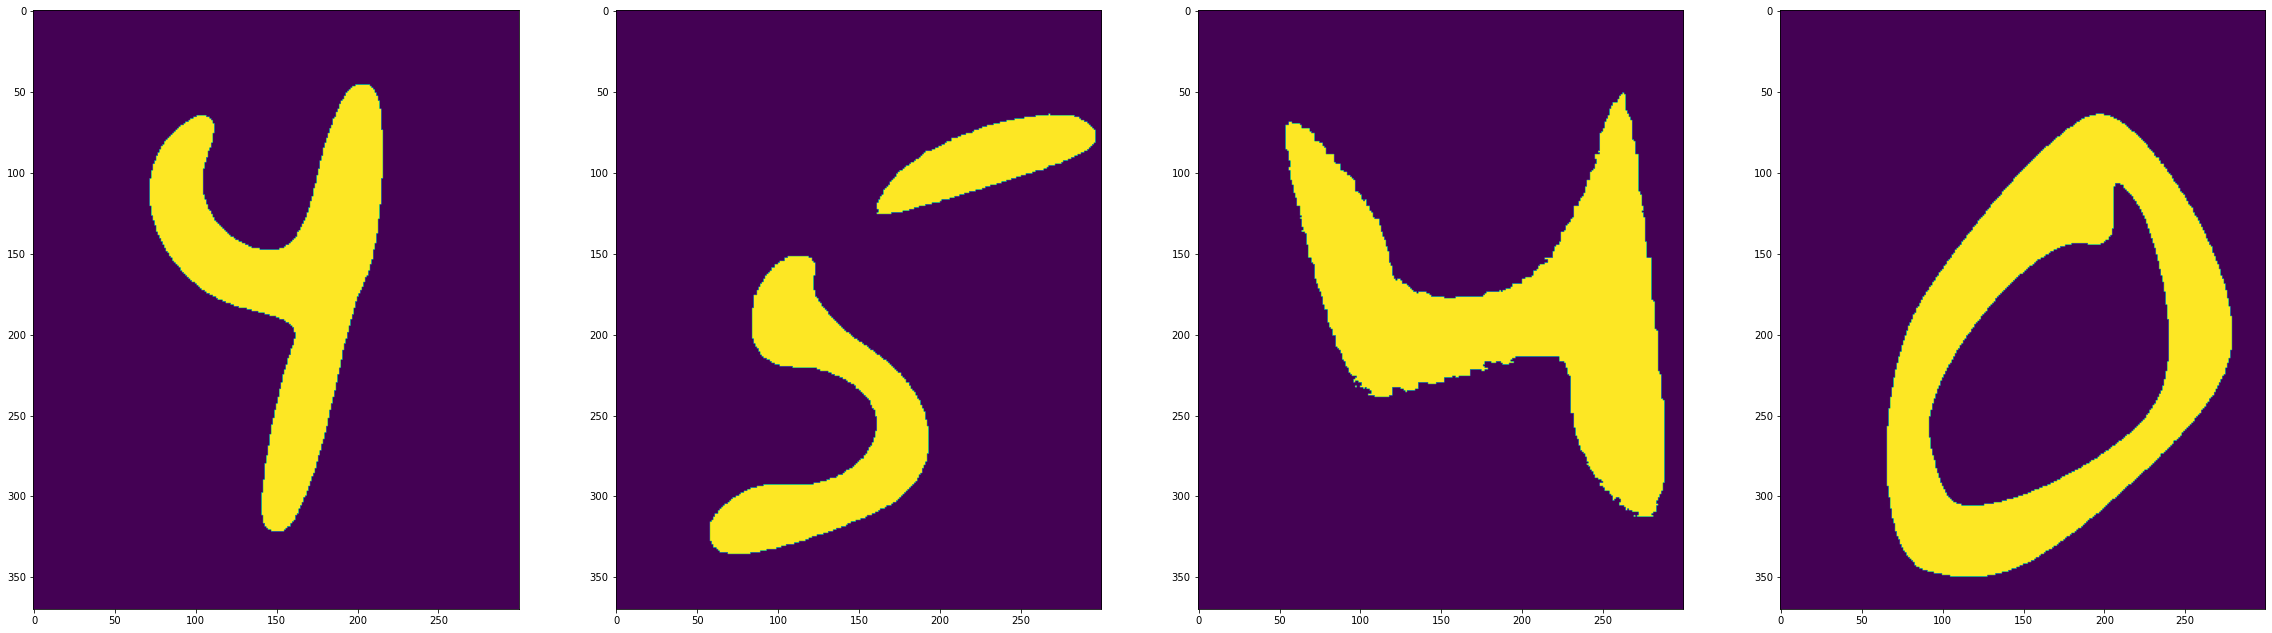

[4, 5, 2, 6]
game6 image1


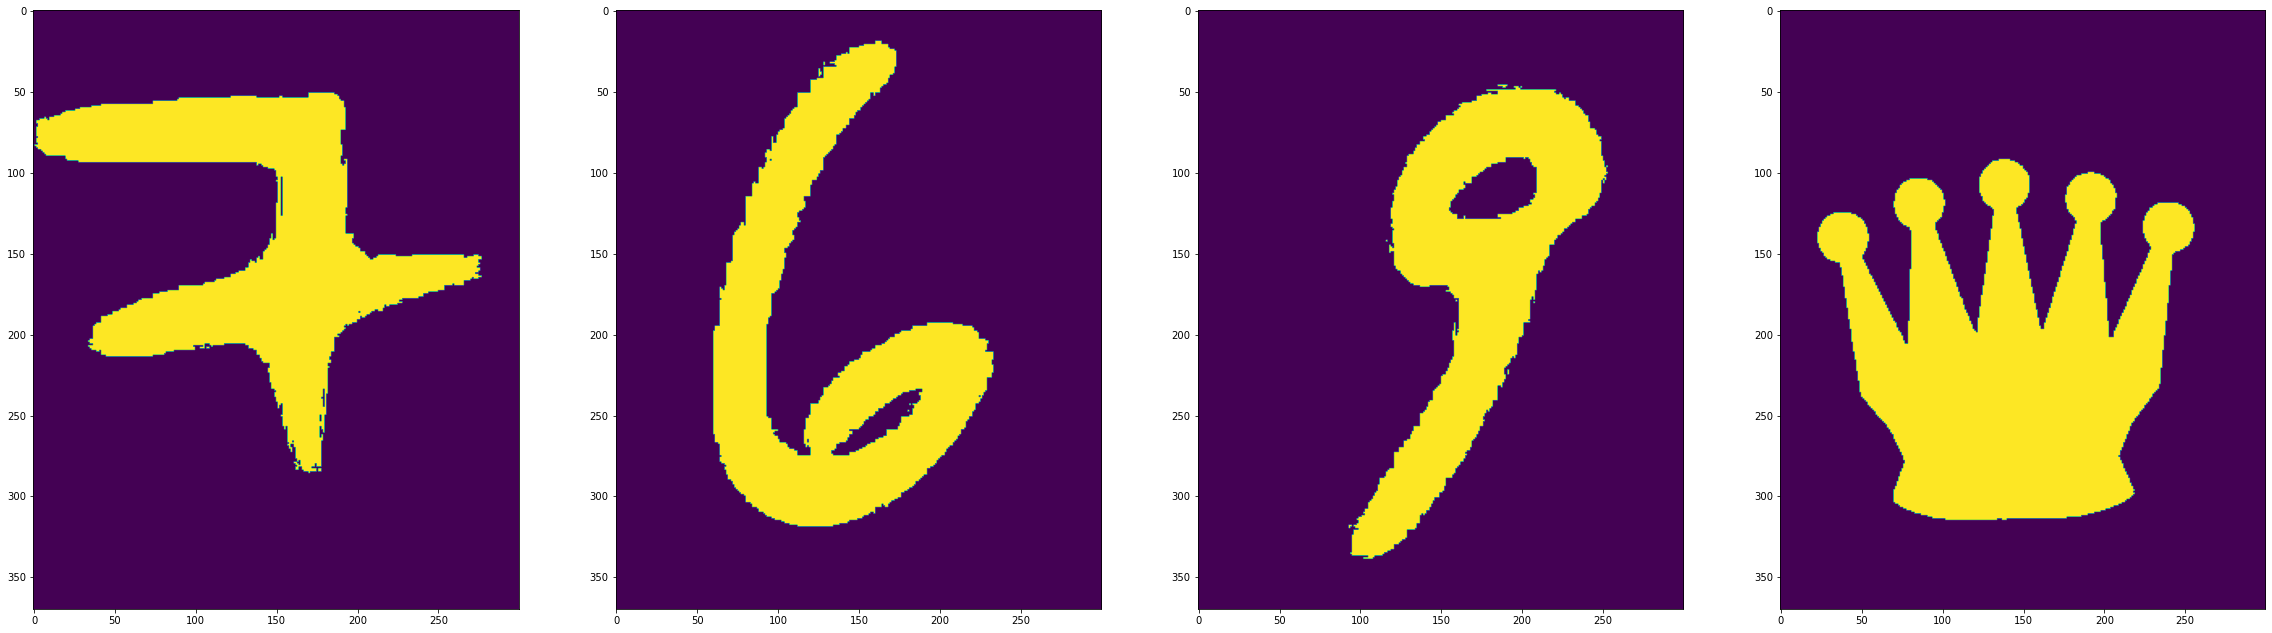

[4, 5, 2, 6]
game6 image2


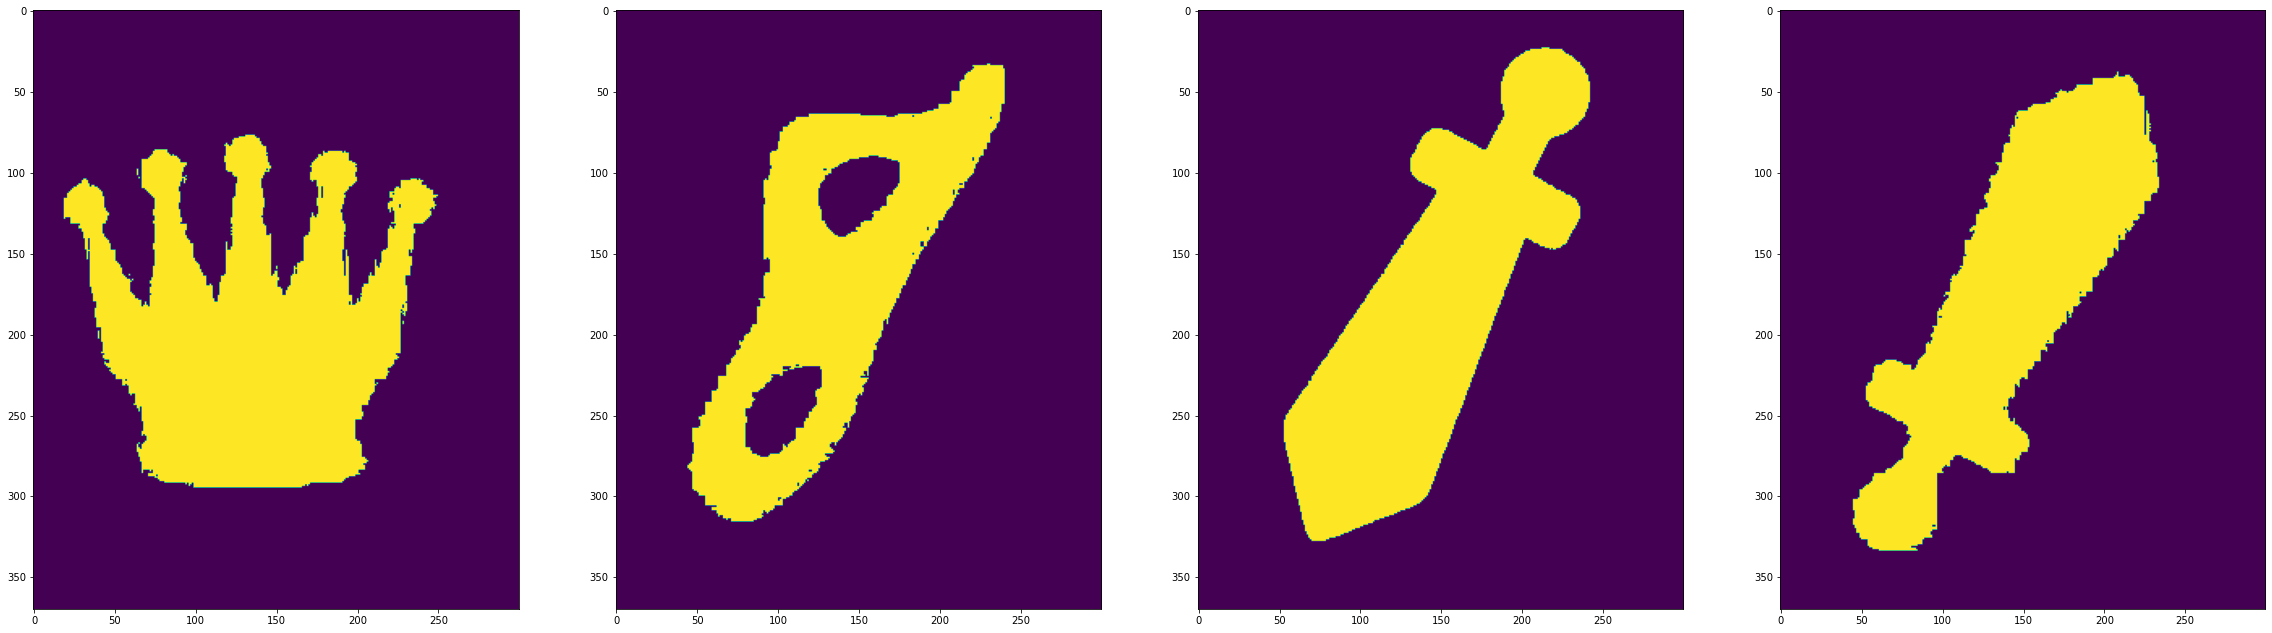

[4, 5, 2, 6]
game6 image3


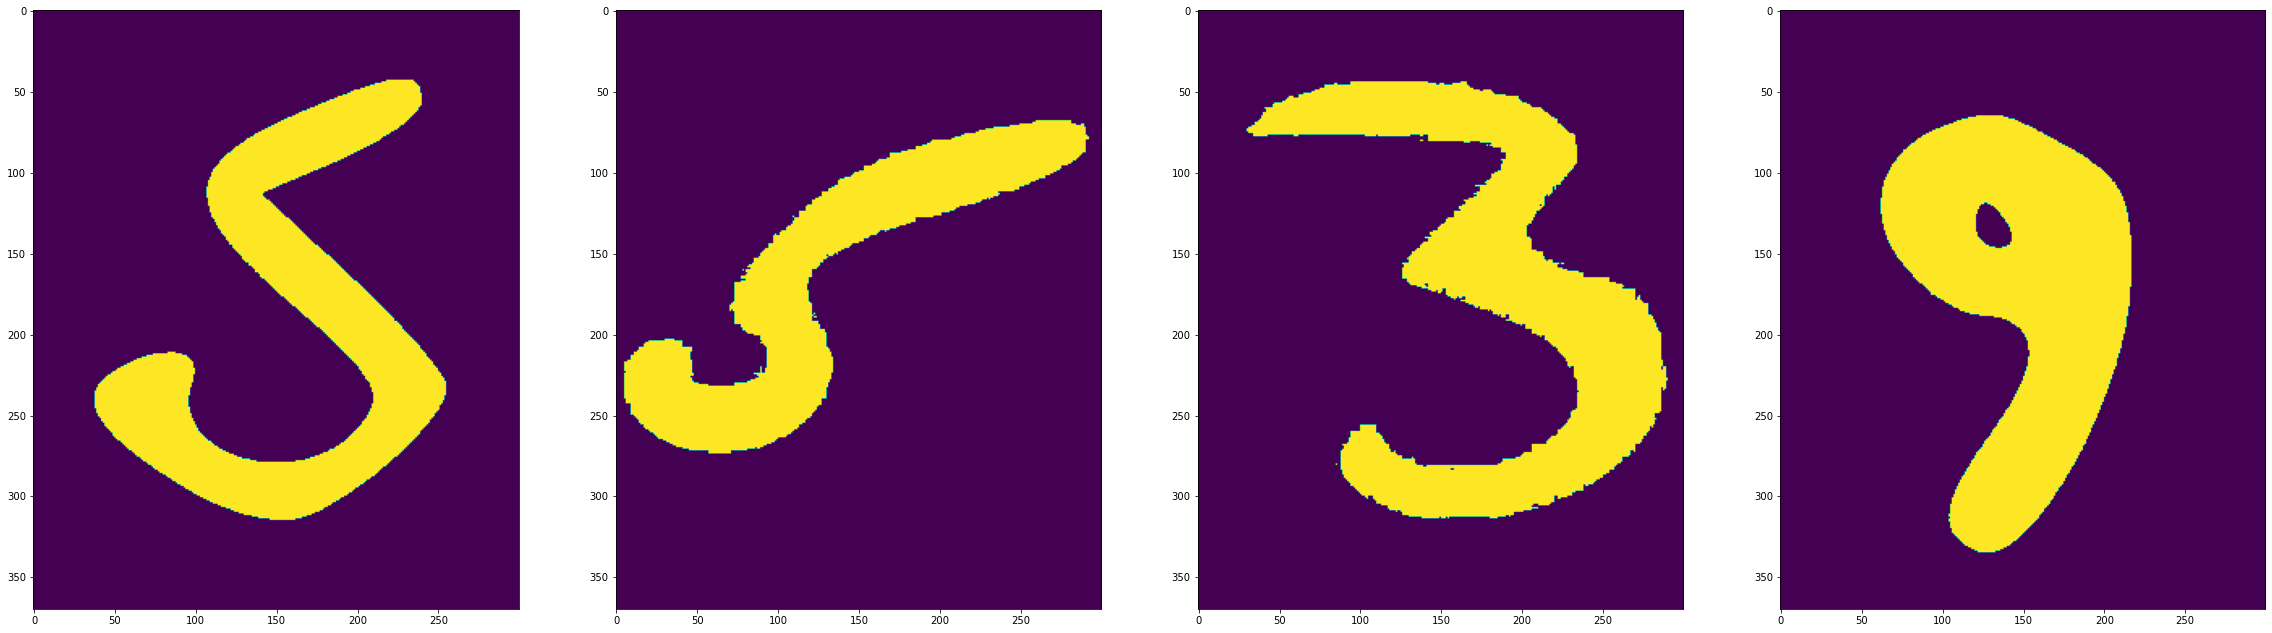

[4, 5, 2, 6]
game6 image4


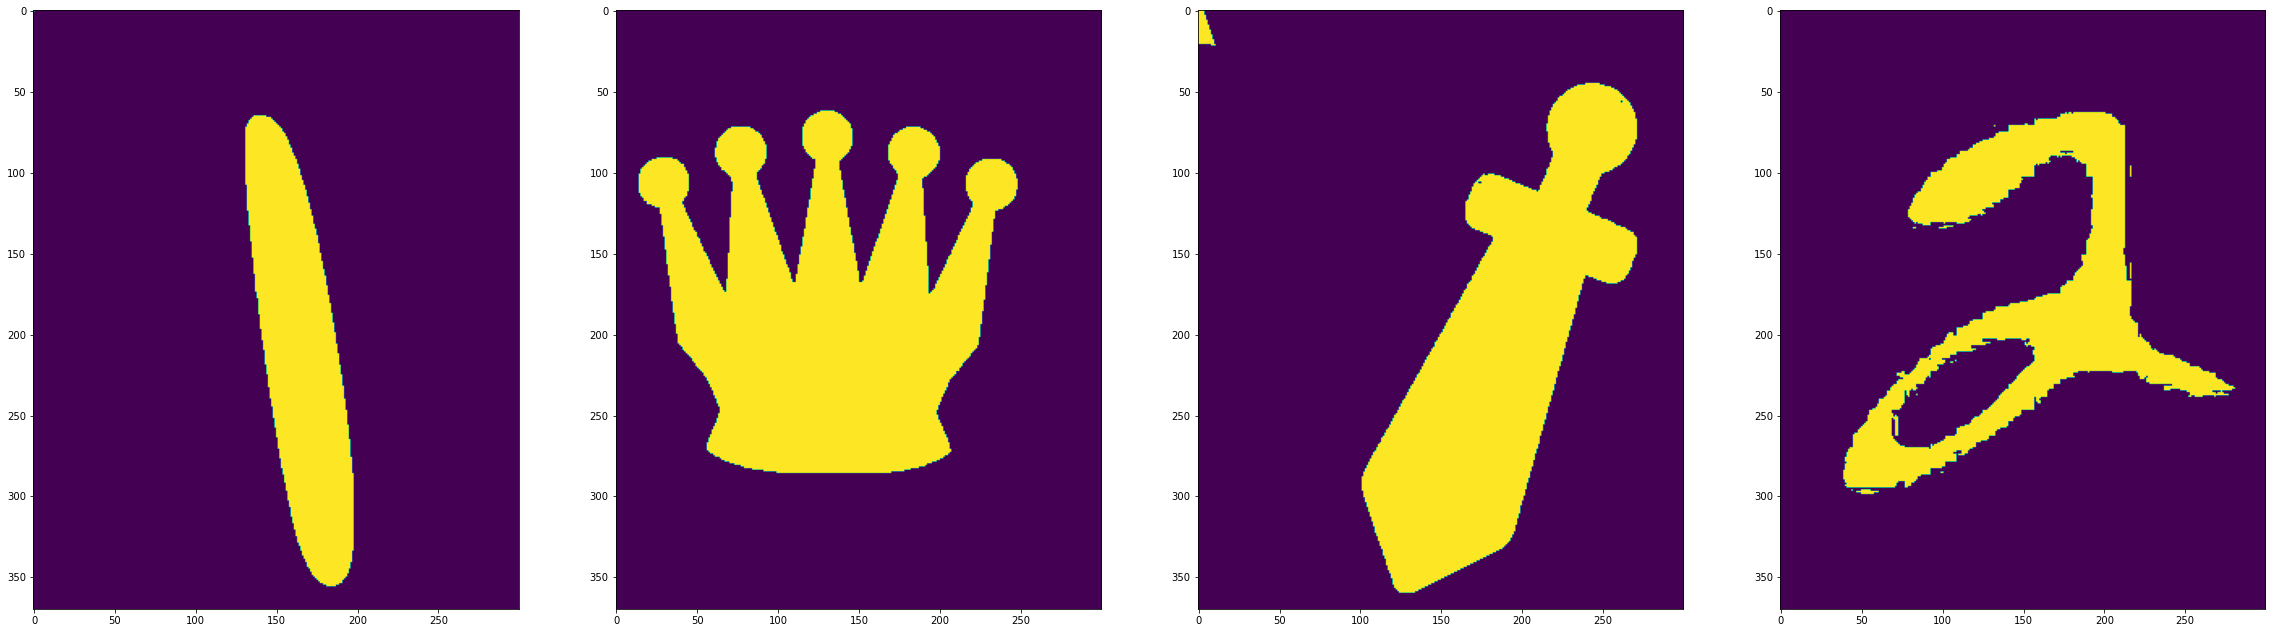

[4, 5, 2, 6]
game6 image5


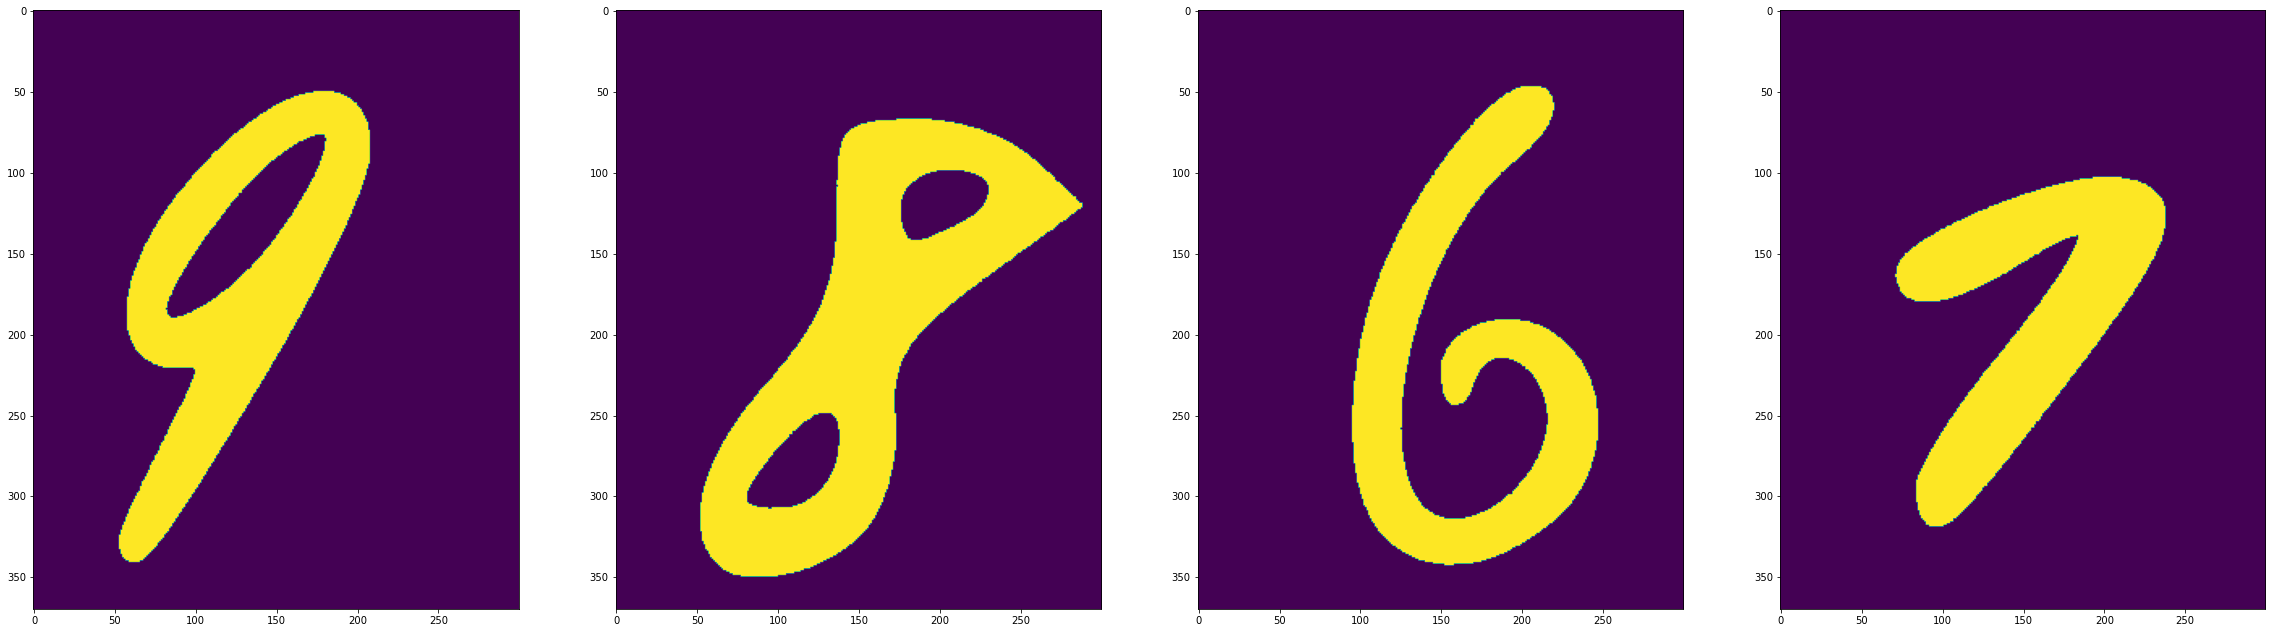

[4, 5, 2, 6]
game6 image6


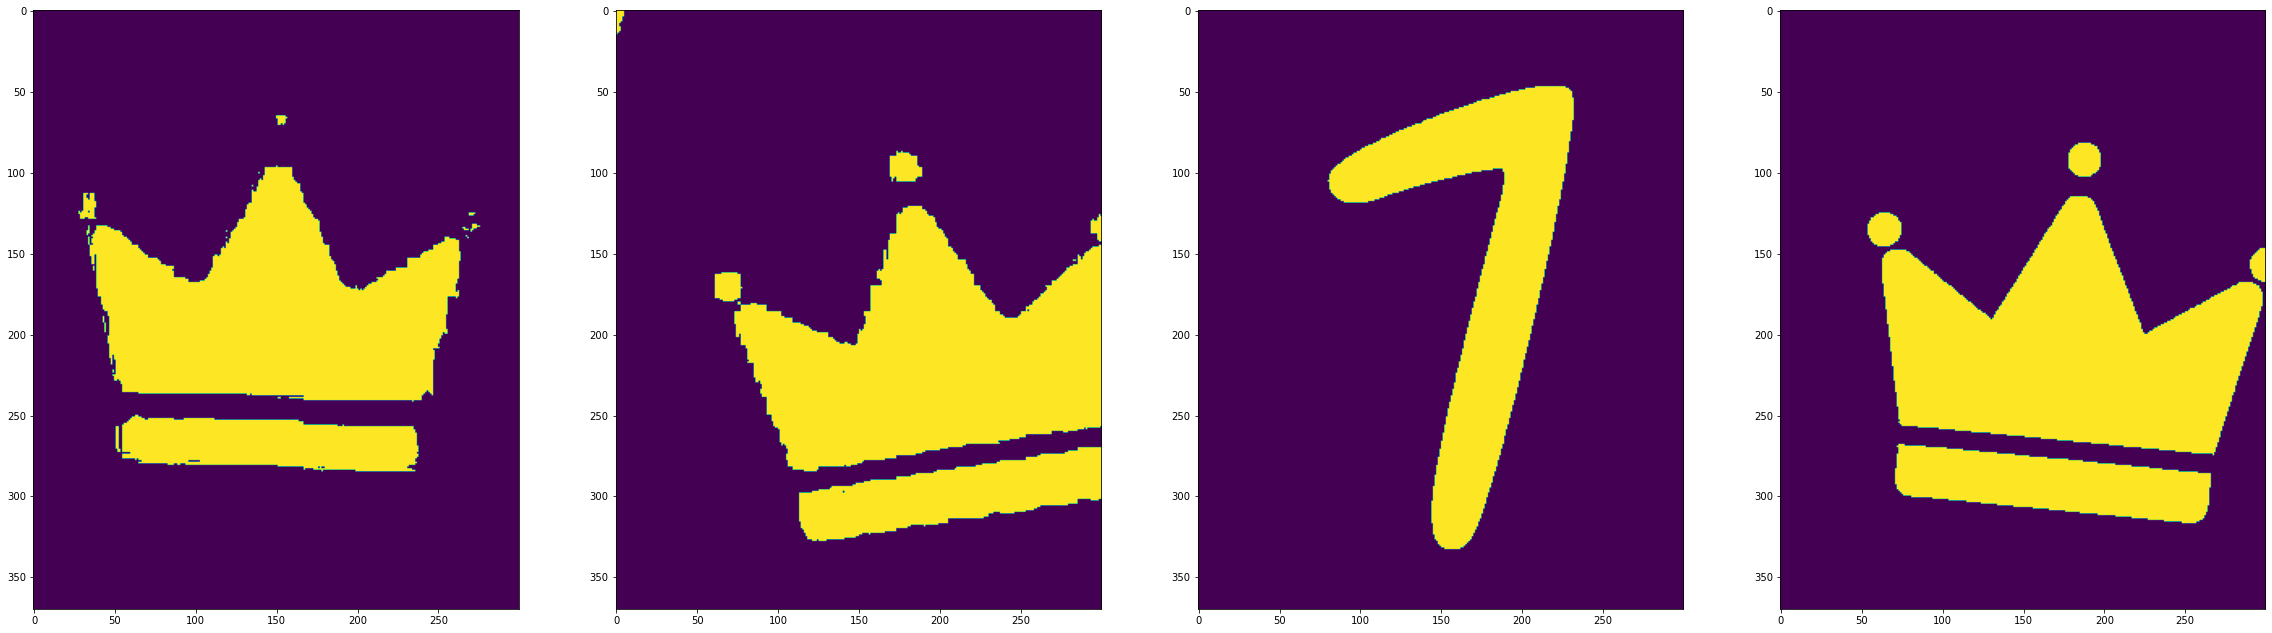

[4, 5, 2, 6]
game6 image7


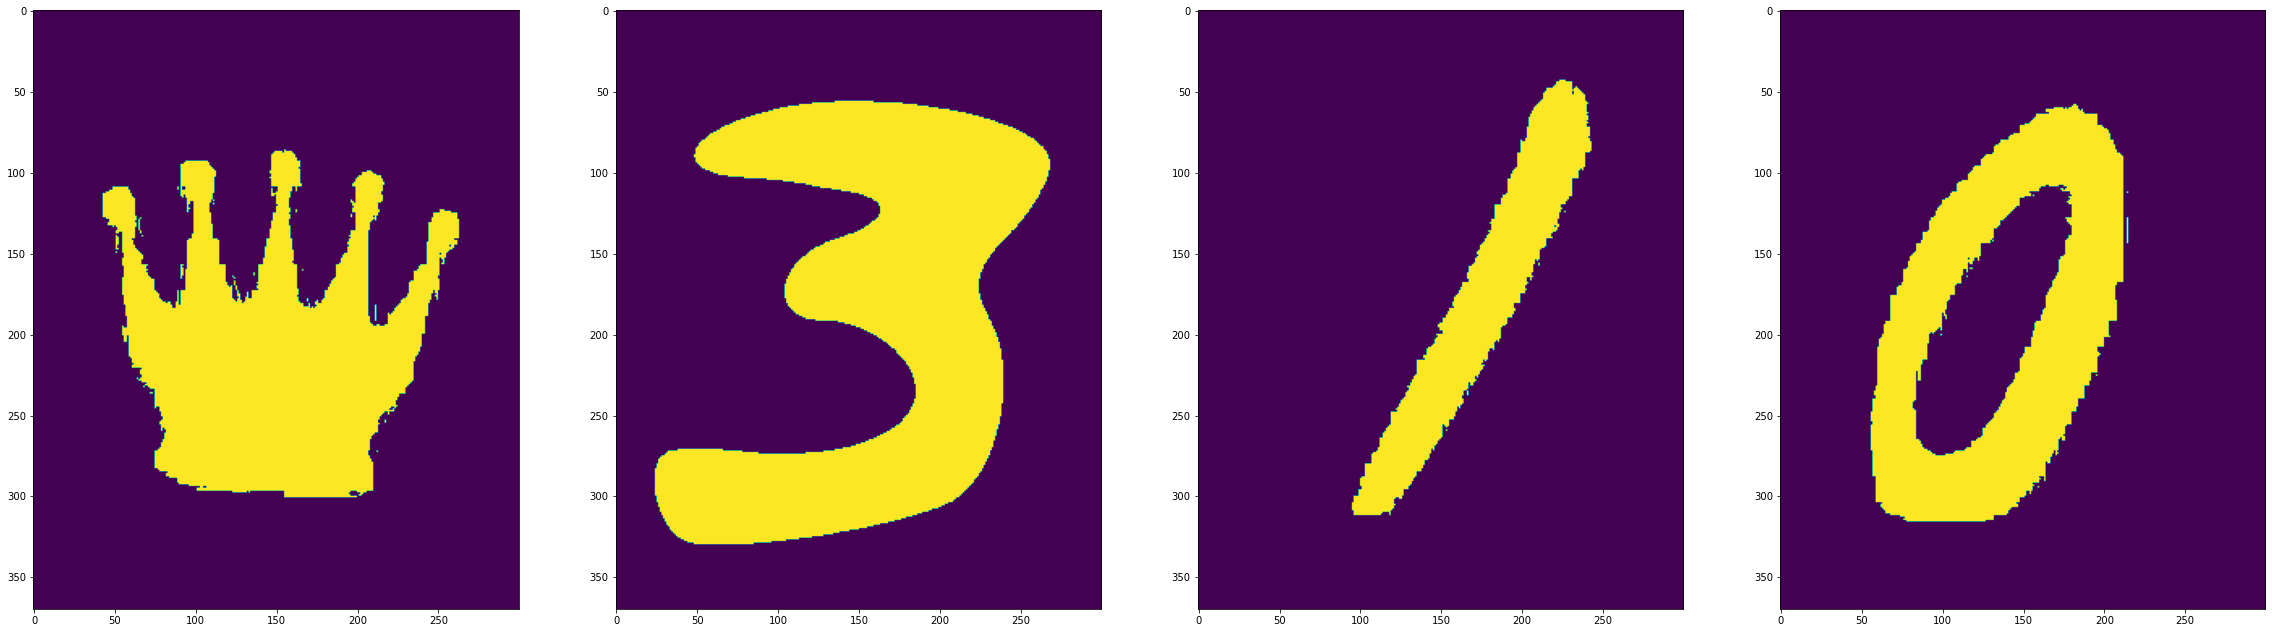

[4, 5, 2, 6]
game6 image8


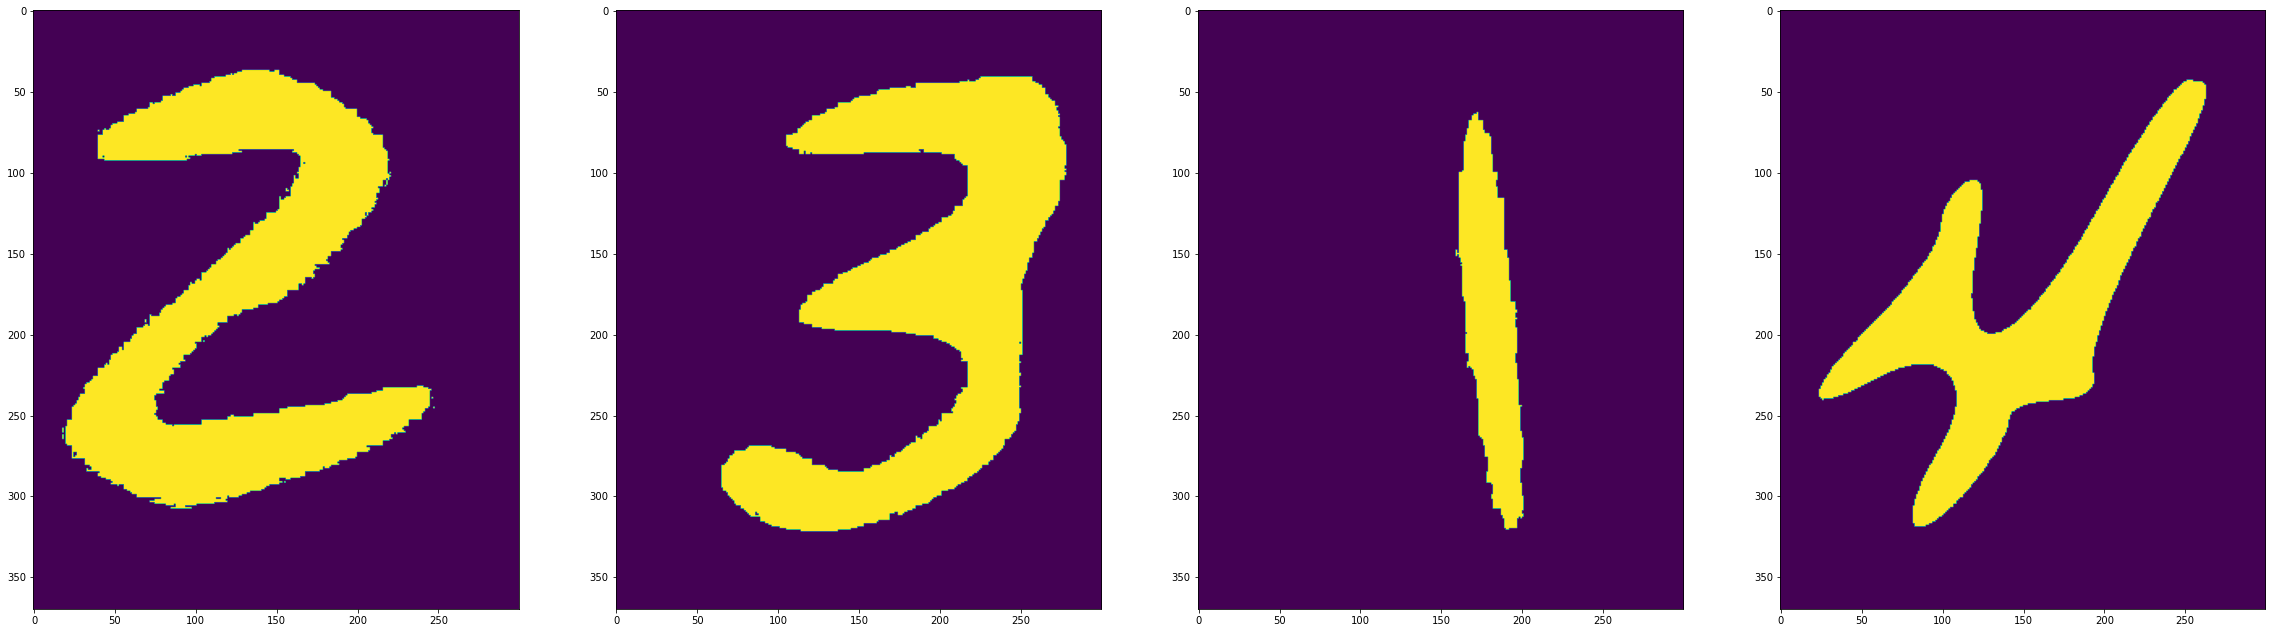

[4, 5, 2, 6]
game6 image9


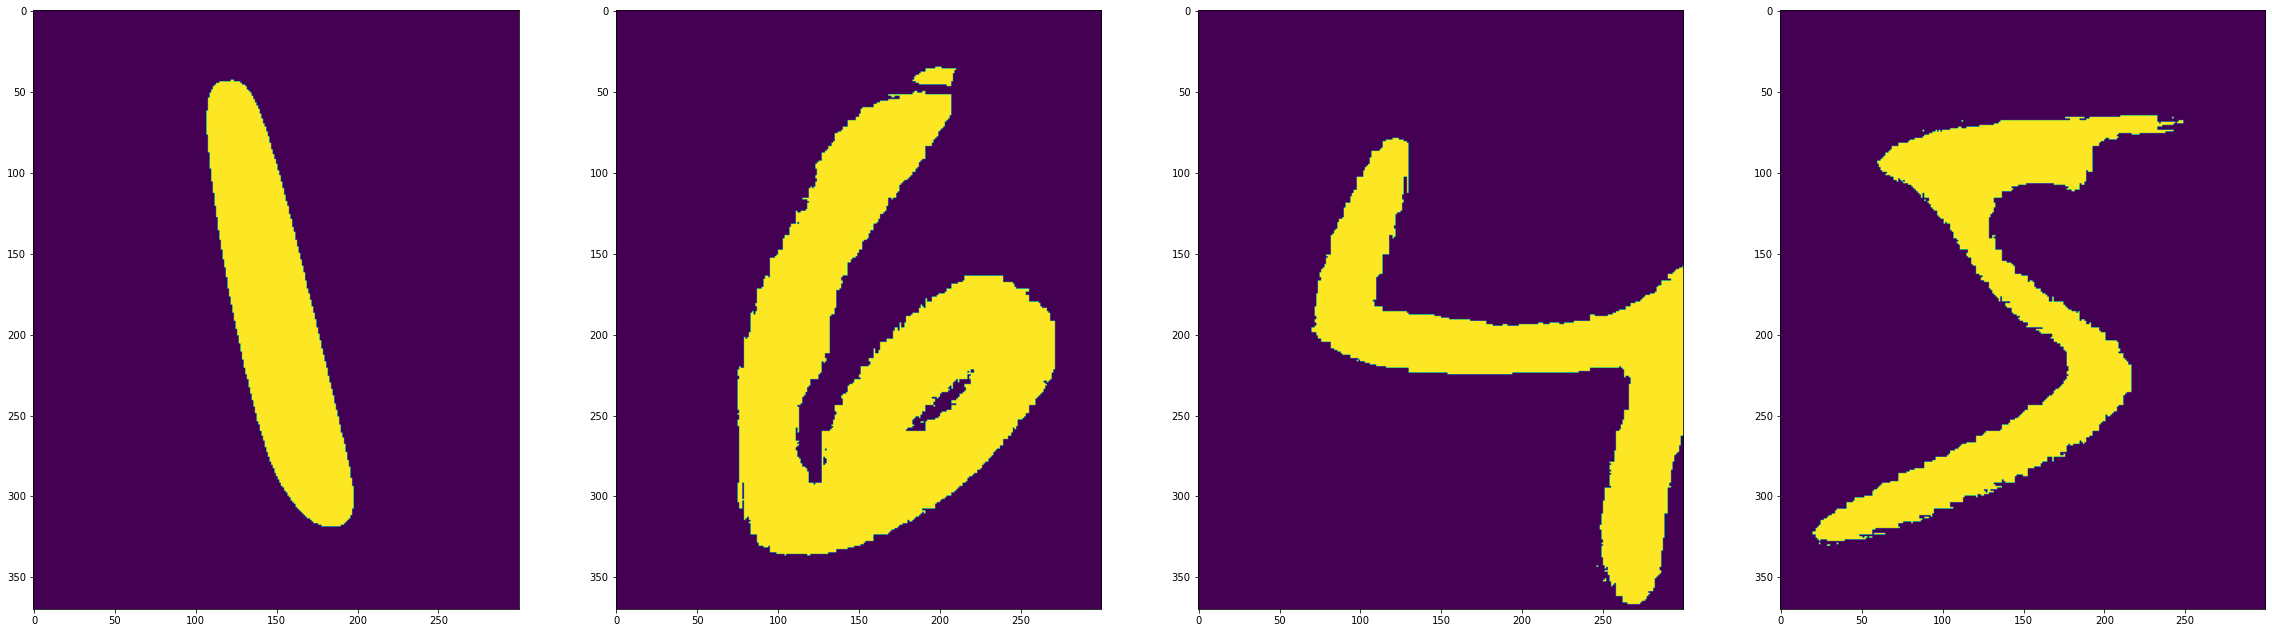

[4, 5, 2, 6]
game6 image10


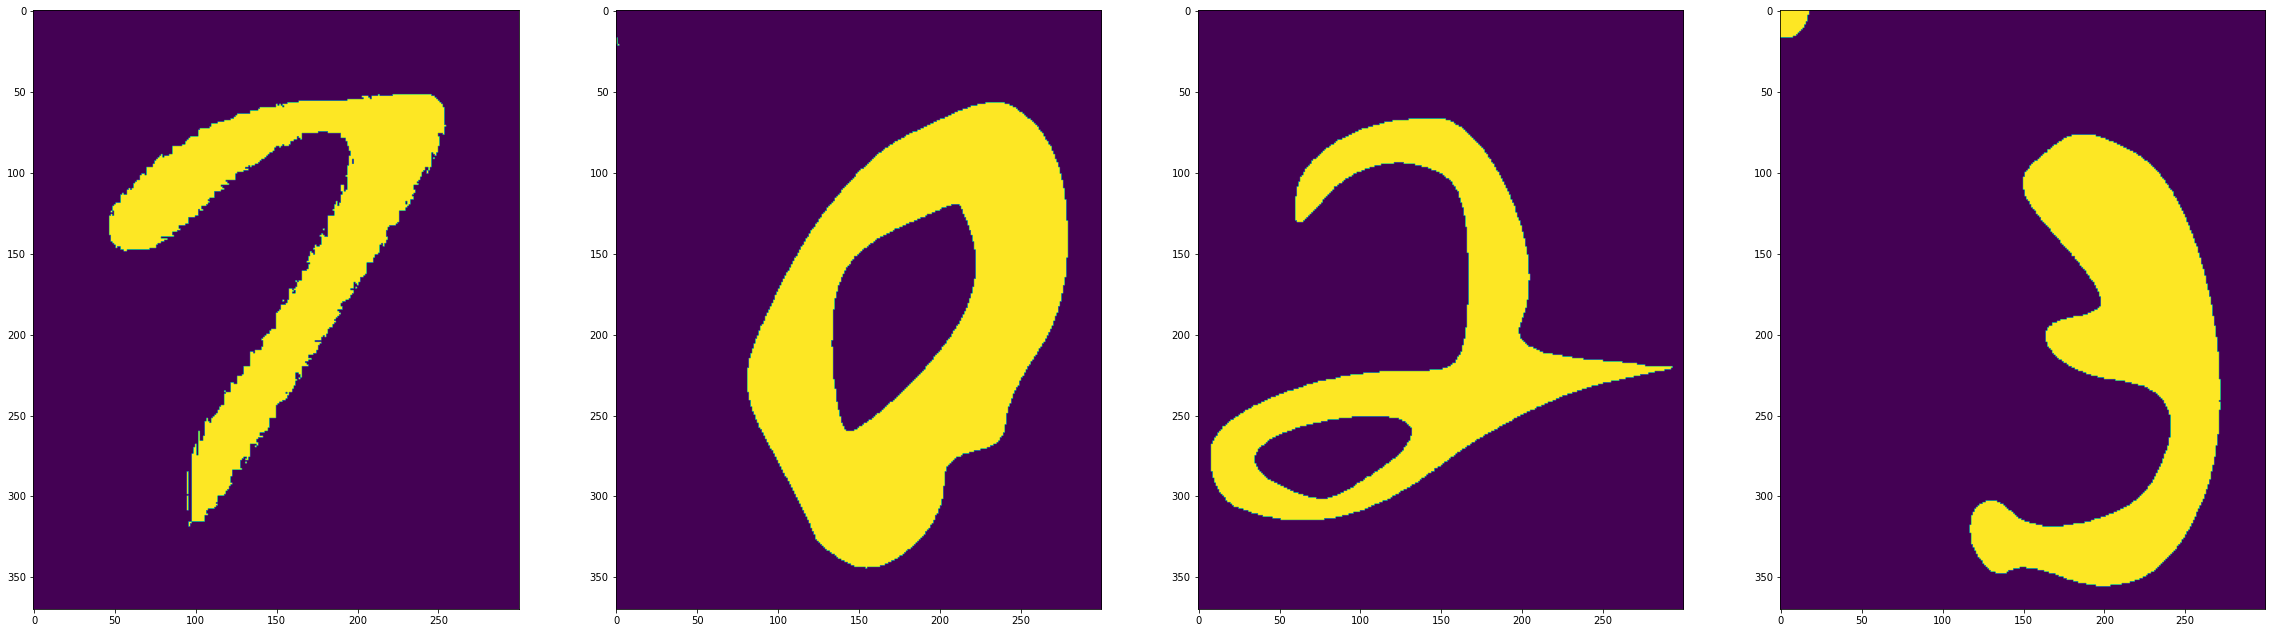

[4, 5, 2, 6]
game6 image11


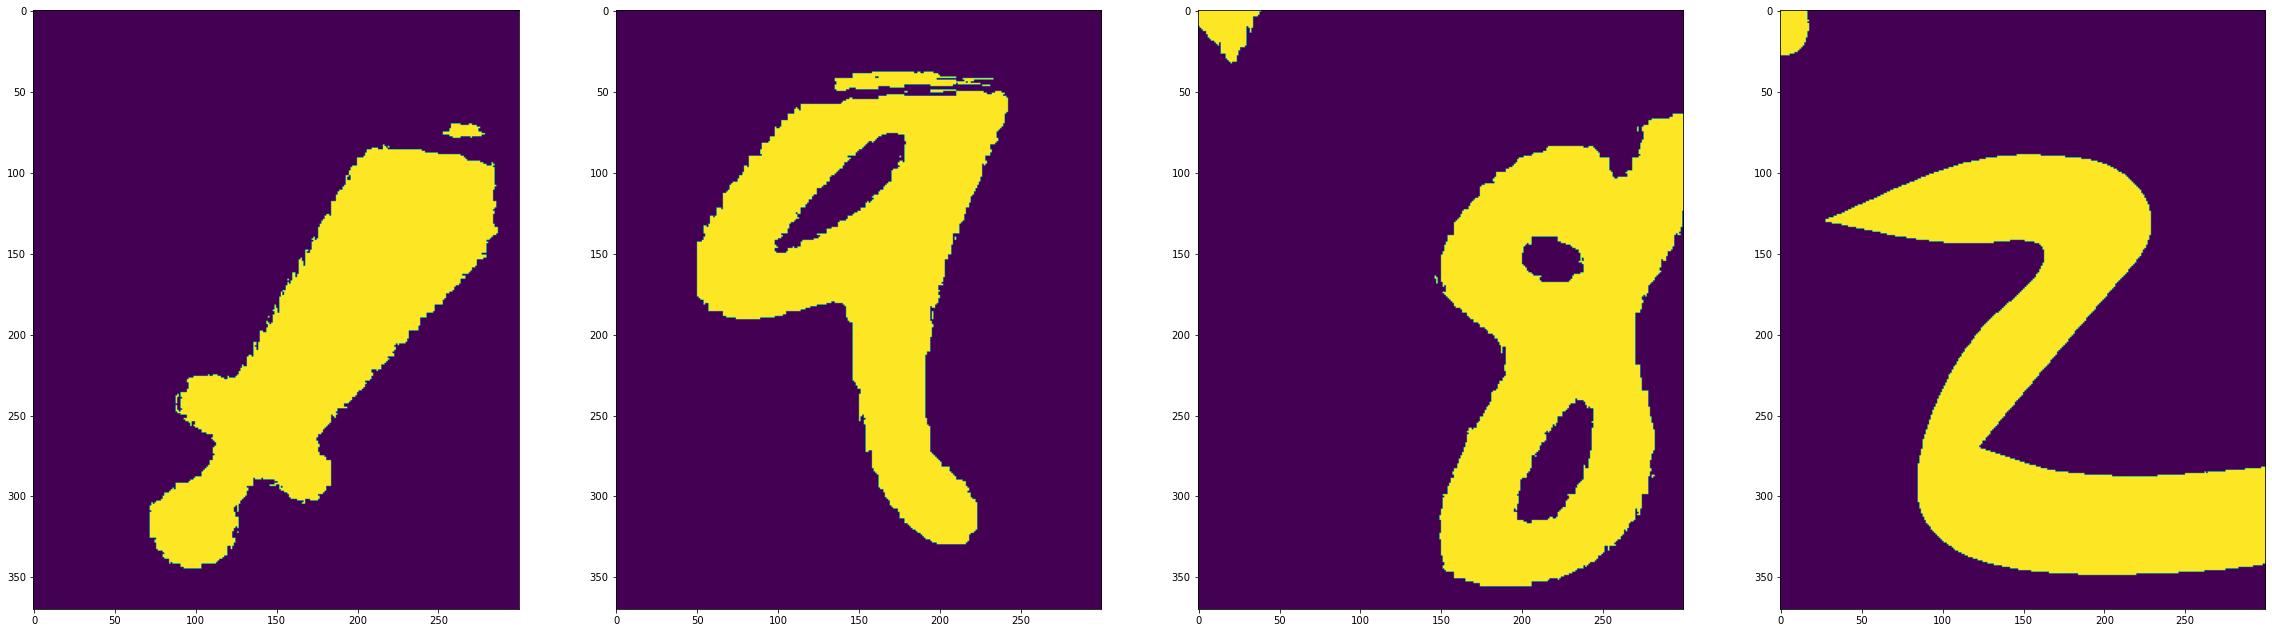

[4, 5, 2, 6]
game6 image12


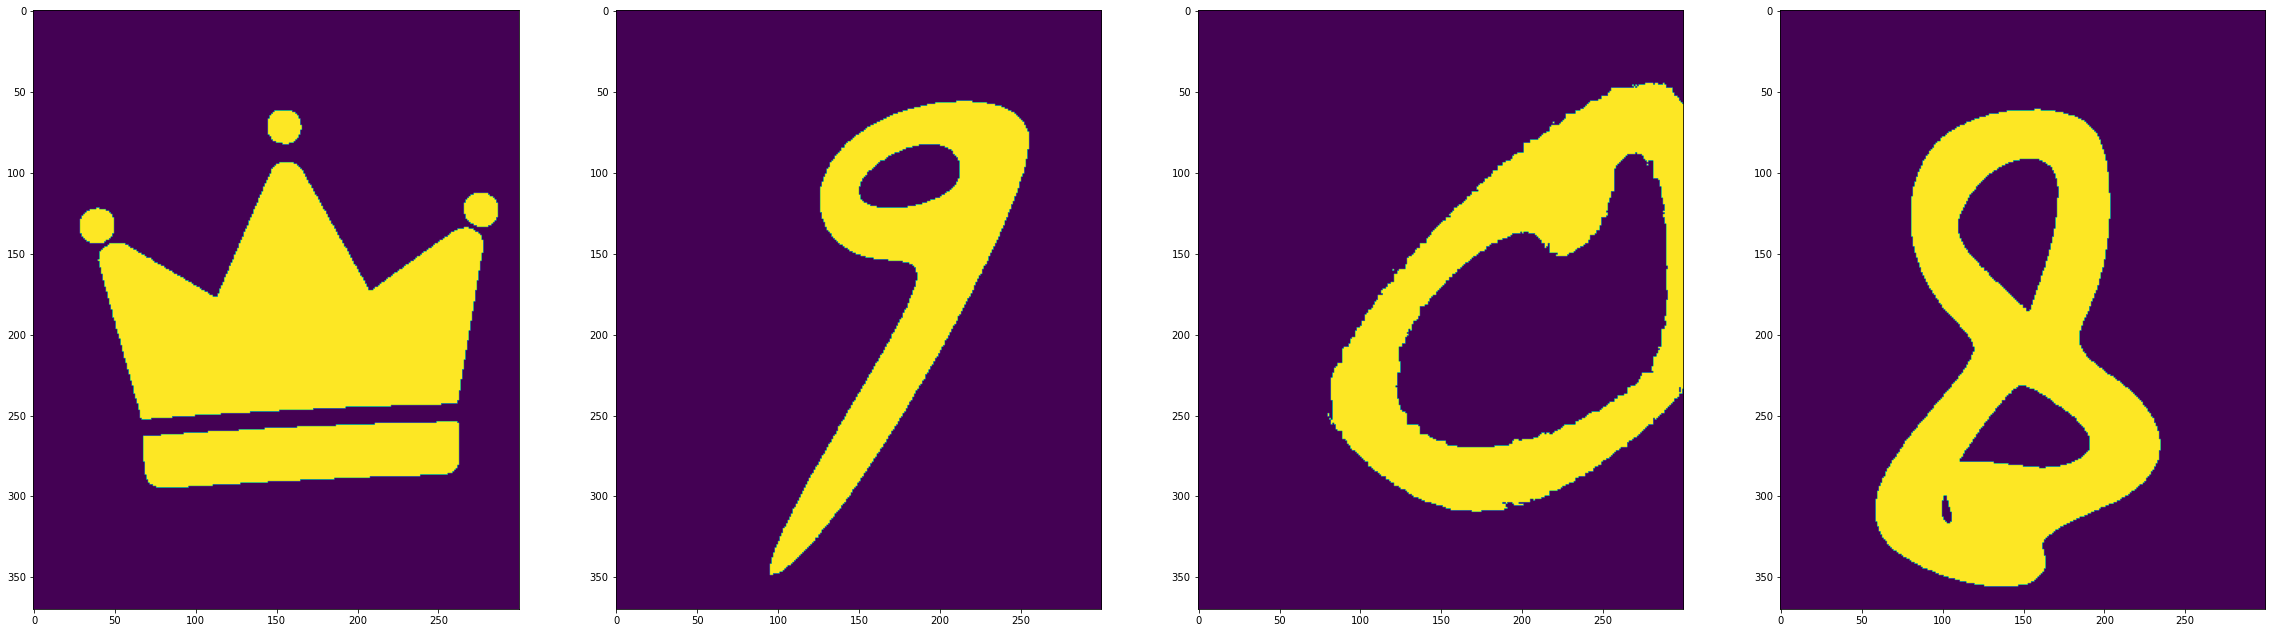

[4, 5, 2, 6]
game7
game7 image0


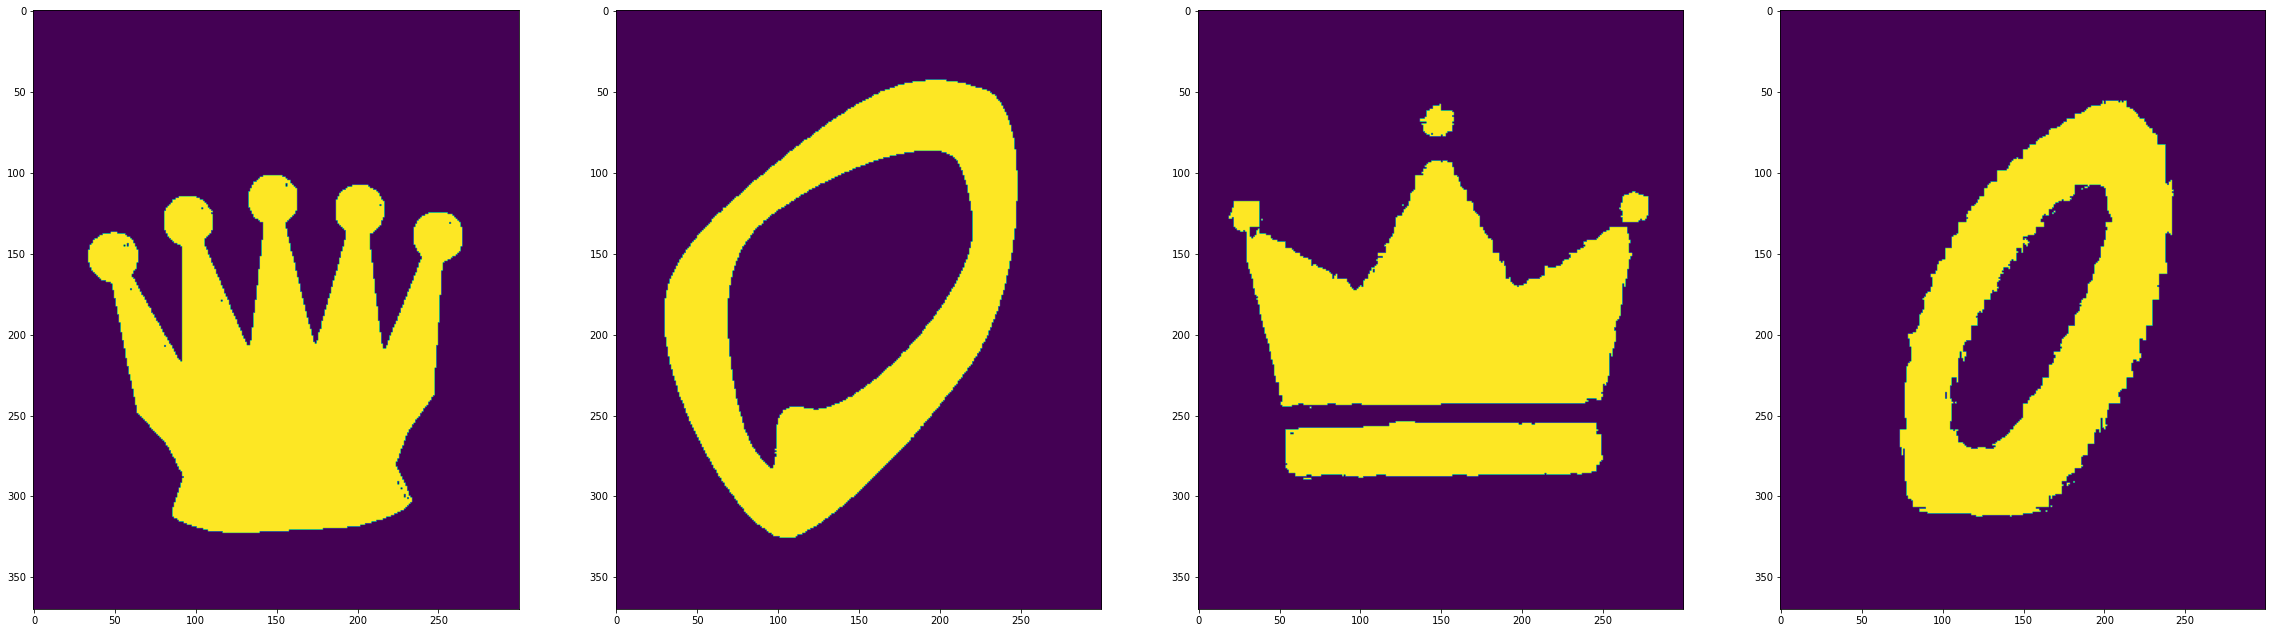

[4, 5, 2, 6]
game7 image1


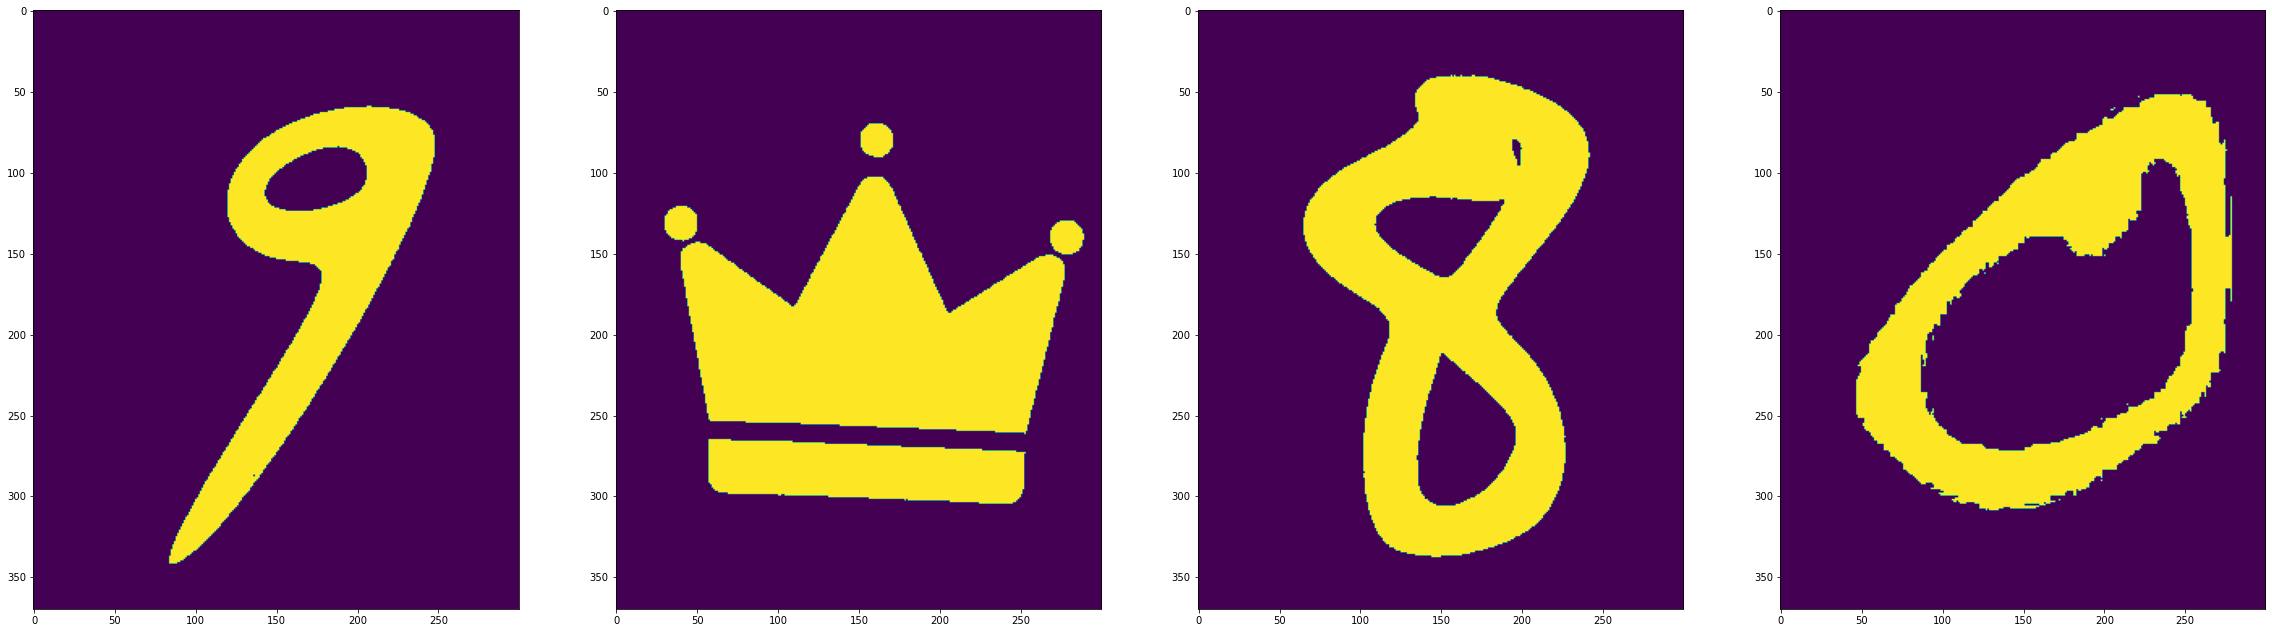

[4, 5, 2, 6]
game7 image2


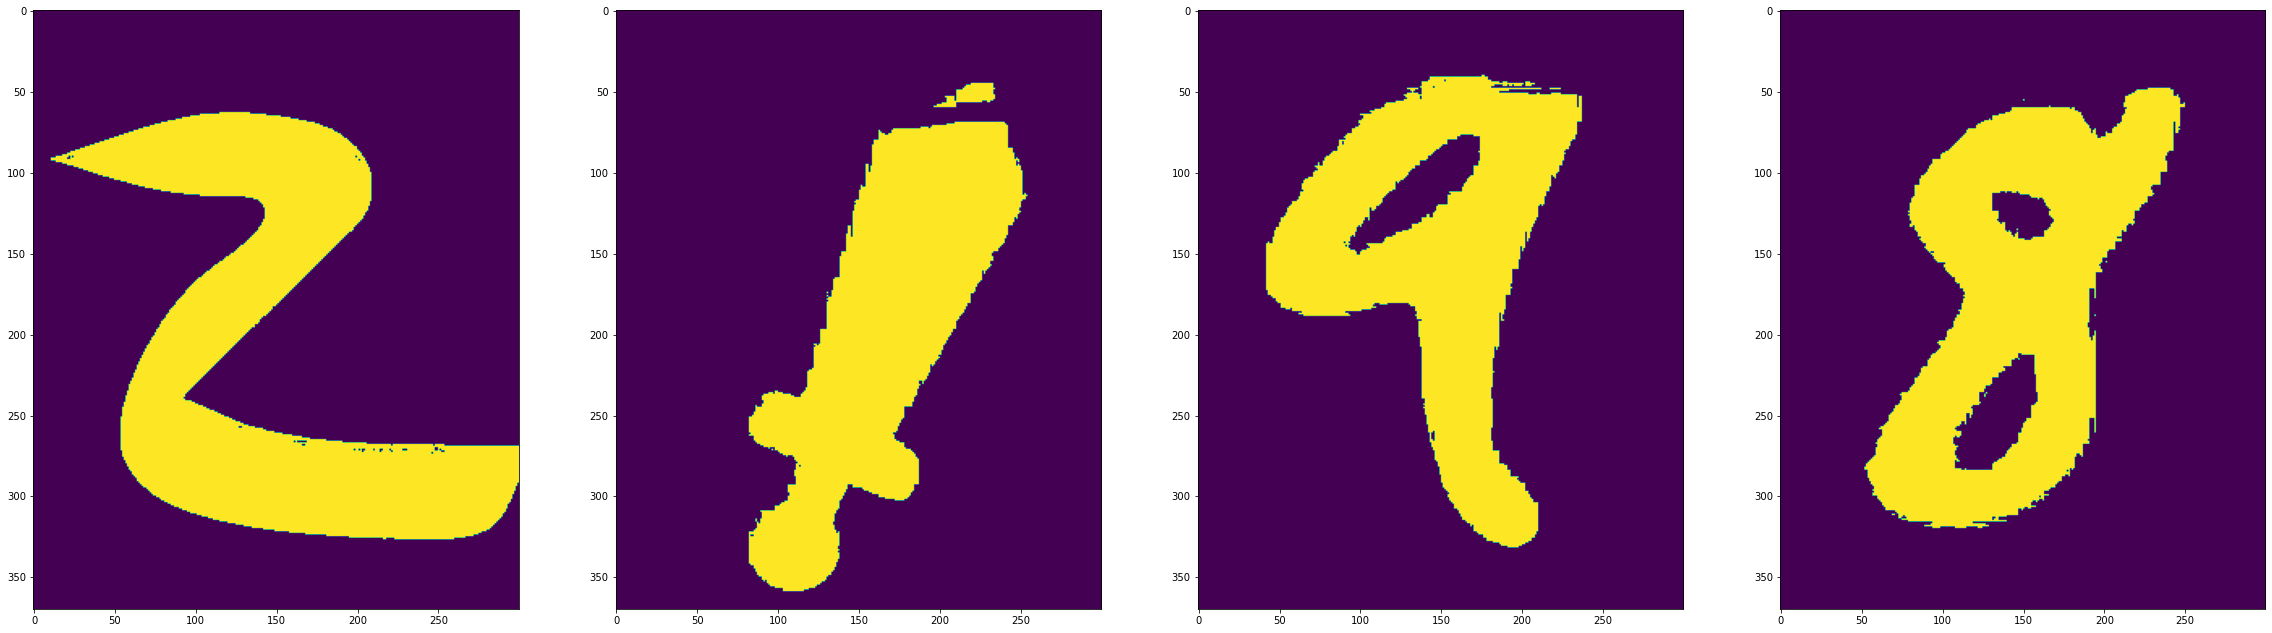

[4, 5, 2, 6]
game7 image3


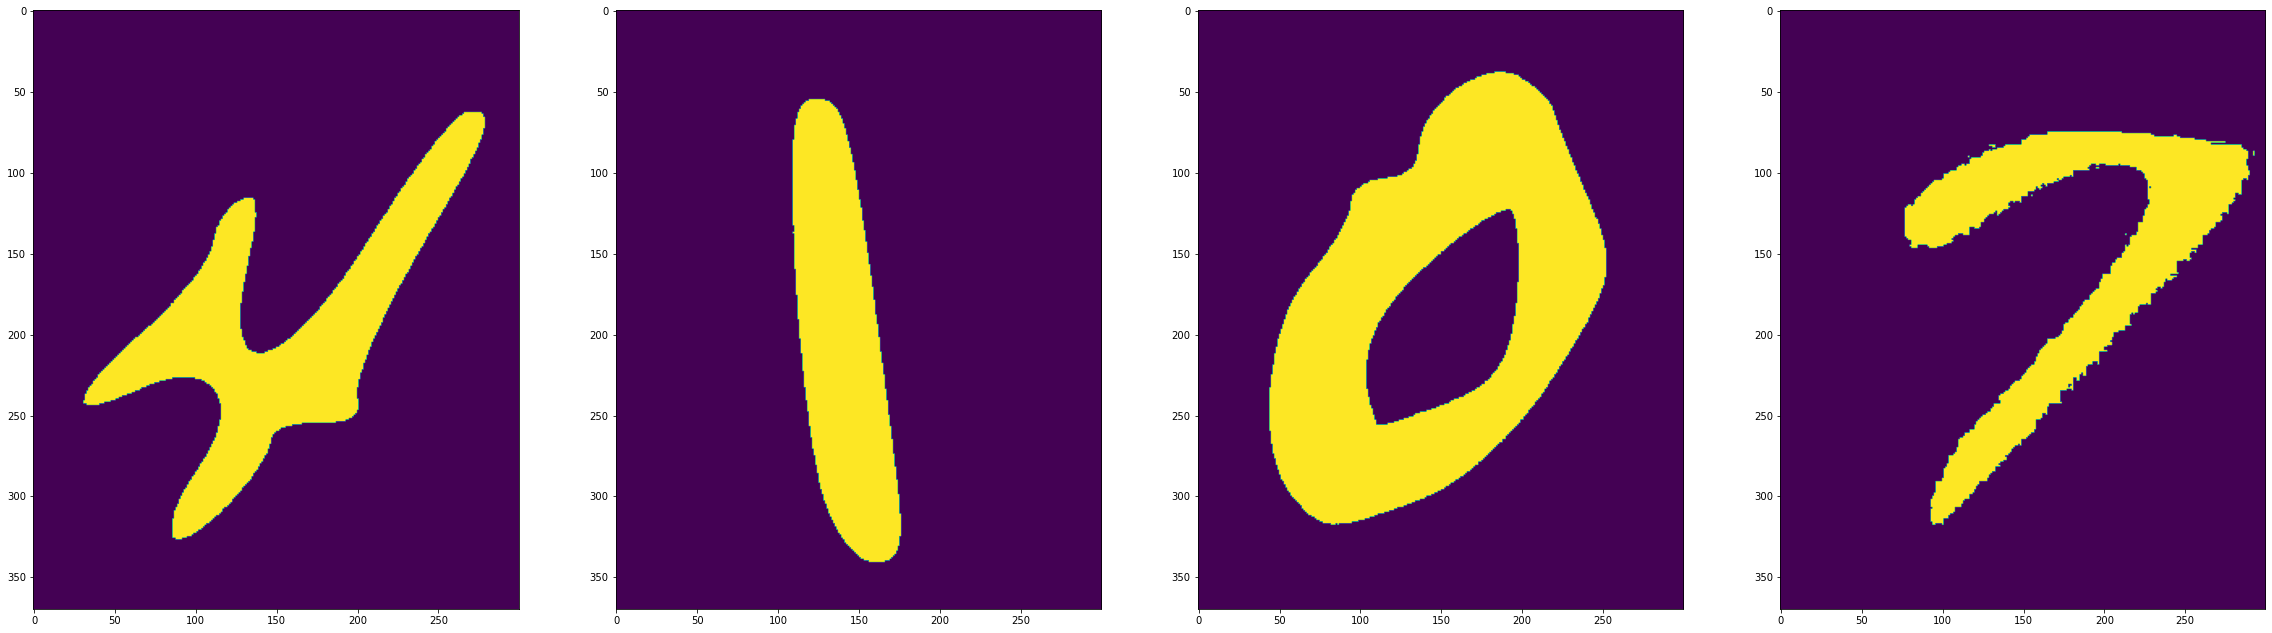

[4, 5, 2, 6]
game7 image4


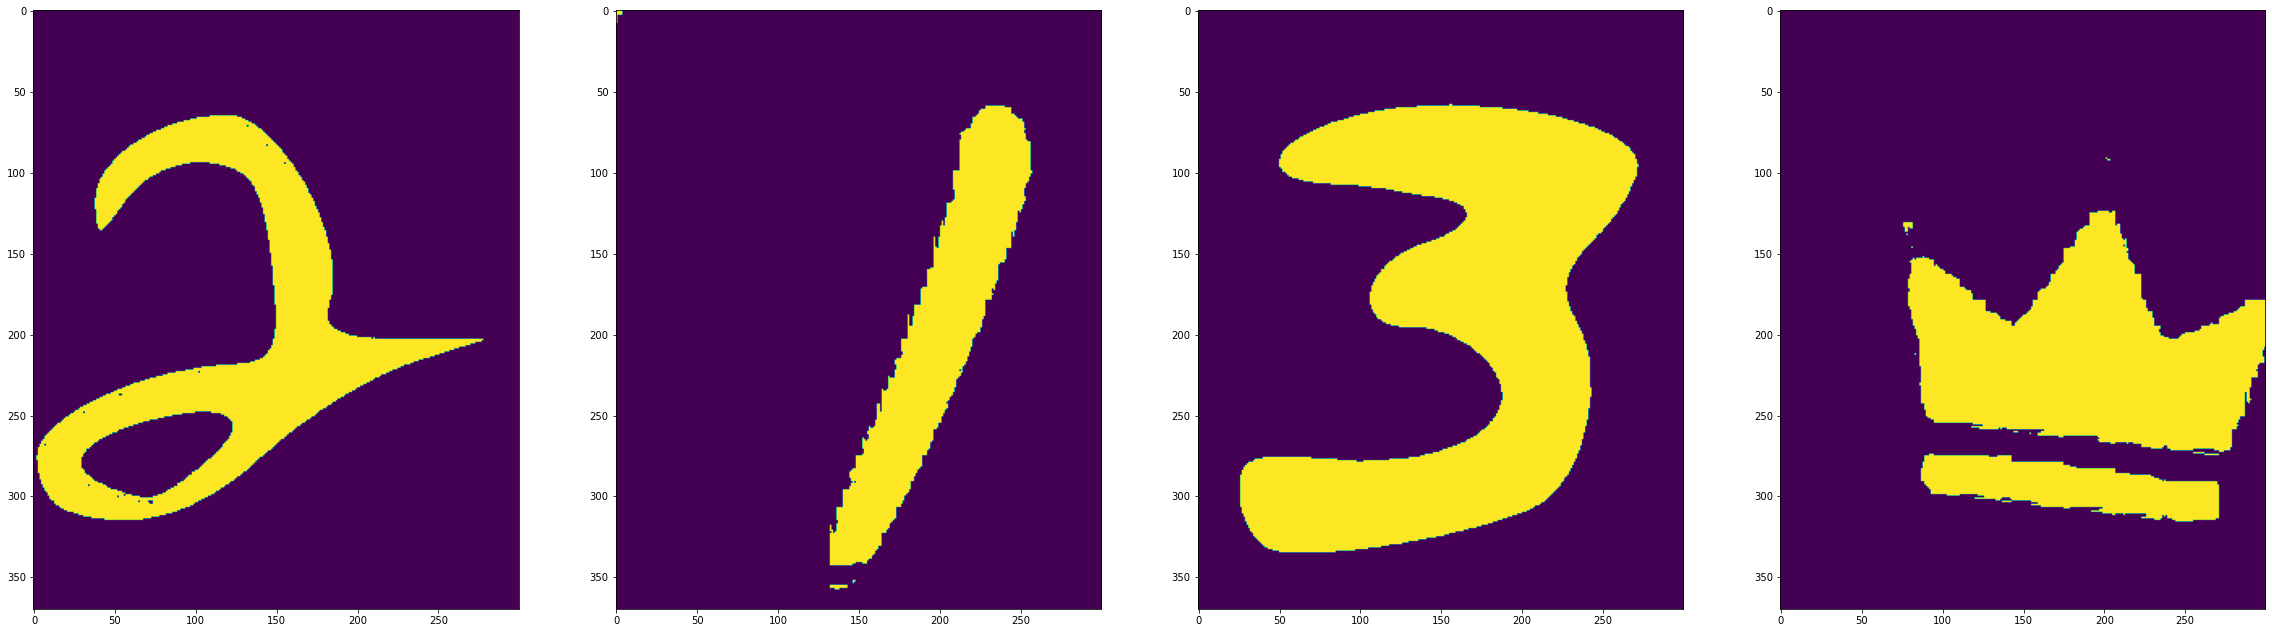

[4, 5, 2, 6]
game7 image5


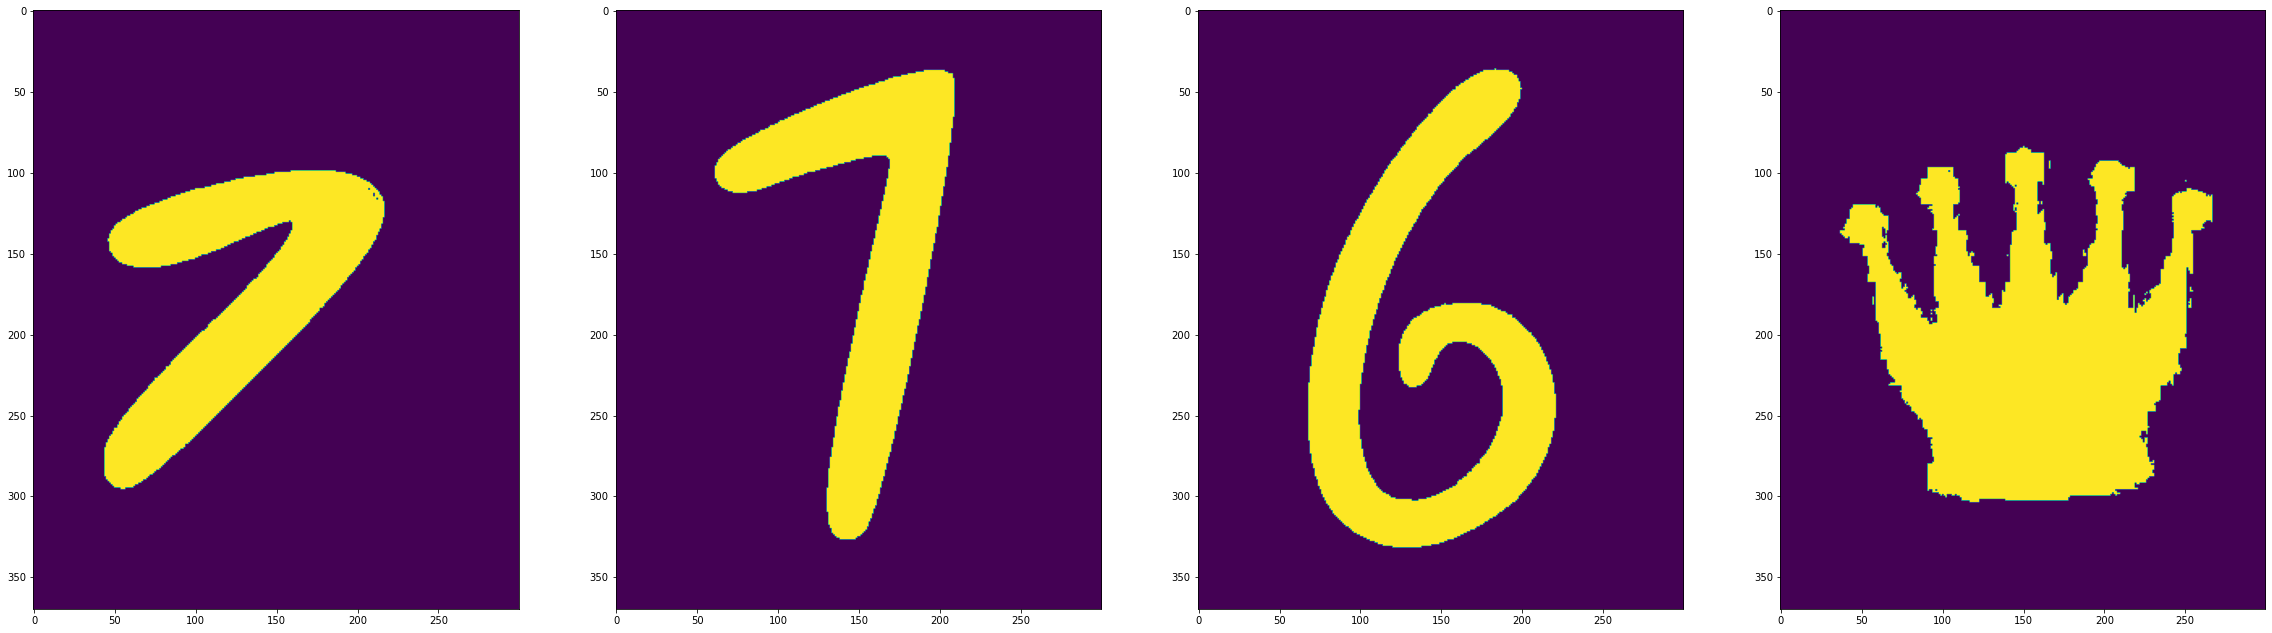

[4, 5, 2, 6]
game7 image6


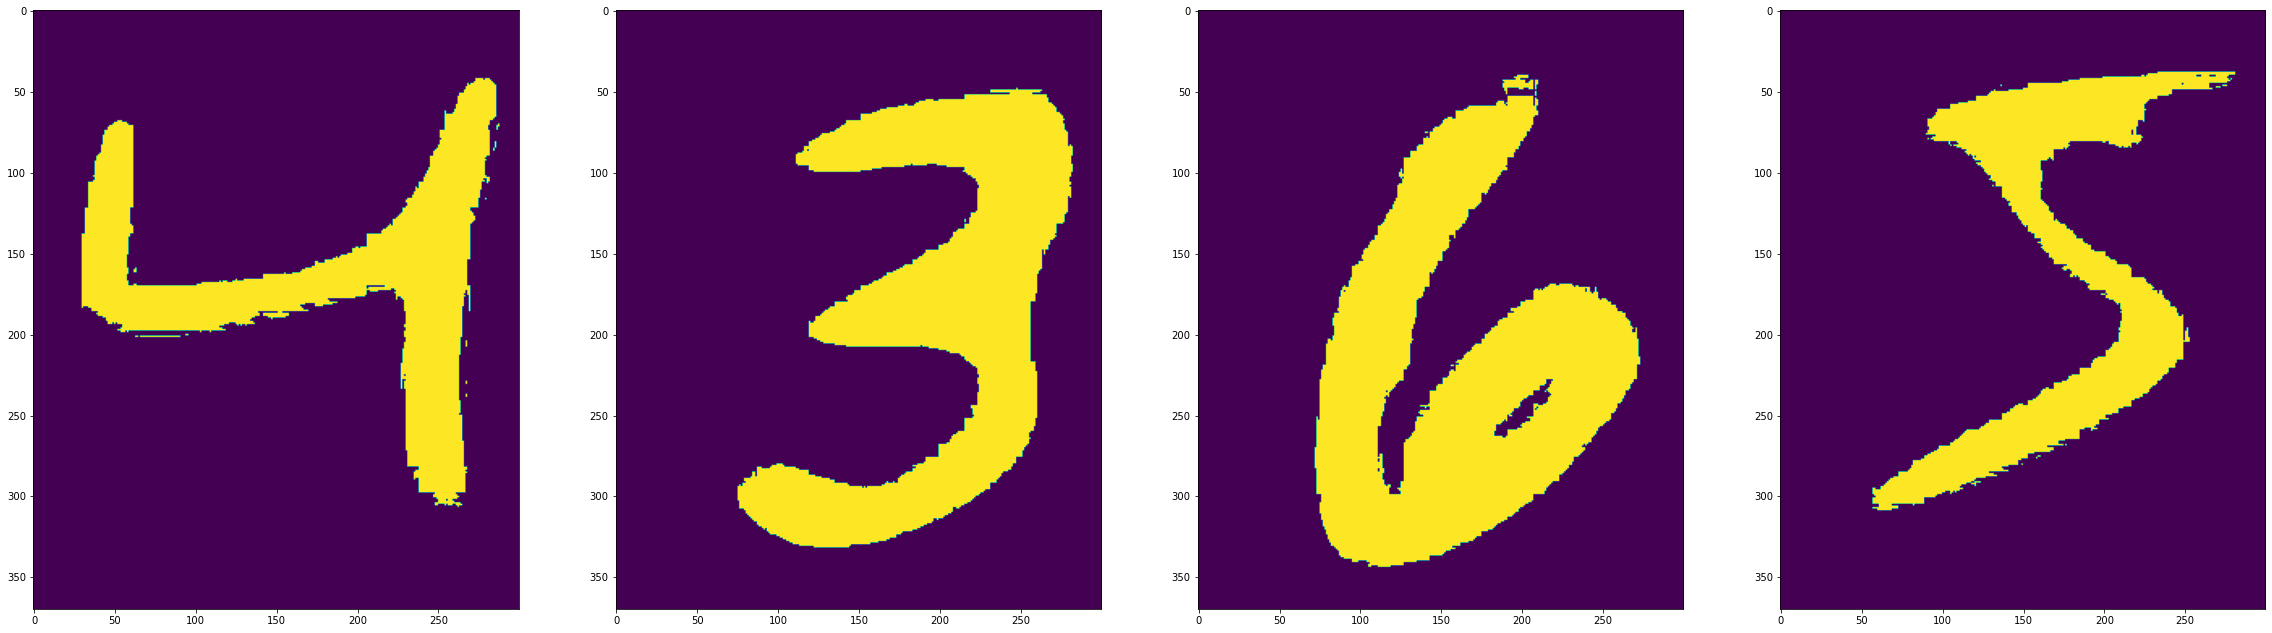

[4, 5, 2, 6]
game7 image7


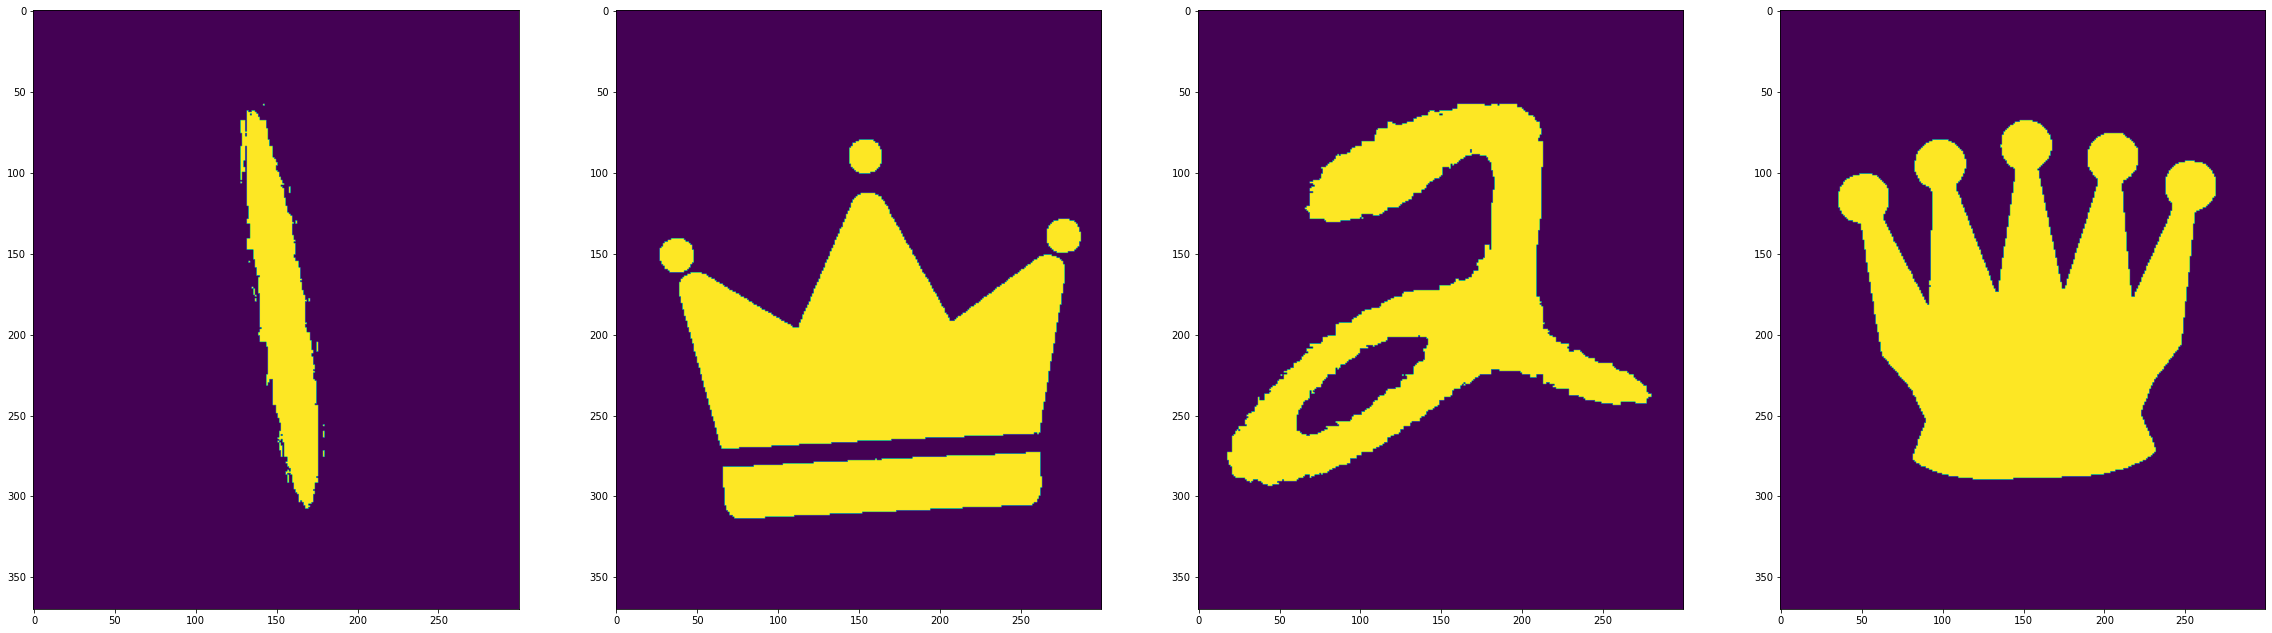

[4, 5, 2, 6]
game7 image8


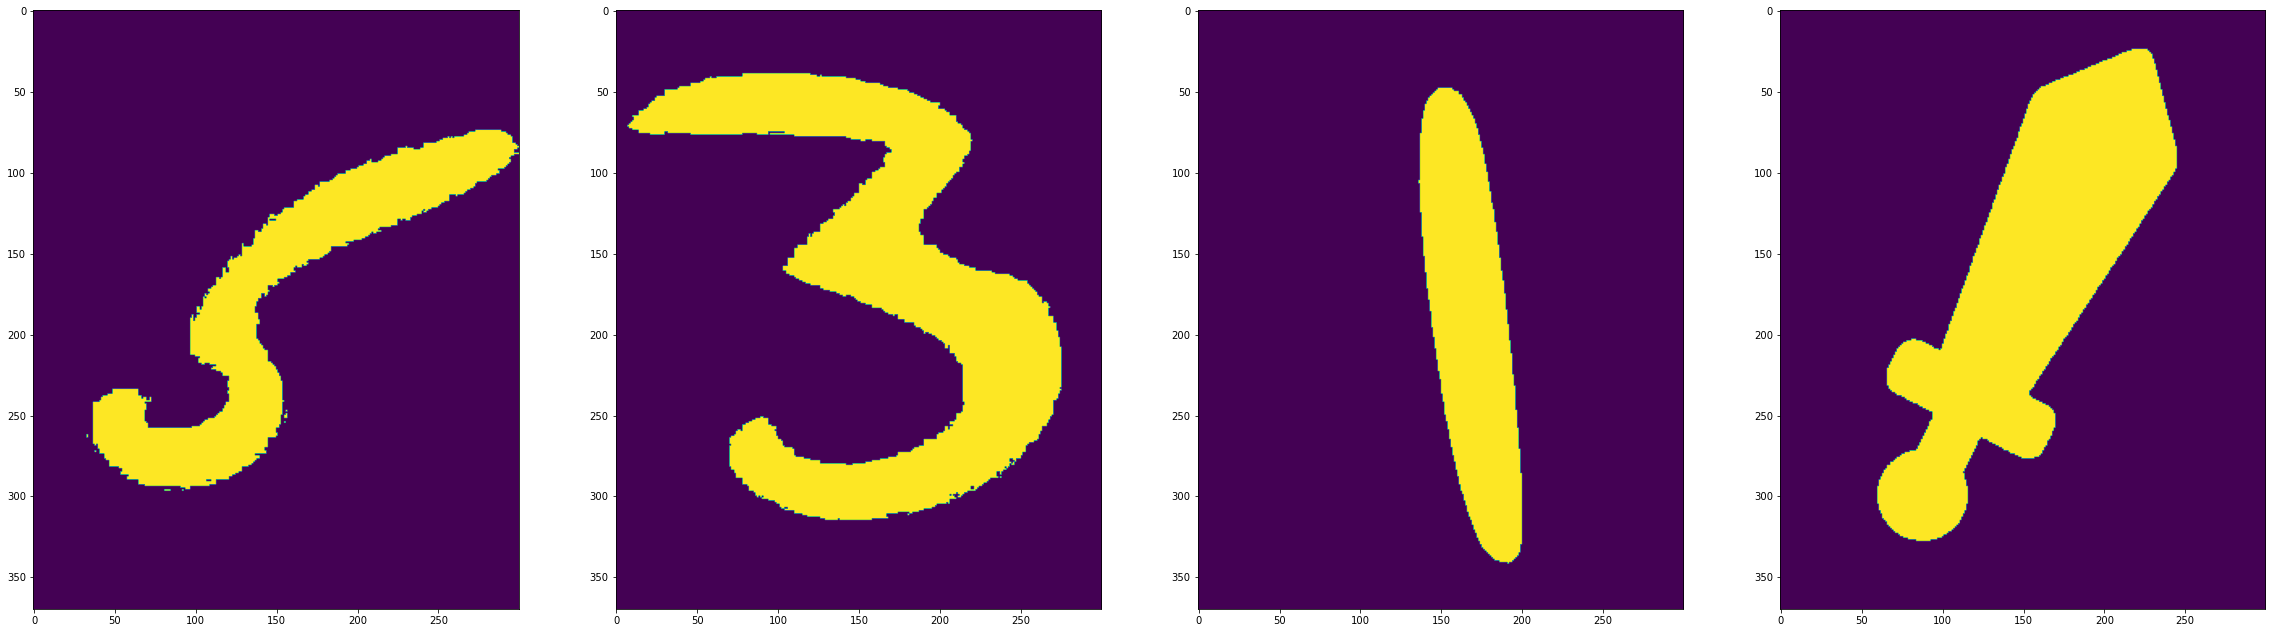

[4, 5, 2, 6]
game7 image9


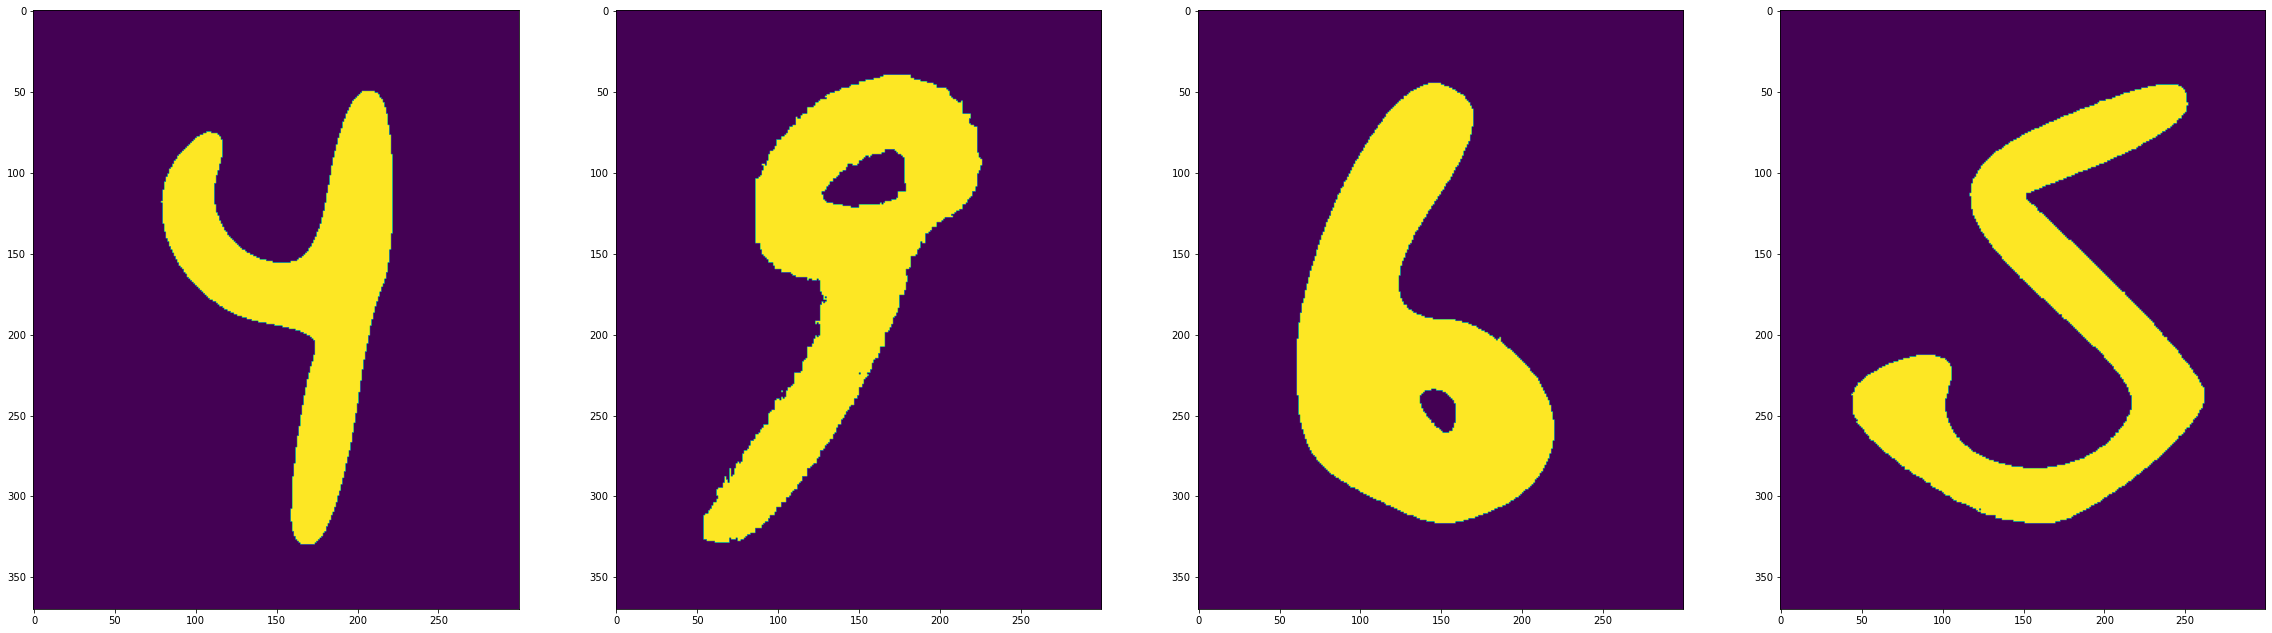

[4, 5, 2, 6]
game7 image10


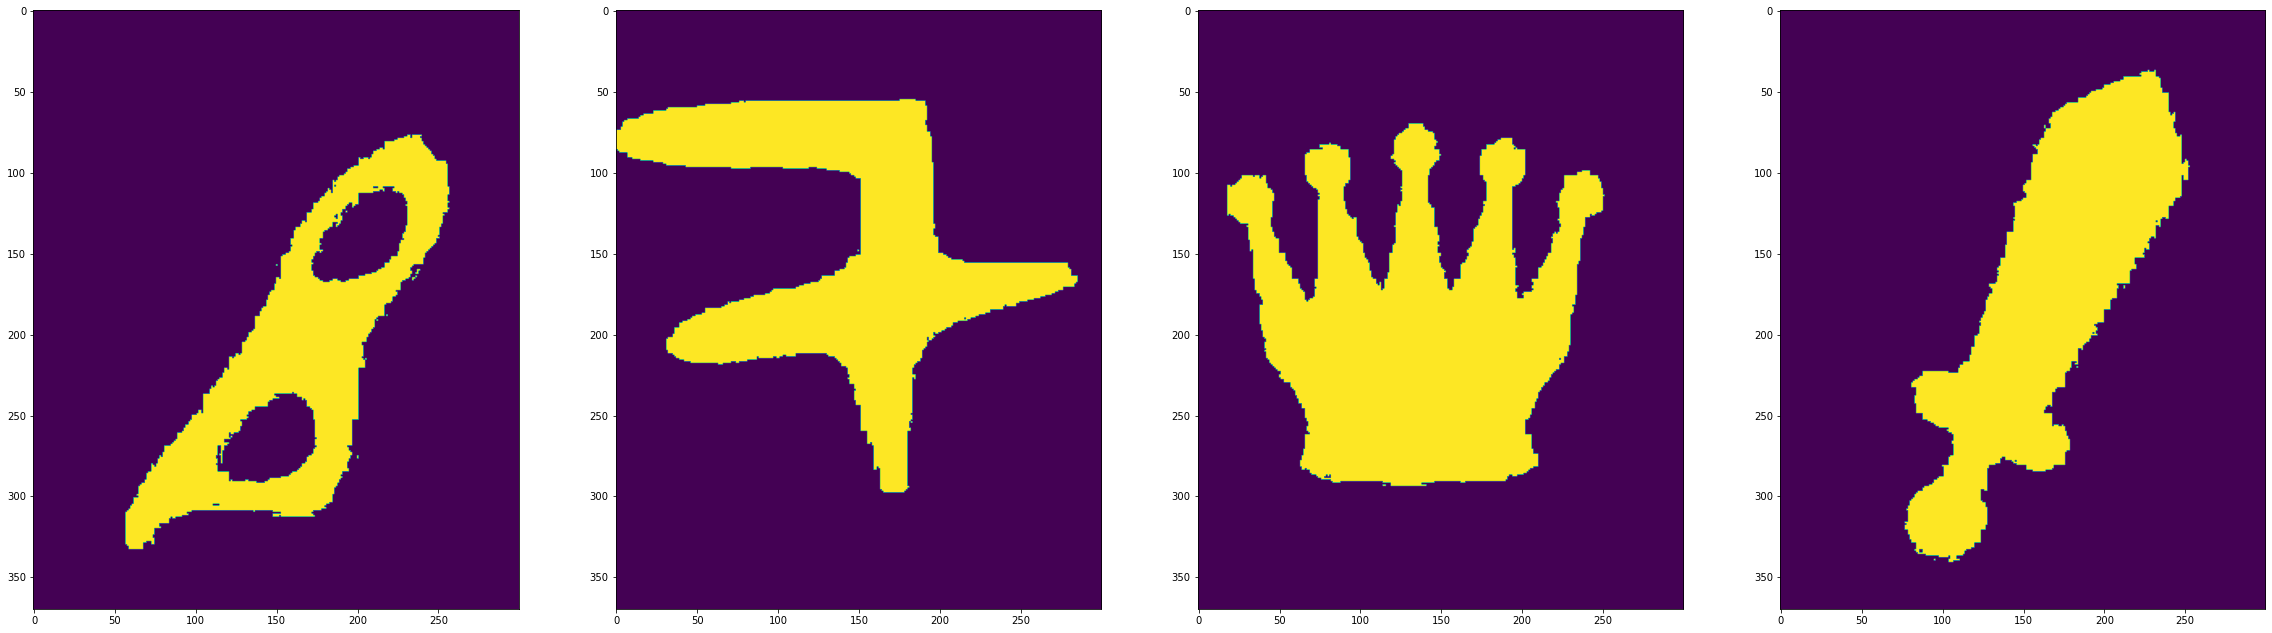

[4, 5, 2, 6]
game7 image11


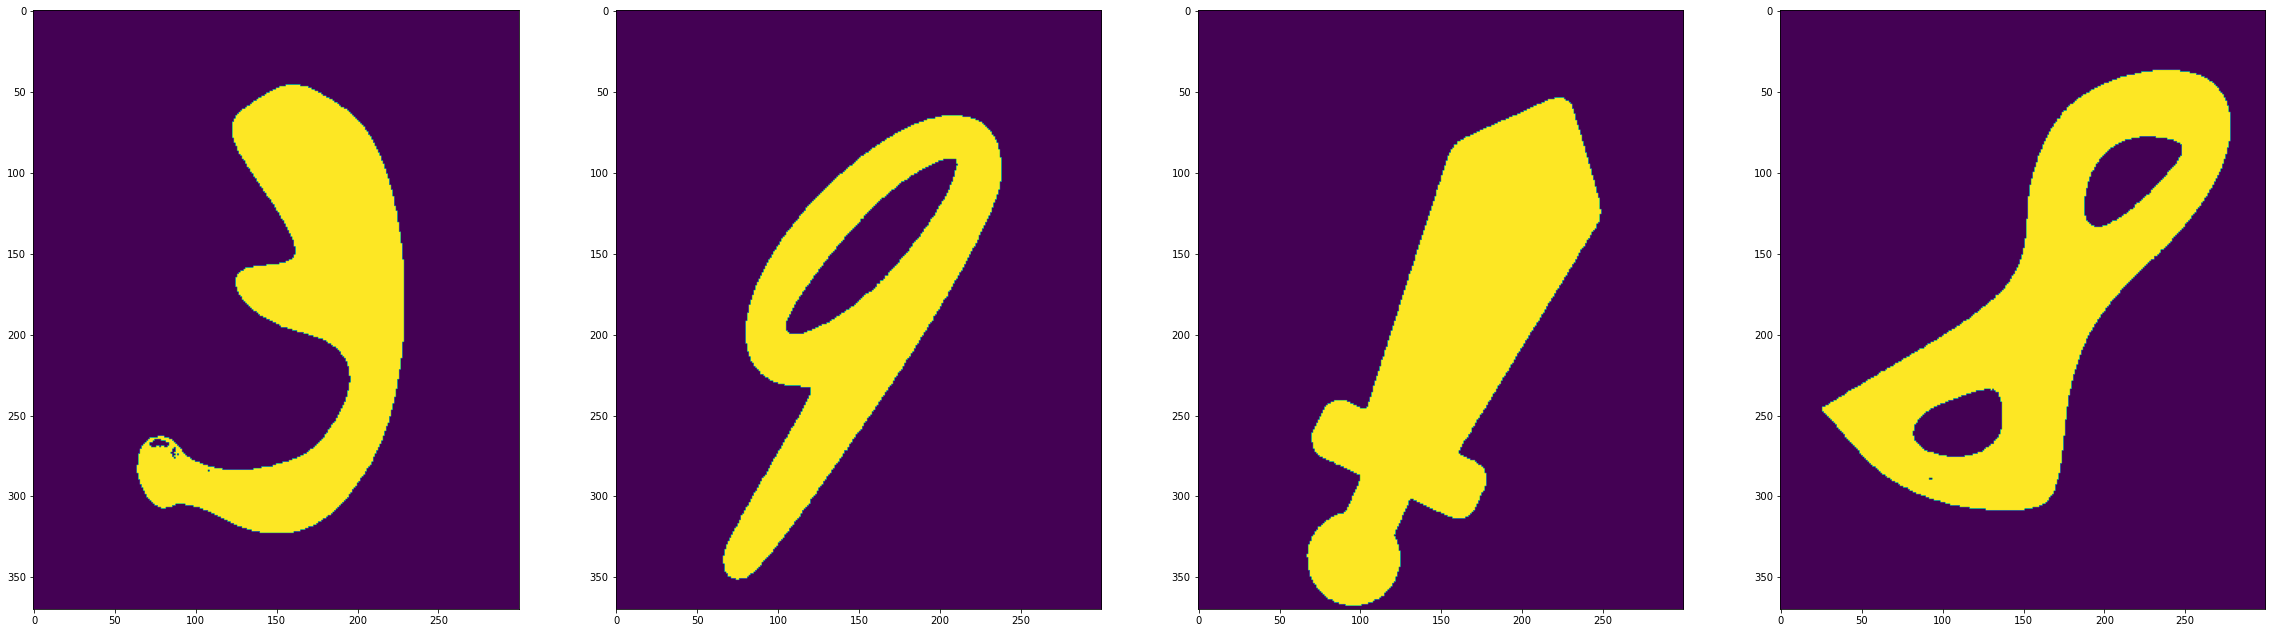

[4, 5, 2, 6]
game7 image12


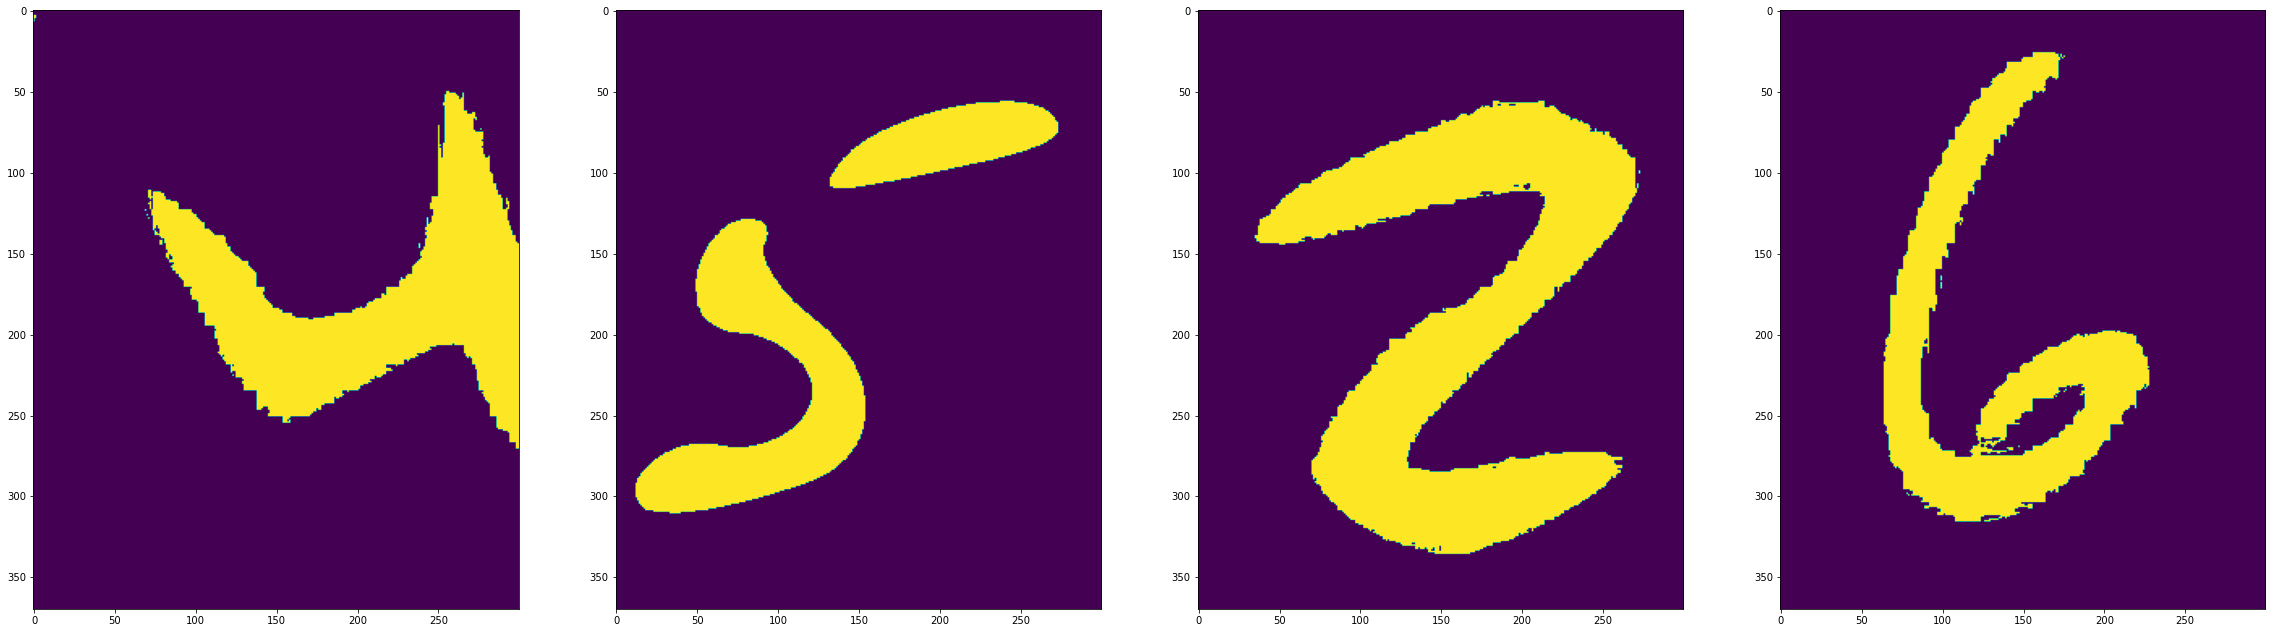

[4, 5, 2, 6]


In [123]:
## to store result: 
df = pd.DataFrame(columns=['game','P1_number', 'P2_number','P3_number','P4_number'], dtype=object)
for i in range(1, 8):
    game = f"game{i}"
    g_round_im , g_round_num = load(game)
    print(game)
    df_game = create_needed_df(game)[['P1_number', 'P2_number', 'P3_number', 'P4_number']]
    for k, img in enumerate(g_round_im):
        print(f'game{i} image{k}')
        cropped_img, contours, boxes = seg_pipe_final(img)
        cards = contours[:4]
        dealer = contours[4]
        bounded = plot_bounding_boxes(cropped_img, boxes)
        ordered,dealer_player, dealer_rect = assign_cards_dealer(cards, dealer)
        ordered_contours = [entry[1] for entry in ordered]
        ordered_boxes = get_contours_box(ordered_contours)
        
        first_card = cropped_img[ordered_boxes[0][2]:ordered_boxes[0][3],
                                 ordered_boxes[0][0]:ordered_boxes[0][1], :]
        second_card = cv.rotate(cropped_img[ordered_boxes[1][2]:ordered_boxes[1][3],
                                  ordered_boxes[1][0]:ordered_boxes[1][1], :],
                                cv.ROTATE_90_CLOCKWISE)
        third_card = cv.rotate(cropped_img[ordered_boxes[2][2]:ordered_boxes[2][3],
                                 ordered_boxes[2][0]:ordered_boxes[2][1], :],
                               cv.ROTATE_180)
        fourth_card = cv.rotate(cropped_img[ordered_boxes[3][2]:ordered_boxes[3][3],
                                  ordered_boxes[3][0]:ordered_boxes[3][1], :],
                                cv.ROTATE_90_COUNTERCLOCKWISE)


        first_mask, first_color = detect_red_or_black(first_card)
        second_mask, second_color = detect_red_or_black(second_card)
        third_mask, third_color = detect_red_or_black(third_card)
        fourth_mask, fourth_color = detect_red_or_black(fourth_card)
        
        first_suite,first_number = first_mask.copy()[:250,:300],first_mask.copy()[200:570,120:420]
        second_suite,second_number = second_mask.copy()[:250,:300],second_mask.copy()[200:570,120:420]
        third_suite,third_number = third_mask.copy()[:250,:300],third_mask.copy()[200:570,120:420]
        fourth_suite,fourth_number = fourth_mask.copy()[:250,:300],fourth_mask.copy()[200:570,120:420]

        fig, axes = plt.subplots(1, 4, figsize=(40, 15))
        axes[0].imshow(first_number)
        axes[1].imshow(second_number)
        axes[2].imshow(third_number)
        axes[3].imshow(fourth_number)
        plt.show()
        
        i1 = df_game.iloc[k, 0]
        i2 = str(predict_number(model, first_number))
        
        row = {'game':game, 'P1_number':np.array(first_number),'P2_number':np.array(second_number),
               'P3_number':np.array(third_number), 'P4_number':np.array(fourth_number)}
        
        df=df.append(row,ignore_index=True)
        
        print(predictions)

In [23]:
game = 'game1'
k = 2
g_round_im , g_round_num = load(game)

In [26]:
img = g_round_im[k]
df = create_needed_df(game)

In [27]:
df.iloc[k]

P1_suite         D
P1_number        1
P2_suite         H
P2_number        3
P3_suite         C
P3_number        7
P4_suite         D
P4_number        3
D                1
game         game1
Name: 2, dtype: object

### predicting suite

In [25]:
## load ground truth data

def load_game_csv(game):
    path = f'train_games\\{game}\\{game}.csv'
    ground_truth = pd.read_csv(path, index_col = 0)
    cgt_rank = cgt[['P1', 'P2', 'P3', 'P4']].values
    dealer = cgt[['D']].values
    return ground_truth

def load_game_csv_mahmoud(game):
    path = f'train_games/{game}/{game}.csv'
    ground_truth = pd.read_csv(path, index_col = 0)
    cgt_rank = cgt[['P1', 'P2', 'P3', 'P4']].values
    dealer = cgt[['D']].values
    return ground_truth

def create_needed_df(game):
    grt=load_game_csv_mahmoud(game)
    df = pd.DataFrame({'P1_suite':[elem[1] for elem in grt.P1.values],
                   'P1_number':[elem[0] for elem in grt.P1.values],
                   'P2_suite':[elem[1] for elem in grt.P2.values],
                   'P2_number':[elem[0] for elem in grt.P2.values],
                   'P3_suite':[elem[1] for elem in grt.P3.values],
                   'P3_number':[elem[0] for elem in grt.P3.values],
                   'P4_suite':[elem[1] for elem in grt.P4.values],
                   'P4_number':[elem[0] for elem in grt.P4.values],
                   'D':grt.D.values})
    df['game']=game
    return df

In [118]:
dataframes = []
for i in range(1, 8):
    game = f"game{i}"
    df_ = create_needed_df(game)
    dataframes.append(df_)
final_df = pd.concat(dataframes,ignore_index=True)

In [119]:
final_df

P1_suite P1_number P2_suite P2_number P3_suite P3_number P4_suite  \
0         S         Q        H         8        H         J        S   
1         S         5        S         J        C         9        D   
2         D         1        H         3        C         7        D   
3         S         1        D         J        S         4        C   
4         D         0        S         6        C         3        C   
..      ...       ...      ...       ...      ...       ...      ...   
86        H         5        H         3        S         1        S   
87        S         4        H         9        S         6        S   
88        H         8        H         7        H         Q        H   
89        C         3        C         9        C         J        C   
90        H         4        C         5        H         2        H   

   P4_number  D   game  
0          0  1  game1  
1          K  1  game1  
2          3  1  game1  
3          4  1  game1  
4          2  1  game1  
..       ... ..    ...  
86         J  2  game7  
87         5  2  game7  
88         J  2  game7  
89         8  3  game7  
90         6  3  game7  

[91 rows x 10 columns]

In [87]:
df_game1.iloc[0, 3]

'8'

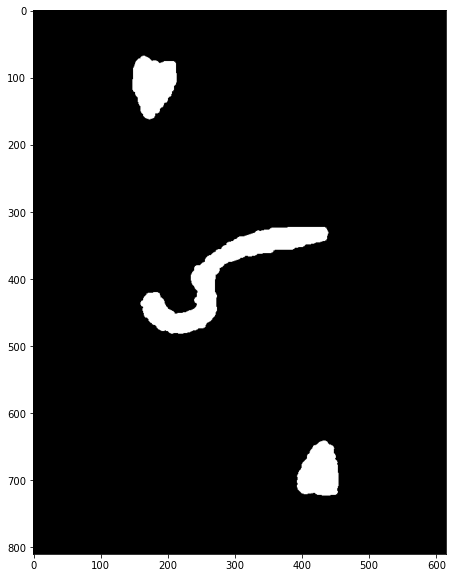

In [64]:
contours, _ = cv.findContours(first_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_TC89_KCOS)
contours = sorted(contours, key=lambda contour: cv.contourArea(contour), reverse= True)
drawn = cv.drawContours(first_mask.copy(), contours[:5], -1, (255,0,0), 5)
plot_image(drawn)

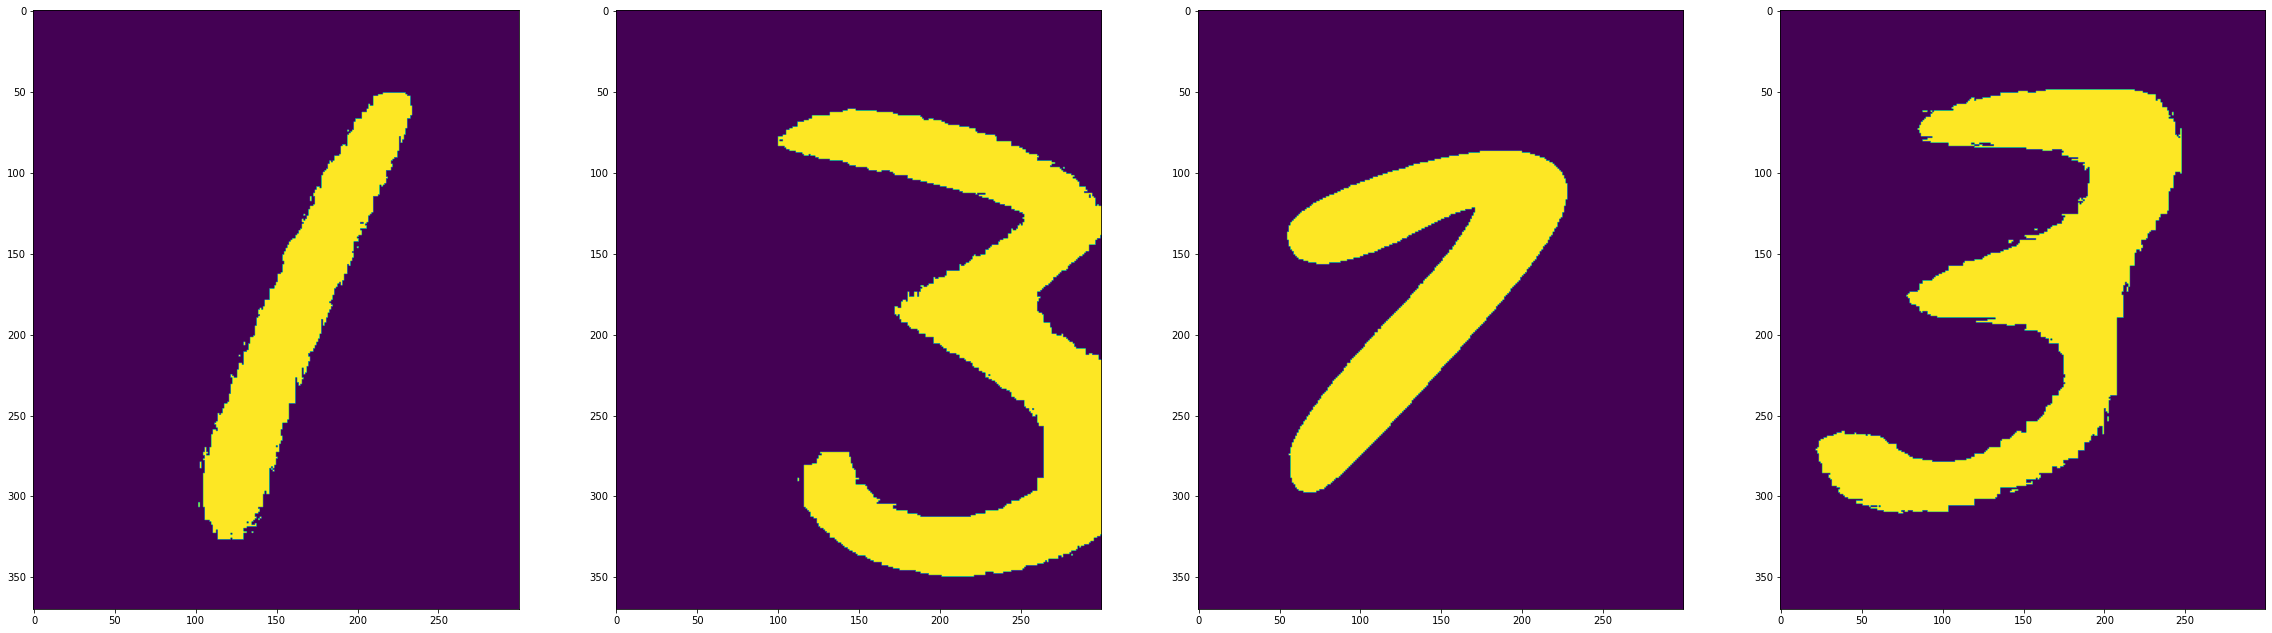

In [28]:
cropped_img, contours, boxes = seg_pipe_final(img)
cards = contours[:4]
dealer = contours[4]
bounded = plot_bounding_boxes(cropped_img, boxes)
ordered,dealer_player, dealer_rect = assign_cards_dealer(cards, dealer)
ordered_contours = [entry[1] for entry in ordered]
ordered_boxes = get_contours_box(ordered_contours)

first_card = cropped_img[ordered_boxes[0][2]:ordered_boxes[0][3],
                         ordered_boxes[0][0]:ordered_boxes[0][1], :]
second_card = cv.rotate(cropped_img[ordered_boxes[1][2]:ordered_boxes[1][3],
                          ordered_boxes[1][0]:ordered_boxes[1][1], :],
                        cv.ROTATE_90_CLOCKWISE)
third_card = cv.rotate(cropped_img[ordered_boxes[2][2]:ordered_boxes[2][3],
                         ordered_boxes[2][0]:ordered_boxes[2][1], :],
                       cv.ROTATE_180)
fourth_card = cv.rotate(cropped_img[ordered_boxes[3][2]:ordered_boxes[3][3],
                          ordered_boxes[3][0]:ordered_boxes[3][1], :],
                        cv.ROTATE_90_COUNTERCLOCKWISE)


first_mask, first_color = detect_red_or_black(first_card)
second_mask, second_color = detect_red_or_black(second_card)
third_mask, third_color = detect_red_or_black(third_card)
fourth_mask, fourth_color = detect_red_or_black(fourth_card)

first_suite,first_number = first_mask.copy()[:250,:300],first_mask.copy()[200:570,120:420]
second_suite,second_number = second_mask.copy()[:250,:300],second_mask.copy()[200:570,120:420]
third_suite,third_number = third_mask.copy()[:250,:300],third_mask.copy()[200:570,120:420]
fourth_suite,fourth_number = fourth_mask.copy()[:250,:300],fourth_mask.copy()[200:570,120:420]

fig, axes = plt.subplots(1, 4, figsize=(40, 15))
axes[0].imshow(first_number)
axes[1].imshow(second_number)
axes[2].imshow(third_number)
axes[3].imshow(fourth_number)
plt.show()
row = {'game':game, 'P1_suite':first_suite,'P1_number':first_number,'P1_color':first_color,
       'P2_suite':second_suite,'P2_number':second_number,'P2_color':second_color,
       'P3_suite':third_suite,'P3_number':third_number,'P3_color':third_color,
       'P4_suite':fourth_suite,'P4_number':fourth_number,'P4_color':fourth_color,'D':dealer_player}
df=df.append(row,ignore_index=True)

In [29]:
first_number.shape

(370, 300)

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [37]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [38]:
model = Net()
model.load_state_dict(torch.load('data/model.pth'))
model.eval()

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [61]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

In [62]:
get_activation('fc2')

<function __main__.get_activation.<locals>.hook(model, input, output)>

In [74]:
first_number_small = cv.resize(first_number, (28, 28))
# first_number_small = first_number_small / first_number_small.max()

In [106]:
def predict_number(model, number):
    number_small = cv.resize(number, (28, 28))
    number_small = number_small / number_small.max()
    
    t = torch.tensor(number_small.reshape(1, 1, 28, 28), dtype=torch.float32)
    out = model(t)
    
    return out.argmax().item()

In [76]:
t = torch.tensor(first_number_small.reshape(1, 1, 28, 28), dtype=torch.float32)

In [77]:
out = model(t)

/home/nabegh/Anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [78]:
out.argmax().item()

4

In [120]:
df.head()

P1_suite P1_number P2_suite P2_number P3_suite P3_number P4_suite P4_number  \
0        C         Q        S         0        H         K        D         0   
1        S         9        C         K        S         8        H         0   
2        S         2        D         J        D         9        D         8   
3        C         4        C         1        C         0        H         7   
4        C         2        D         1        S         3        D         K   

   D   game  
0  3  game7  
1  3  game7  
2  4  game7  
3  4  game7  
4  4  game7

In [122]:
final_df.to_csv('data/final_df.csv', index=False)
df.to_csv('data/df.csv', index=False)
    

In [125]:
df.to_pickle('data/df.pkl')